In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024
The Mexican Grand Prix (Spanish: Gran Premio de México), currently held under the name Mexico City Grand Prix (Spanish: Gran Premio de la Ciudad de México), is a motor racing event held at the Autódromo Hermanos Rodríguez in Mexico City. It first appeared as a non-championship event in 1962 before being held as a championship event in 1963–1970 and 1986–1992. The Grand Prix returned in 2015 at the Mexico City circuit, and held the event from 2015 to 2019, and since 2021; it was due to host the Grand Prix in 2020, but this was cancelled in response to the COVID-19 pandemic. The venue is contracted to host the event until 2025.[1]
Source: Wikipedia

## Obtain session information

In [3]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='MEX')

meeting_key  session_key     location                 date_start  \
0         1272         9870  Mexico City  2025-10-24T18:30:00+00:00   
1         1272         9871  Mexico City  2025-10-24T22:00:00+00:00   
2         1272         9872  Mexico City  2025-10-25T17:30:00+00:00   
3         1272         9873  Mexico City  2025-10-25T21:00:00+00:00   

                    date_end session_type session_name  country_key  \
0  2025-10-24T19:30:00+00:00     Practice   Practice 1            8   
1  2025-10-24T23:00:00+00:00     Practice   Practice 2            8   
2  2025-10-25T18:30:00+00:00     Practice   Practice 3            8   
3  2025-10-25T22:00:00+00:00   Qualifying   Qualifying            8   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          MEX       Mexico           65        Mexico City  -06:00:00  2025  
1          MEX       Mexico           65        Mexico City  -06:00:00  2025  
2          MEX       Mexico           65        Mexico City  -06:00:00  2025  
3          MEX       Mexico           65        Mexico City  -06:00:00  2025

## Free Practice 1
### Obtain setup

In [4]:
practice = libraryDataF1.obtain_information('laps',session_key=9870)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9870)
drivers = libraryDataF1.obtain_information('drivers',session_key=9870)

In [ ]:
drivers.loc[drivers['driver_number']==29,'team_name'] = 'McLaren'
drivers.loc[drivers['driver_number']==12,'team_name'] = 'Mercedes'
drivers.loc[drivers['driver_number']==34,'team_name'] = 'Aston Martin'
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==38,'team_name'] = 'Ferrari'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==97,'team_name'] = 'Kick Sauber'


In [ ]:
drivers.loc[drivers['driver_number']==29,'team_colour'] = 'FF8000'
drivers.loc[drivers['driver_number']==12,'team_colour'] = '27F4D2'
drivers.loc[drivers['driver_number']==34,'team_colour'] = '229971'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==38,'team_colour'] = 'E80020'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'
drivers.loc[drivers['driver_number']==97,'team_colour'] = '52E252'

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
It seems that Ferrari has bet for speed on the straights

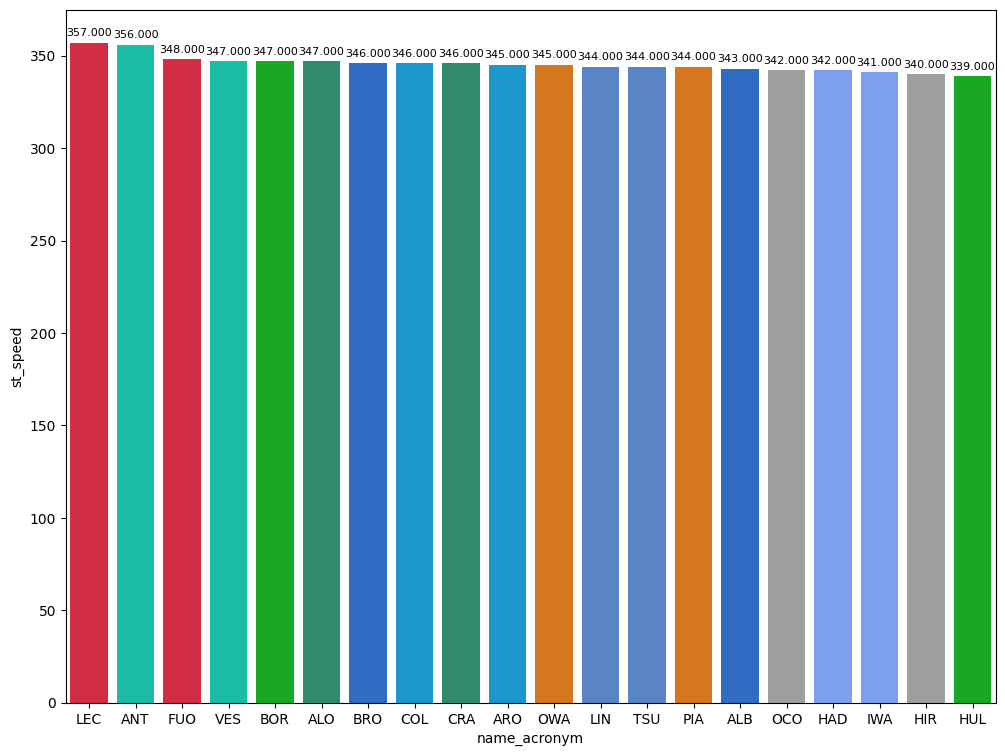

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

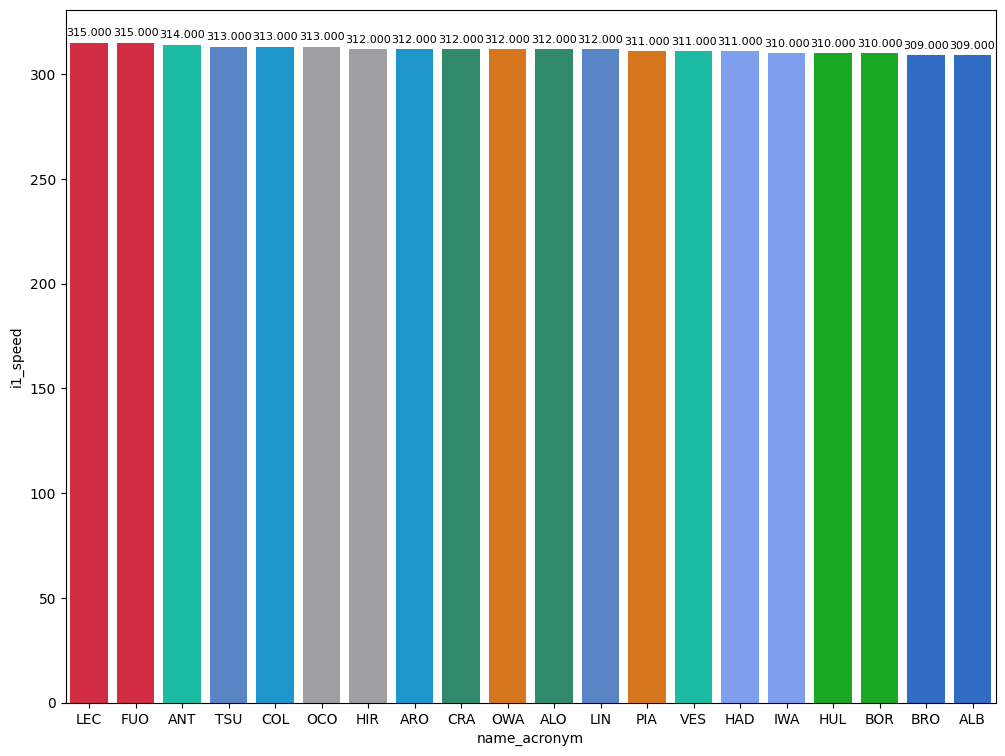

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

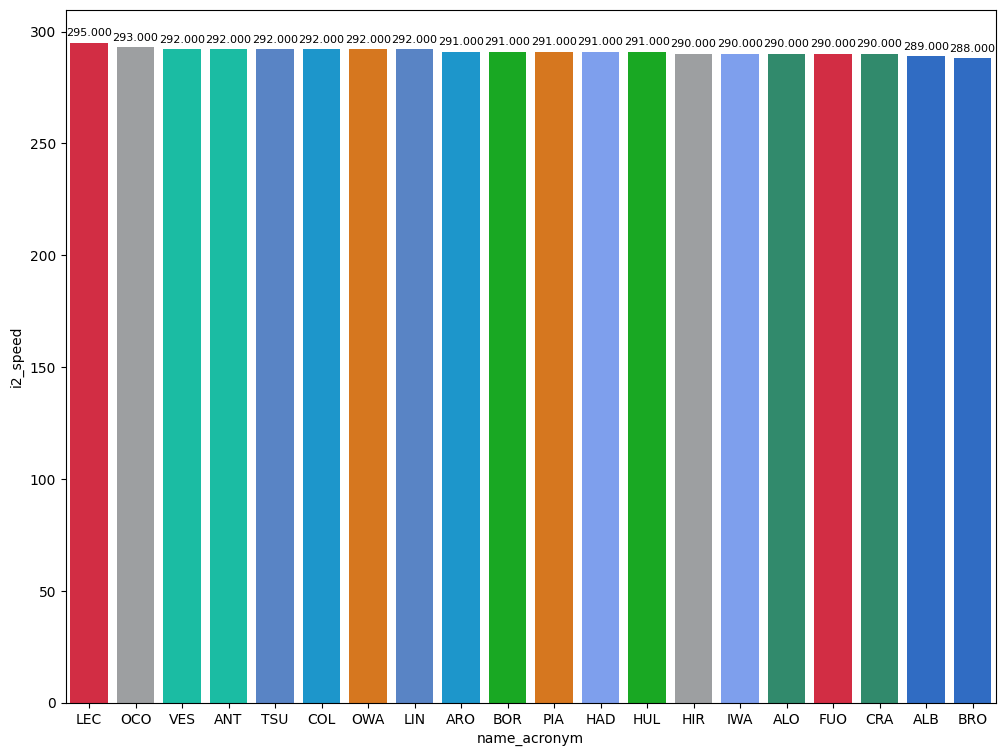

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [9]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
304   Frederik VESTI     HARD             27.939             30.874   
251  Alexander ALBON   MEDIUM             28.258             30.473   
307  Charles LECLERC     SOFT             27.657             30.350   
515    Antonio FUOCO  UNKNOWN             28.302             31.623   

     duration_sector_3  lap_duration  
304             20.876        79.689  
251             20.653        79.384  
307             20.373        78.380  
515             21.335        81.260

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [10]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


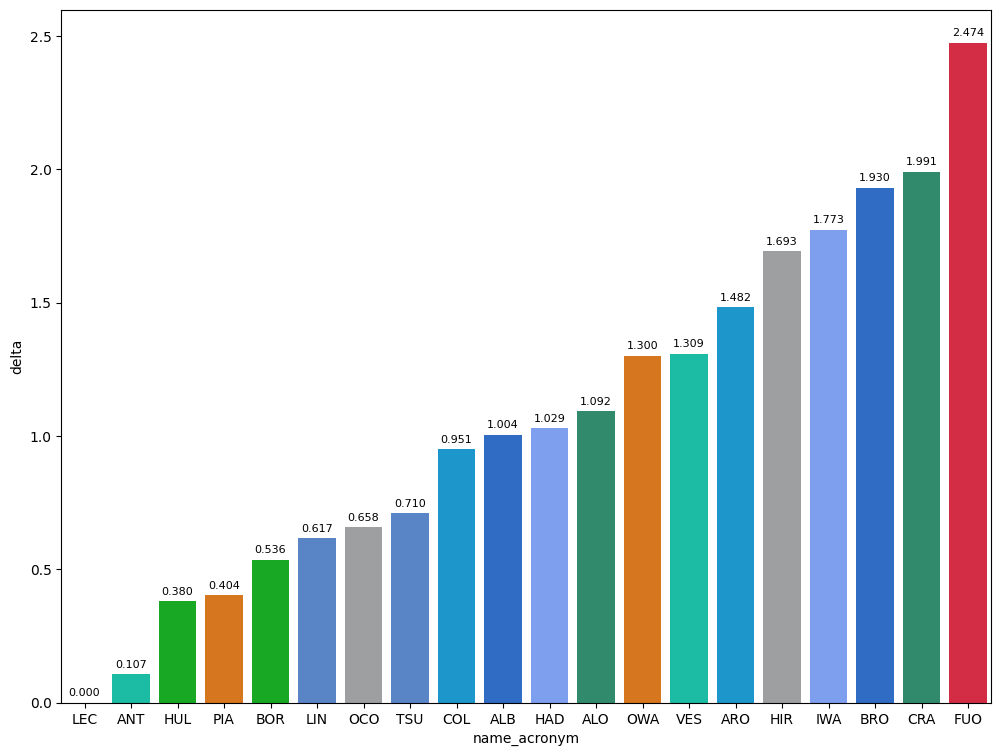

In [11]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

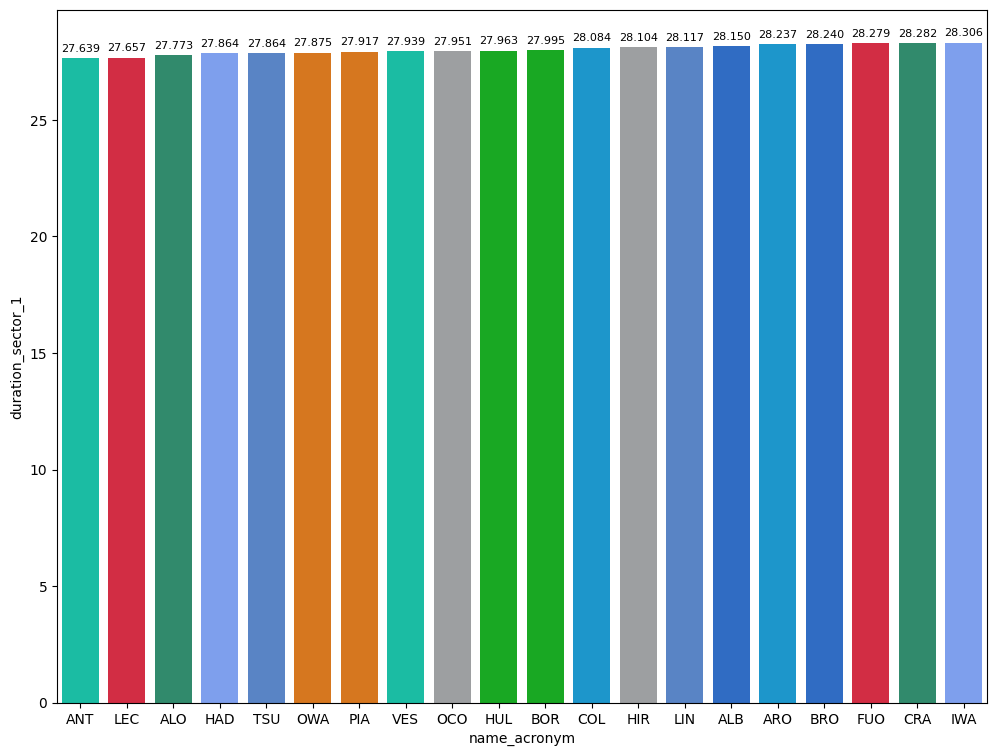

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

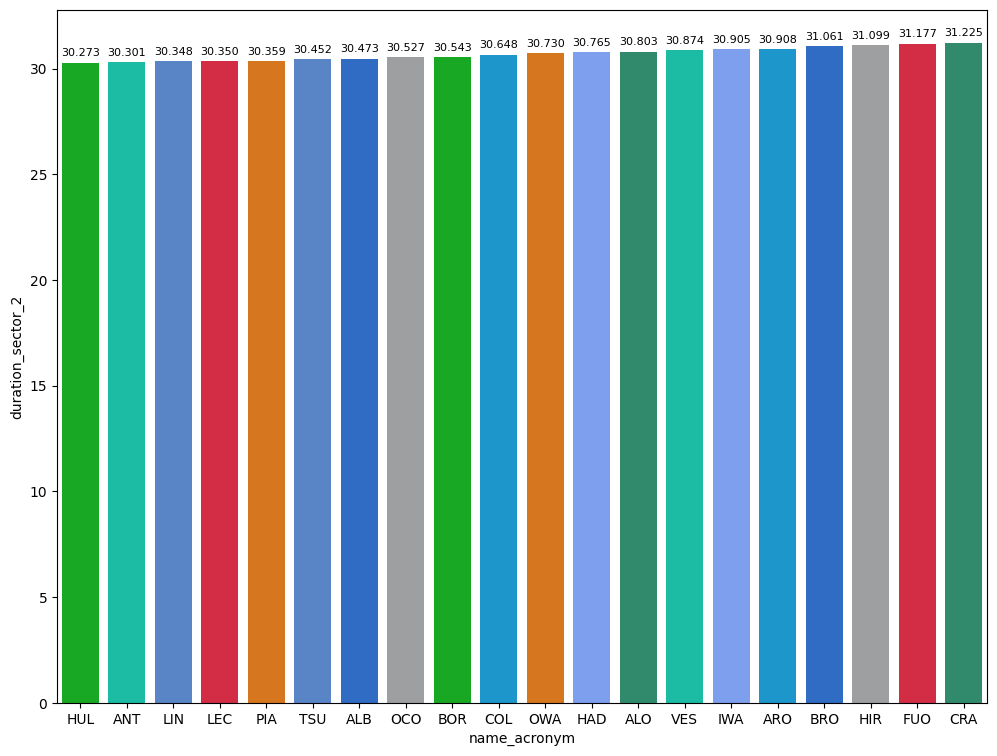

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

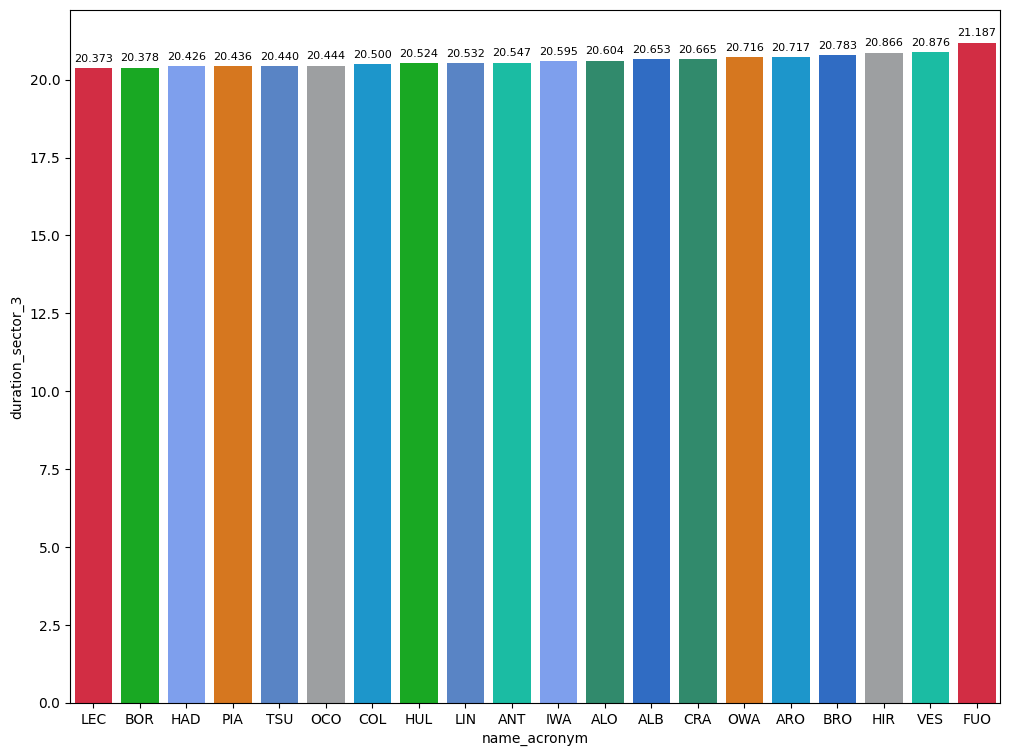

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [15]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 82 and lap_duration <=84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         82.613000
HARD         83.167000
MEDIUM       83.178406

## Free Practice 2
### Obtain setup

In [4]:
practice = libraryDataF1.obtain_information('laps',session_key=9871)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9871)
drivers = libraryDataF1.obtain_information('drivers',session_key=9871)

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

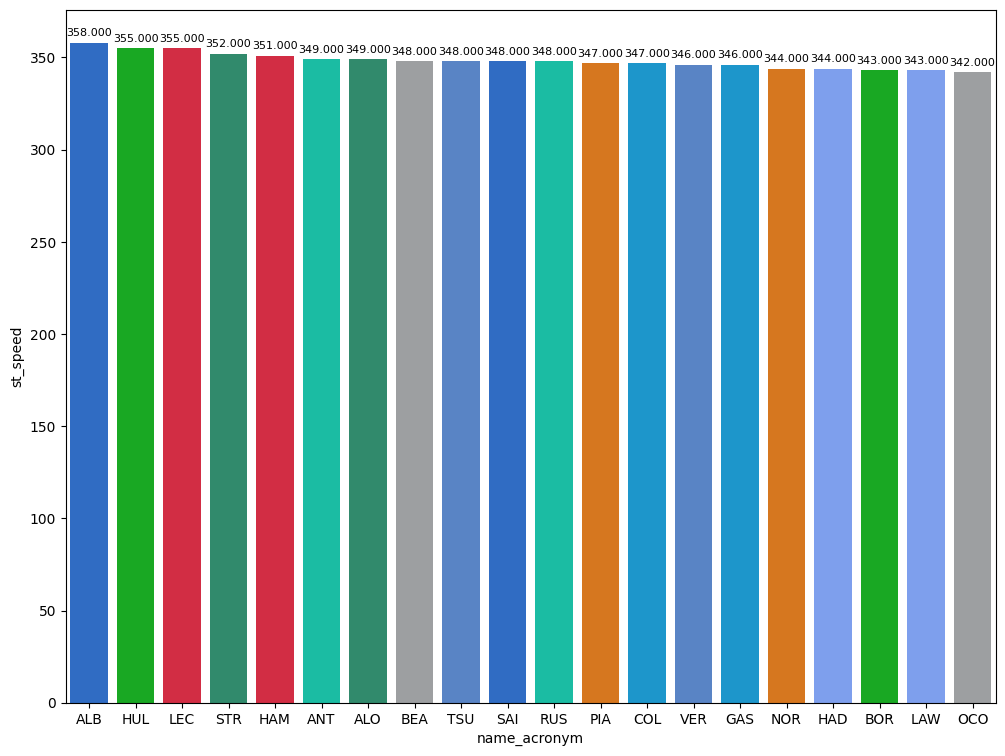

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

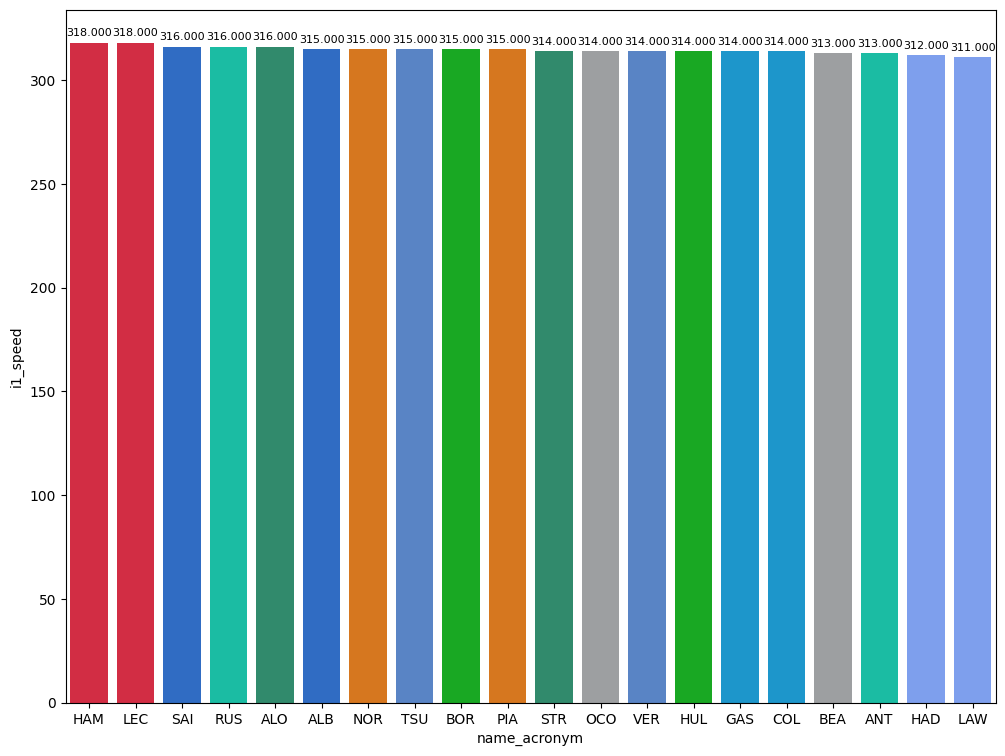

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

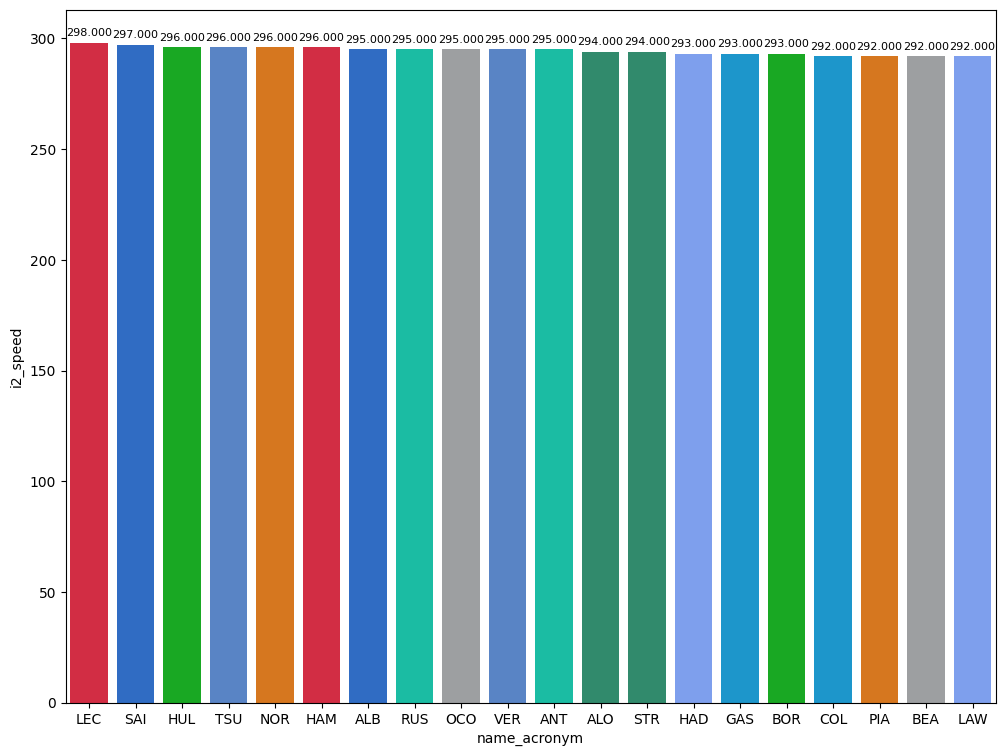

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [9]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
170     Isack HADJAR     HARD             28.194             31.031   
130  Charles LECLERC   MEDIUM             27.654             30.369   
243   Max VERSTAPPEN     SOFT             27.483             29.896   

     duration_sector_3  lap_duration  
170             20.395        79.620  
130             20.330        78.353  
243             20.013        77.392

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [10]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


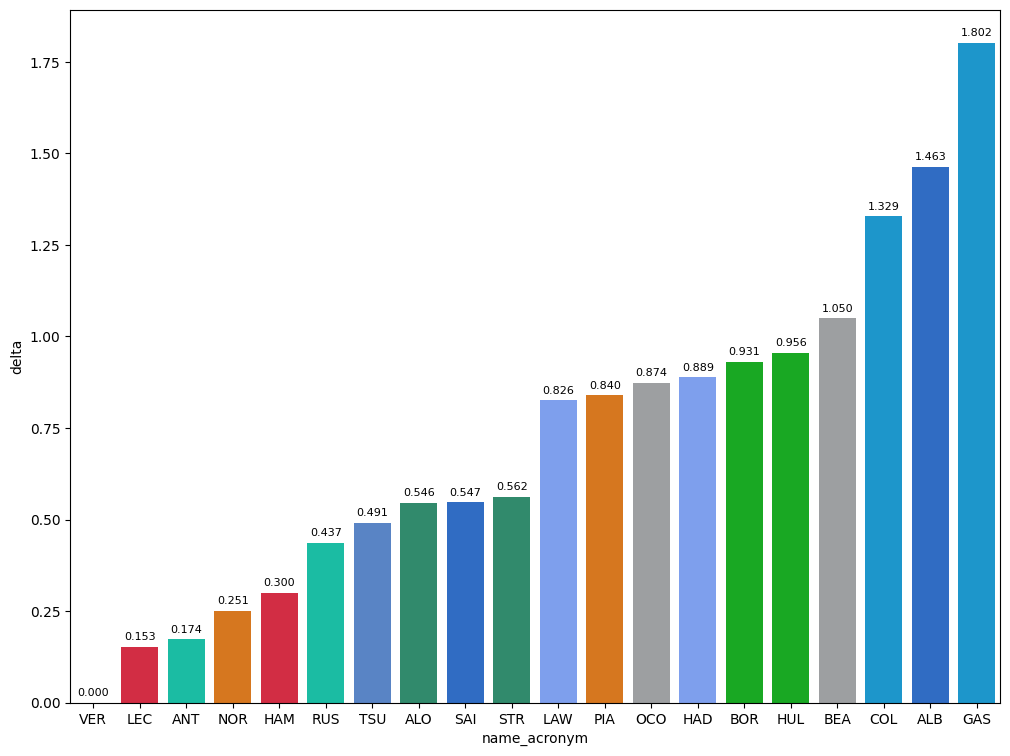

In [11]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

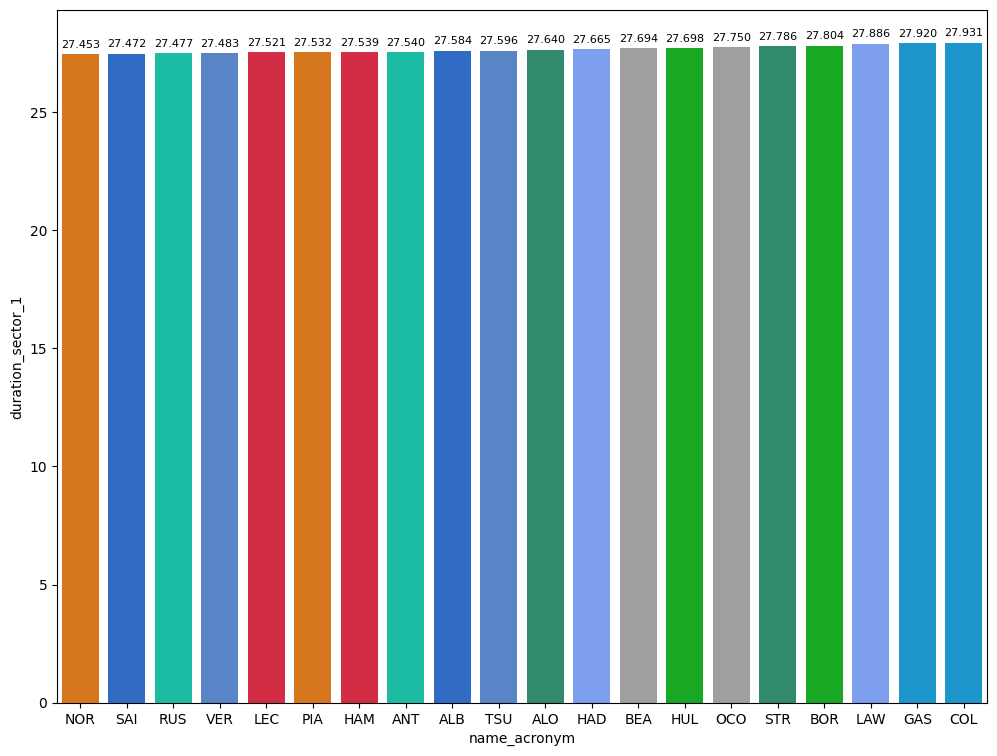

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

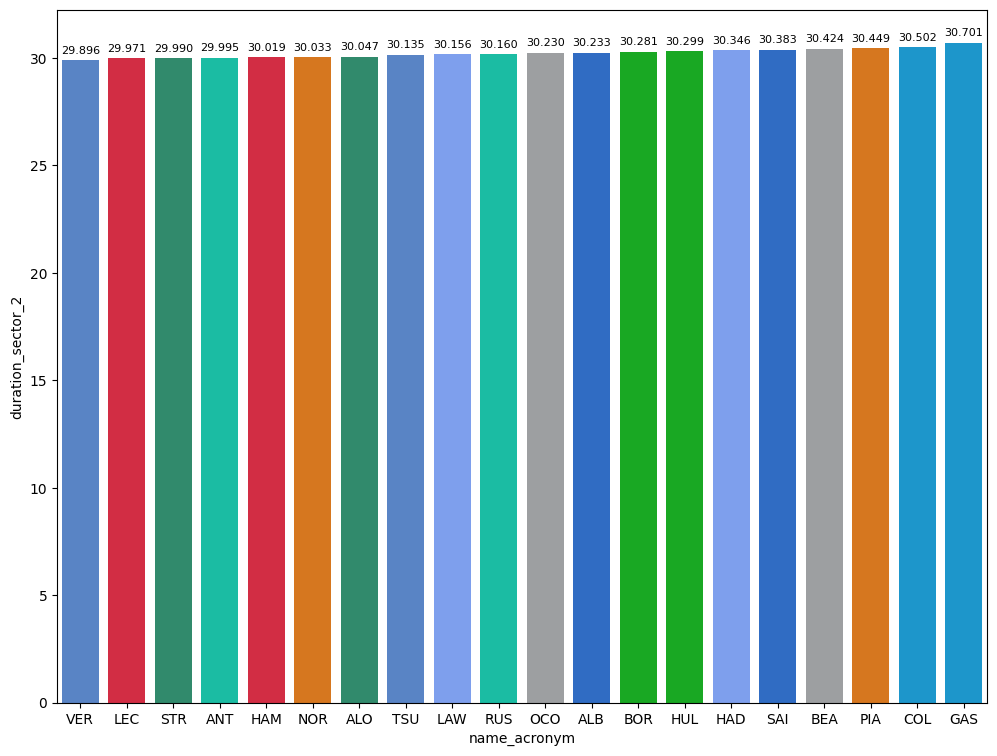

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

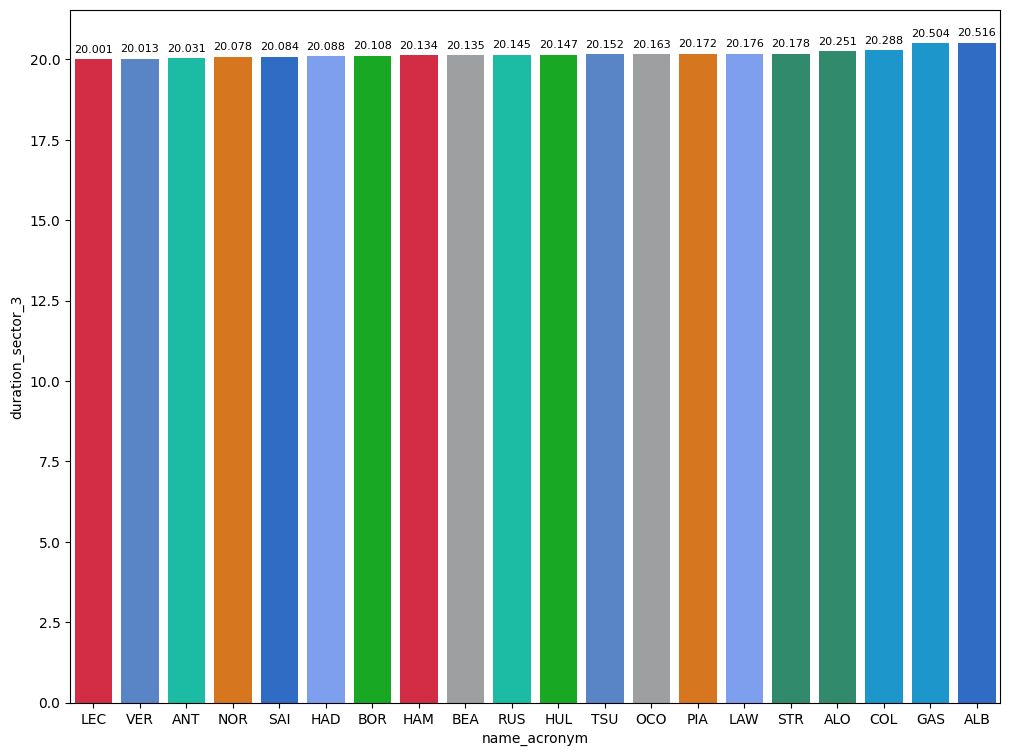

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [15]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>81 and lap_duration <=84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         82.462899
MEDIUM       82.757486
HARD         82.822500

### Long runs

In [16]:
MINIMUN_SECONDS = 80
MAXIMUM_SECONDS = 84

#### Red Bull Racing

In [17]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1272         9871             1              1          1        3   
8          1272         9871             1             22          1        5   
21         1272         9871             2              1          4        9   
31         1272         9871             2             22          6       11   
33         1272         9871             3              1         10       12   
52         1272         9871             4              1         13       15   
62         1272         9871             3             22         12       17   
76         1272         9871             5              1         16       27   
82         1272         9871             4             22         18       31   
91         1272         9871             6              1         28       34   

   compound  tyre_age_at_start  
1    MEDIUM                  0  
8    MEDIUM                  0  
21   MEDIUM                  3  
31   MEDIUM                  5  
33   MEDIUM                  9  
52     SOFT                  0  
62     SOFT                  0  
76   MEDIUM                 12  
82   MEDIUM                 11  
91     SOFT                  0

In [18]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
325  Max VERSTAPPEN   MEDIUM  2025-10-24T22:37:51.508000+00:00          17   
331  Max VERSTAPPEN   MEDIUM  2025-10-24T22:39:14.189000+00:00          18   
337  Max VERSTAPPEN   MEDIUM  2025-10-24T22:40:36.846000+00:00          19   
346  Max VERSTAPPEN   MEDIUM  2025-10-24T22:41:59.511000+00:00          20   
358  Max VERSTAPPEN   MEDIUM  2025-10-24T22:43:22.269000+00:00          21   
373  Max VERSTAPPEN   MEDIUM  2025-10-24T22:44:44.776000+00:00          22   
389  Max VERSTAPPEN   MEDIUM  2025-10-24T22:46:08.491000+00:00          23   
408  Max VERSTAPPEN   MEDIUM  2025-10-24T22:47:31.220000+00:00          24   
425  Max VERSTAPPEN   MEDIUM  2025-10-24T22:48:54.111000+00:00          25   
445  Max VERSTAPPEN   MEDIUM  2025-10-24T22:50:16.746000+00:00          26   
512  Max VERSTAPPEN     SOFT  2025-10-24T22:54:51.503000+00:00          29   
532  Max VERSTAPPEN     SOFT  2025-10-24T22:56:12.597000+00:00          30   
570  Max VERSTAPPEN     SOFT  2025-10-24T22:59:01.388000+00:00          32   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
325             29.287             32.140             21.187        82.614  
331             29.216             32.314             21.242        82.772  
337             29.386             31.965             21.298        82.649  
346             29.180             32.210             21.287        82.677  
358             29.190             32.014             21.357        82.561  
373             29.293             33.016             21.356        83.665  
389             29.215             32.208             21.286        82.709  
408             29.207             32.329             21.436        82.972  
425             29.169             32.099             21.388        82.656  
445             29.156             32.434             21.349        82.939  
512             28.887             31.385             20.886        81.158  
532             28.729             31.424             21.147        81.300  
570             28.772             31.342             21.081        81.195

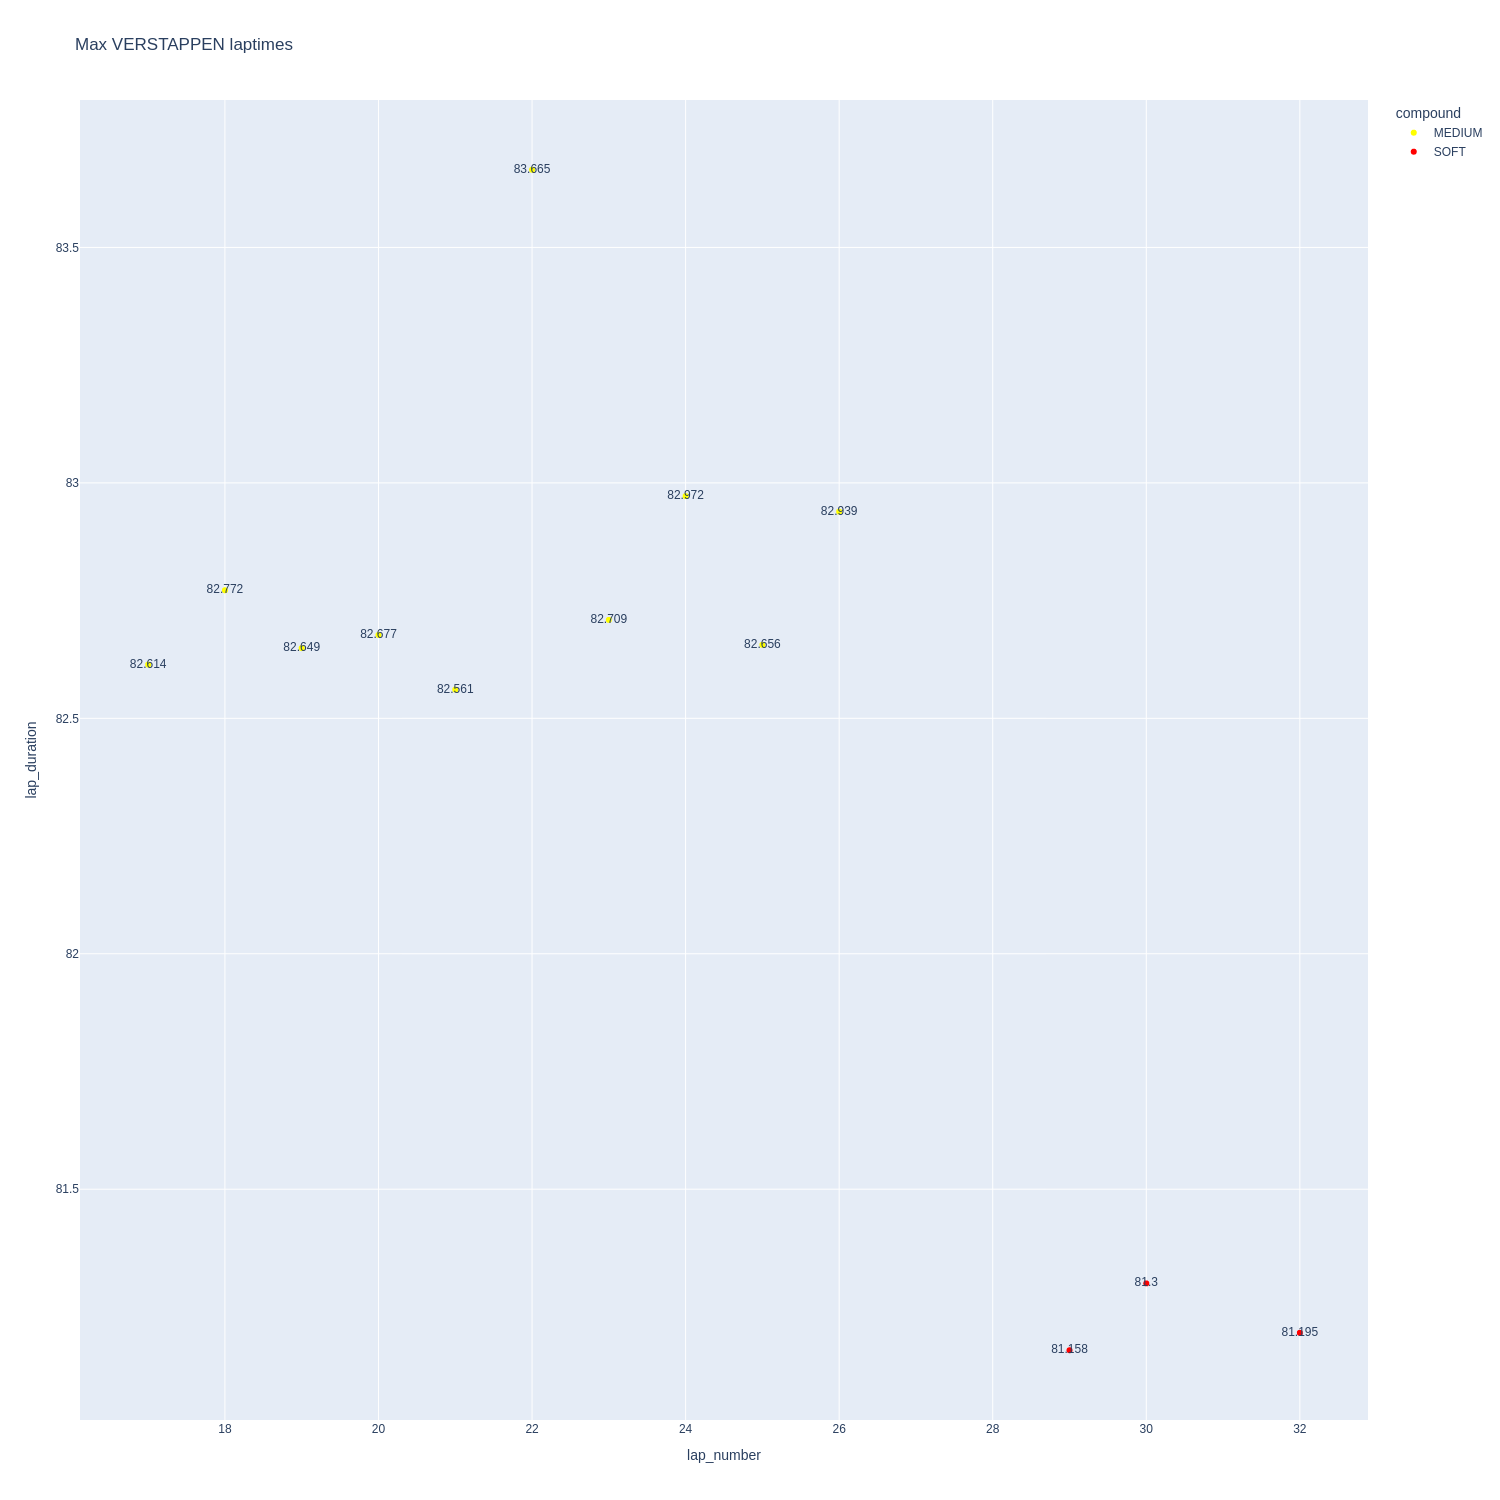

In [19]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

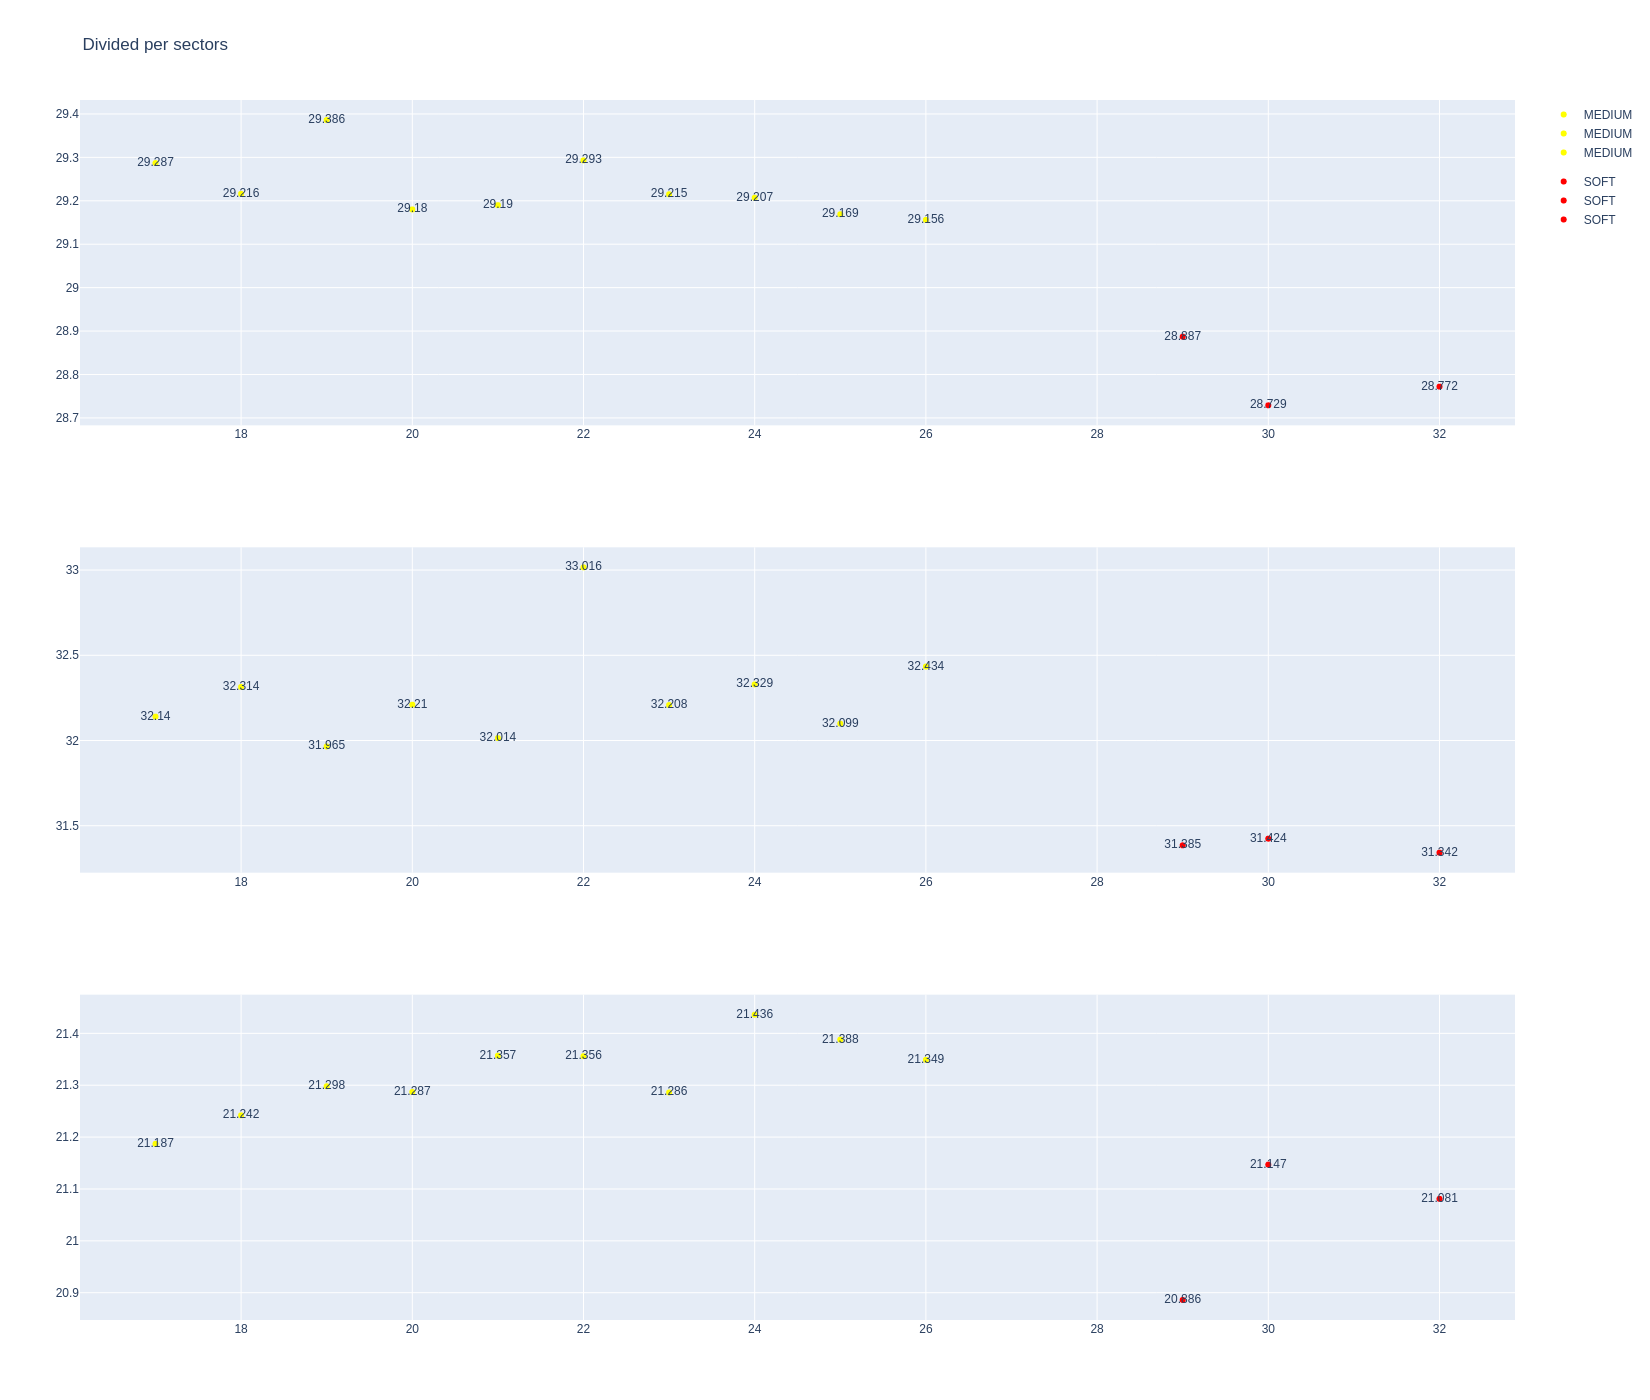

In [20]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [21]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
363  Yuki TSUNODA   MEDIUM  2025-10-24T22:43:46.354000+00:00          19   
377  Yuki TSUNODA   MEDIUM  2025-10-24T22:45:09.194000+00:00          20   
414  Yuki TSUNODA   MEDIUM  2025-10-24T22:47:58.548000+00:00          22   
433  Yuki TSUNODA   MEDIUM  2025-10-24T22:49:21.549000+00:00          23   
453  Yuki TSUNODA   MEDIUM  2025-10-24T22:50:44.387000+00:00          24   
473  Yuki TSUNODA   MEDIUM  2025-10-24T22:52:07.075000+00:00          25   
513  Yuki TSUNODA   MEDIUM  2025-10-24T22:54:56.081000+00:00          27   
533  Yuki TSUNODA   MEDIUM  2025-10-24T22:56:19.113000+00:00          28   
552  Yuki TSUNODA   MEDIUM  2025-10-24T22:57:42.232000+00:00          29   
571  Yuki TSUNODA   MEDIUM  2025-10-24T22:59:05.341000+00:00          30   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
363             29.363             32.188             21.294        82.845  
377             29.298             32.013             21.250        82.561  
414             29.307             32.234             21.461        83.002  
433             29.204             32.232             21.360        82.796  
453             29.179             32.232             21.354        82.765  
473             29.231             32.279             21.441        82.951  
513             29.229             32.371             21.500        83.100  
533             29.189             32.276             21.562        83.027  
552             29.240             32.367             21.623        83.230  
571             29.137             32.471             21.584        83.192

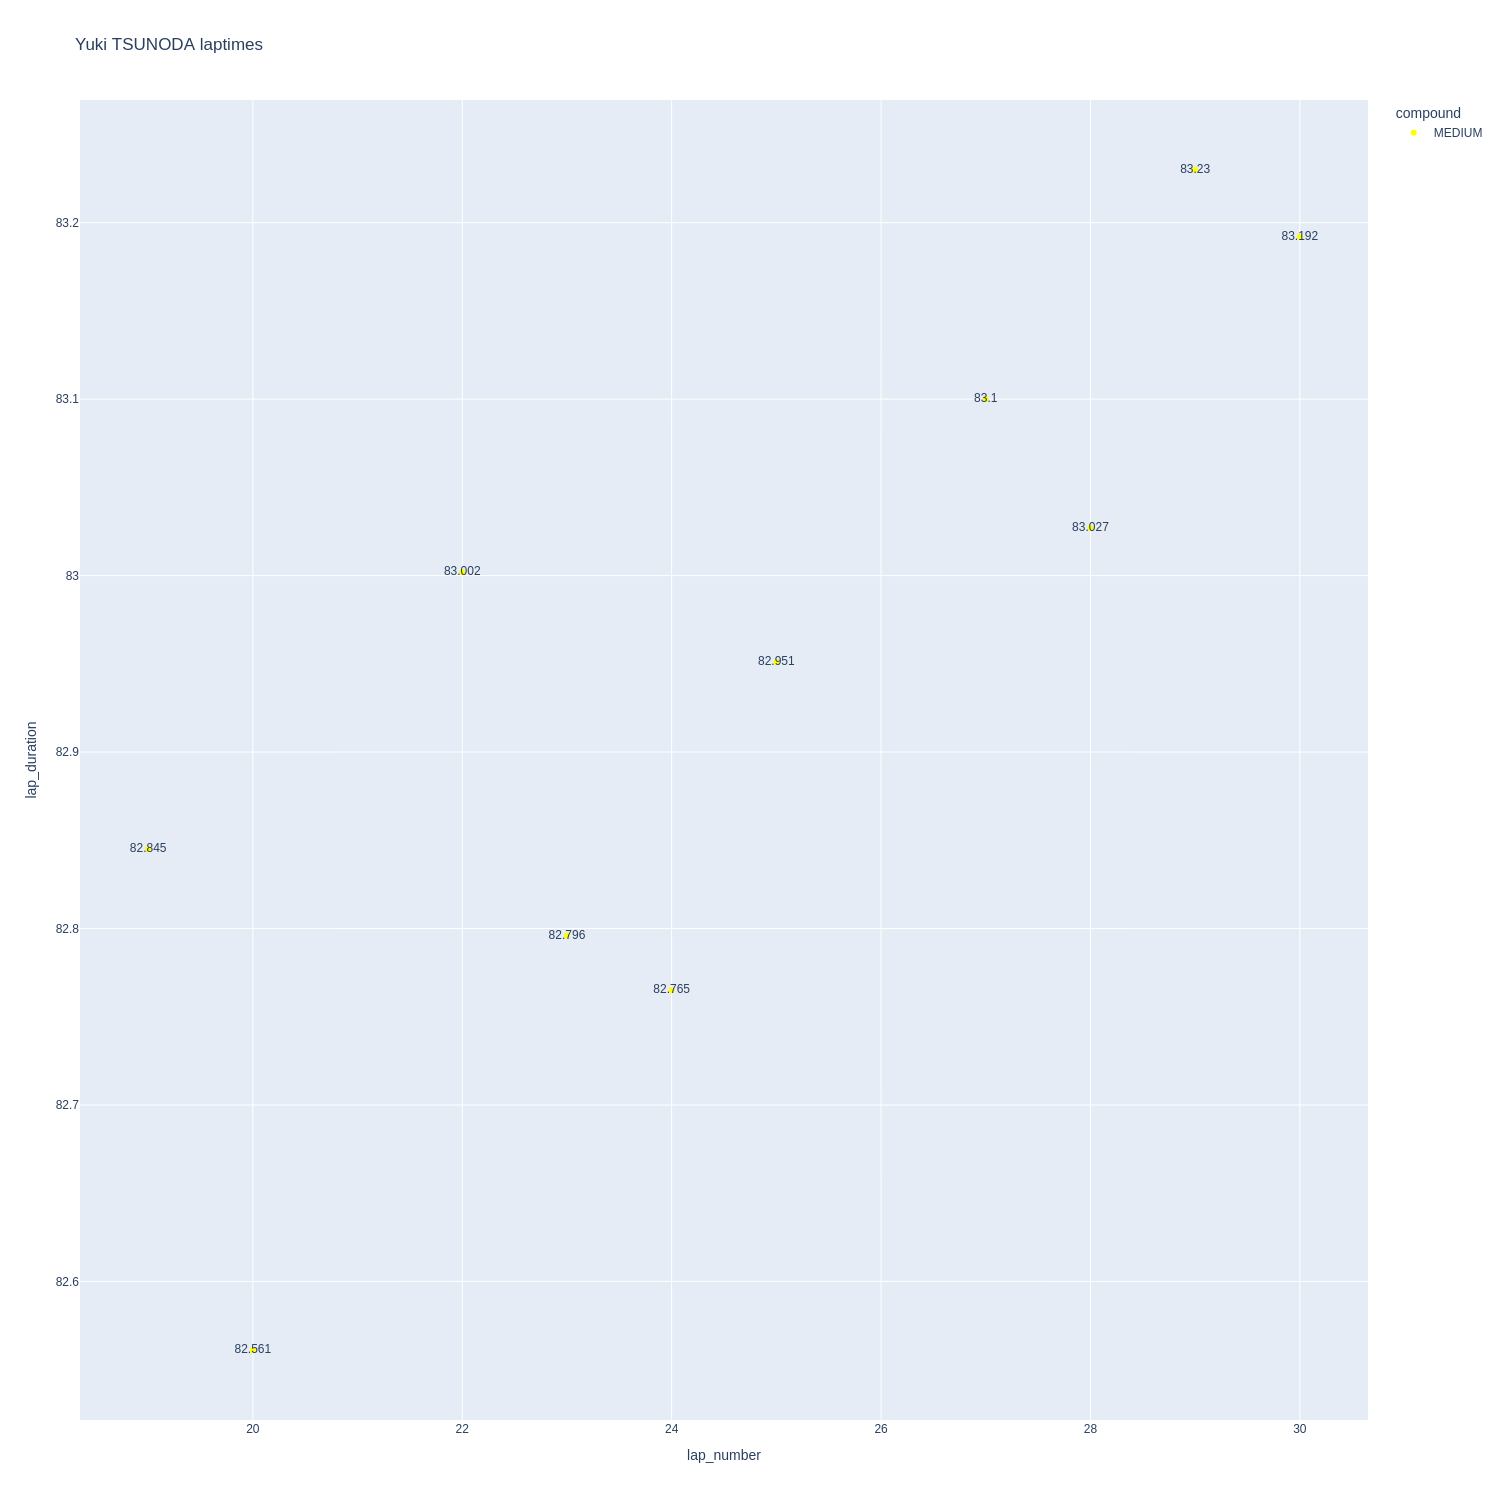

In [22]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

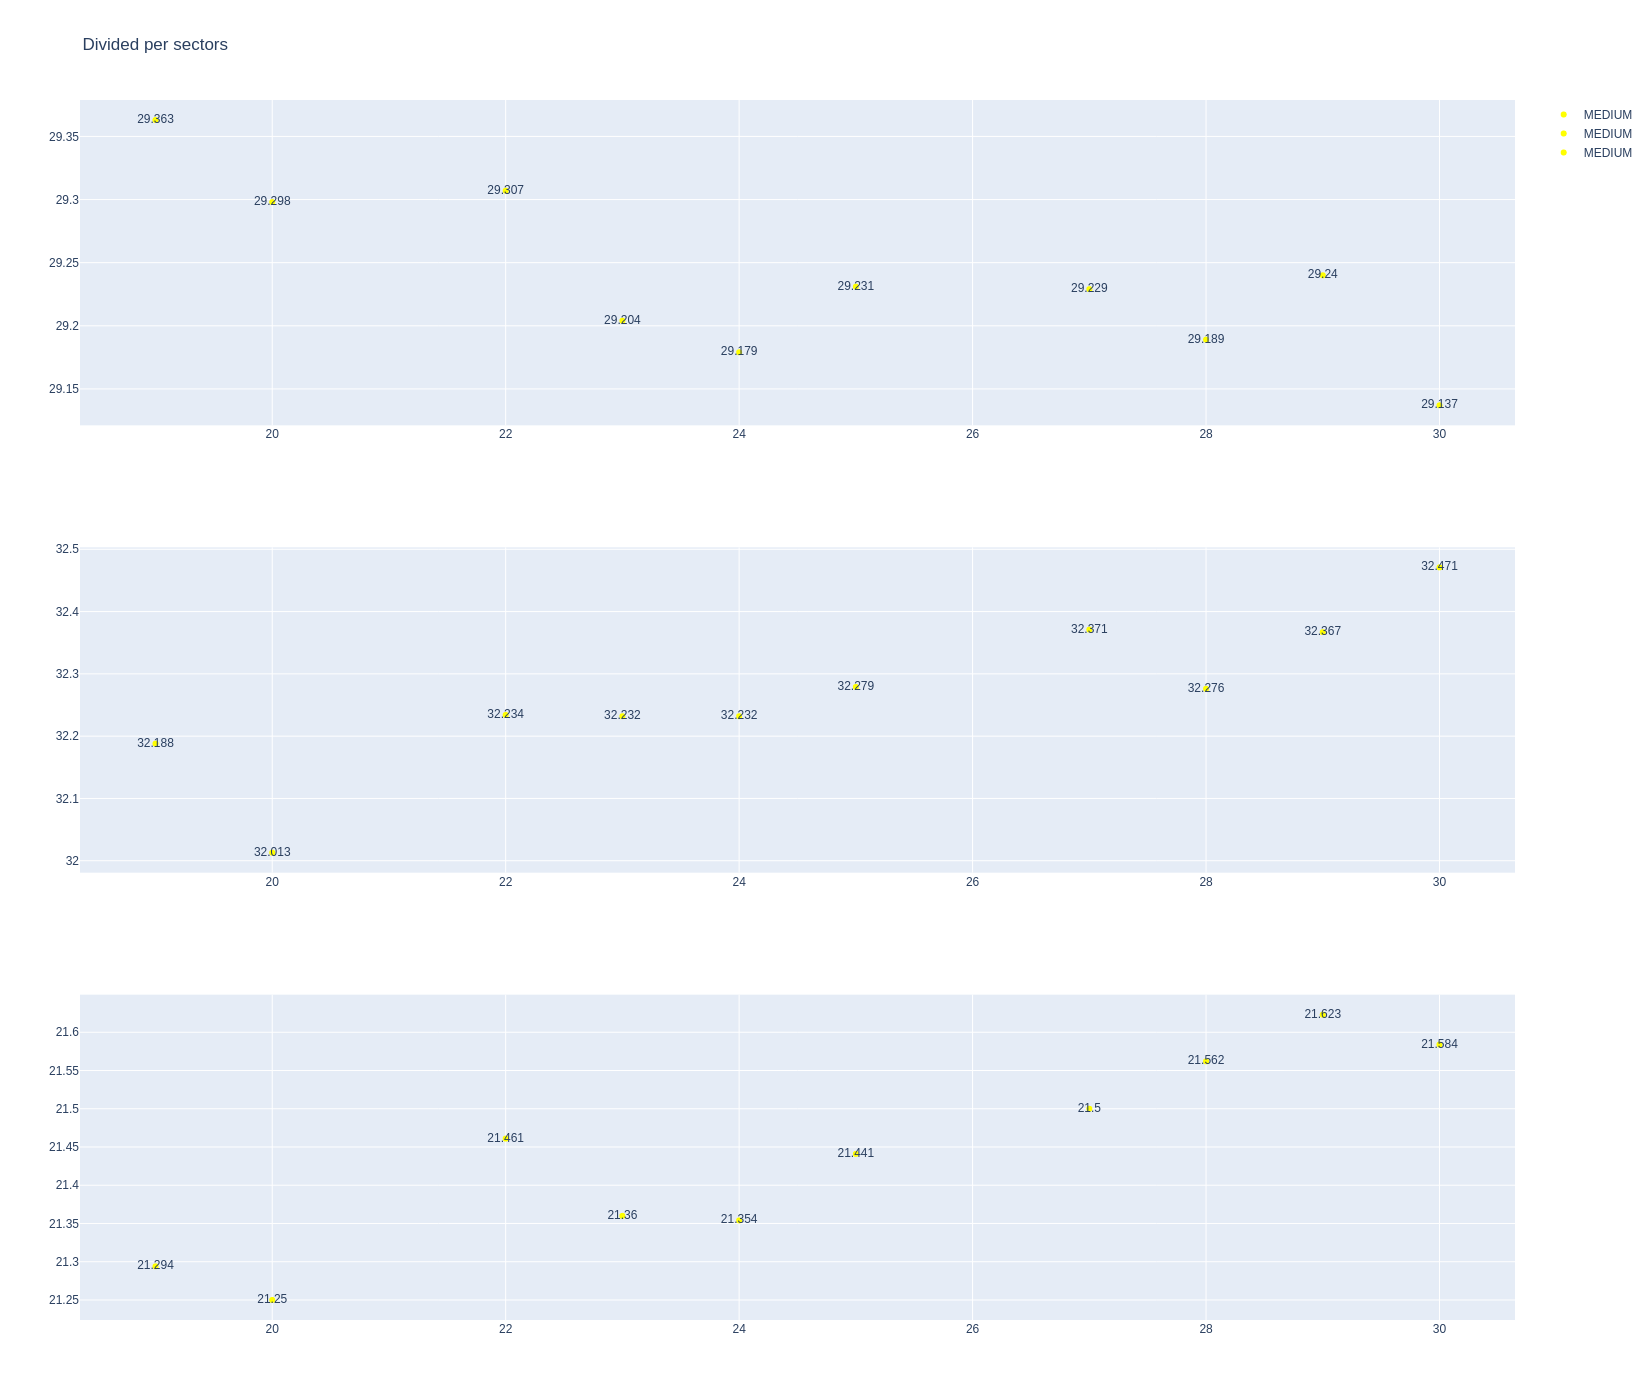

In [23]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [24]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1272         9871             1             16          1        5   
22         1272         9871             2             16          6       10   
32         1272         9871             1             44          1       10   
39         1272         9871             3             16         11       13   
45         1272         9871             2             44         11       13   
55         1272         9871             4             16         14       16   
72         1272         9871             3             44         14       19   
85         1272         9871             5             16         17       32   
88         1272         9871             4             44         20       30   

   compound  tyre_age_at_start  
7    MEDIUM                  0  
22   MEDIUM                  0  
32   MEDIUM                  0  
39     SOFT                  0  
45     SOFT                  0  
55     SOFT                  3  
72     SOFT                  3  
85   MEDIUM                 10  
88   MEDIUM                 10

In [25]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
75   Charles LECLERC   MEDIUM  2025-10-24T22:06:47.666000+00:00           4   
345  Charles LECLERC   MEDIUM  2025-10-24T22:41:57.351000+00:00          18   
357  Charles LECLERC   MEDIUM  2025-10-24T22:43:18.644000+00:00          19   
372  Charles LECLERC   MEDIUM  2025-10-24T22:44:40.885000+00:00          20   
388  Charles LECLERC   MEDIUM  2025-10-24T22:46:03.301000+00:00          21   
407  Charles LECLERC   MEDIUM  2025-10-24T22:47:25.454000+00:00          22   
424  Charles LECLERC   MEDIUM  2025-10-24T22:48:47.923000+00:00          23   
463  Charles LECLERC   MEDIUM  2025-10-24T22:51:36.653000+00:00          25   
522  Charles LECLERC   MEDIUM  2025-10-24T22:55:49.925000+00:00          28   
540  Charles LECLERC   MEDIUM  2025-10-24T22:57:13.294000+00:00          29   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
75              27.905             30.433             23.616        81.954  
345             28.840             31.452             21.014        81.306  
357             28.965             31.880             21.300        82.145  
372             29.164             31.818             21.409        82.391  
388             28.994             31.817             21.380        82.191  
407             29.089             32.047             21.415        82.551  
424             29.121             31.992             21.402        82.515  
463             29.287             32.052             21.595        82.934  
522             29.174             32.437             21.820        83.431  
540             28.865             32.274             22.796        83.935

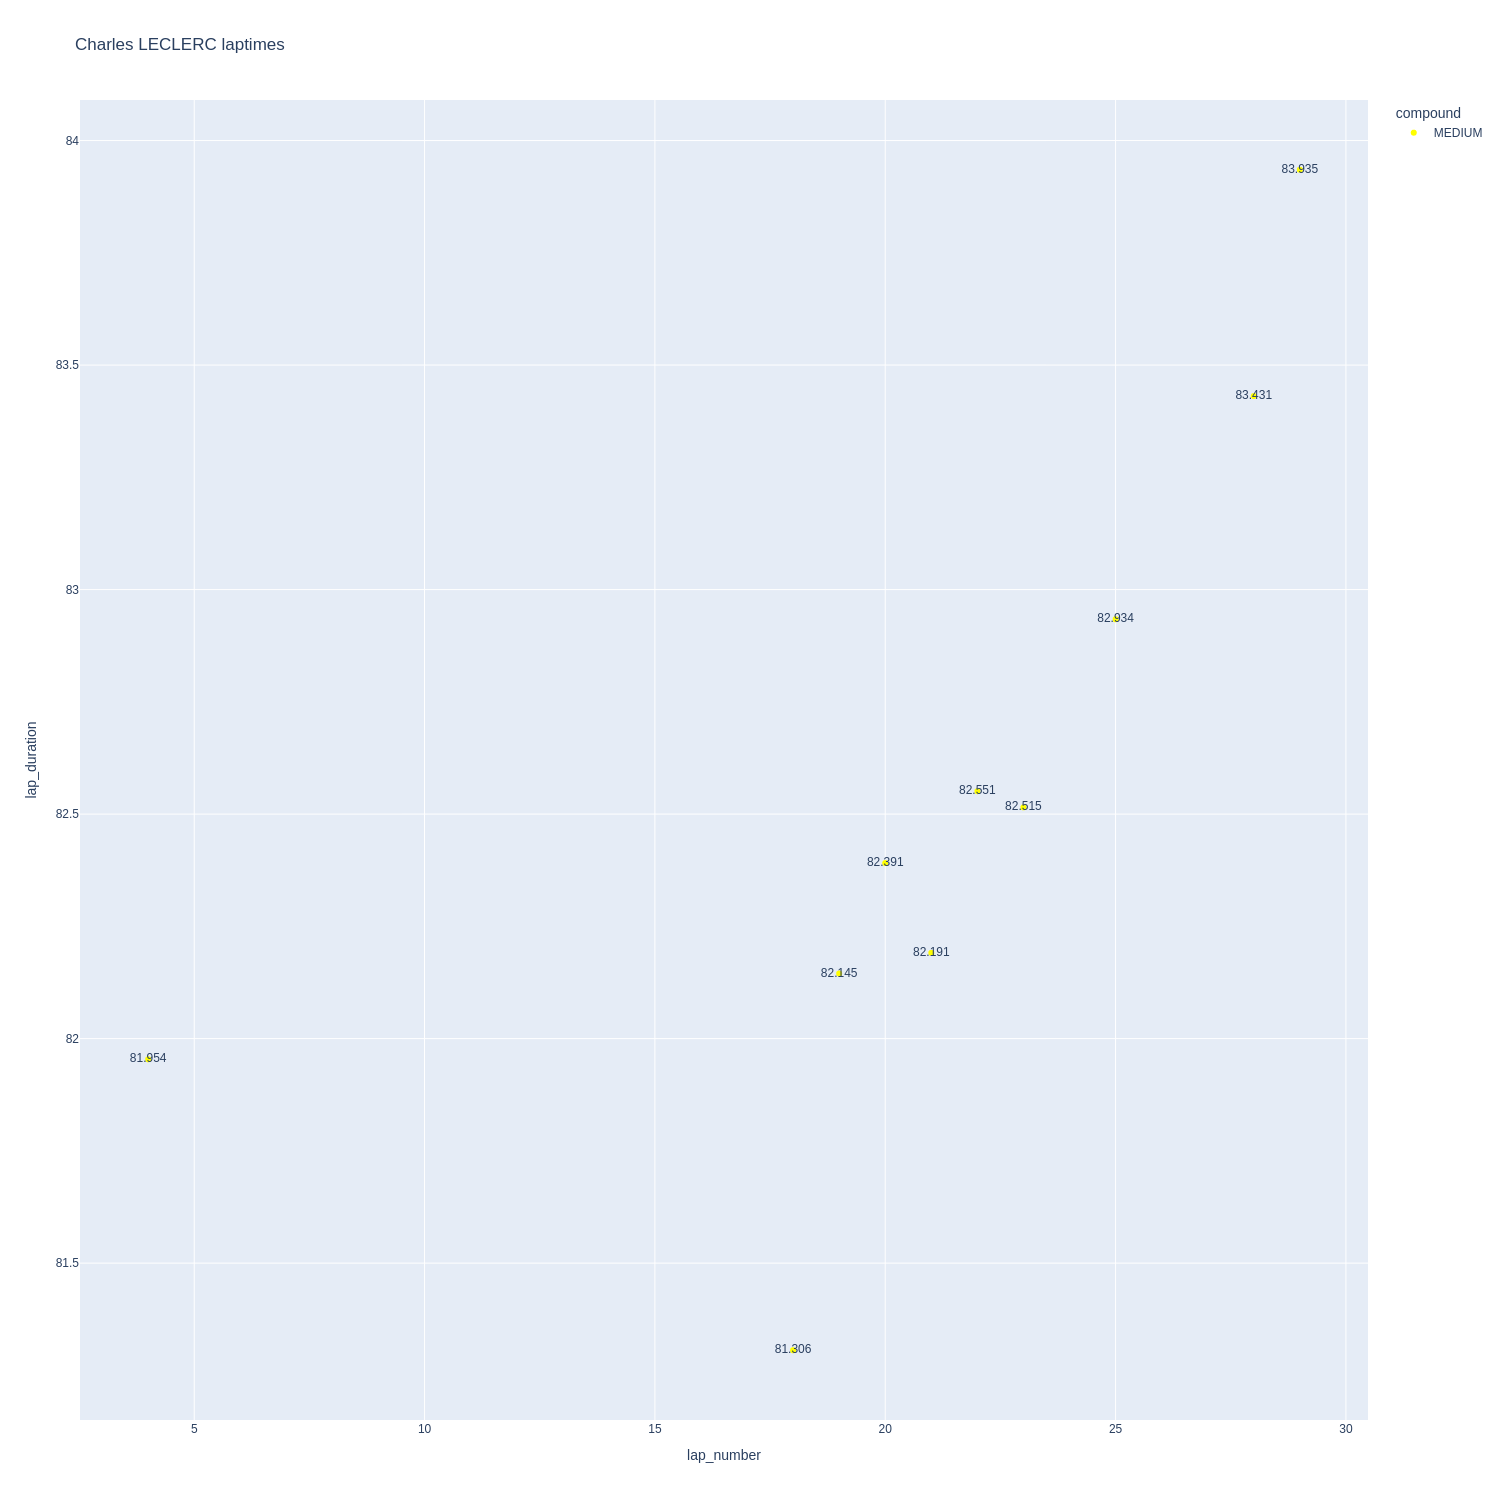

In [26]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

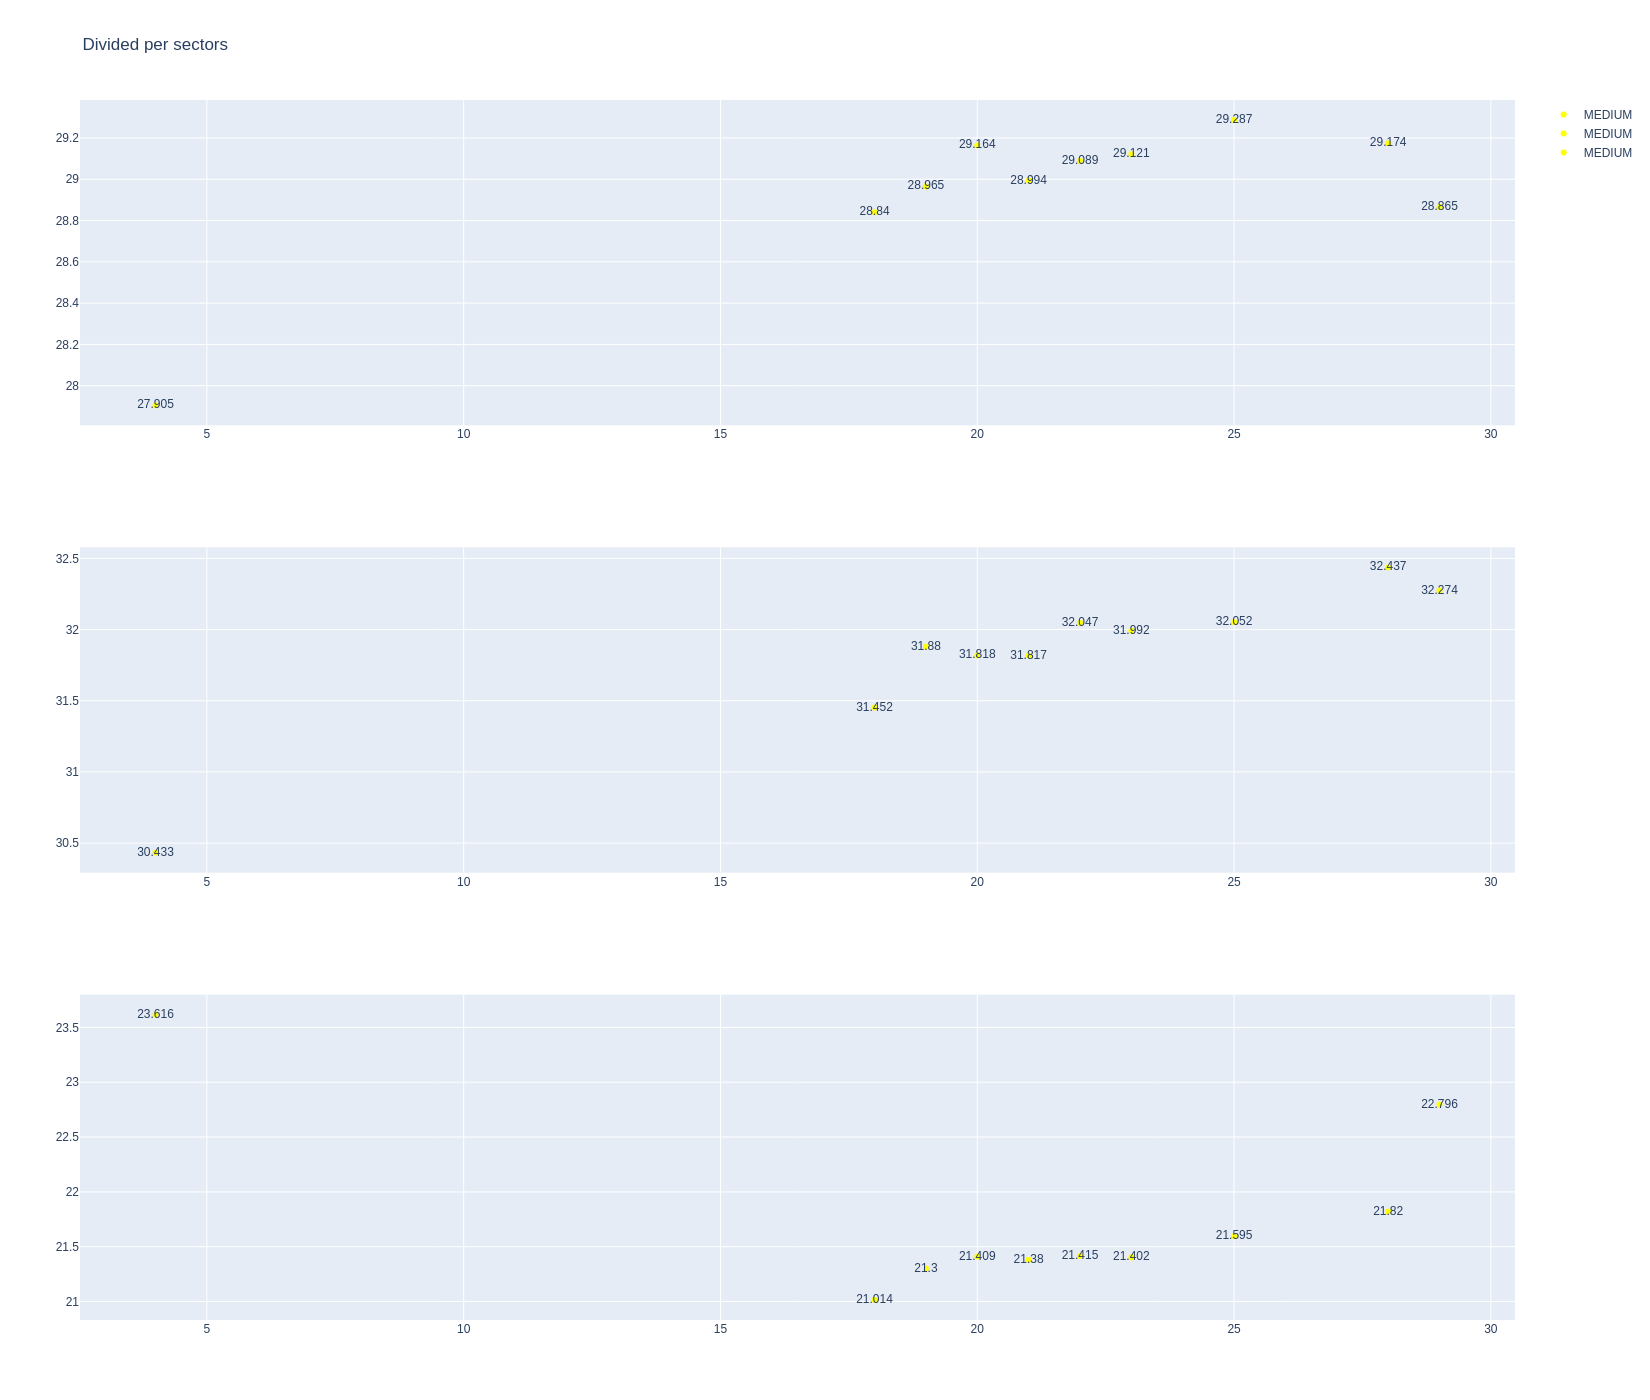

In [27]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [28]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
34   Lewis HAMILTON   MEDIUM  2025-10-24T22:03:02.493000+00:00           2   
241  Lewis HAMILTON     SOFT  2025-10-24T22:28:07.765000+00:00          12   
428  Lewis HAMILTON   MEDIUM  2025-10-24T22:49:00.048000+00:00          21   
448  Lewis HAMILTON   MEDIUM  2025-10-24T22:50:22.965000+00:00          22   
468  Lewis HAMILTON   MEDIUM  2025-10-24T22:51:45.700000+00:00          23   
485  Lewis HAMILTON   MEDIUM  2025-10-24T22:53:08.434000+00:00          24   
505  Lewis HAMILTON   MEDIUM  2025-10-24T22:54:31.316000+00:00          25   
525  Lewis HAMILTON   MEDIUM  2025-10-24T22:55:54.410000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
34              27.949             32.307             21.354        81.610  
241             27.707             30.025             26.222        83.954  
428             29.221             32.323             21.365        82.909  
448             29.051             32.124             21.493        82.668  
468             29.129             32.191             21.564        82.884  
485             29.415             32.113             21.348        82.876  
505             29.381             32.101             21.491        82.973  
525             29.031             32.177             21.561        82.769

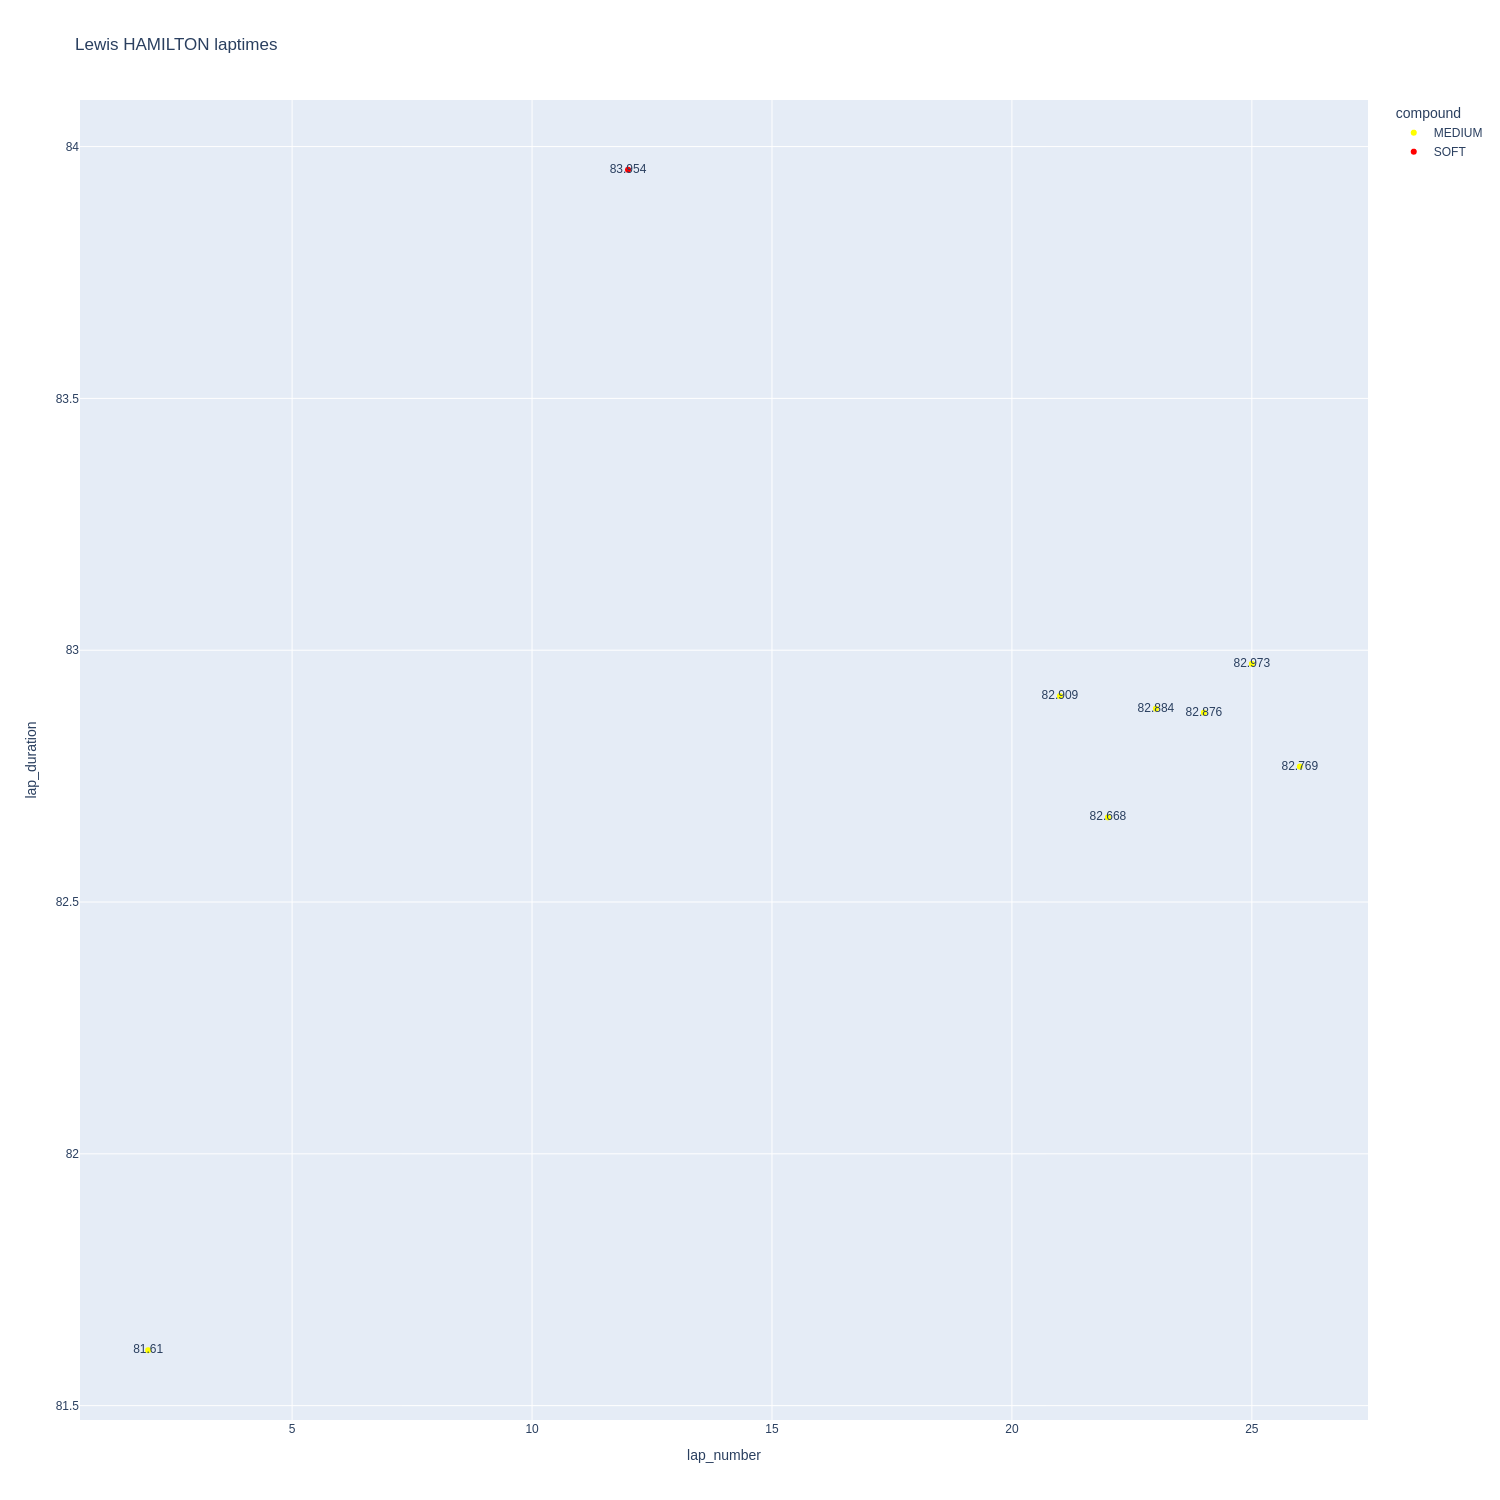

In [29]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

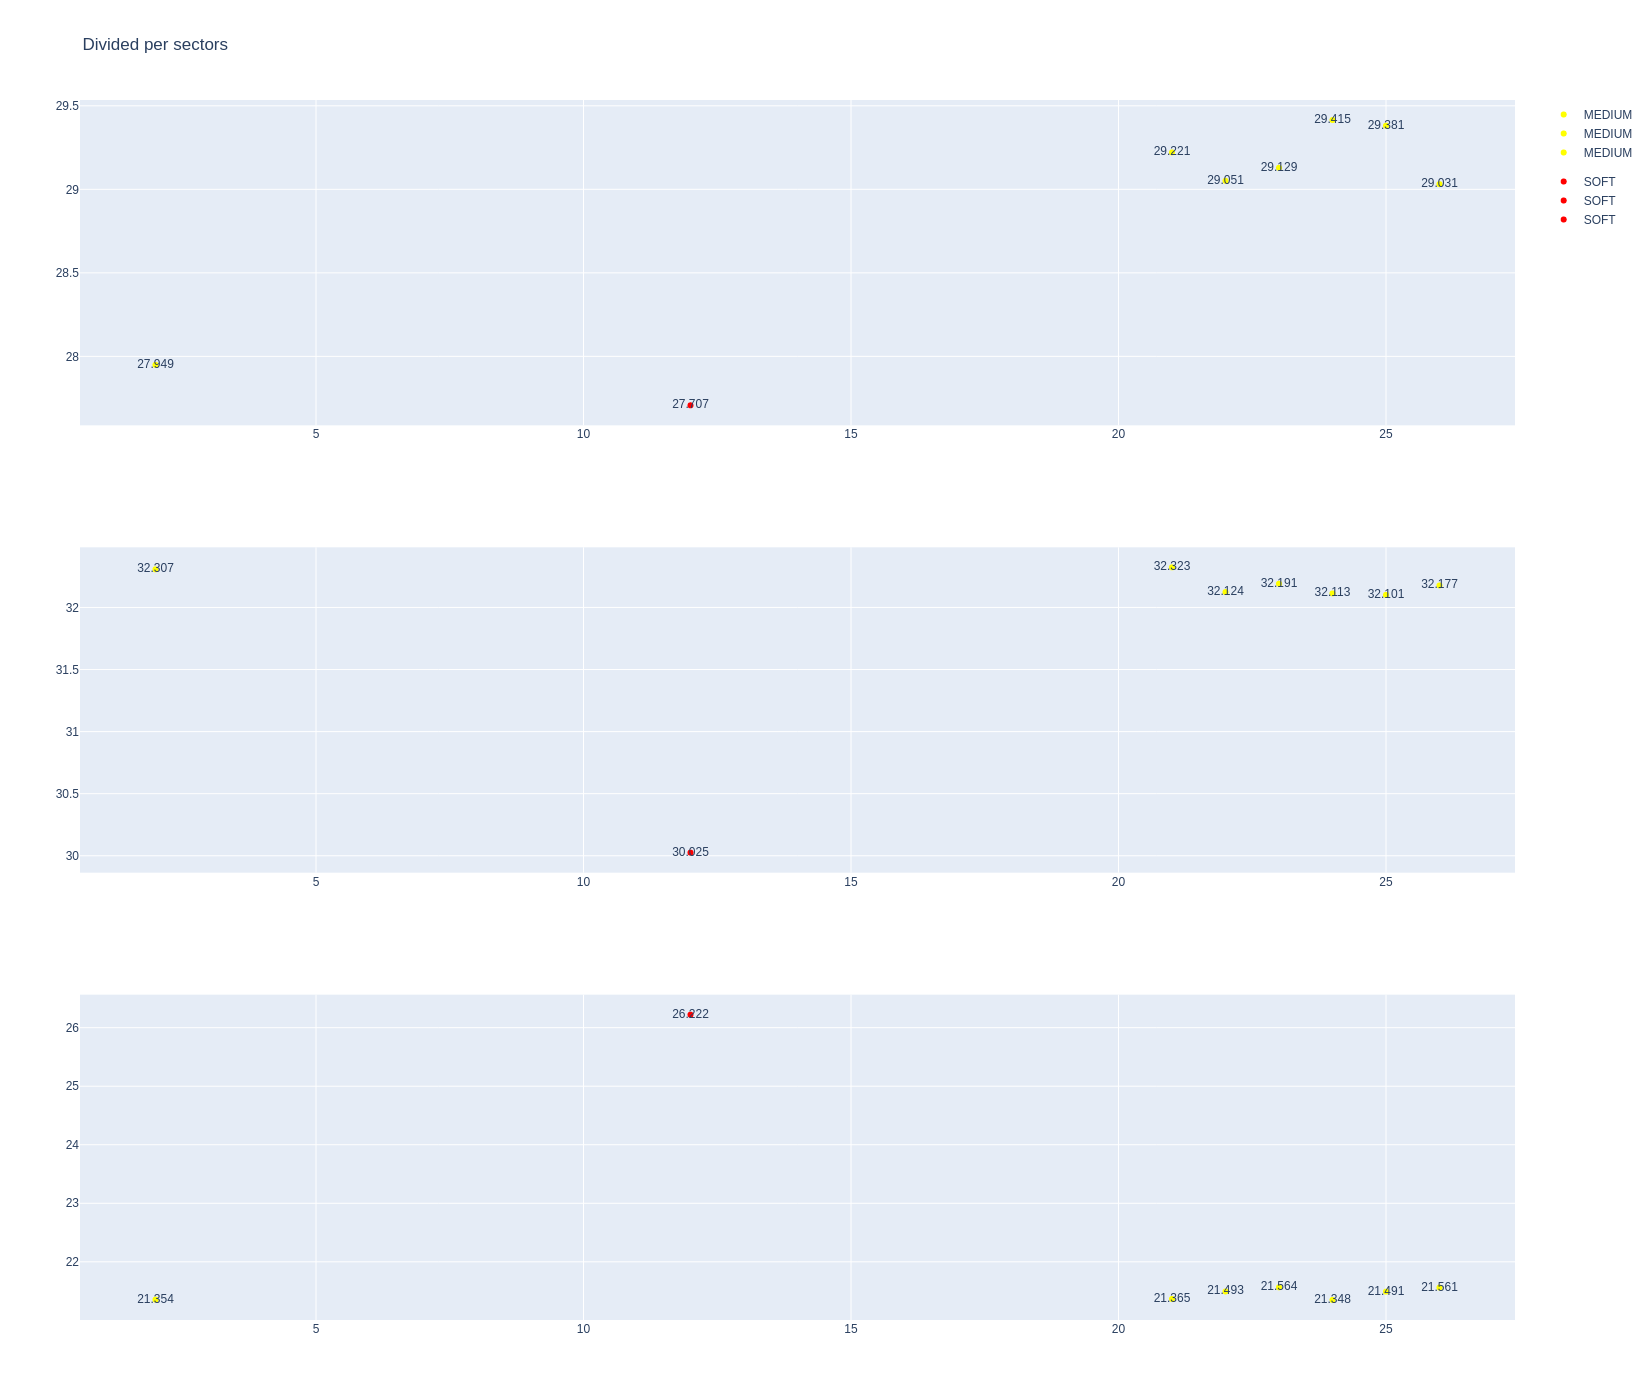

In [30]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [31]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  \
11          1272         9871             1             63          1   
19          1272         9871             1             12          1   
28          1272         9871             2             63          8   
43          1272         9871             3             63         13   
44          1272         9871             2             12          5   
59          1272         9871             3             12         10   
63          1272         9871             4             63         16   
78          1272         9871             5             63         19   
87          1272         9871             4             12         13   
101         1272         9871             6             63         29   

     lap_end compound  tyre_age_at_start  
11         7   MEDIUM                  0  
19         4   MEDIUM                  0  
28        12   MEDIUM                  7  
43        15     SOFT                  0  
44         9   MEDIUM                  4  
59        12     SOFT                  0  
63        18     SOFT                  3  
78        28   MEDIUM                 12  
87        27   MEDIUM                  9  
101       33     SOFT                  6

In [32]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
360  Kimi ANTONELLI   MEDIUM  2025-10-24T22:43:28.222000+00:00          14   
374  Kimi ANTONELLI   MEDIUM  2025-10-24T22:44:50.569000+00:00          15   
390  Kimi ANTONELLI   MEDIUM  2025-10-24T22:46:12.739000+00:00          16   
409  Kimi ANTONELLI   MEDIUM  2025-10-24T22:47:34.845000+00:00          17   
426  Kimi ANTONELLI   MEDIUM  2025-10-24T22:48:57.439000+00:00          18   
446  Kimi ANTONELLI   MEDIUM  2025-10-24T22:50:19.918000+00:00          19   
486  Kimi ANTONELLI   MEDIUM  2025-10-24T22:53:13.122000+00:00          21   
506  Kimi ANTONELLI   MEDIUM  2025-10-24T22:54:35.737000+00:00          22   
526  Kimi ANTONELLI   MEDIUM  2025-10-24T22:55:58.410000+00:00          23   
545  Kimi ANTONELLI   MEDIUM  2025-10-24T22:57:21.542000+00:00          24   
565  Kimi ANTONELLI   MEDIUM  2025-10-24T22:58:44.529000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
360             29.147             32.027             21.205        82.379  
374             29.031             31.948             21.061        82.040  
390             29.183             31.884             21.095        82.162  
409             29.002             32.162             21.437        82.601  
426             29.112             32.069             21.258        82.439  
446             28.994             32.152             22.302        83.448  
486             29.234             32.112             21.351        82.697  
506             29.061             32.175             21.301        82.537  
526             29.262             32.304             21.668        83.234  
545             29.055             32.419             21.577        83.051  
565             29.148             32.785             21.601        83.534

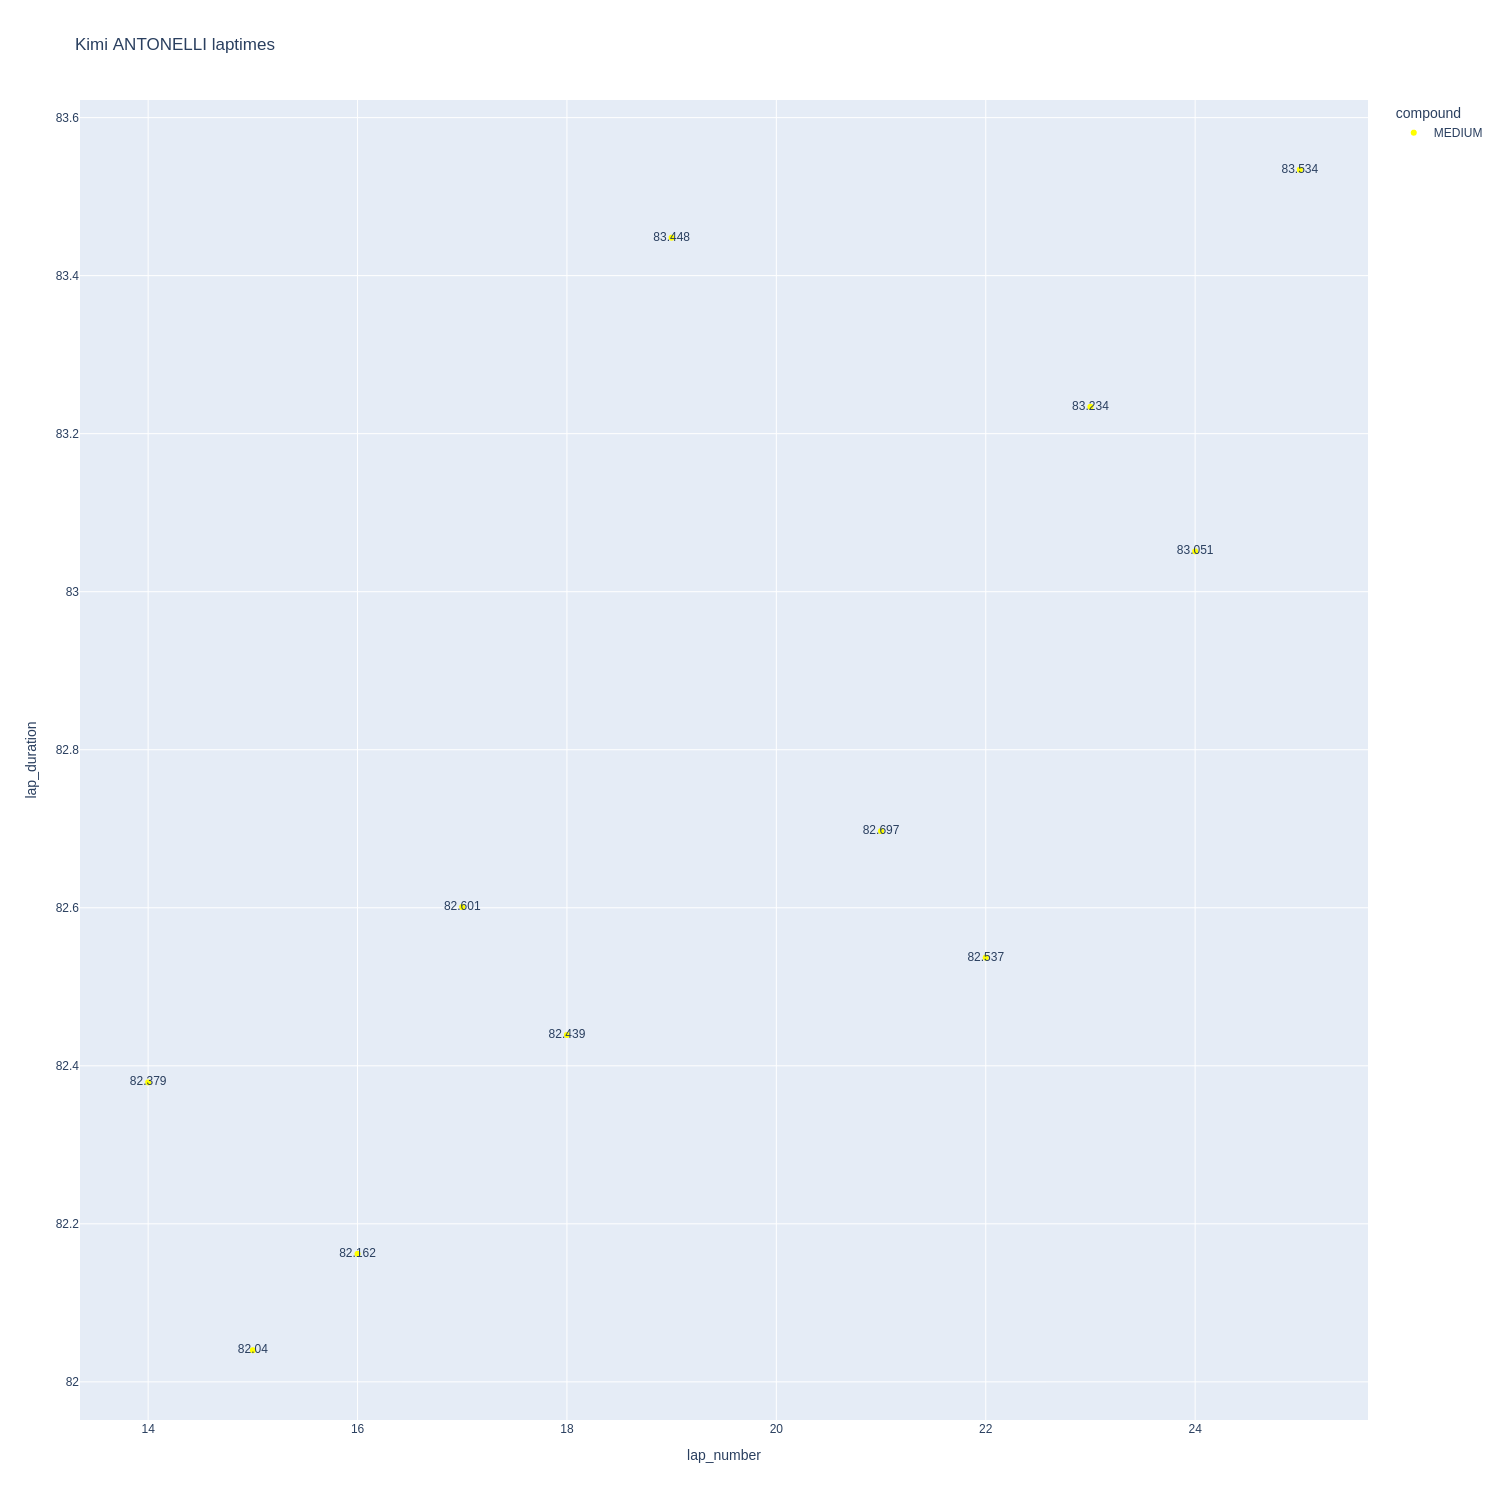

In [33]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

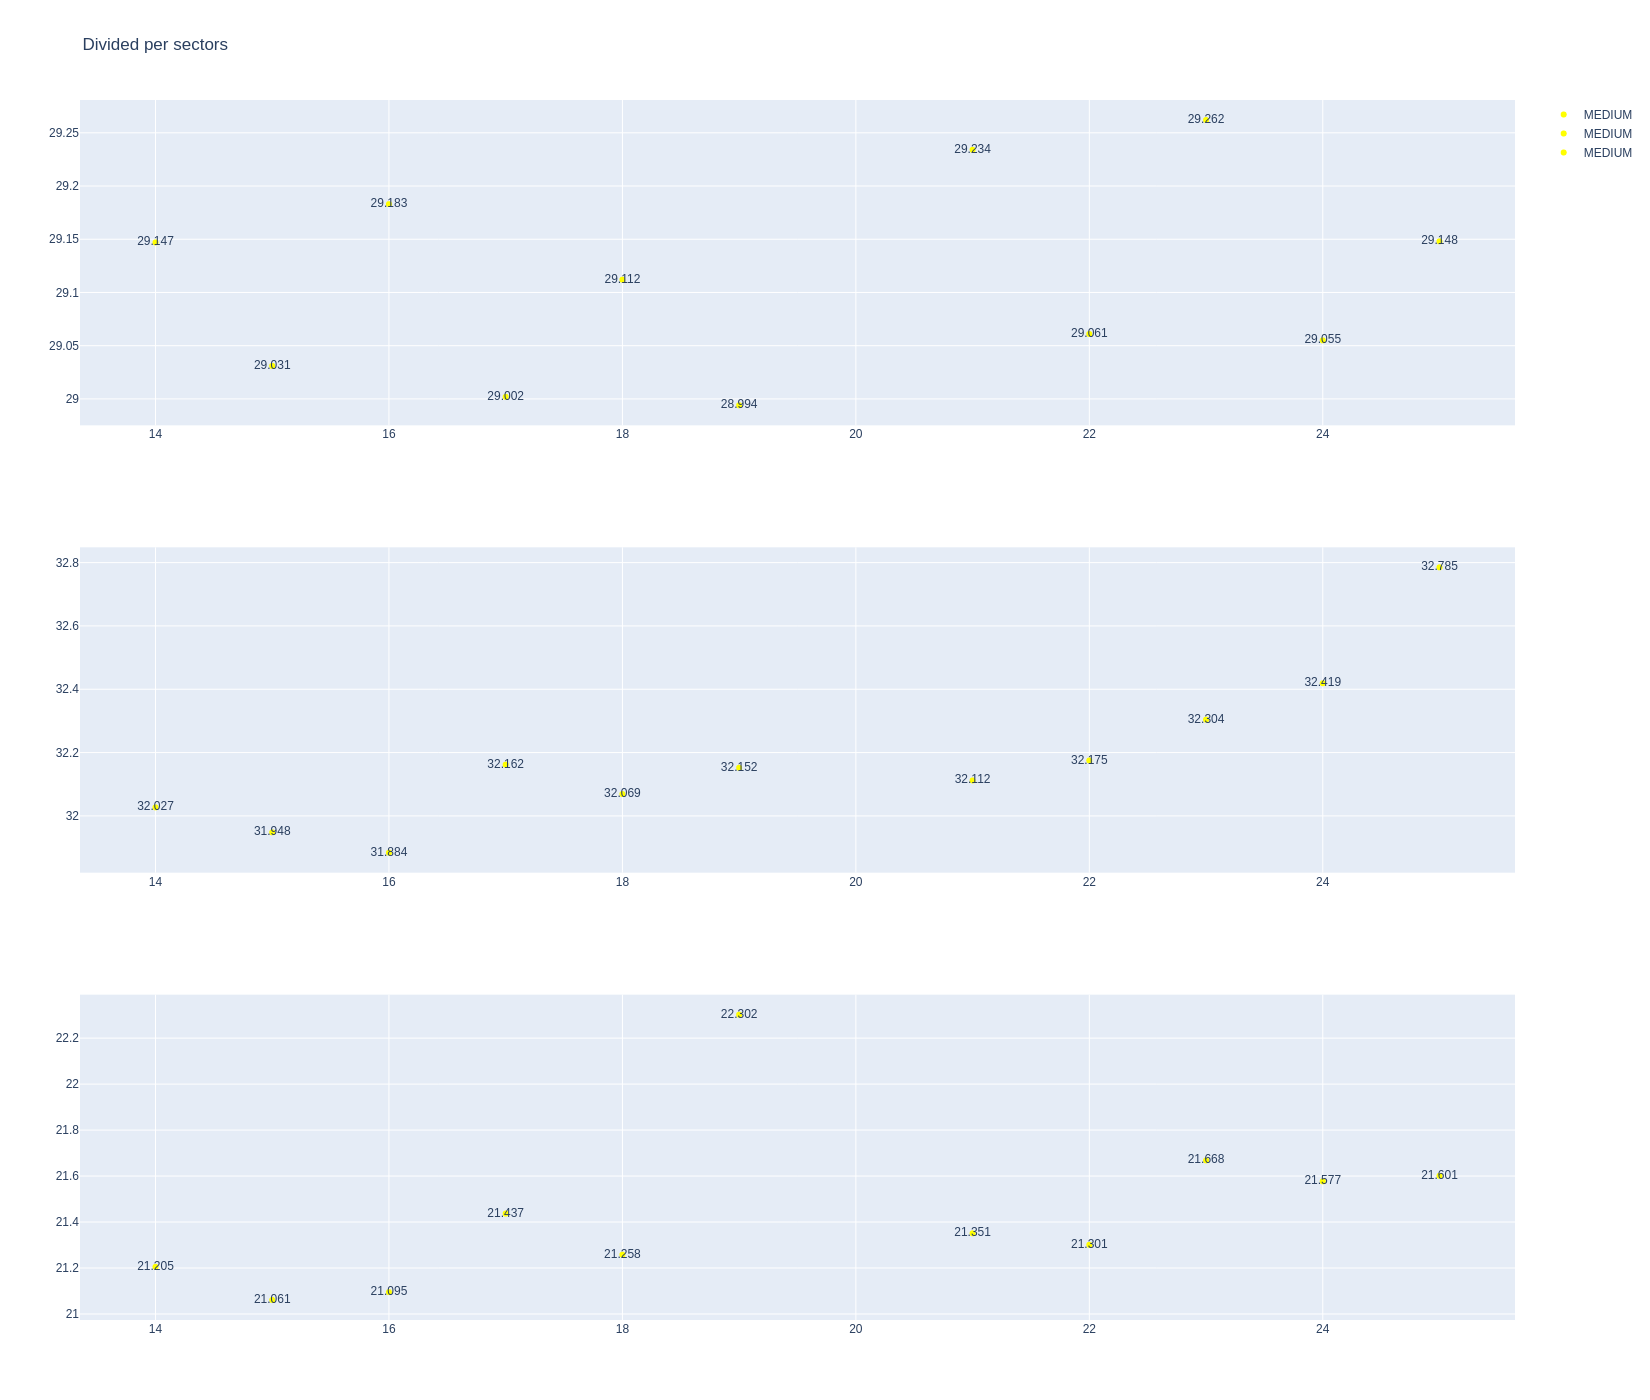

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [35]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
19   George RUSSELL   MEDIUM  2025-10-24T22:01:40.249000+00:00           2   
369  George RUSSELL   MEDIUM  2025-10-24T22:44:26.088000+00:00          20   
384  George RUSSELL   MEDIUM  2025-10-24T22:45:48.663000+00:00          21   
402  George RUSSELL   MEDIUM  2025-10-24T22:47:10.907000+00:00          22   
421  George RUSSELL   MEDIUM  2025-10-24T22:48:33.595000+00:00          23   
440  George RUSSELL   MEDIUM  2025-10-24T22:49:55.768000+00:00          24   
460  George RUSSELL   MEDIUM  2025-10-24T22:51:17.809000+00:00          25   
479  George RUSSELL   MEDIUM  2025-10-24T22:52:40.169000+00:00          26   
560  George RUSSELL     SOFT  2025-10-24T22:58:36.794000+00:00          30   
580  George RUSSELL     SOFT  2025-10-24T22:59:58.172000+00:00          31   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
19              28.319             31.138             20.796        80.253  
369             29.370             31.956             21.209        82.535  
384             29.245             31.929             21.176        82.350  
402             29.294             31.988             21.298        82.580  
421             28.989             31.871             21.324        82.184  
440             28.946             31.883             21.216        82.045  
460             29.074             31.909             21.325        82.308  
479             29.118             32.231             21.460        82.809  
560             28.722             31.558             21.039        81.319  
580             28.991             31.460             21.099        81.550

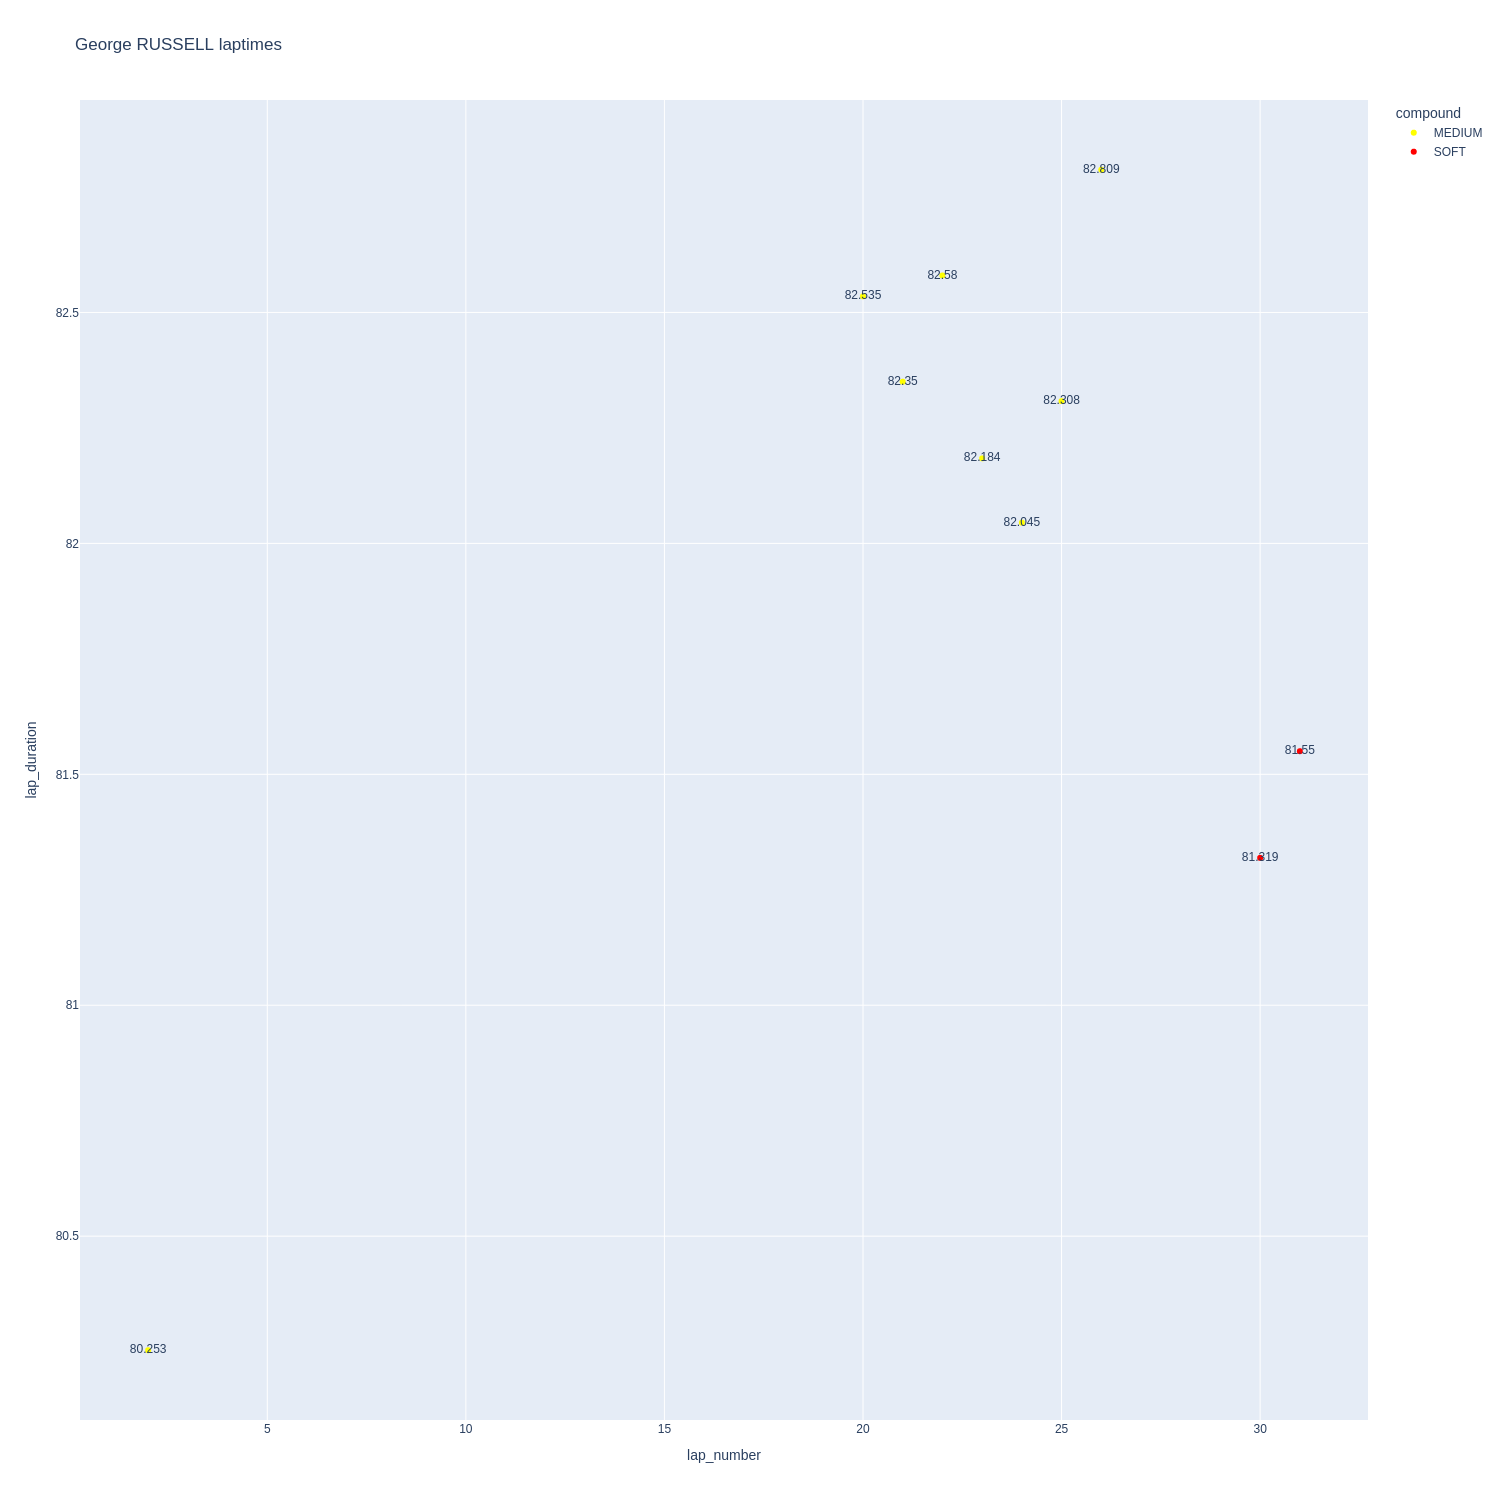

In [36]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

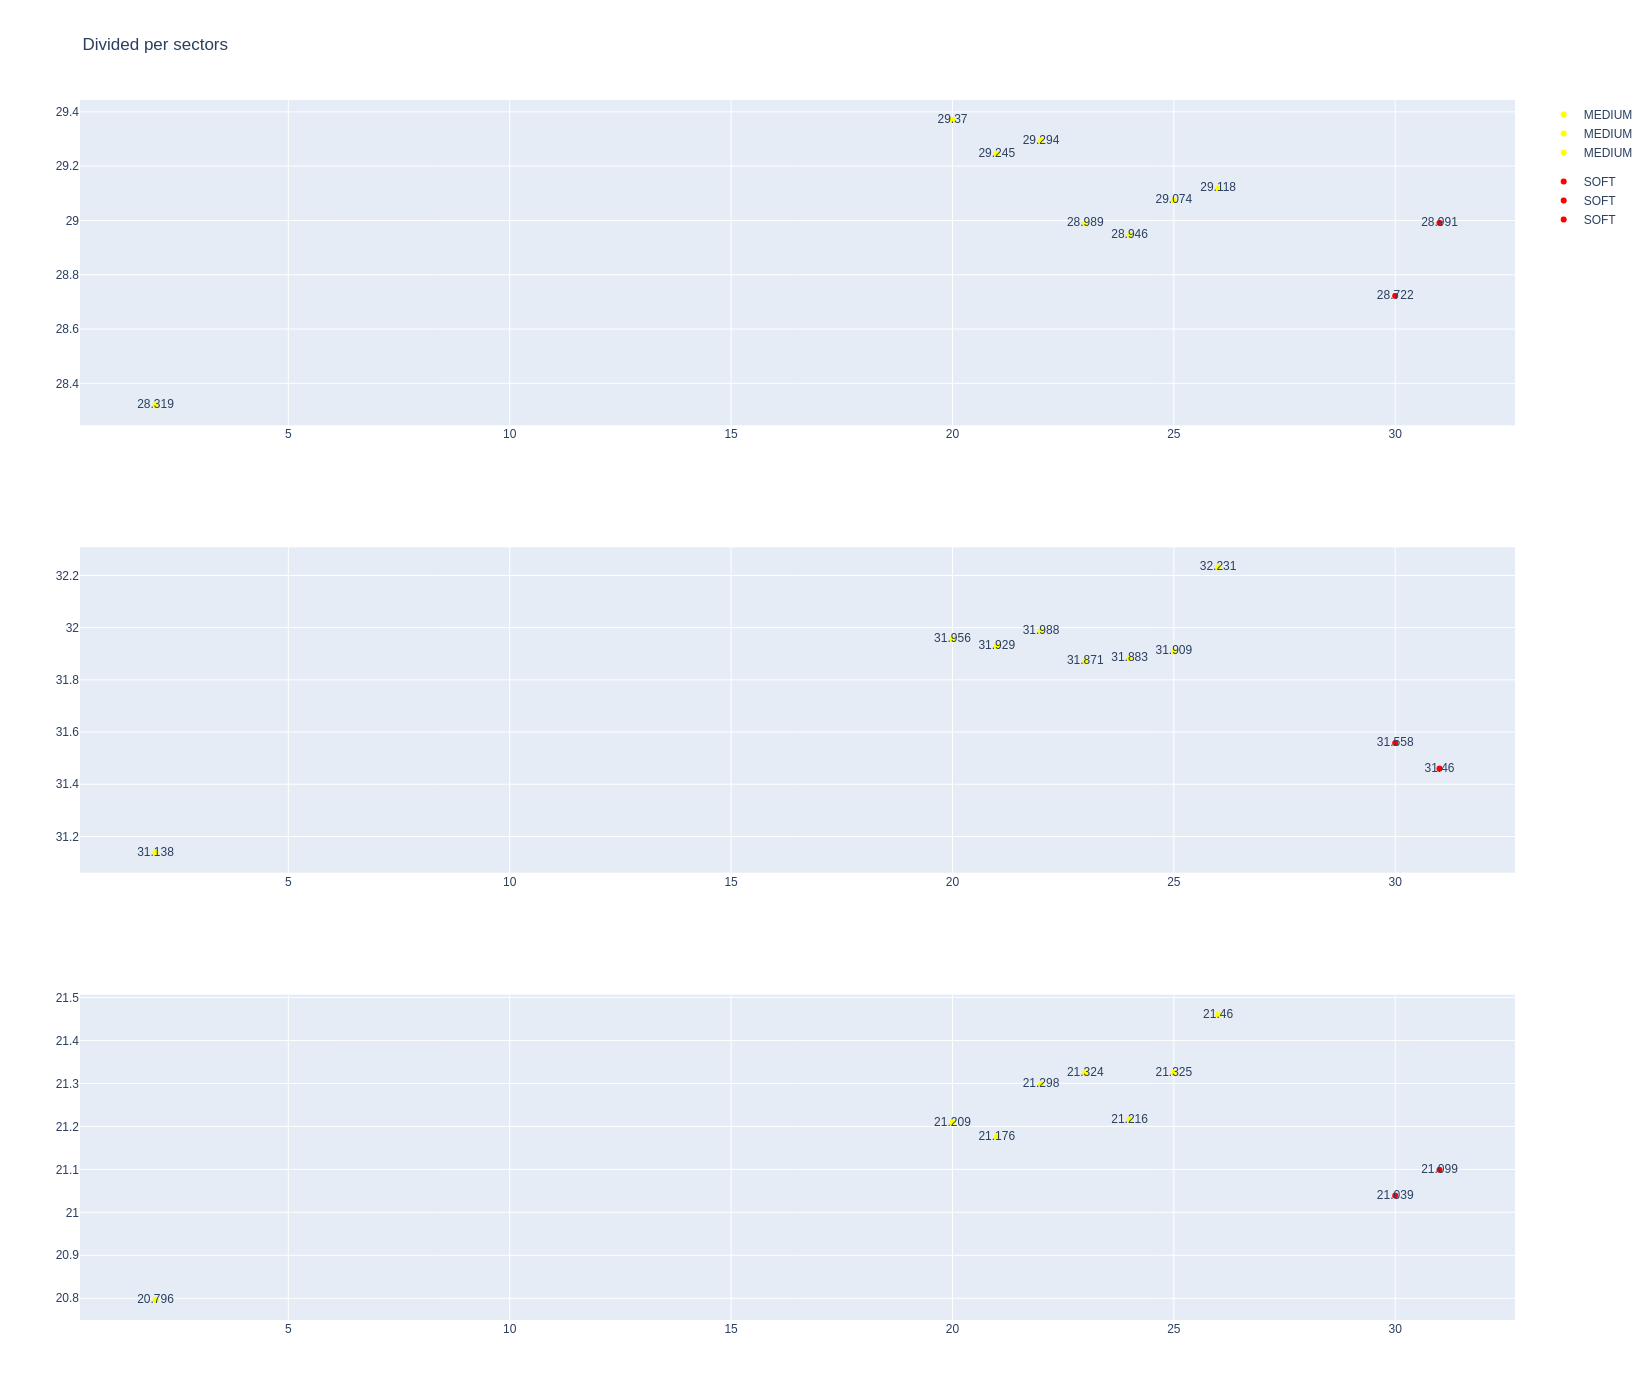

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [38]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
25         1272         9871             1             81          1        9   
26         1272         9871             1              4          1        9   
57         1272         9871             2             81         10       15   
60         1272         9871             2              4         10       15   
77         1272         9871             3              4         16       26   
80         1272         9871             3             81         16       27   
97         1272         9871             4             81         28       31   
99         1272         9871             4              4         27       31   

   compound  tyre_age_at_start  
25   MEDIUM                  0  
26   MEDIUM                  0  
57     SOFT                  0  
60     SOFT                  0  
77     SOFT                  6  
80     SOFT                  6  
97   MEDIUM                  9  
99   MEDIUM                  9

In [39]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
353  Lando NORRIS     SOFT  2025-10-24T22:42:55.160000+00:00          17   
368  Lando NORRIS     SOFT  2025-10-24T22:44:16.588000+00:00          18   
383  Lando NORRIS     SOFT  2025-10-24T22:45:37.773000+00:00          19   
400  Lando NORRIS     SOFT  2025-10-24T22:46:59.095000+00:00          20   
419  Lando NORRIS     SOFT  2025-10-24T22:48:20.658000+00:00          21   
438  Lando NORRIS     SOFT  2025-10-24T22:49:42.549000+00:00          22   
458  Lando NORRIS     SOFT  2025-10-24T22:51:04.731000+00:00          23   
477  Lando NORRIS     SOFT  2025-10-24T22:52:26.809000+00:00          24   
497  Lando NORRIS     SOFT  2025-10-24T22:53:49.050000+00:00          25   
558  Lando NORRIS   MEDIUM  2025-10-24T22:58:17.591000+00:00          28   
578  Lando NORRIS   MEDIUM  2025-10-24T22:59:38.623000+00:00          29   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
353             29.160             31.412             20.879        81.451  
368             29.045             31.291             20.900        81.236  
383             29.031             31.333             20.942        81.306  
400             28.994             31.475             21.088        81.557  
419             29.167             31.573             21.171        81.911  
438             29.343             31.577             21.218        82.138  
458             29.185             31.715             21.167        82.067  
477             29.167             31.785             21.321        82.273  
497             29.152             31.927             21.234        82.313  
558             28.926             31.329             20.788        81.043  
578             29.052             31.169             20.813        81.034

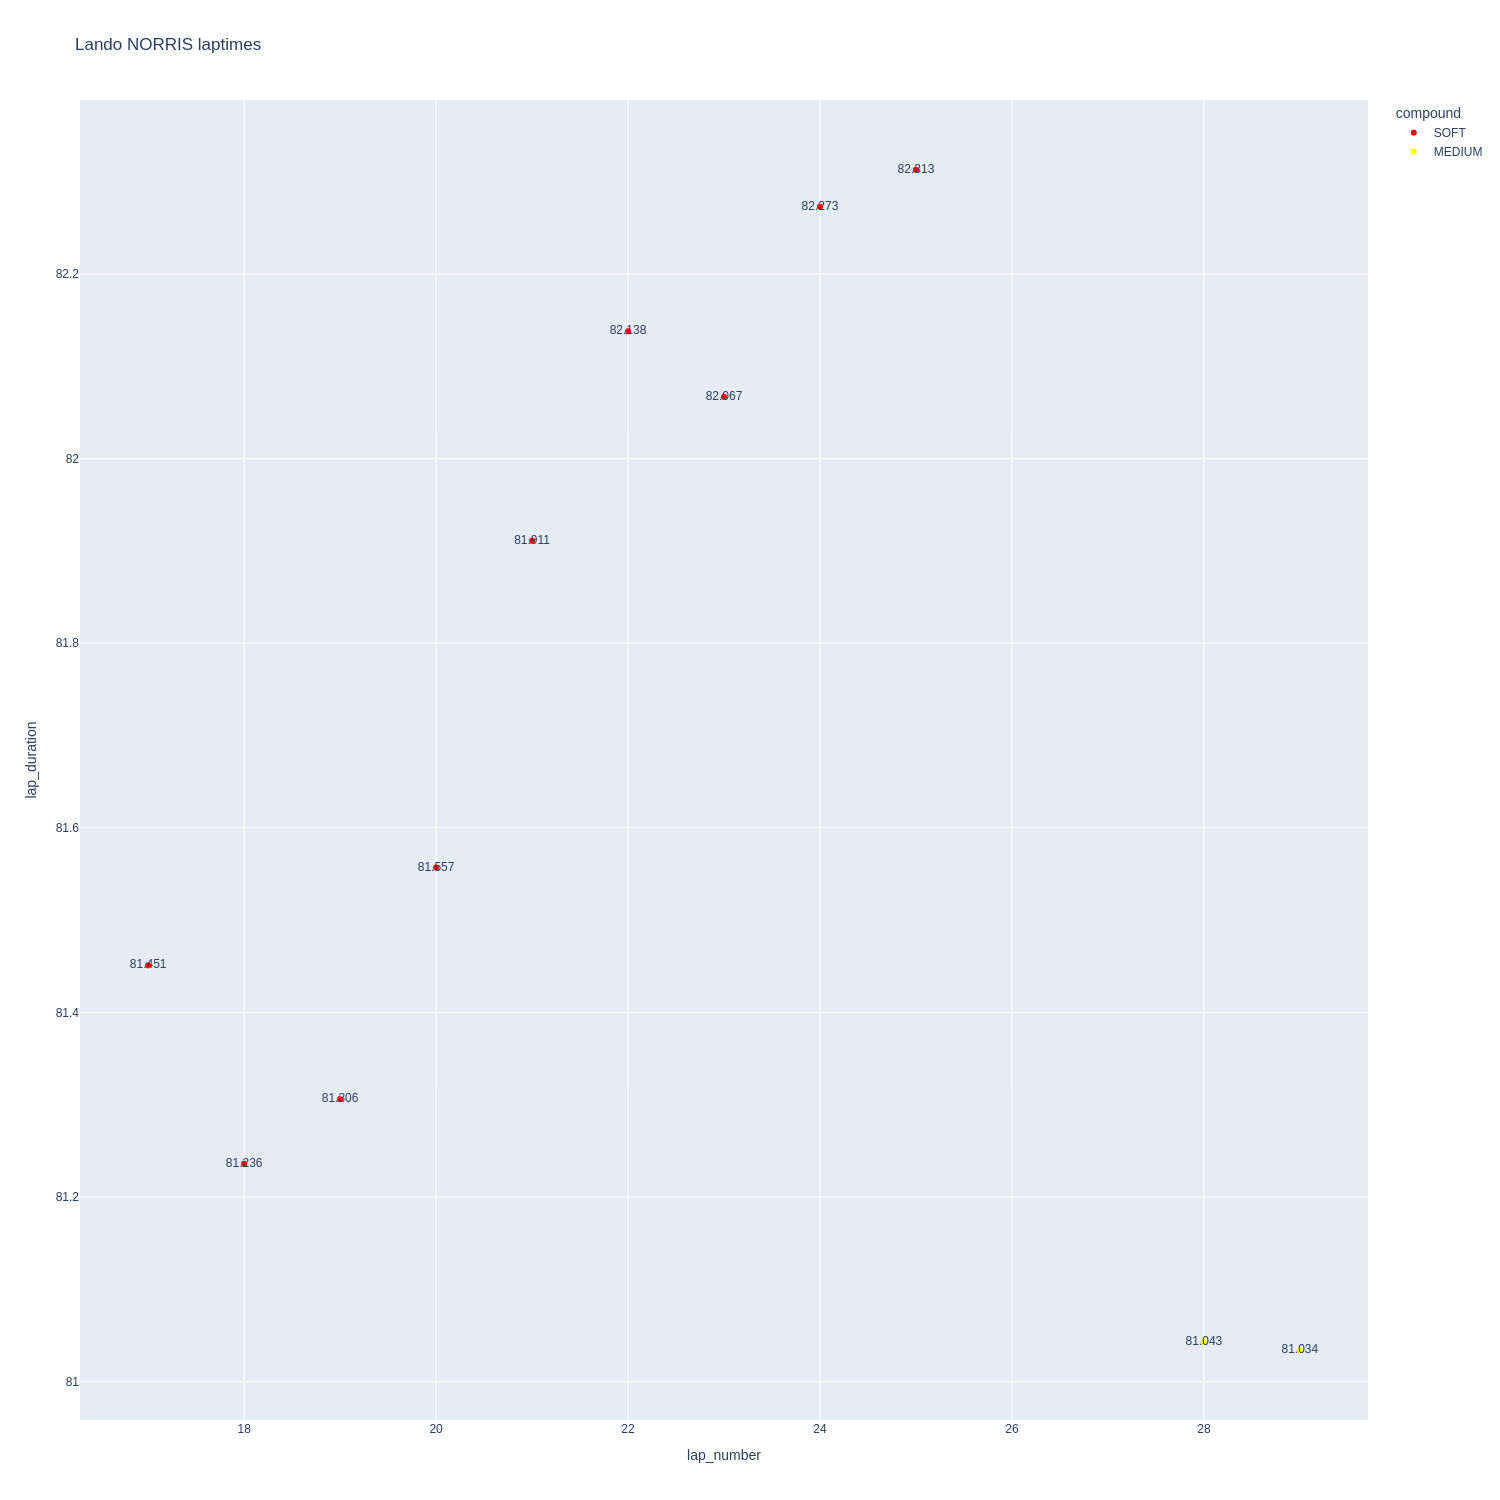

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

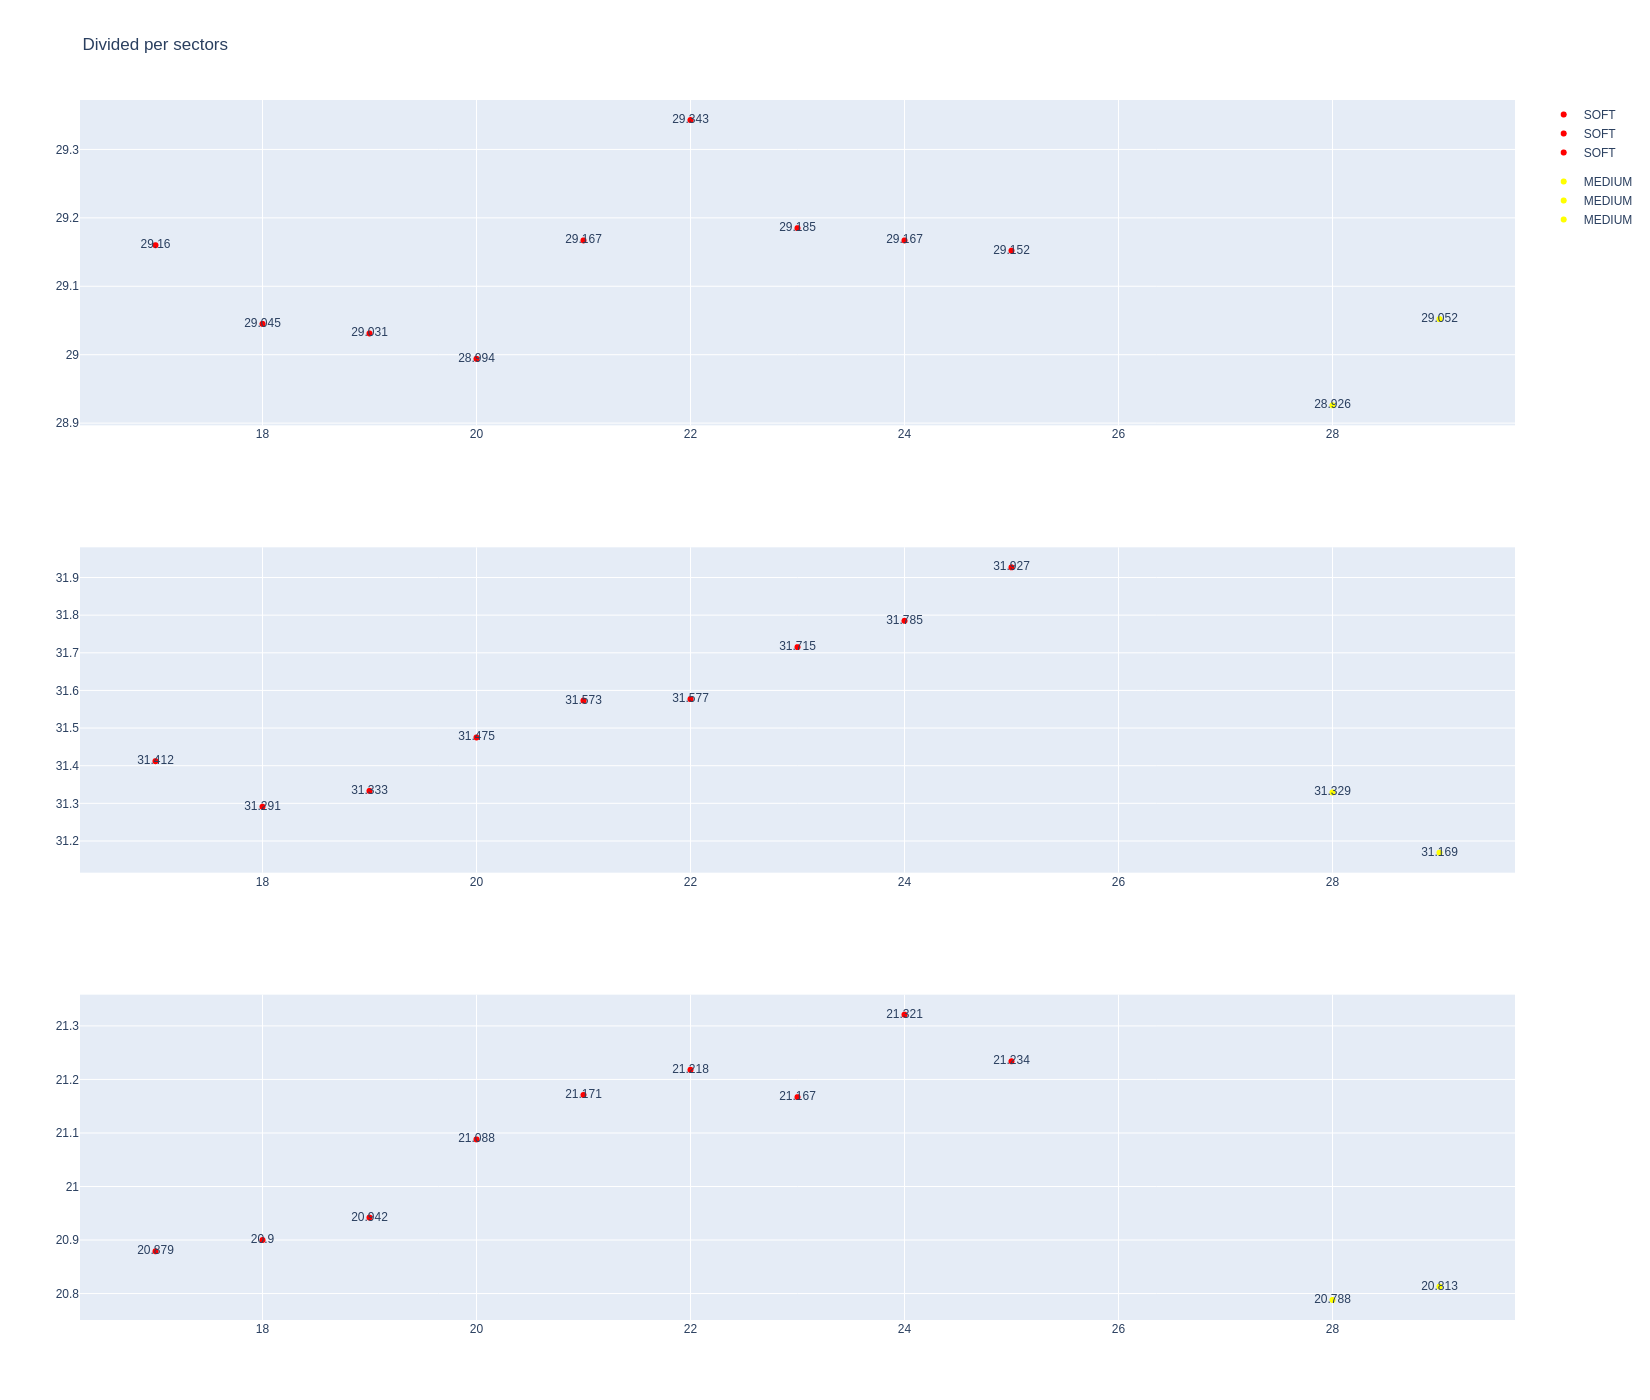

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [42]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
349  Oscar PIASTRI     SOFT  2025-10-24T22:42:25.425000+00:00          17   
364  Oscar PIASTRI     SOFT  2025-10-24T22:43:47.713000+00:00          18   
378  Oscar PIASTRI     SOFT  2025-10-24T22:45:09.929000+00:00          19   
395  Oscar PIASTRI     SOFT  2025-10-24T22:46:32.548000+00:00          20   
413  Oscar PIASTRI     SOFT  2025-10-24T22:47:54.595000+00:00          21   
432  Oscar PIASTRI     SOFT  2025-10-24T22:49:16.924000+00:00          22   
452  Oscar PIASTRI     SOFT  2025-10-24T22:50:39.434000+00:00          23   
472  Oscar PIASTRI     SOFT  2025-10-24T22:52:02.028000+00:00          24   
491  Oscar PIASTRI     SOFT  2025-10-24T22:53:24.768000+00:00          25   
511  Oscar PIASTRI     SOFT  2025-10-24T22:54:47.128000+00:00          26   
576  Oscar PIASTRI   MEDIUM  2025-10-24T22:59:21.951000+00:00          29   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
349             29.577             31.721             21.067        82.365  
364             29.382             31.785             21.082        82.249  
378             28.814             32.484             21.262        82.560  
395             28.618             32.125             21.259        82.002  
413             29.248             32.045             21.099        82.392  
432             29.377             31.854             21.263        82.494  
452             29.233             31.943             21.363        82.539  
472             29.383             31.942             21.437        82.762  
491             29.145             31.963             21.273        82.381  
511             29.031             31.873             22.105        83.009  
576             29.113             31.751             21.019        81.883

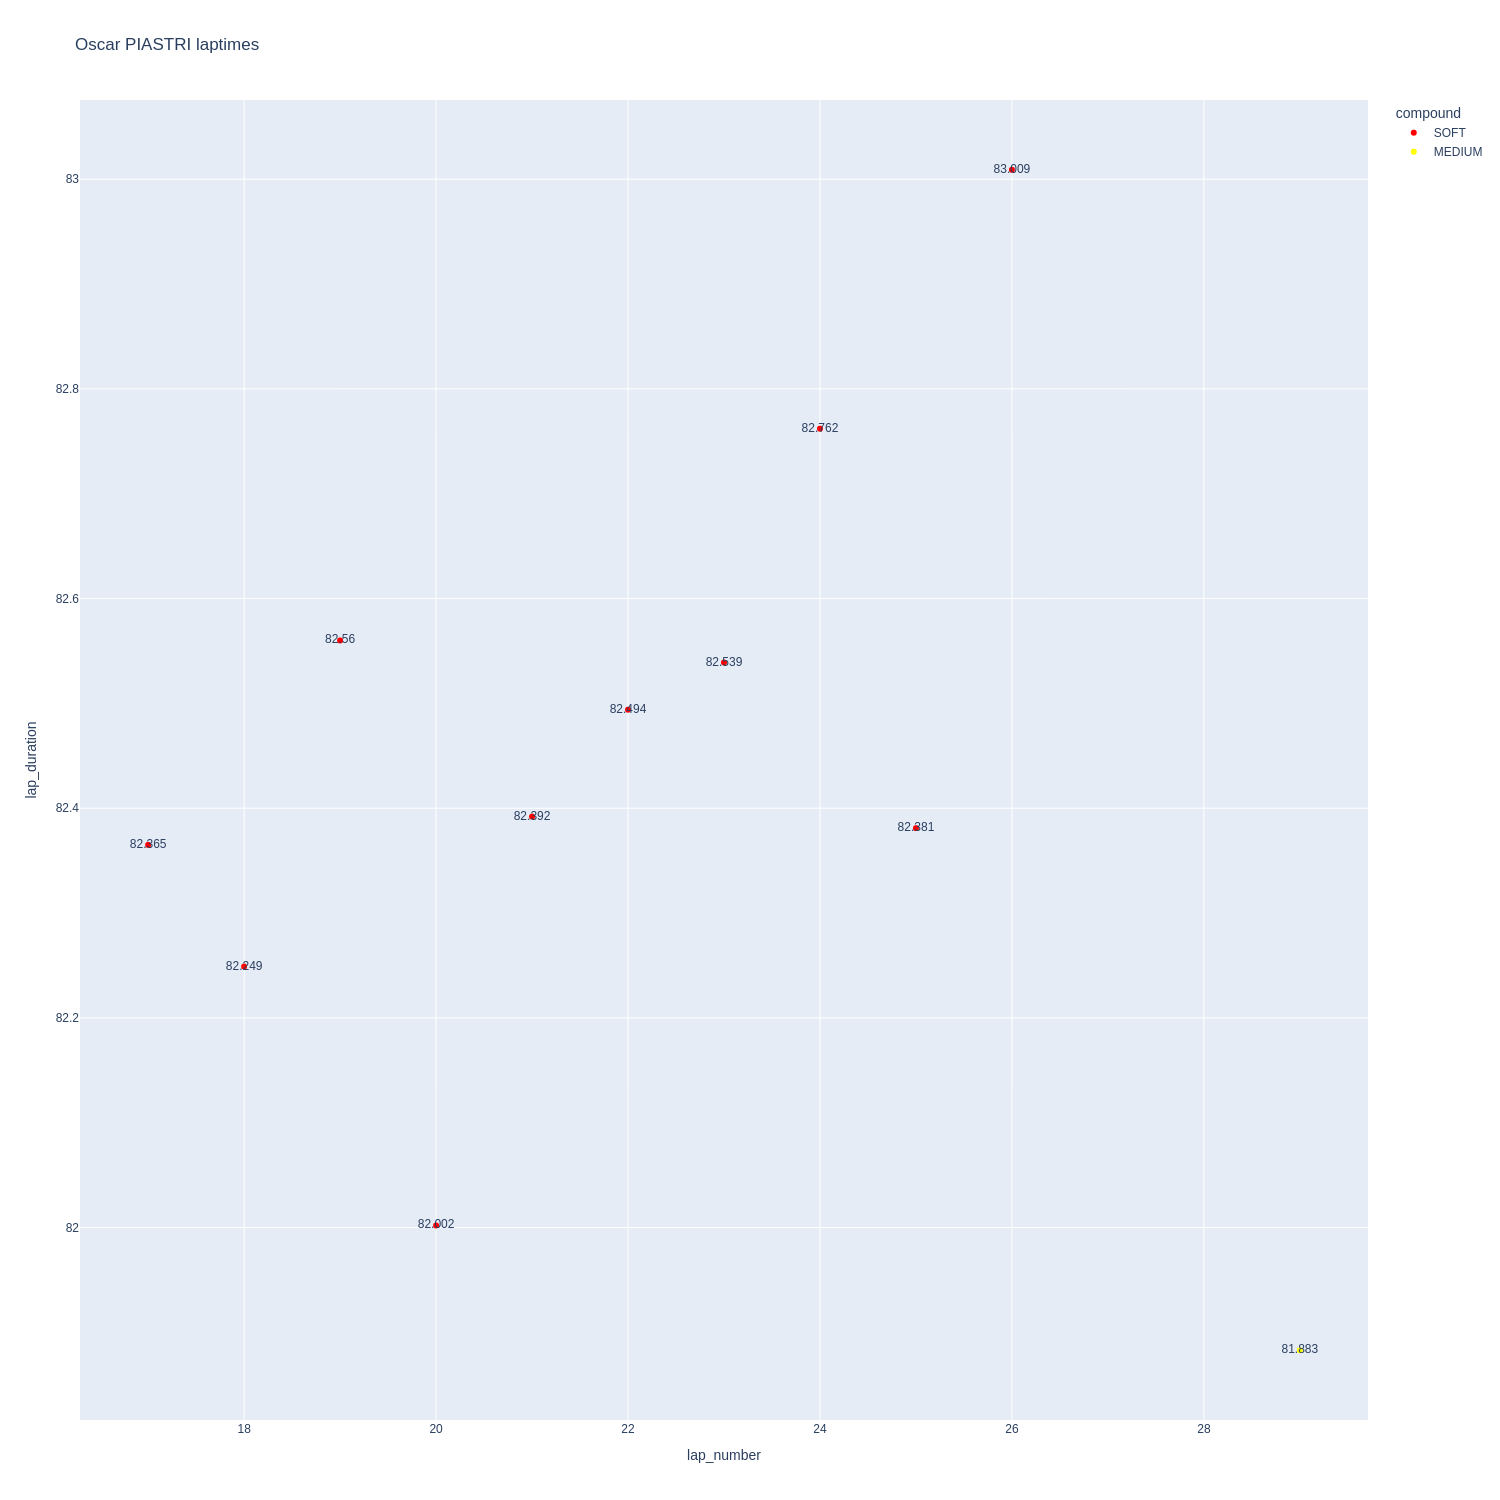

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

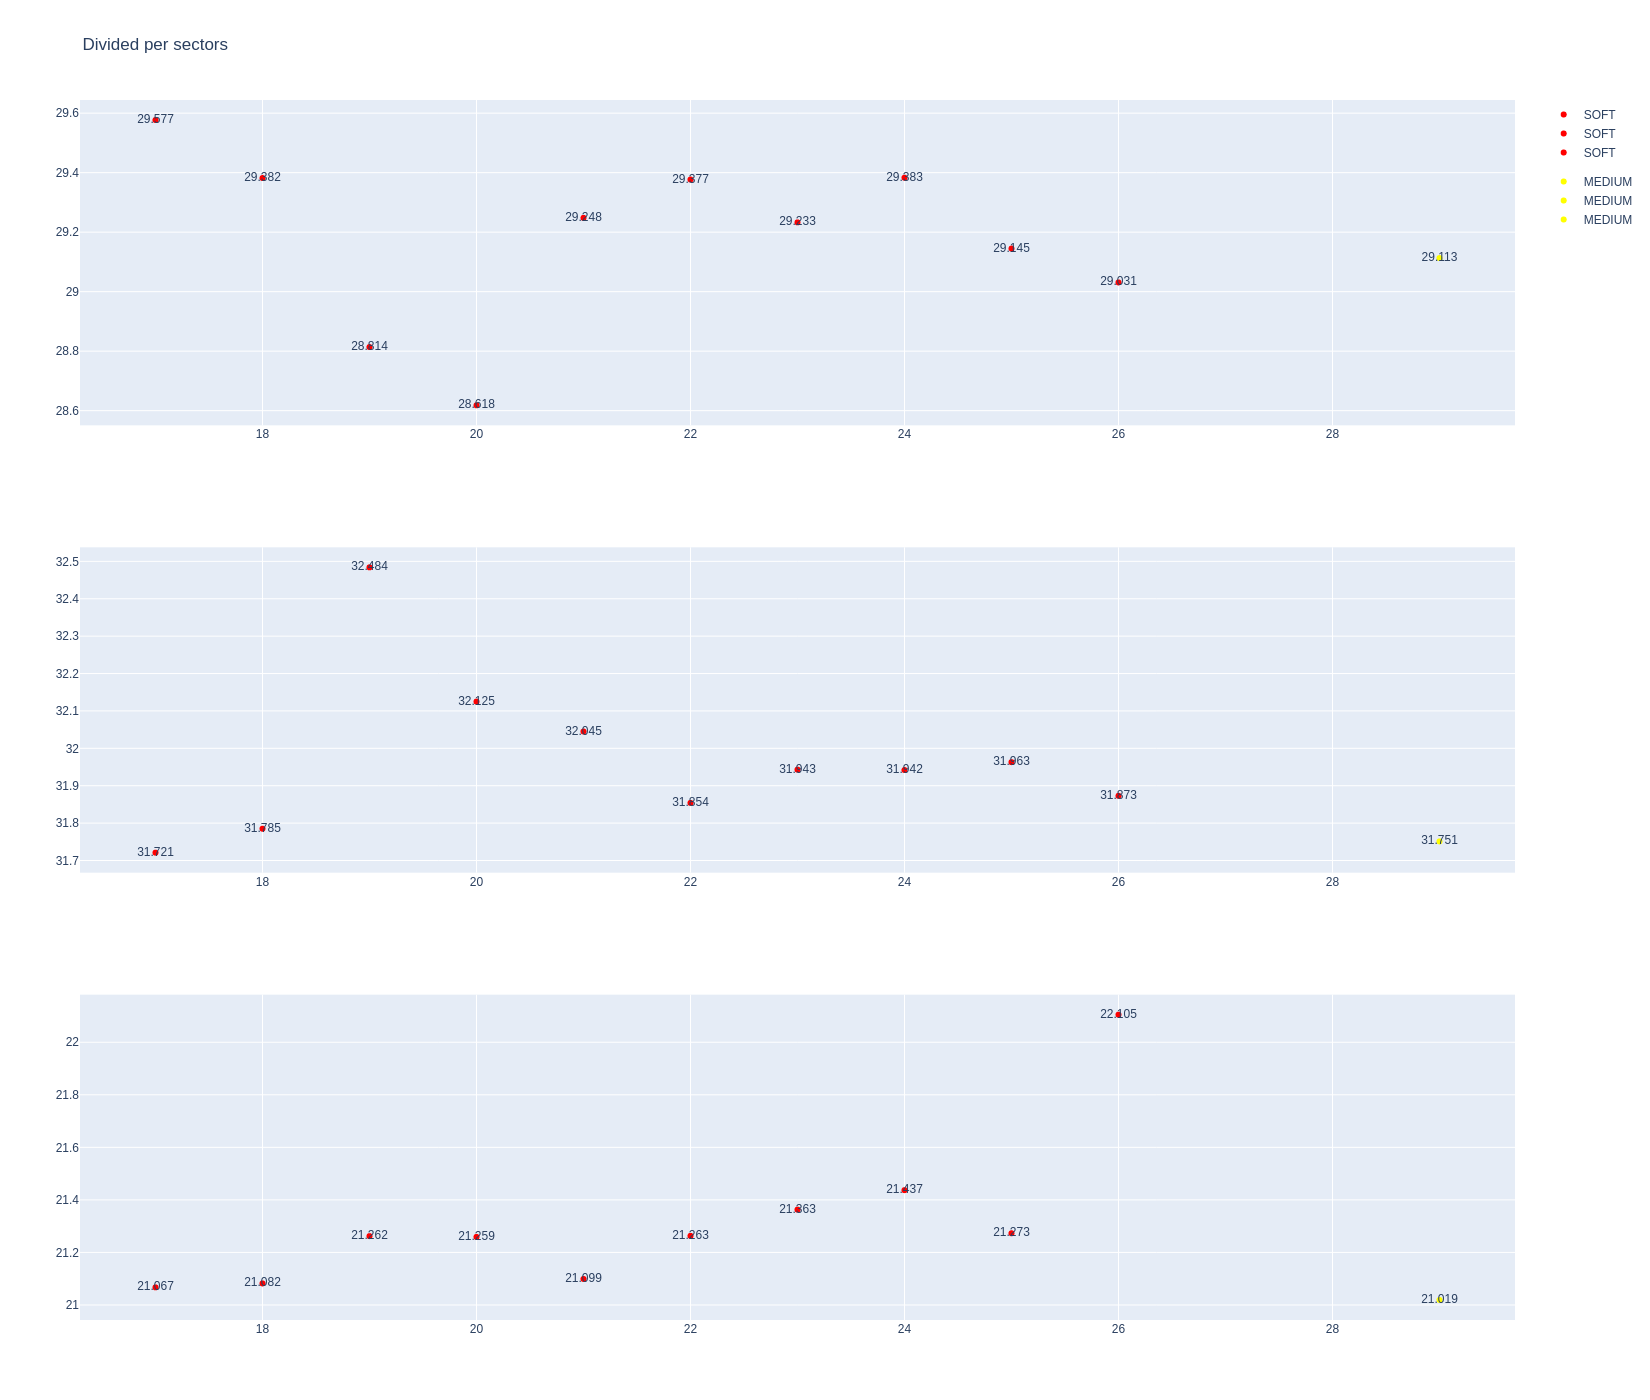

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [45]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1272         9871             1             14          1        1   
4          1272         9871             2             14          2        2   
17         1272         9871             1             18          1        7   
36         1272         9871             3             14          3       10   
40         1272         9871             2             18          8       12   
48         1272         9871             4             14         11       13   
50         1272         9871             3             18         13       15   
70         1272         9871             4             18         16       18   
71         1272         9871             5             14         14       17   
89         1272         9871             5             18         19       30   
94         1272         9871             6             14         18       29   

   compound  tyre_age_at_start  
0      SOFT                  0  
4      SOFT                  0  
17     SOFT                  0  
36   MEDIUM                  0  
40     SOFT                  7  
48     SOFT                  0  
50     SOFT                  0  
70     SOFT                  3  
71     SOFT                  3  
89     SOFT                  6  
94   MEDIUM                  8

In [46]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
418  Fernando ALONSO   MEDIUM  2025-10-24T22:48:16.580000+00:00          19   
437  Fernando ALONSO   MEDIUM  2025-10-24T22:49:39.174000+00:00          20   
457  Fernando ALONSO   MEDIUM  2025-10-24T22:51:01.778000+00:00          21   
476  Fernando ALONSO   MEDIUM  2025-10-24T22:52:24.262000+00:00          22   
496  Fernando ALONSO   MEDIUM  2025-10-24T22:53:46.893000+00:00          23   
516  Fernando ALONSO   MEDIUM  2025-10-24T22:55:09.456000+00:00          24   
536  Fernando ALONSO   MEDIUM  2025-10-24T22:56:32.378000+00:00          25   
555  Fernando ALONSO   MEDIUM  2025-10-24T22:57:54.919000+00:00          26   
574  Fernando ALONSO   MEDIUM  2025-10-24T22:59:18.092000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
418             29.347             32.012             21.276        82.635  
437             29.364             31.822             21.370        82.556  
457             29.413             31.902             21.250        82.565  
476                NaN             31.878             21.275        82.566  
496             29.283             32.064             21.280        82.627  
516             29.230             32.118             21.411        82.759  
536             29.159             32.015             21.467        82.641  
555             29.344             32.276             21.539        83.159  
574             29.371             32.165             21.518        83.054

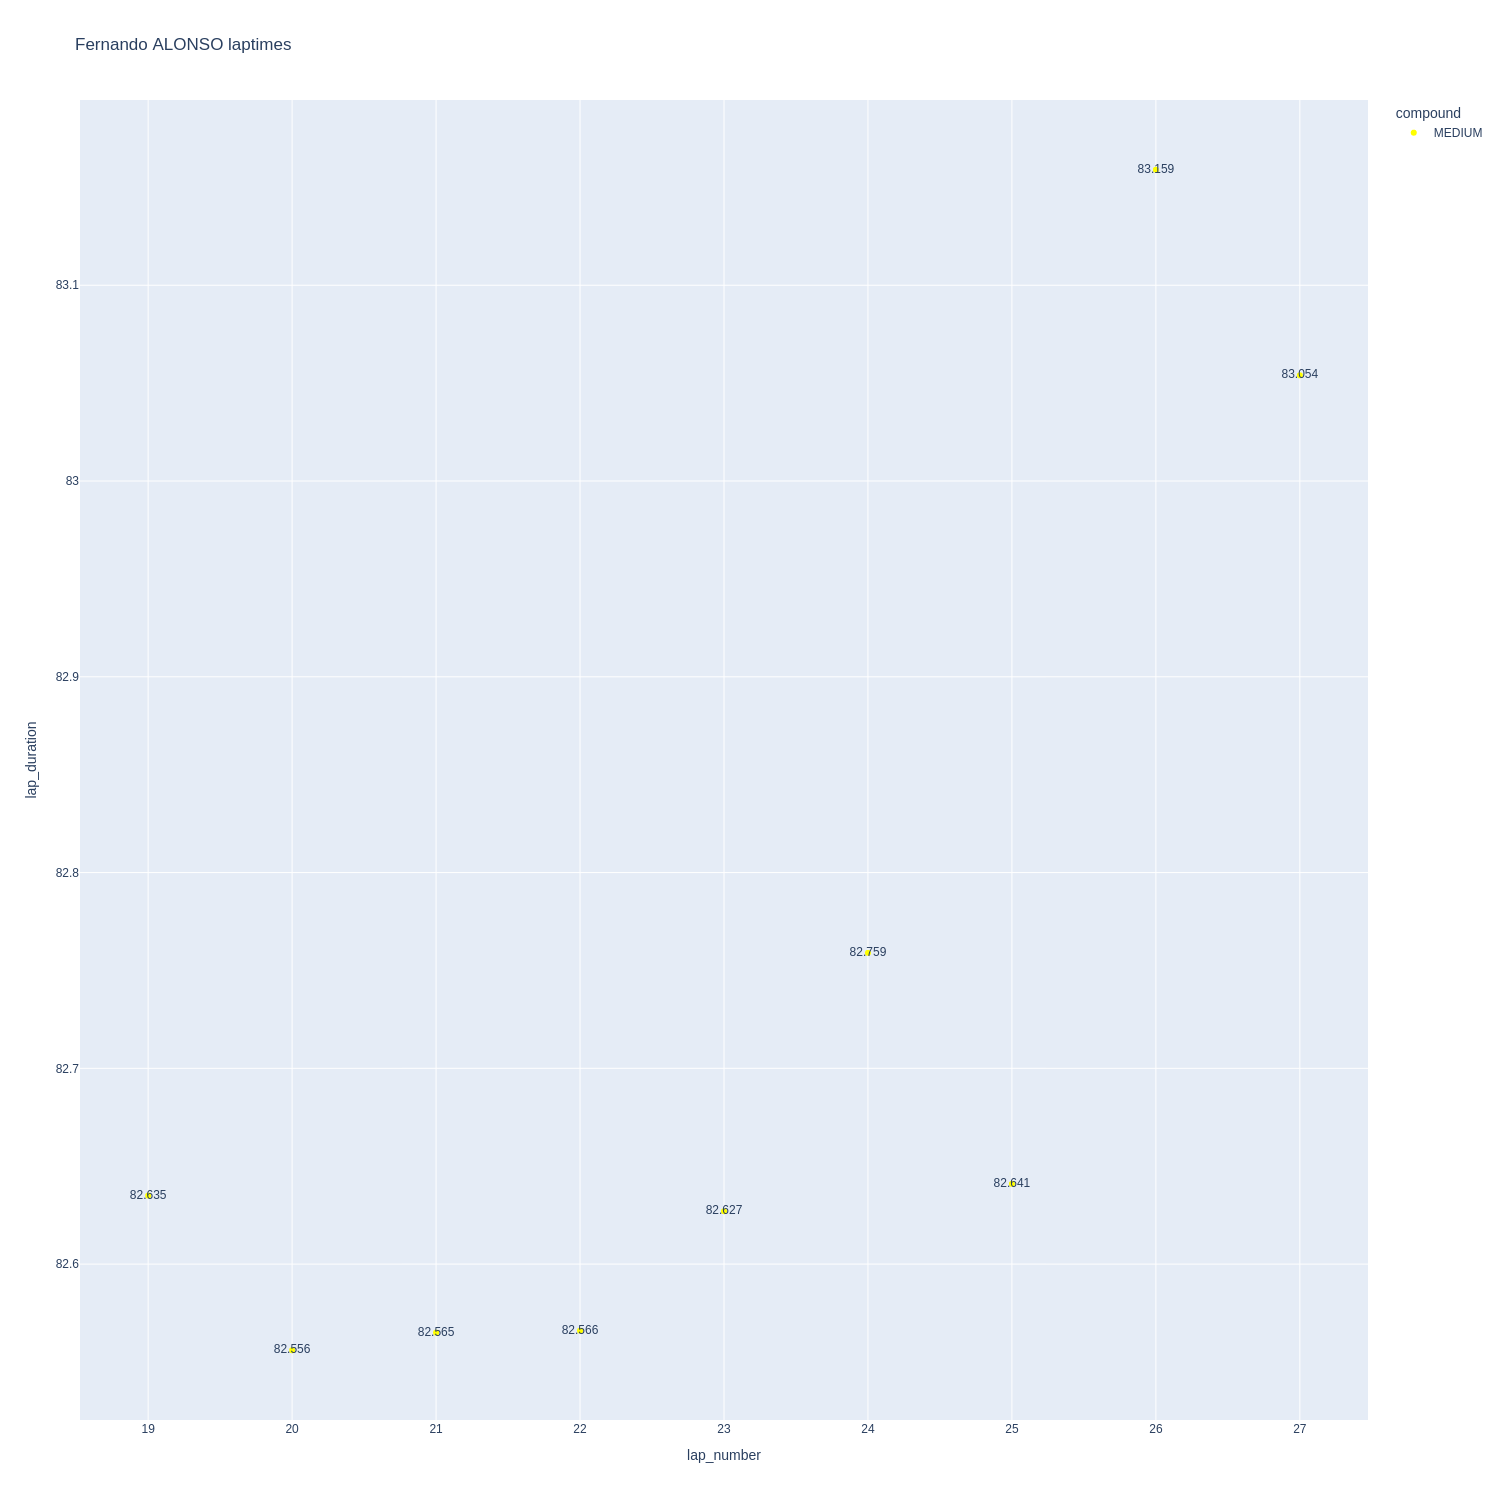

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

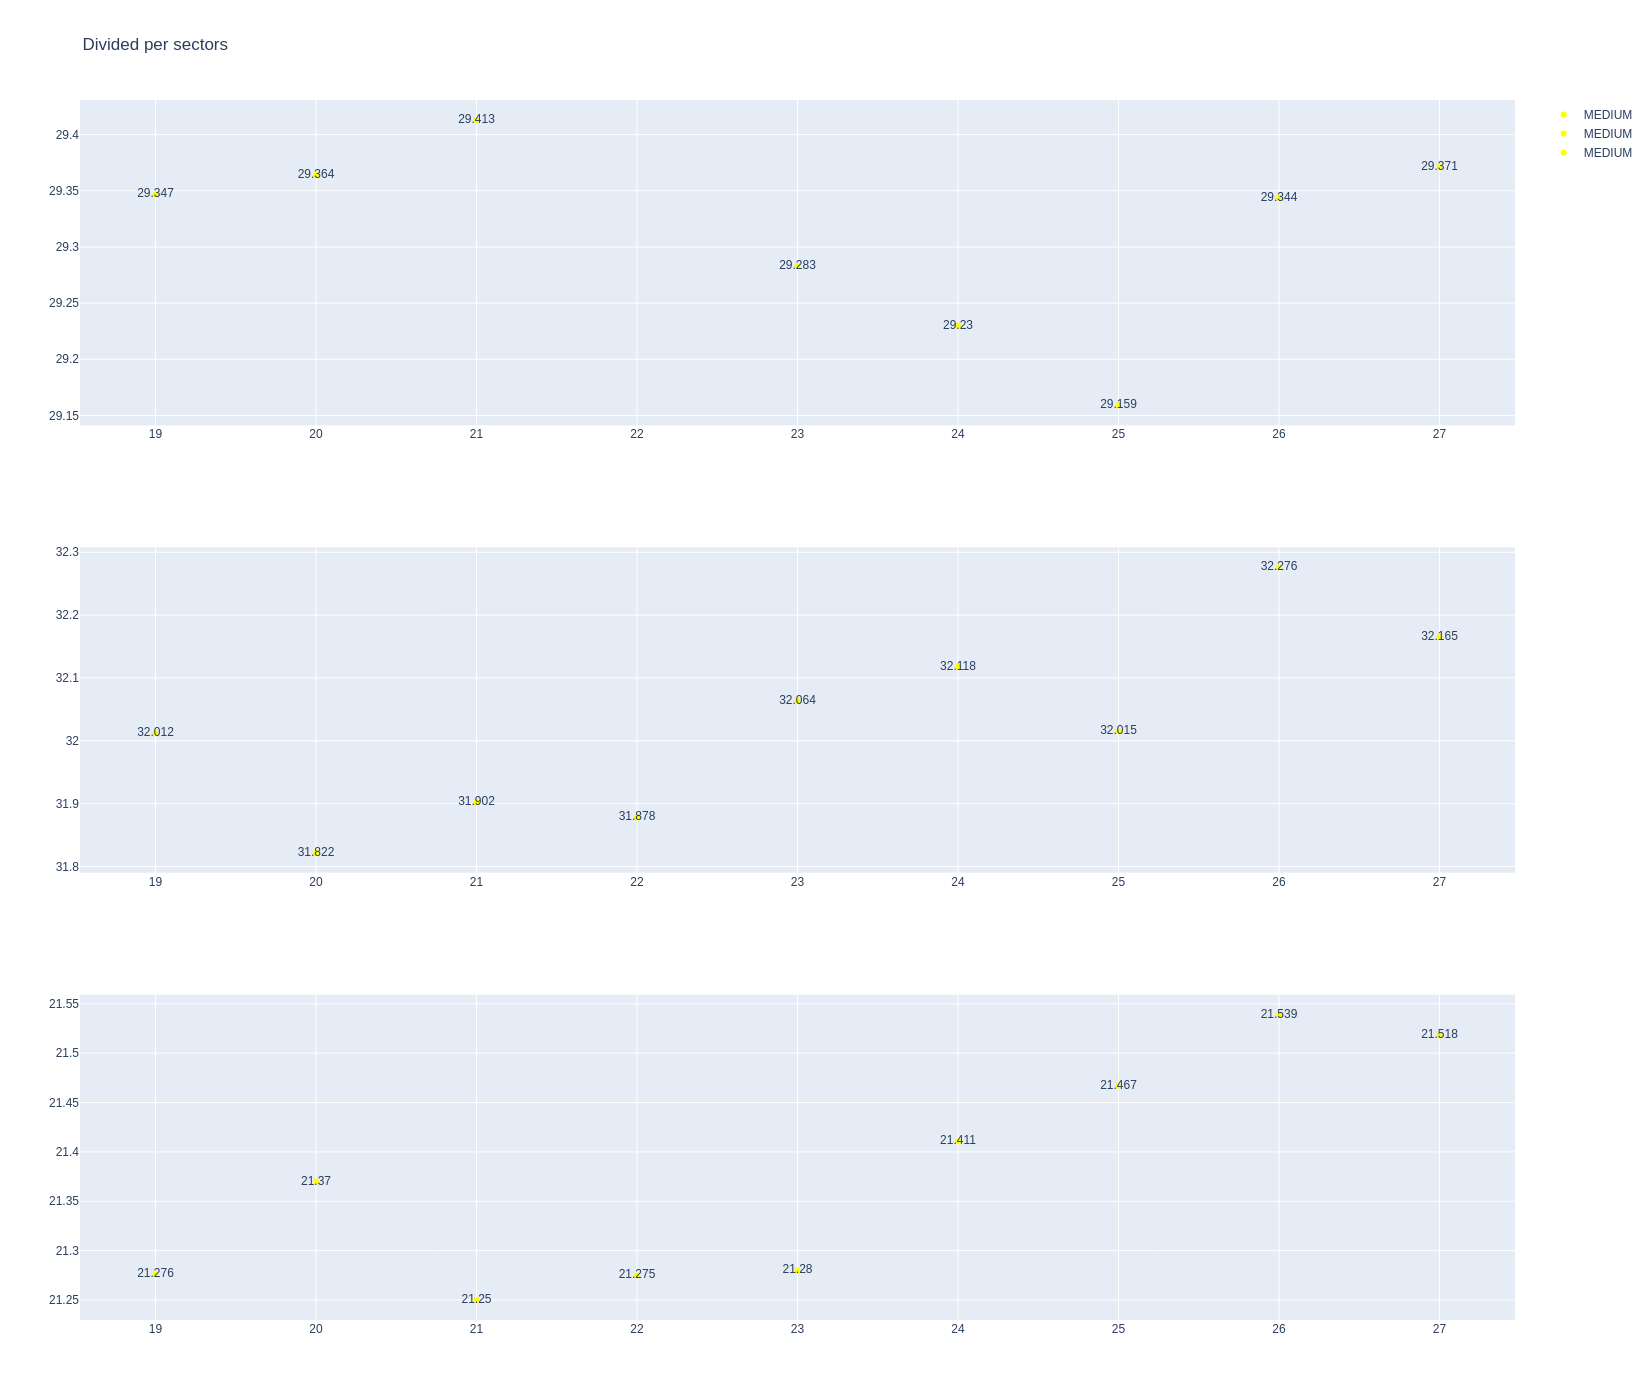

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [49]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
23   Lance STROLL     SOFT  2025-10-24T22:02:04.884000+00:00           2   
411  Lance STROLL     SOFT  2025-10-24T22:47:45.845000+00:00          20   
430  Lance STROLL     SOFT  2025-10-24T22:49:08.861000+00:00          21   
450  Lance STROLL     SOFT  2025-10-24T22:50:31.512000+00:00          22   
470  Lance STROLL     SOFT  2025-10-24T22:51:54.028000+00:00          23   
489  Lance STROLL     SOFT  2025-10-24T22:53:16.934000+00:00          24   
508  Lance STROLL     SOFT  2025-10-24T22:54:40.019000+00:00          25   
528  Lance STROLL     SOFT  2025-10-24T22:56:02.894000+00:00          26   
548  Lance STROLL     SOFT  2025-10-24T22:57:25.904000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              28.397             30.930             21.783        81.110  
411             29.449             32.284             21.228        82.961  
430             29.408             31.964             21.245        82.617  
450             29.415             31.957             21.278        82.650  
470             29.369             32.174             21.325        82.868  
489             29.087             32.543             21.524        83.154  
508             29.111             32.266             21.398        82.775  
528             29.038             32.430             21.508        82.976  
548             28.796             33.109             21.756        83.661

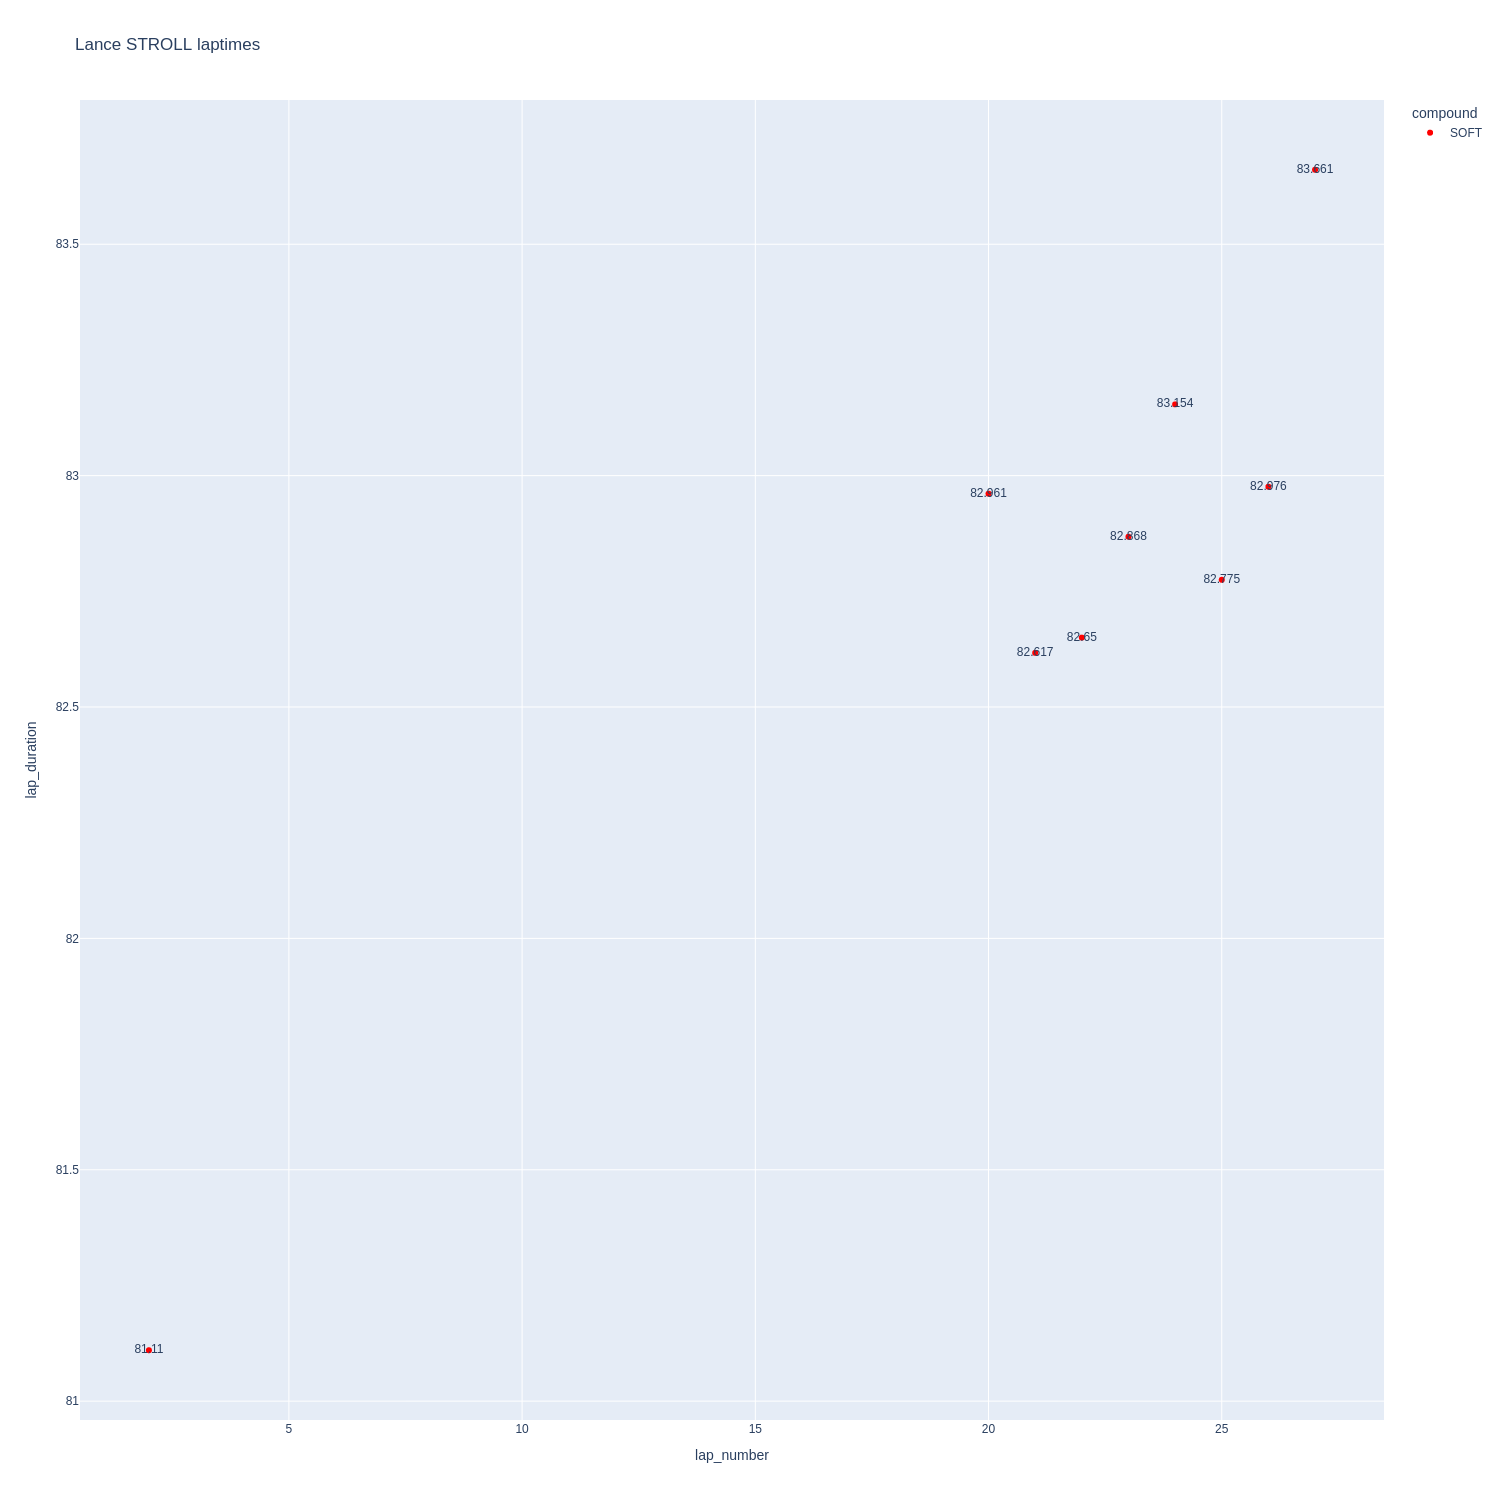

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

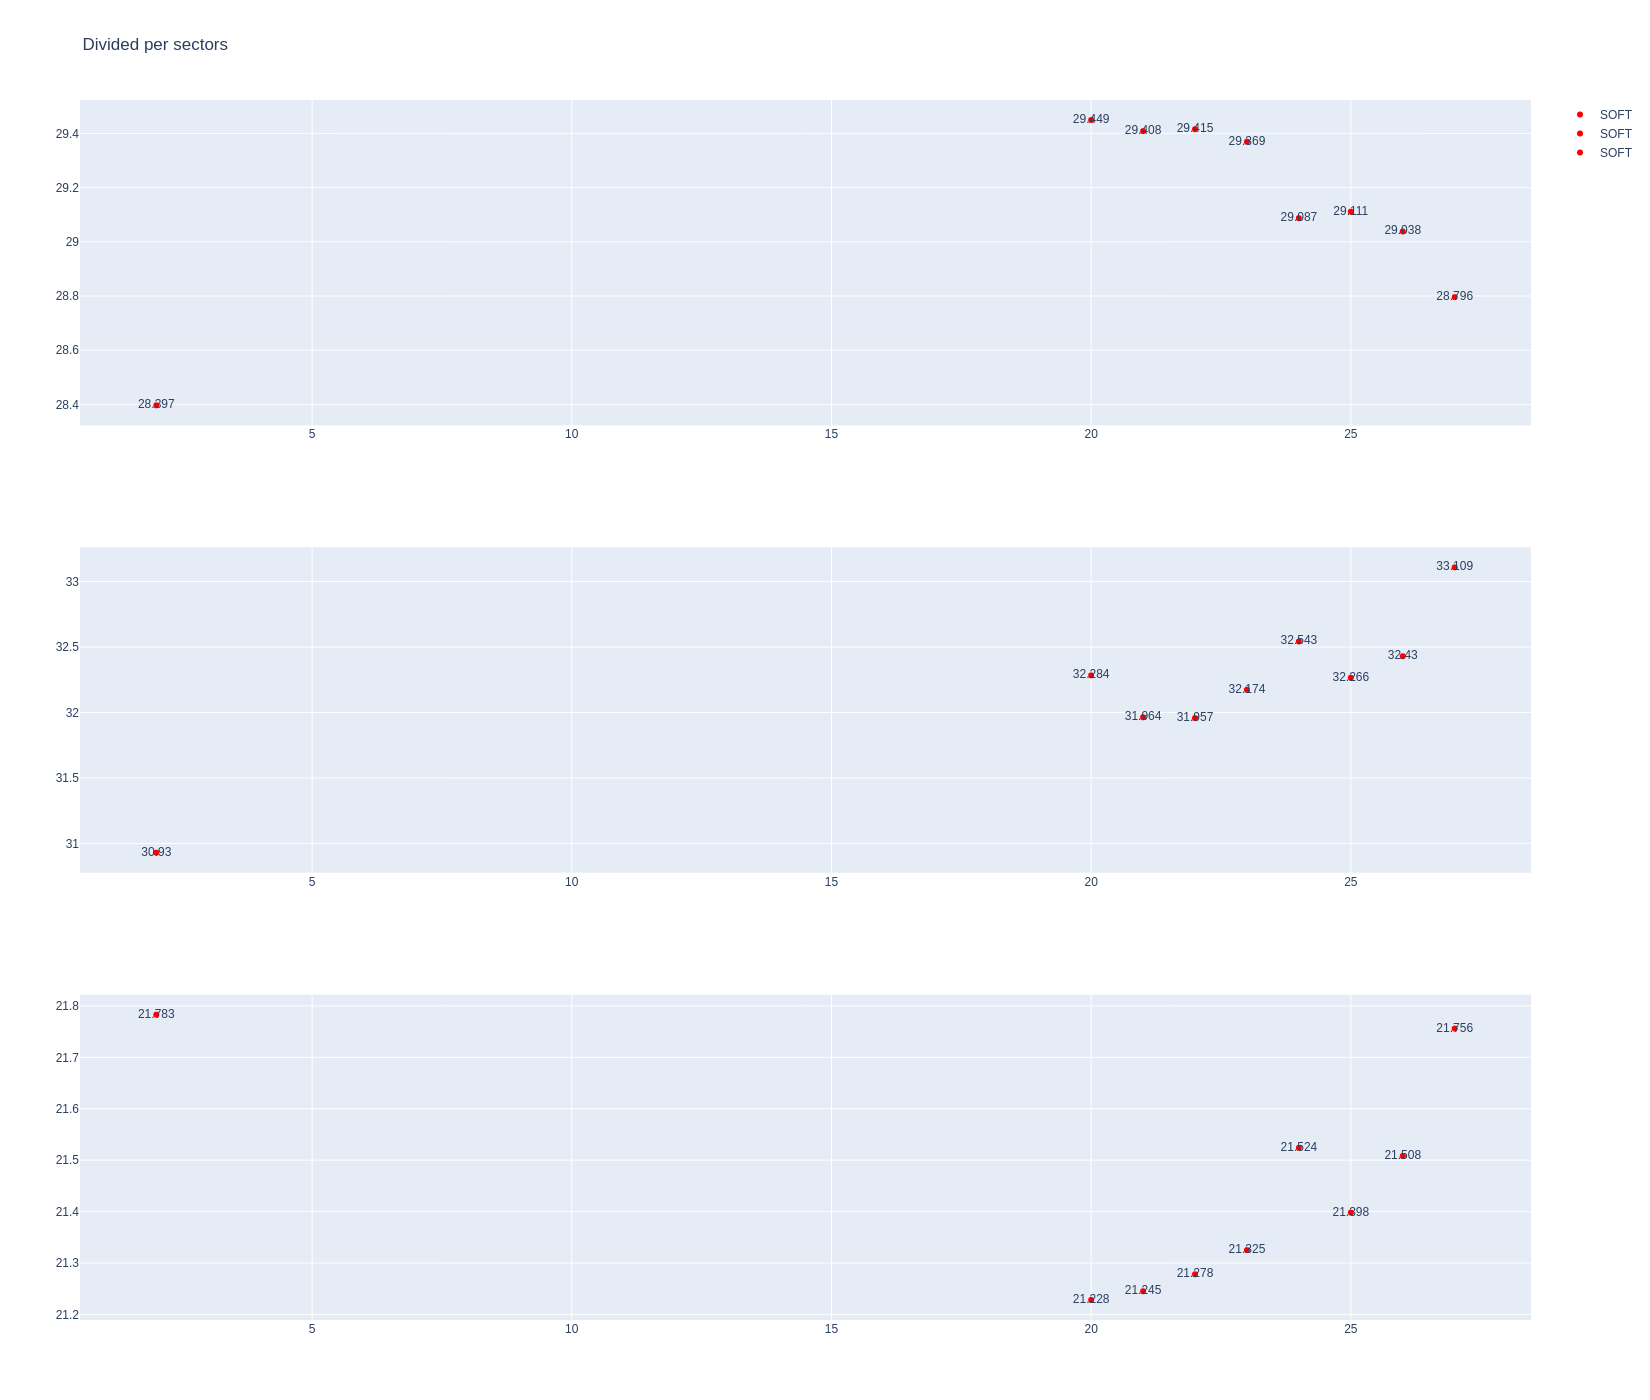

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [52]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1272         9871             1              6          1        5   
9          1272         9871             1             30          1        6   
16         1272         9871             2             30          7        9   
30         1272         9871             2              6          6       11   
47         1272         9871             3             30         10       16   
49         1272         9871             3              6         12       14   
53         1272         9871             4             30         17       19   
68         1272         9871             4              6         15       17   
74         1272         9871             5             30         20       23   
79         1272         9871             5              6         18       26   
84         1272         9871             6             30         24       32   
86         1272         9871             6              6         27       30   

   compound  tyre_age_at_start  
5      HARD                  0  
9    MEDIUM                  0  
16   MEDIUM                  6  
30     HARD                  5  
47   MEDIUM                  9  
49     SOFT                  0  
53     SOFT                  0  
68     SOFT                  3  
74     SOFT                  3  
79     HARD                 11  
84     SOFT                  7  
86     SOFT                  6

In [53]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
24   Isack HADJAR     HARD  2025-10-24T22:02:10.934000+00:00           2   
63   Isack HADJAR     HARD  2025-10-24T22:05:36.572000+00:00           4   
117  Isack HADJAR     HARD  2025-10-24T22:11:02.793000+00:00           7   
386  Isack HADJAR     HARD  2025-10-24T22:45:55.554000+00:00          19   
404  Isack HADJAR     HARD  2025-10-24T22:47:18.736000+00:00          20   
422  Isack HADJAR     HARD  2025-10-24T22:48:41.830000+00:00          21   
442  Isack HADJAR     HARD  2025-10-24T22:50:04.982000+00:00          22   
461  Isack HADJAR     HARD  2025-10-24T22:51:27.778000+00:00          23   
500  Isack HADJAR     HARD  2025-10-24T22:54:14.597000+00:00          25   
566  Isack HADJAR     SOFT  2025-10-24T22:58:45.951000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              28.317             31.308             20.807        80.432  
63              28.067             31.520             20.773        80.360  
117             28.150             31.248             20.654        80.052  
386             29.457             32.407             21.361        83.225  
404             29.341             32.392             21.296        83.029  
422             29.343             32.300             21.457        83.100  
442             29.347             32.190             21.309        82.846  
461             29.239             32.169             21.362        82.770  
500             29.531             32.468             21.576        83.575  
566             28.725             32.316             21.582        82.623

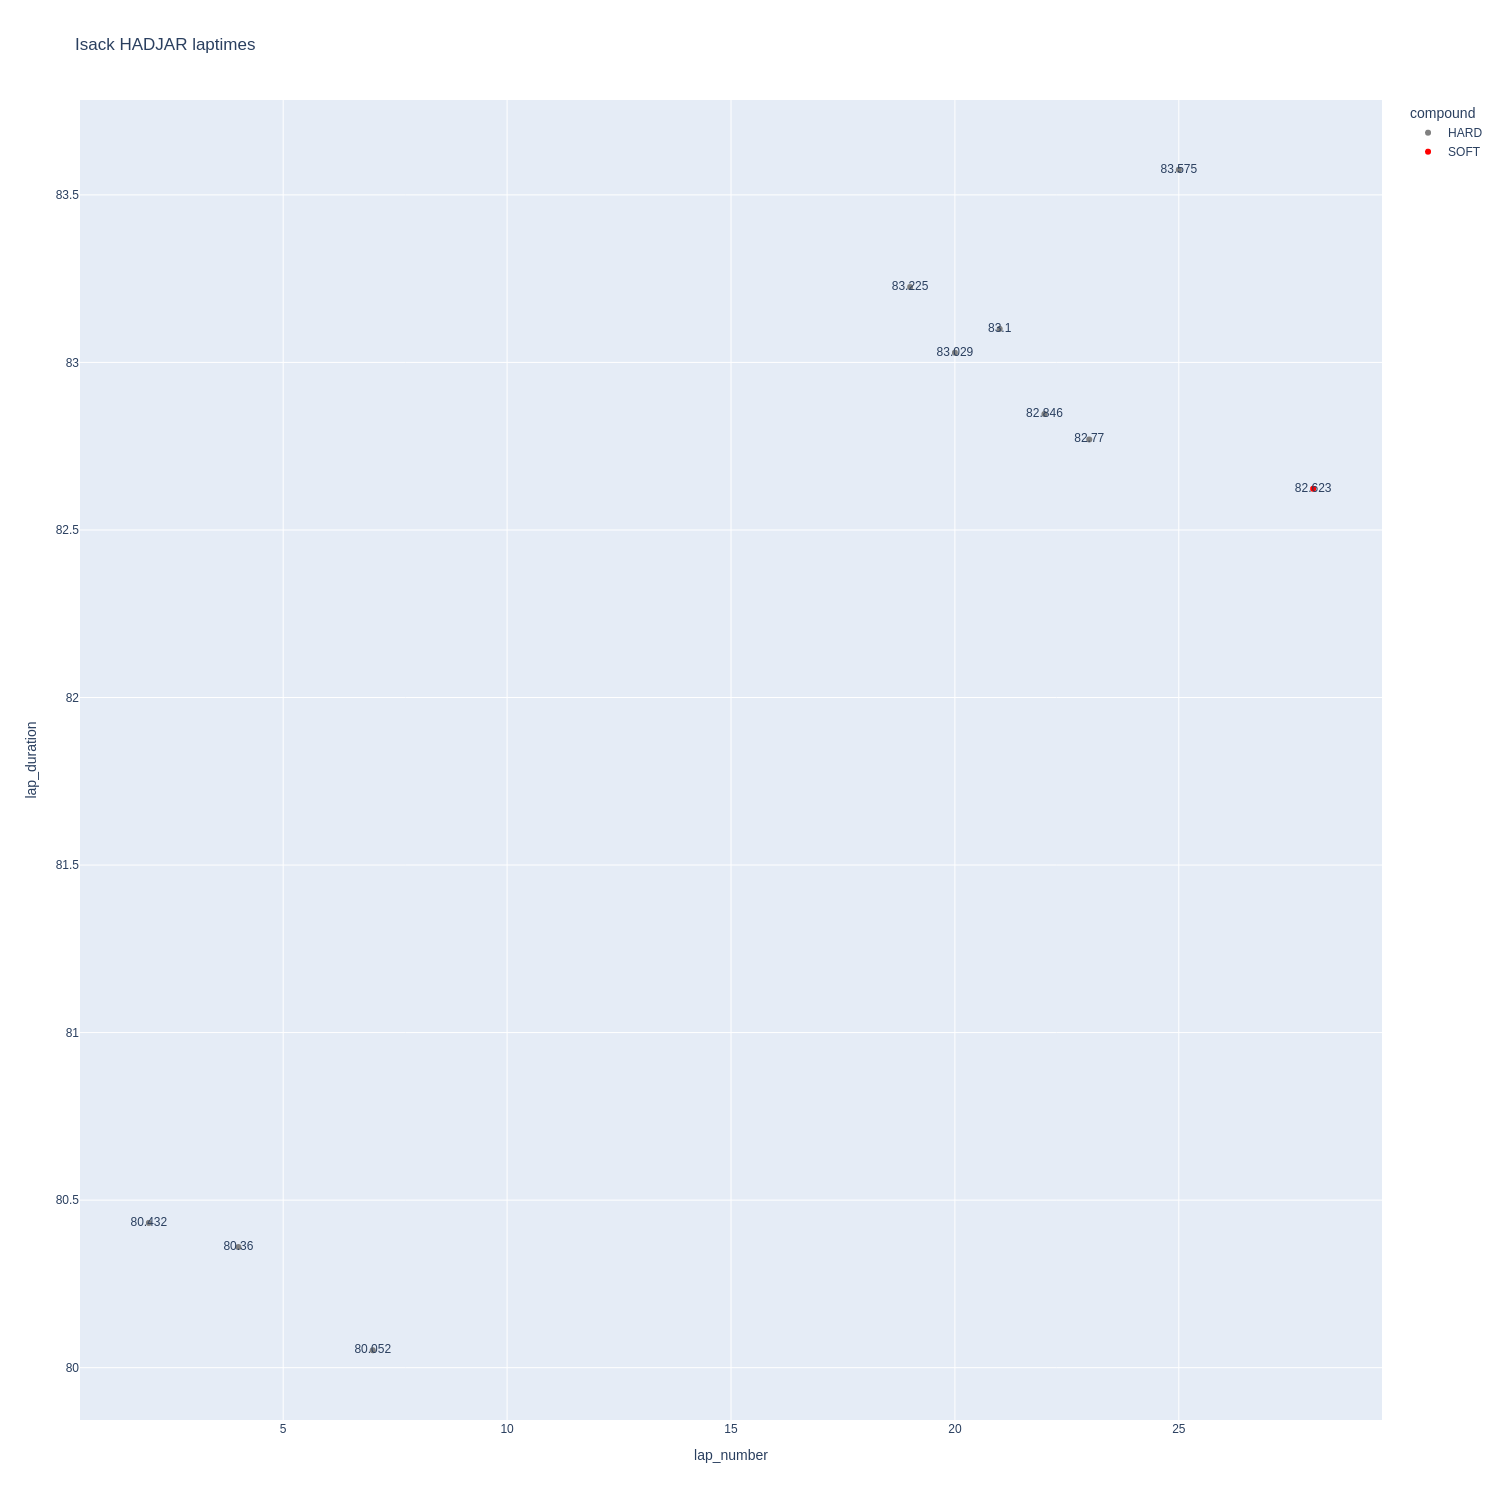

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

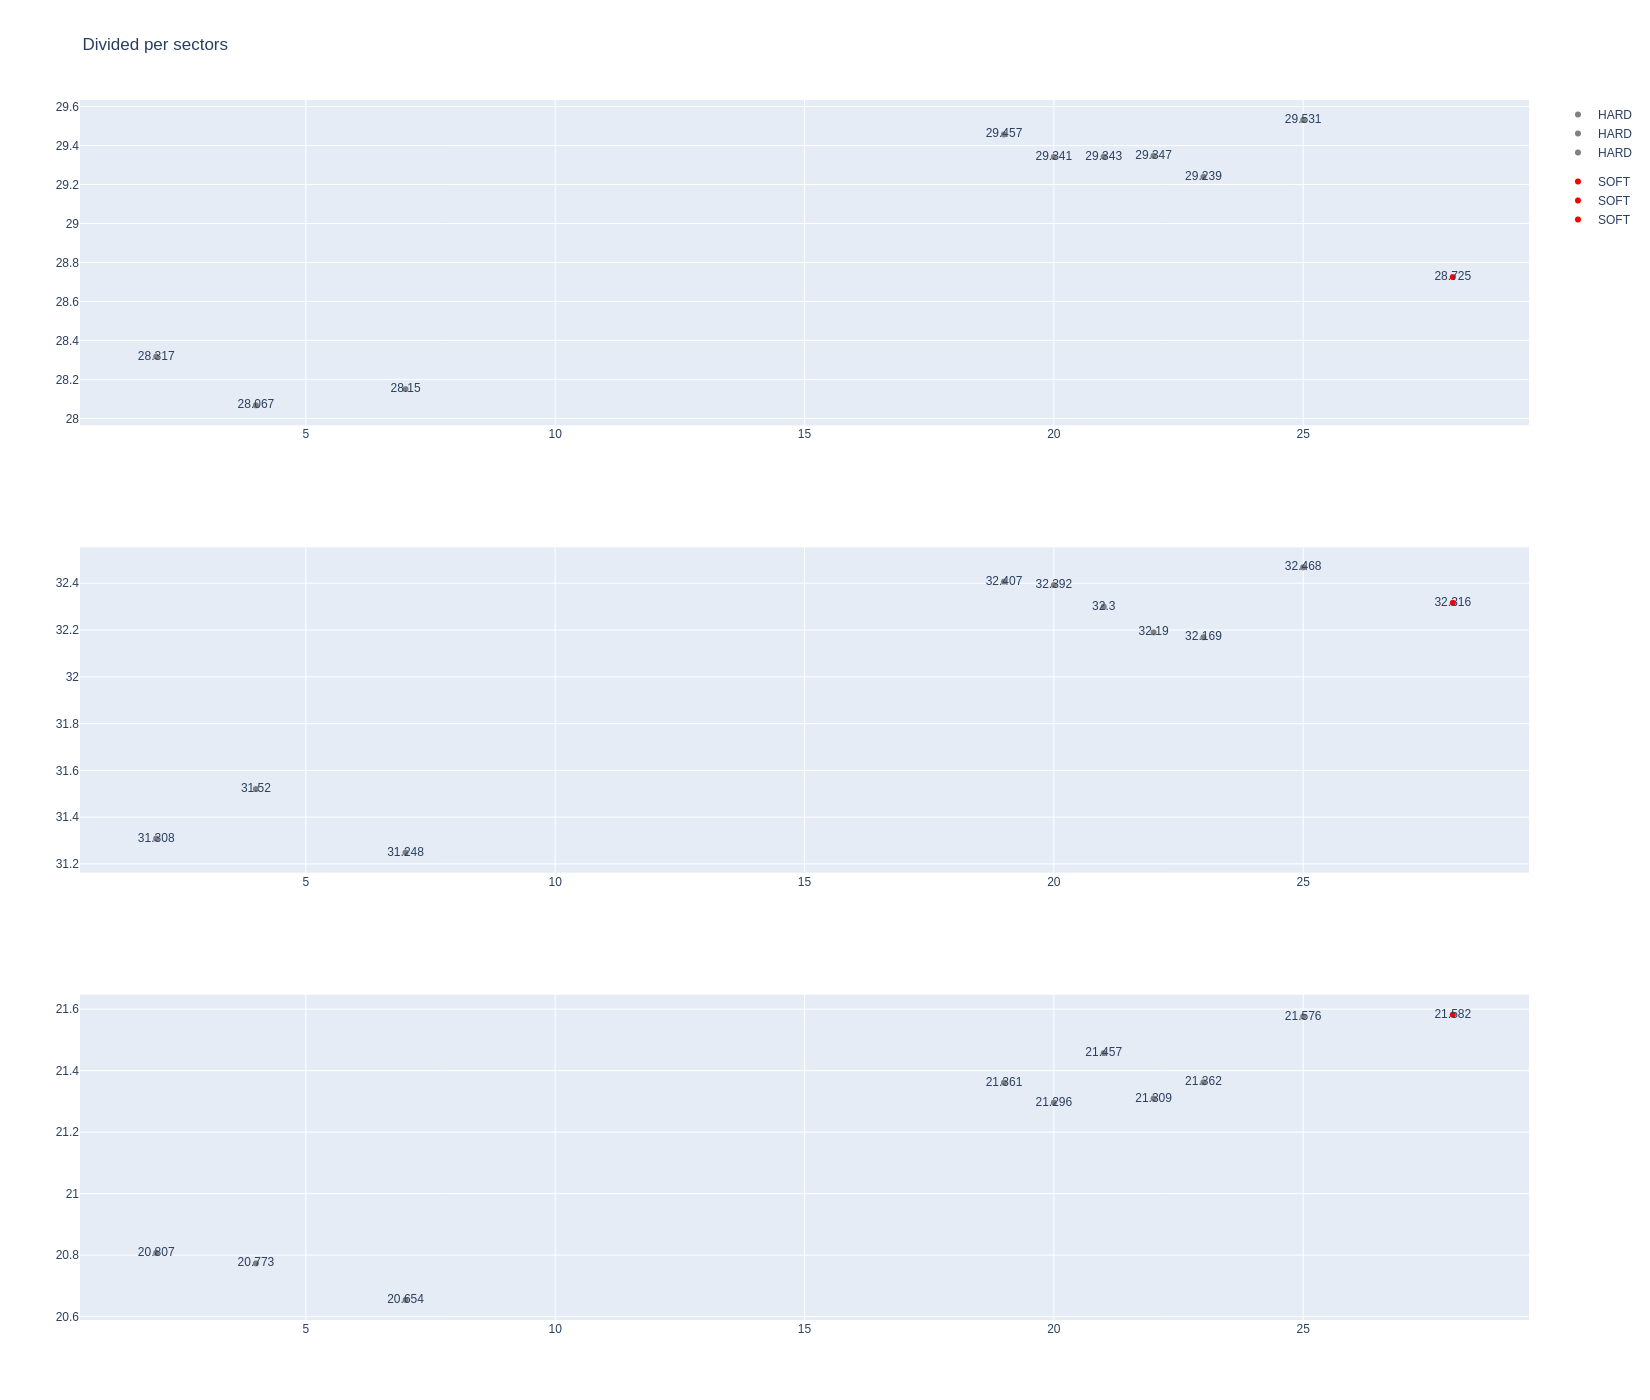

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [56]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
40   Liam LAWSON   MEDIUM  2025-10-24T22:03:23.290000+00:00           3   
77   Liam LAWSON   MEDIUM  2025-10-24T22:06:54.557000+00:00           5   
465  Liam LAWSON     SOFT  2025-10-24T22:51:41.590000+00:00          25   
483  Liam LAWSON     SOFT  2025-10-24T22:53:04.887000+00:00          26   
503  Liam LAWSON     SOFT  2025-10-24T22:54:27.628000+00:00          27   
523  Liam LAWSON     SOFT  2025-10-24T22:55:50.831000+00:00          28   
562  Liam LAWSON     SOFT  2025-10-24T22:58:38.920000+00:00          30   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
40              28.491             32.079             21.381        81.951  
77              28.494             31.272             20.830        80.596  
465             29.666             32.224             21.417        83.307  
483             29.456             31.903             21.437        82.796  
503             29.424             32.239             21.549        83.212  
523             29.172             32.343             21.528        83.043  
562             29.499             32.413             21.607        83.519

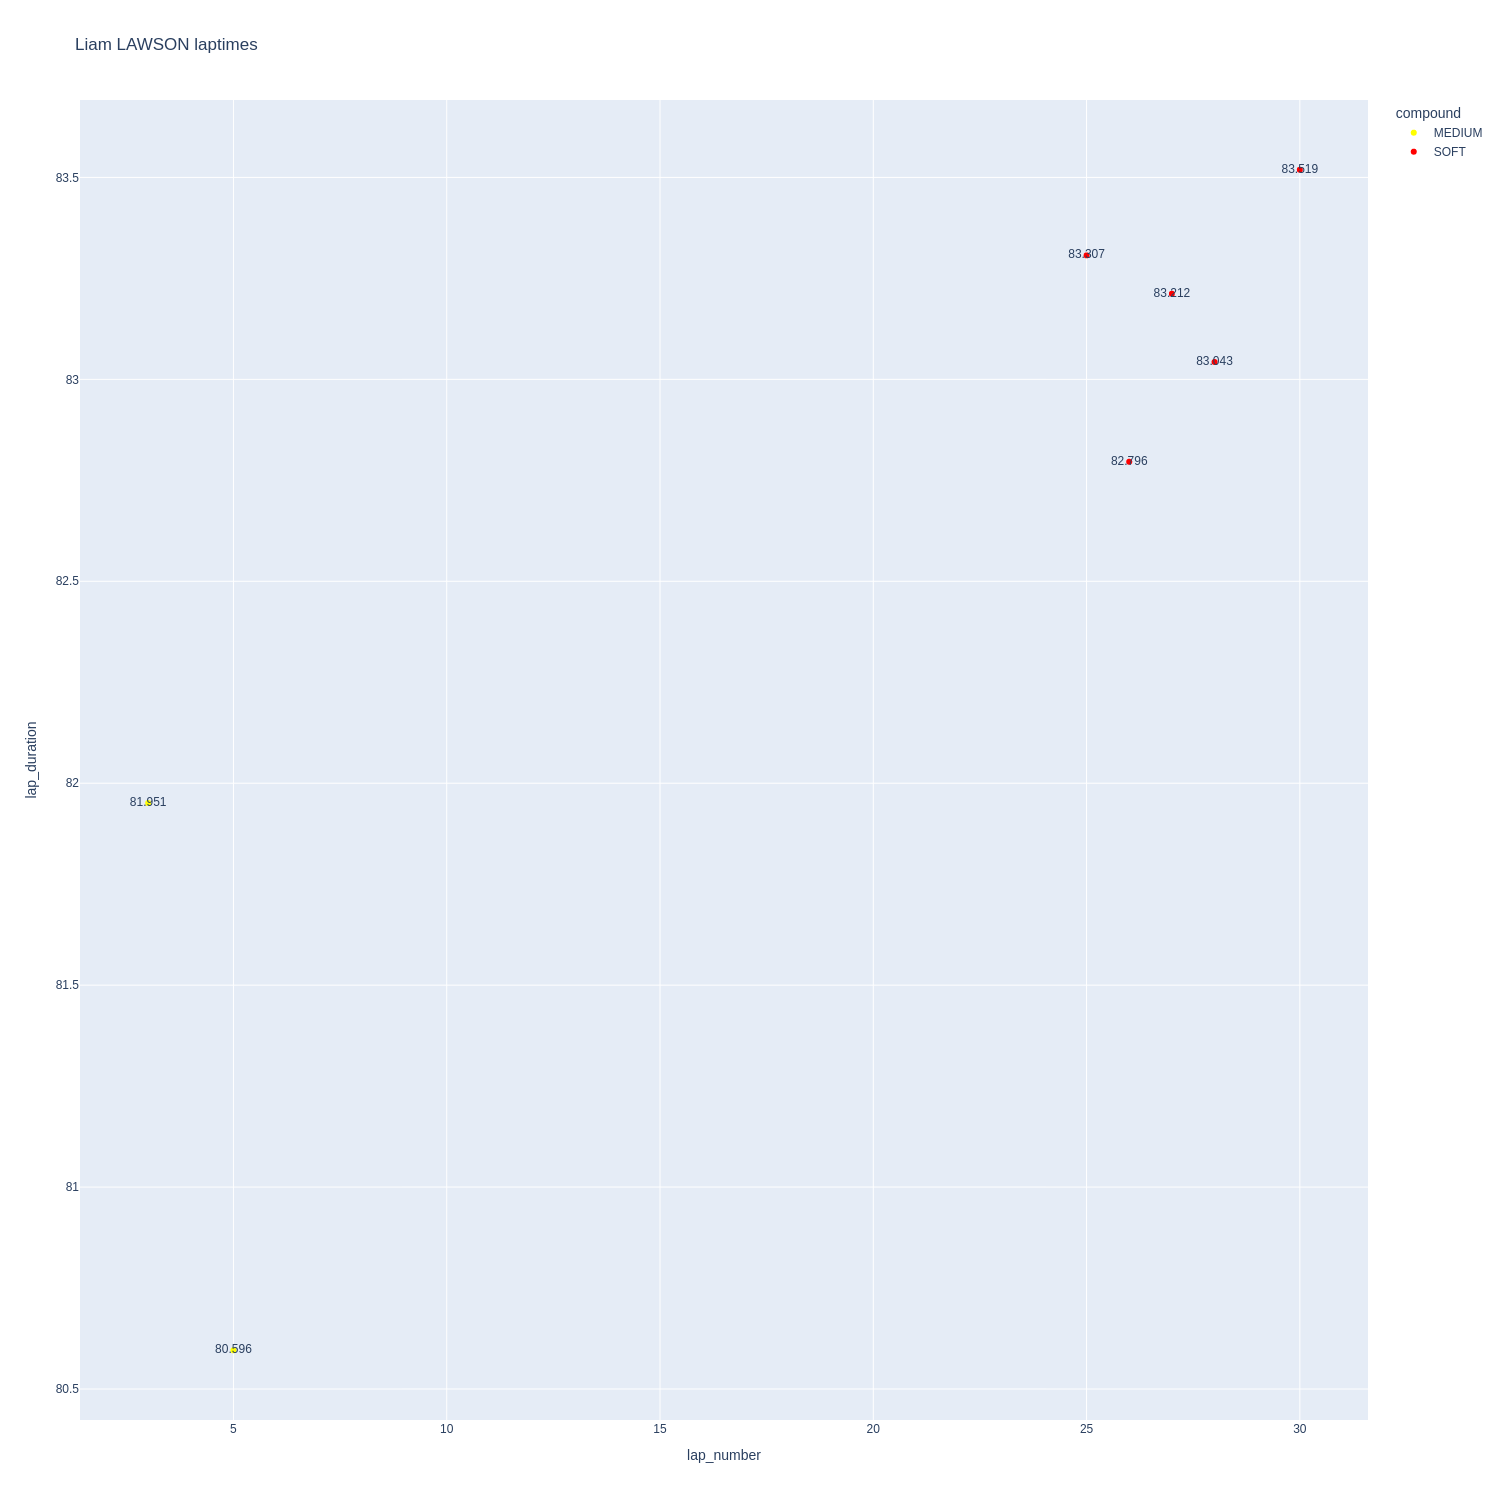

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

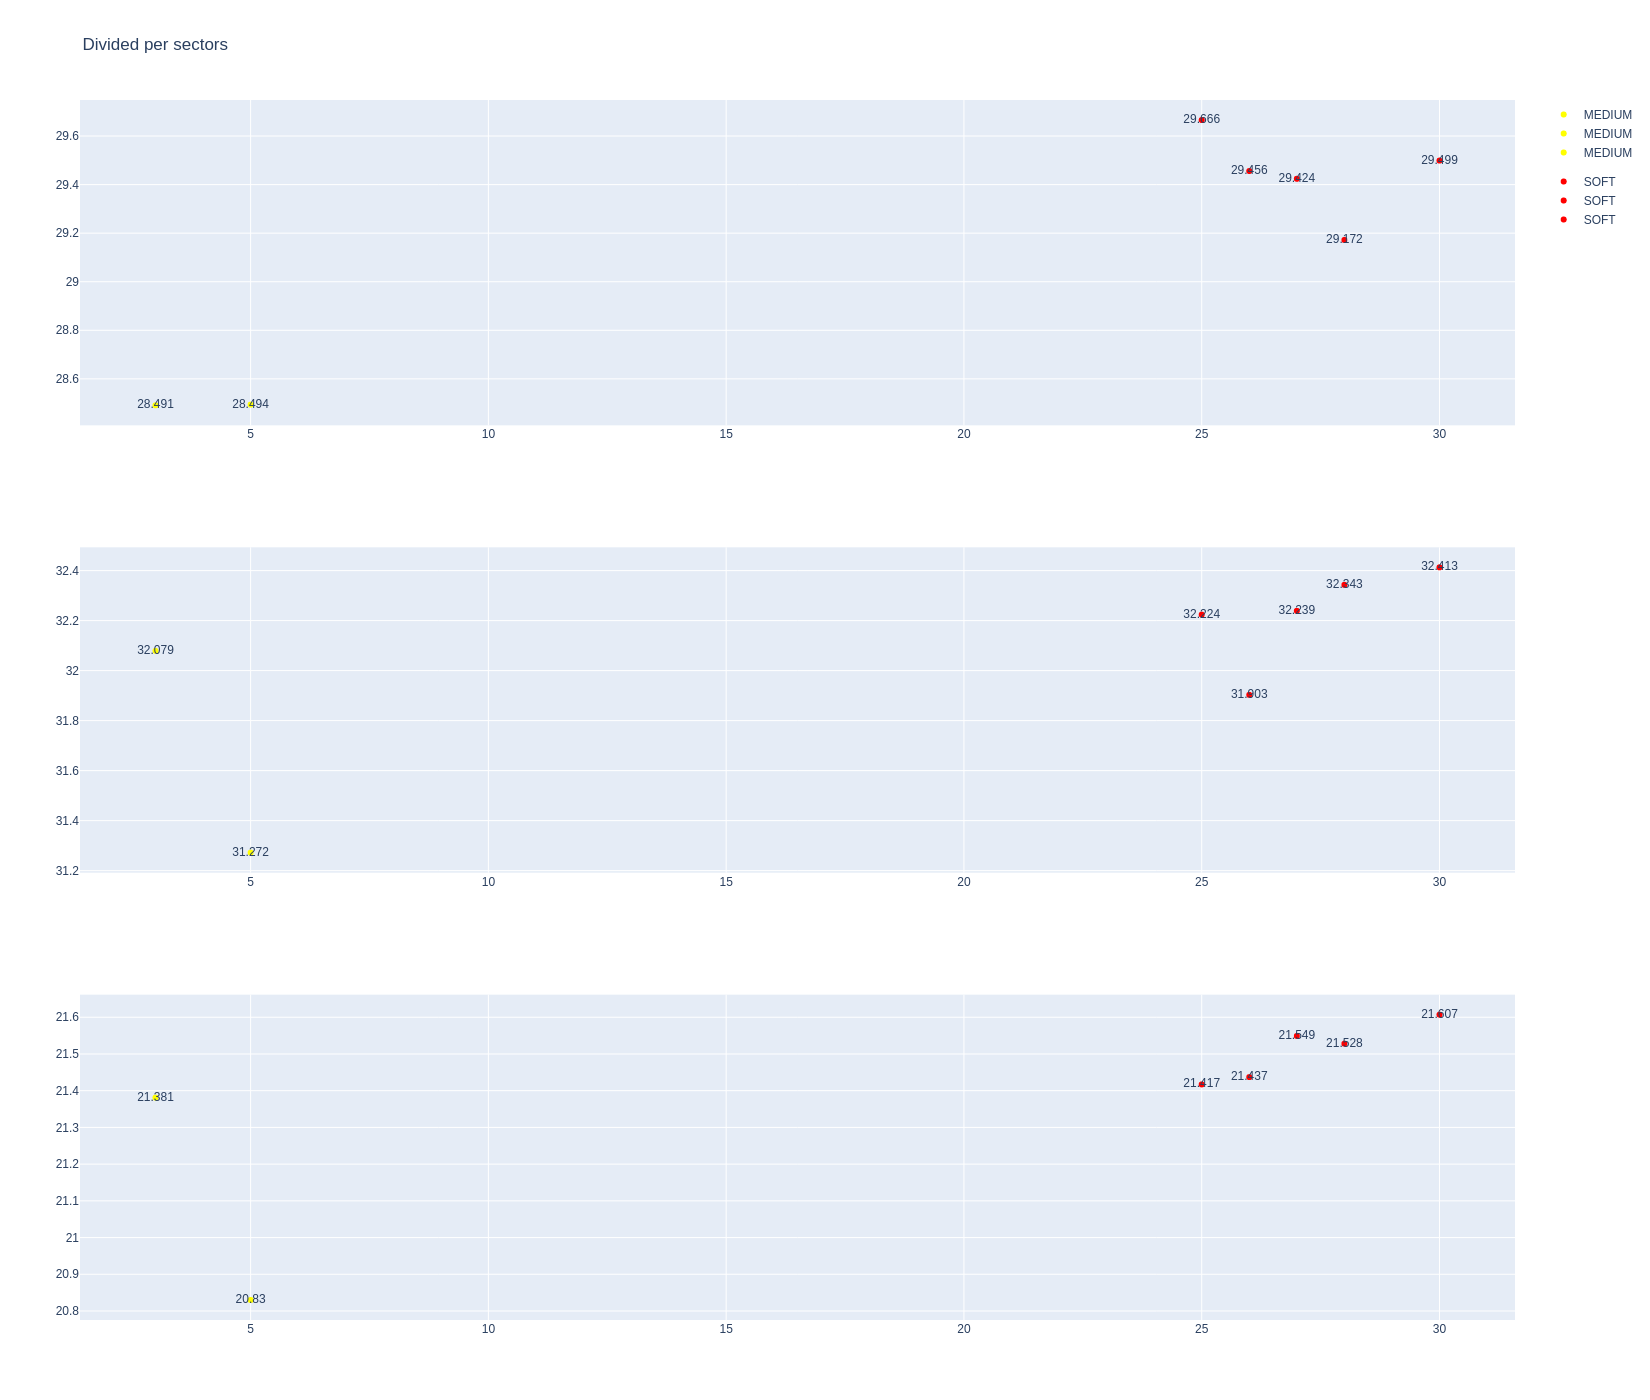

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [59]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
37         1272         9871             1             31          1       11   
38         1272         9871             1             87          1       14   
66         1272         9871             2             31         12       17   
67         1272         9871             2             87         15       20   
81         1272         9871             3             31         18       28   
93         1272         9871             3             87         21       34   
96         1272         9871             4             31         29       31   

   compound  tyre_age_at_start  
37     HARD                  0  
38   MEDIUM                  0  
66     SOFT                  0  
67     SOFT                  0  
81     HARD                 11  
93     SOFT                  6  
96     SOFT                  6

In [60]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
80   Esteban OCON     HARD  2025-10-24T22:07:07.901000+00:00           5   
114  Esteban OCON     HARD  2025-10-24T22:10:32.965000+00:00           7   
376  Esteban OCON     HARD  2025-10-24T22:45:04.679000+00:00          19   
393  Esteban OCON     HARD  2025-10-24T22:46:27.313000+00:00          20   
412  Esteban OCON     HARD  2025-10-24T22:47:50.158000+00:00          21   
431  Esteban OCON     HARD  2025-10-24T22:49:12.627000+00:00          22   
451  Esteban OCON     HARD  2025-10-24T22:50:35.262000+00:00          23   
471  Esteban OCON     HARD  2025-10-24T22:51:58.043000+00:00          24   
490  Esteban OCON     HARD  2025-10-24T22:53:20.841000+00:00          25   
510  Esteban OCON     HARD  2025-10-24T22:54:43.847000+00:00          26   
530  Esteban OCON     HARD  2025-10-24T22:56:06.753000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
80              28.387             31.188             20.836        80.411  
114             28.374             31.073             20.598        80.045  
376             29.417             32.091             21.167        82.675  
393             29.433             32.087             21.315        82.835  
412             29.209             31.951             21.350        82.510  
431             29.246             31.921             21.395        82.562  
451             29.364             32.088             21.335        82.787  
471             29.268             32.186             21.442        82.896  
490             29.278             32.242             21.436        82.956  
510             29.132             32.252             21.457        82.841  
530             28.537             32.085             21.479        82.101

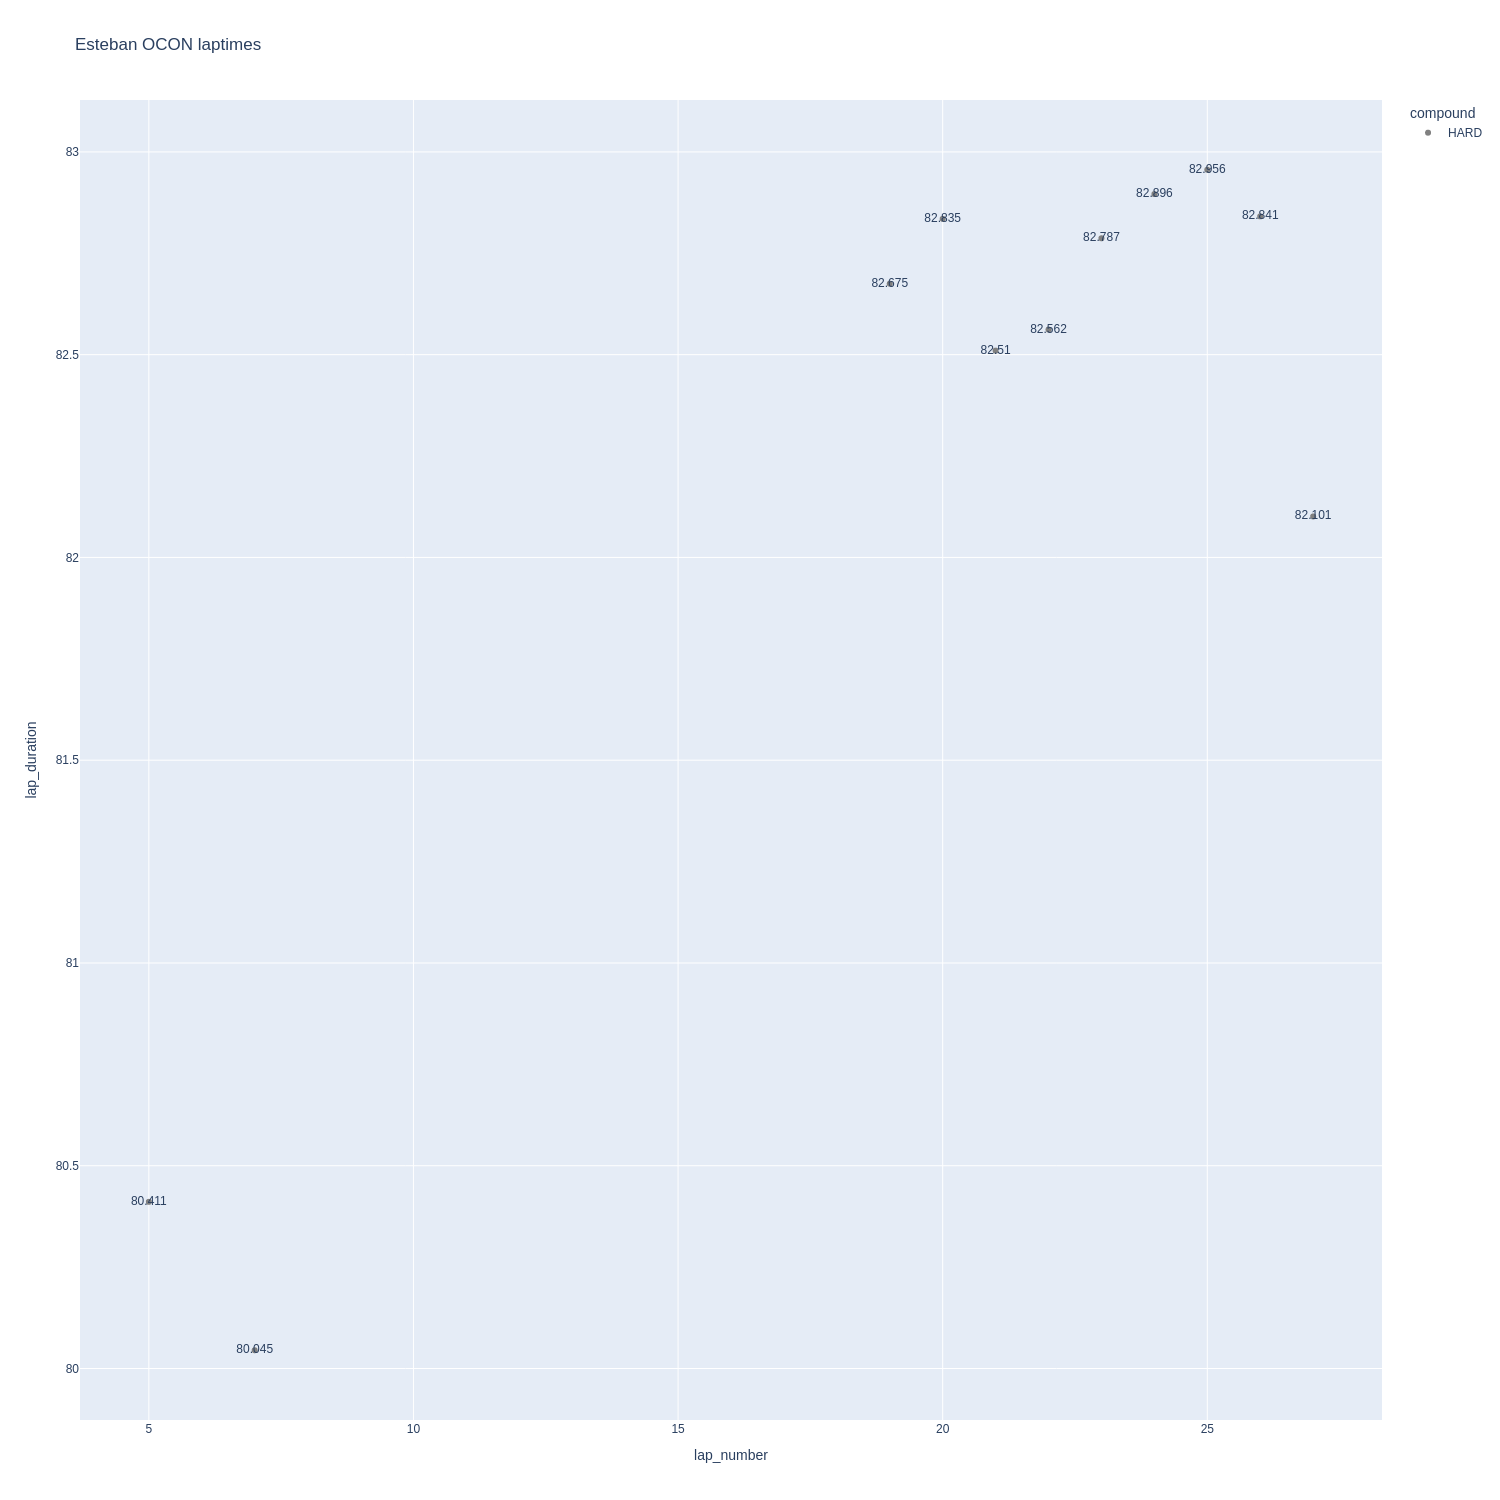

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

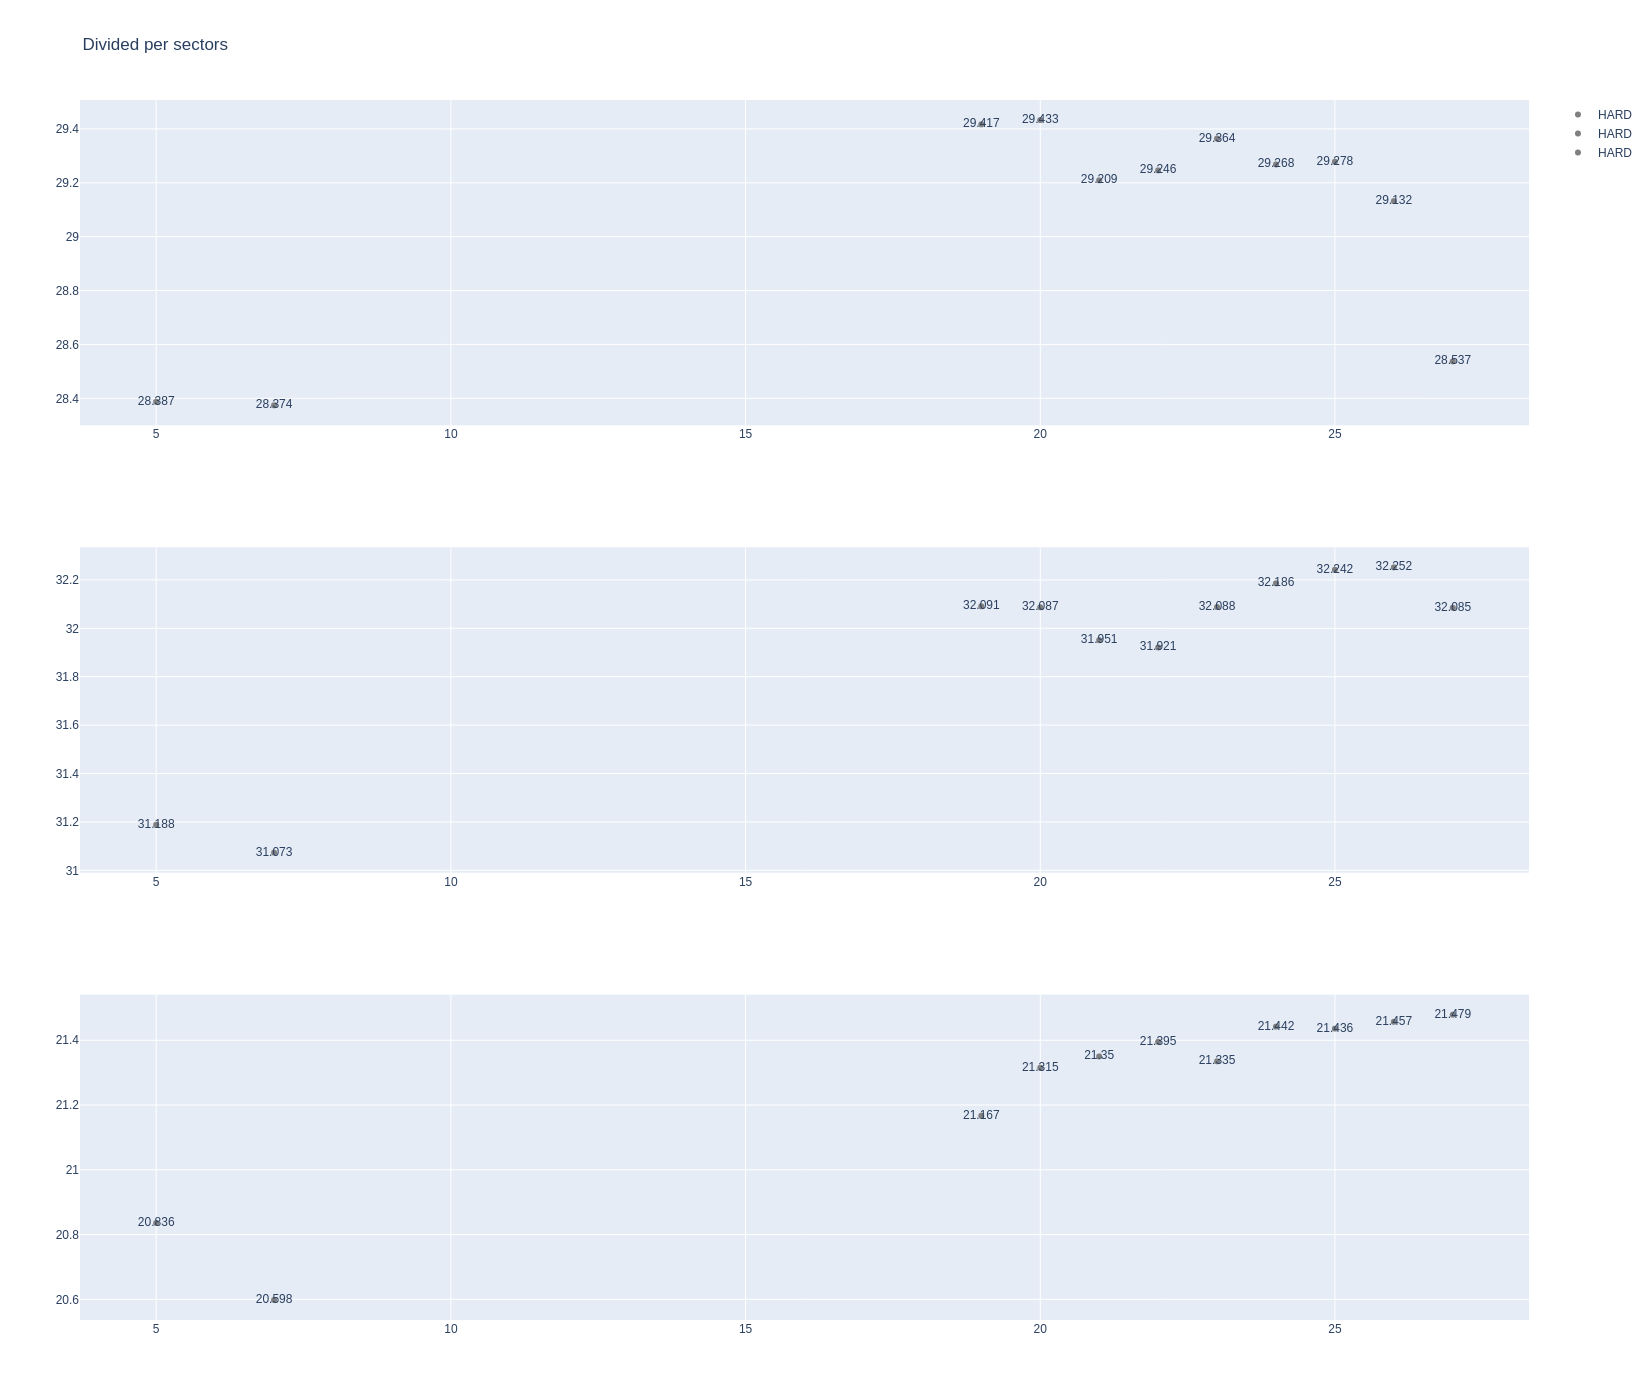

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [63]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
21   Oliver BEARMAN   MEDIUM  2025-10-24T22:01:50.124000+00:00           2   
59   Oliver BEARMAN   MEDIUM  2025-10-24T22:05:14.697000+00:00           4   
128  Oliver BEARMAN   MEDIUM  2025-10-24T22:12:15.167000+00:00           8   
379  Oliver BEARMAN     SOFT  2025-10-24T22:45:16.835000+00:00          22   
396  Oliver BEARMAN     SOFT  2025-10-24T22:46:38.669000+00:00          23   
434  Oliver BEARMAN     SOFT  2025-10-24T22:49:26.658000+00:00          25   
454  Oliver BEARMAN     SOFT  2025-10-24T22:50:48.762000+00:00          26   
474  Oliver BEARMAN     SOFT  2025-10-24T22:52:11.497000+00:00          27   
494  Oliver BEARMAN     SOFT  2025-10-24T22:53:34.050000+00:00          28   
534  Oliver BEARMAN     SOFT  2025-10-24T22:56:23.910000+00:00          30   
553  Oliver BEARMAN     SOFT  2025-10-24T22:57:46.122000+00:00          31   
572  Oliver BEARMAN     SOFT  2025-10-24T22:59:08.154000+00:00          32   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              28.207             31.290             20.924        80.421  
59              28.230             31.188             20.635        80.053  
128             28.145             30.836             21.497        80.478  
379             29.063             31.638             21.075        81.776  
396             29.015             31.871             21.341        82.227  
434             29.079             31.759             21.310        82.148  
454             29.100             32.004             21.443        82.547  
474             29.173             32.197             21.269        82.639  
494             29.135             32.224             21.367        82.726  
534             28.615             32.058             21.427        82.100  
553             28.540             31.952             21.507        81.999  
572             28.667             32.152             21.514        82.333

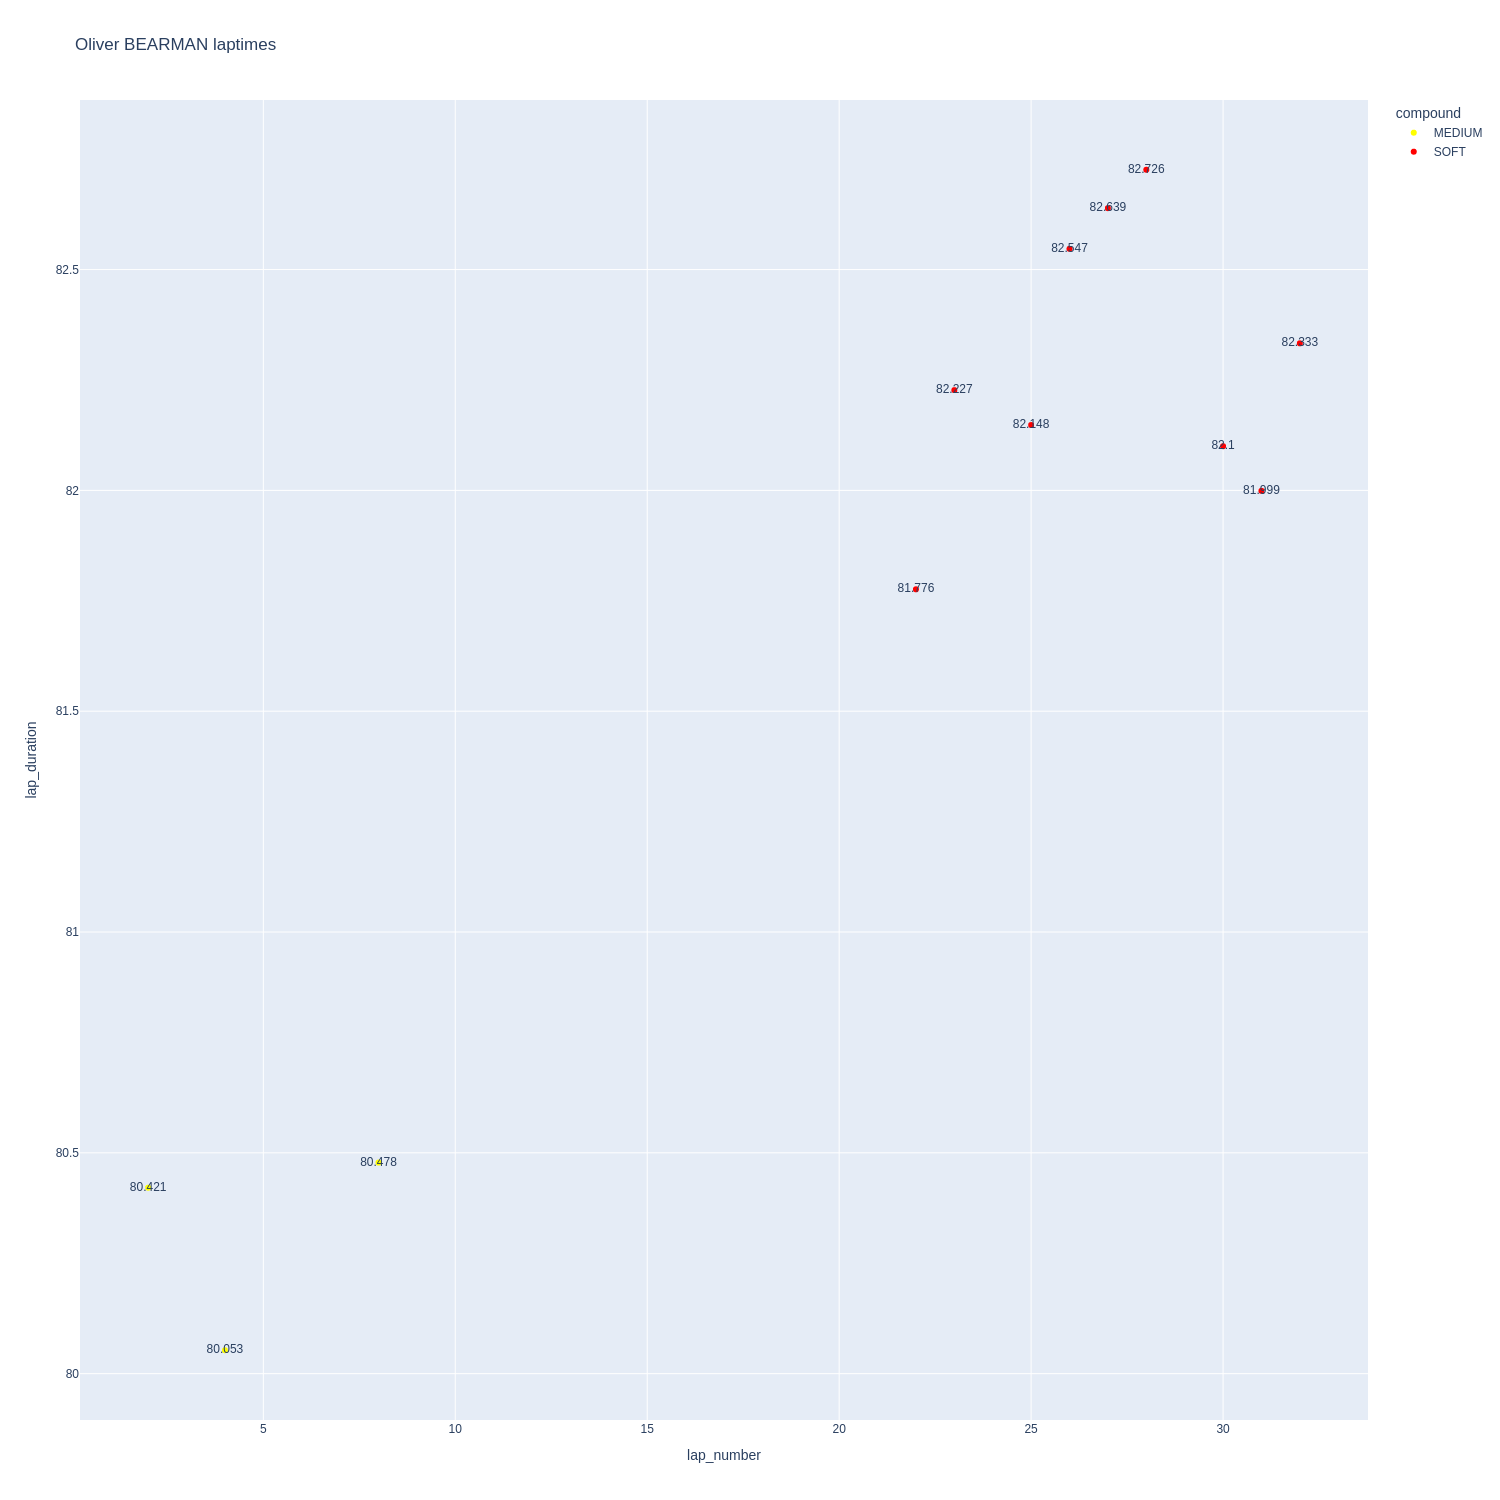

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

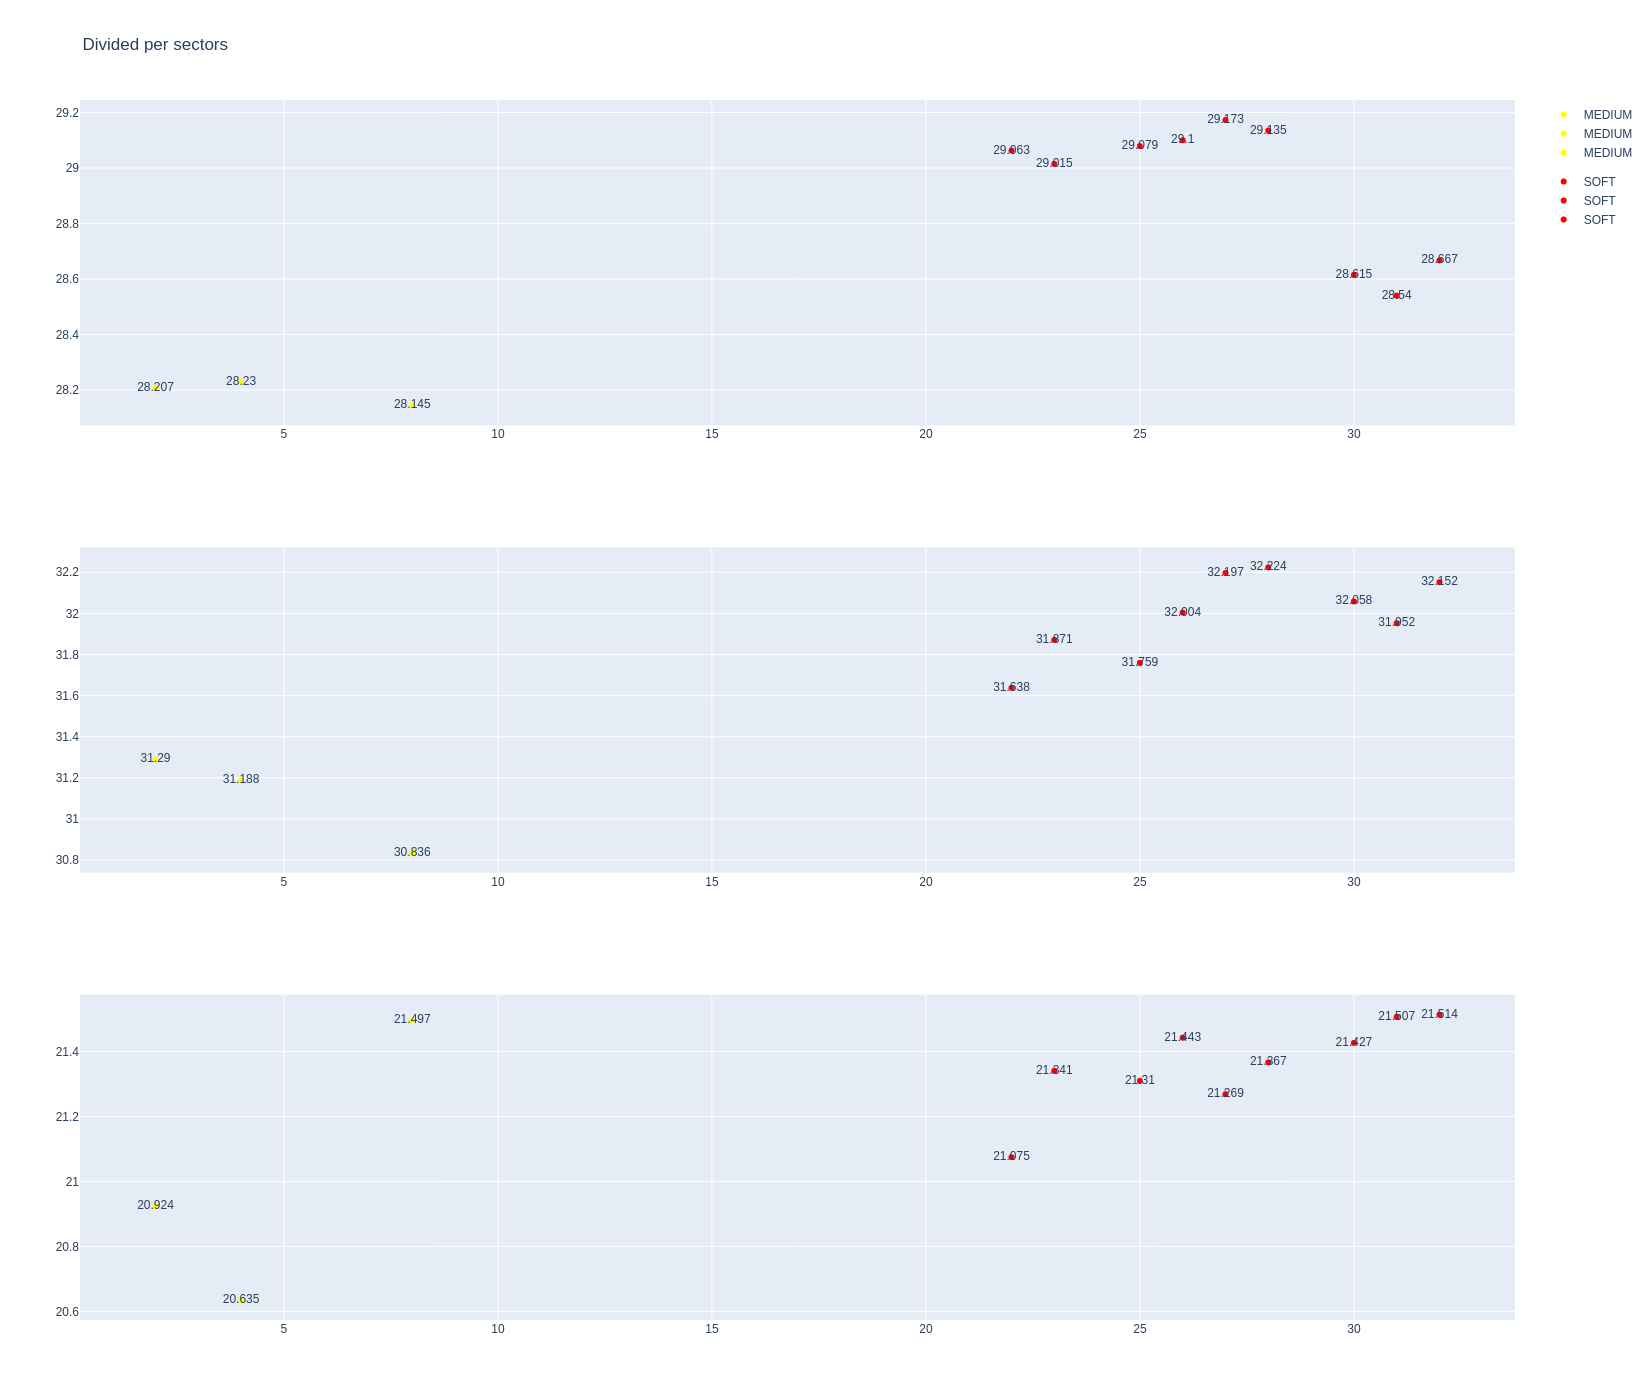

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [66]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1272         9871             1             43          1        3   
6          1272         9871             1             10          1        1   
12         1272         9871             2             43          4        6   
15         1272         9871             2             10          2        4   
20         1272         9871             3             10          5        7   
23         1272         9871             3             43          7        9   
34         1272         9871             4             10          8        9   
41         1272         9871             4             43         10       12   
46         1272         9871             5             10         10       12   
56         1272         9871             5             43         13       15   
61         1272         9871             6             10         13       15   
90         1272         9871             7             10         16       30   
95         1272         9871             6             43         16       31   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
6    MEDIUM                  0  
12   MEDIUM                  3  
15   MEDIUM                  1  
20   MEDIUM                  4  
23   MEDIUM                  6  
34   MEDIUM                  0  
41     SOFT                  0  
46     SOFT                  0  
56     SOFT                  3  
61     SOFT                  3  
90   MEDIUM                  9  
95     SOFT                  6

In [67]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
154  Franco COLAPINTO   MEDIUM  2025-10-24T22:14:29.368000+00:00           8   
350  Franco COLAPINTO     SOFT  2025-10-24T22:42:33.957000+00:00          17   
365  Franco COLAPINTO     SOFT  2025-10-24T22:43:57.025000+00:00          18   
380  Franco COLAPINTO     SOFT  2025-10-24T22:45:19.569000+00:00          19   
397  Franco COLAPINTO     SOFT  2025-10-24T22:46:42.165000+00:00          20   
416  Franco COLAPINTO     SOFT  2025-10-24T22:48:04.892000+00:00          21   
455  Franco COLAPINTO     SOFT  2025-10-24T22:50:55.340000+00:00          23   
475  Franco COLAPINTO     SOFT  2025-10-24T22:52:18.090000+00:00          24   
495  Franco COLAPINTO     SOFT  2025-10-24T22:53:41.018000+00:00          25   
515  Franco COLAPINTO     SOFT  2025-10-24T22:55:03.800000+00:00          26   
535  Franco COLAPINTO     SOFT  2025-10-24T22:56:26.847000+00:00          27   
554  Franco COLAPINTO     SOFT  2025-10-24T22:57:49.826000+00:00          28   
573  Franco COLAPINTO     SOFT  2025-10-24T22:59:12.795000+00:00          29   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
154             28.028             30.937             23.752        82.717  
350             29.371             32.342             21.348        83.061  
365             29.202             32.158             21.191        82.551  
380             29.173             32.169             21.333        82.675  
397             29.237             32.110             21.350        82.697  
416             29.124             32.344             21.479        82.947  
455             29.241             32.277             21.321        82.839  
475             29.284             32.198             21.450        82.932  
495             28.915             32.350             21.434        82.699  
515             28.897             32.520             21.638        83.055  
535             28.732             32.624             21.650        83.006  
554             28.713             32.615             21.613        82.941  
573             28.629             32.439             21.542        82.610

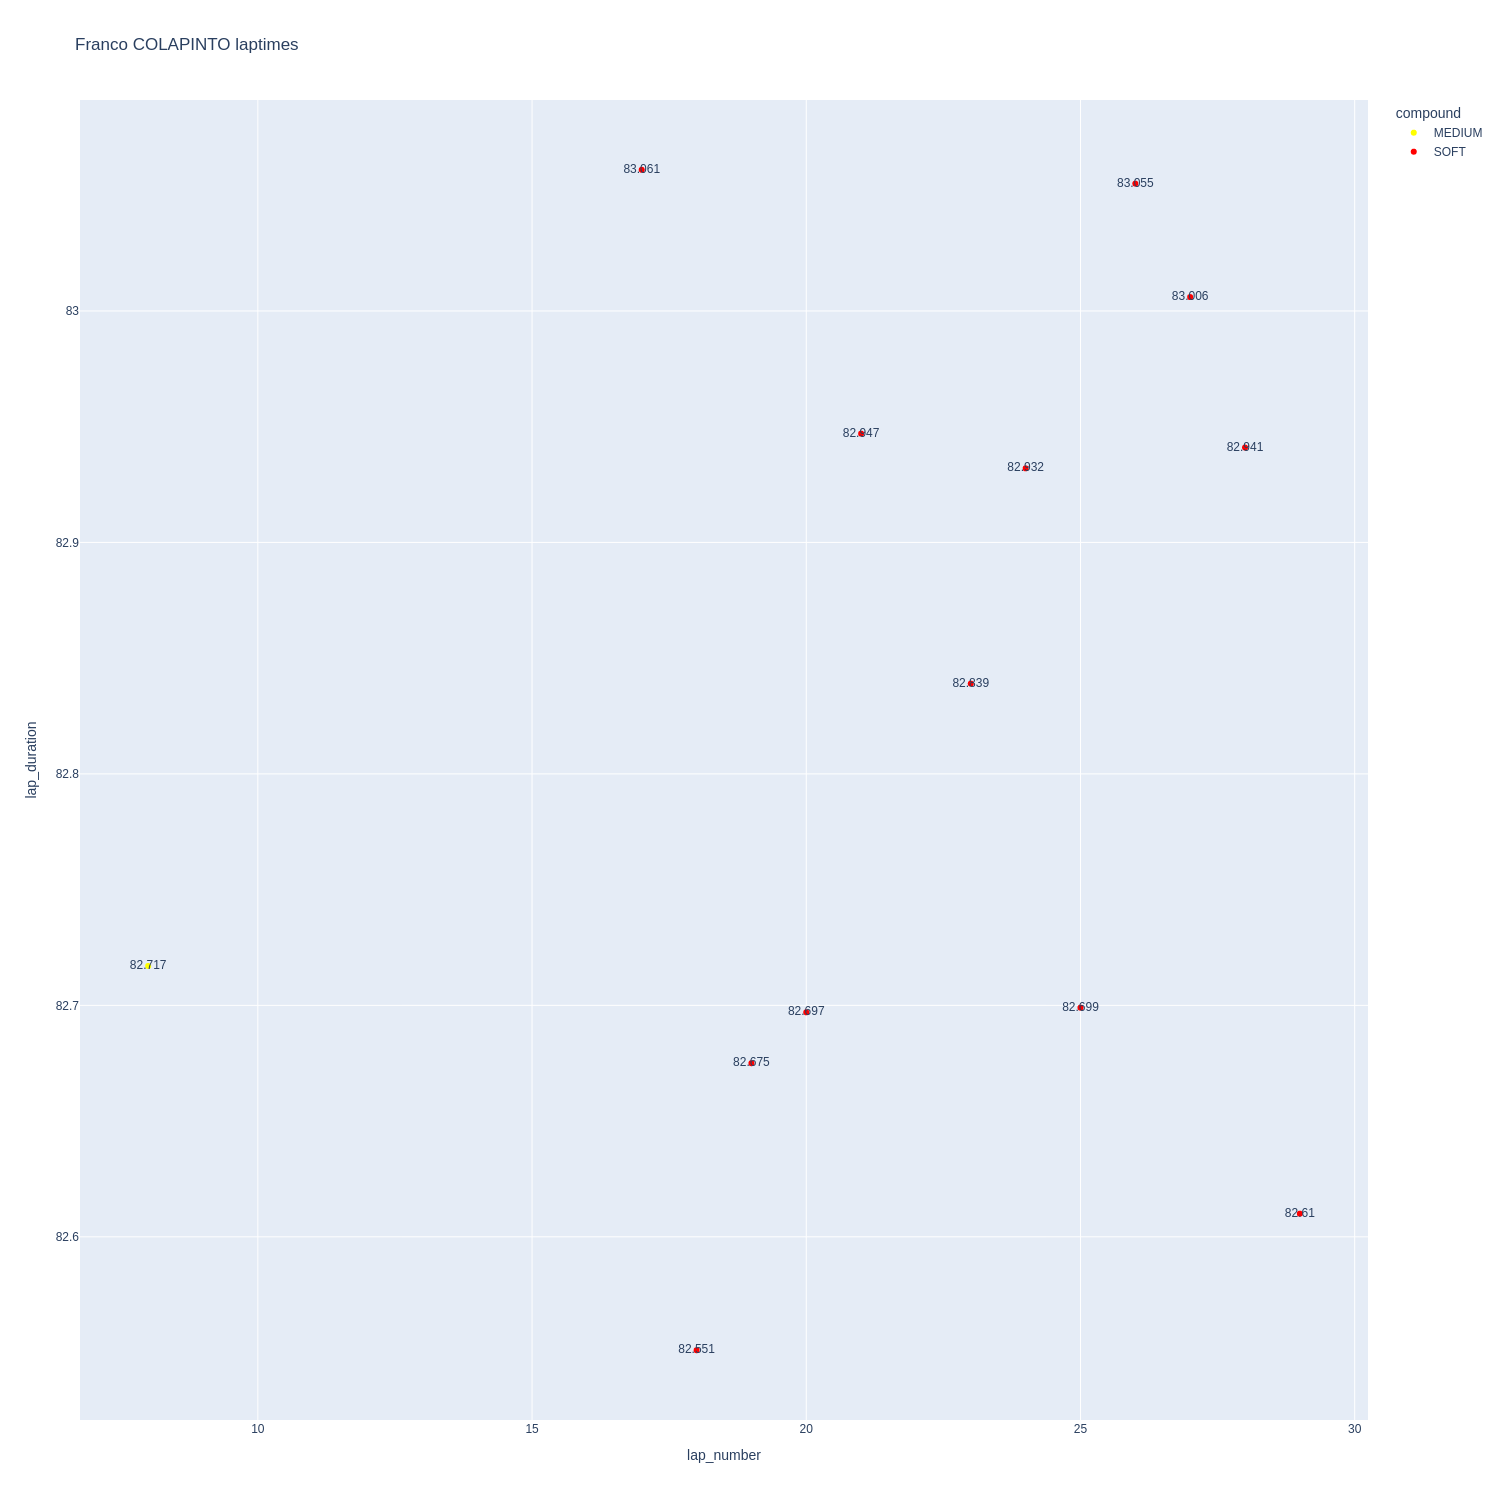

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

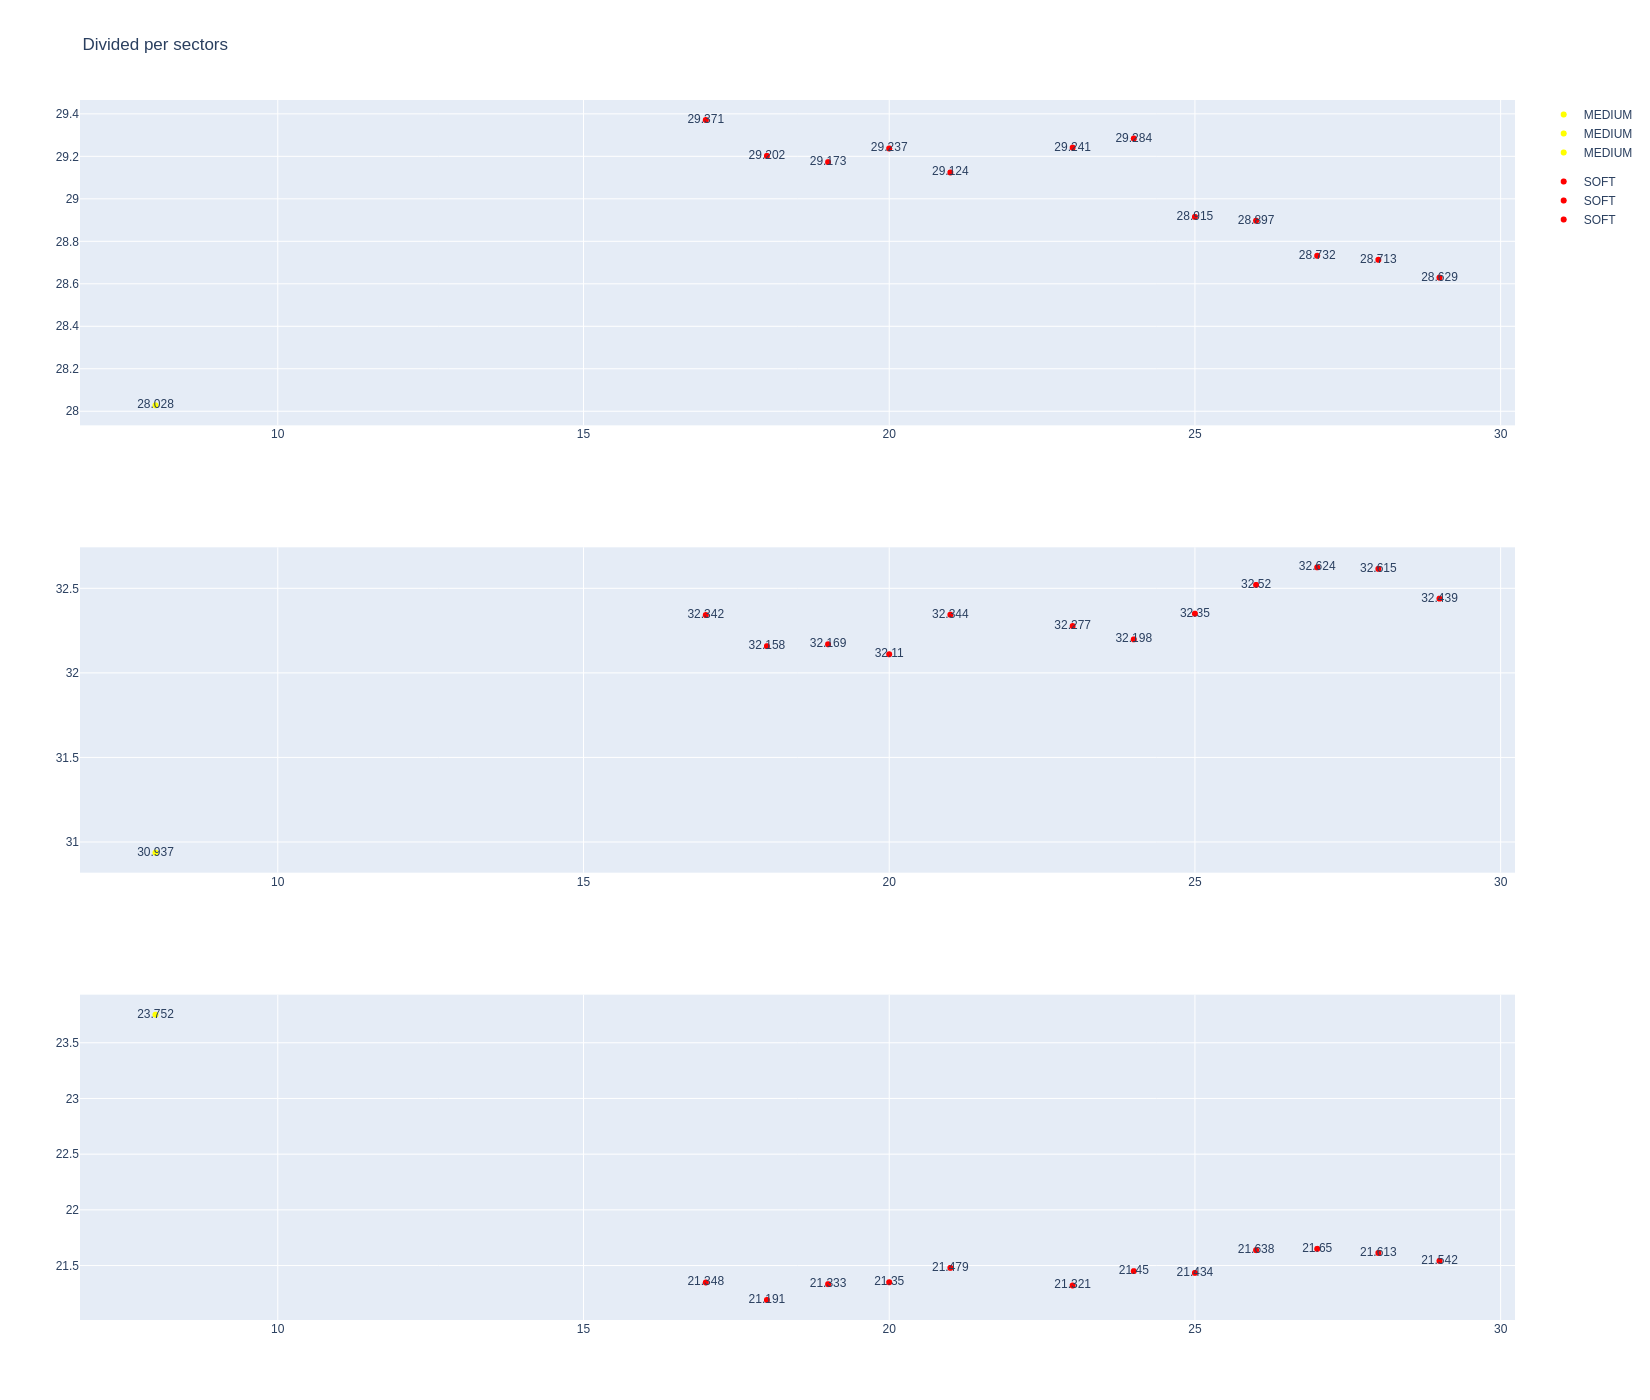

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [70]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
120  Pierre GASLY   MEDIUM  2025-10-24T22:11:13.637000+00:00           3   
172  Pierre GASLY   MEDIUM  2025-10-24T22:16:35.061000+00:00           6   
361  Pierre GASLY   MEDIUM  2025-10-24T22:43:33.491000+00:00          17   
375  Pierre GASLY   MEDIUM  2025-10-24T22:44:56.116000+00:00          18   
391  Pierre GASLY   MEDIUM  2025-10-24T22:46:18.610000+00:00          19   
410  Pierre GASLY   MEDIUM  2025-10-24T22:47:41.532000+00:00          20   
429  Pierre GASLY   MEDIUM  2025-10-24T22:49:04.299000+00:00          21   
449  Pierre GASLY   MEDIUM  2025-10-24T22:50:27.027000+00:00          22   
469  Pierre GASLY   MEDIUM  2025-10-24T22:51:50.481000+00:00          23   
487  Pierre GASLY   MEDIUM  2025-10-24T22:53:14.341000+00:00          24   
507  Pierre GASLY   MEDIUM  2025-10-24T22:54:37.831000+00:00          25   
527  Pierre GASLY   MEDIUM  2025-10-24T22:56:01.456000+00:00          26   
547  Pierre GASLY   MEDIUM  2025-10-24T22:57:25.044000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
120             28.236             31.355             21.036        80.627  
172             28.312             31.358             20.919        80.589  
361             29.120             32.140             21.314        82.574  
375             29.167             32.075             21.301        82.543  
391             29.392             32.045             21.403        82.840  
410             29.198             32.150             21.425        82.773  
429             29.115             32.010             21.601        82.726  
449             29.305             32.472             21.735        83.512  
469             29.445             32.505             21.834        83.784  
487             29.149             32.598             21.782        83.529  
507             29.014             32.780             21.885        83.679  
527             29.114             32.568             21.822        83.504  
547             29.377             32.758             21.832        83.967

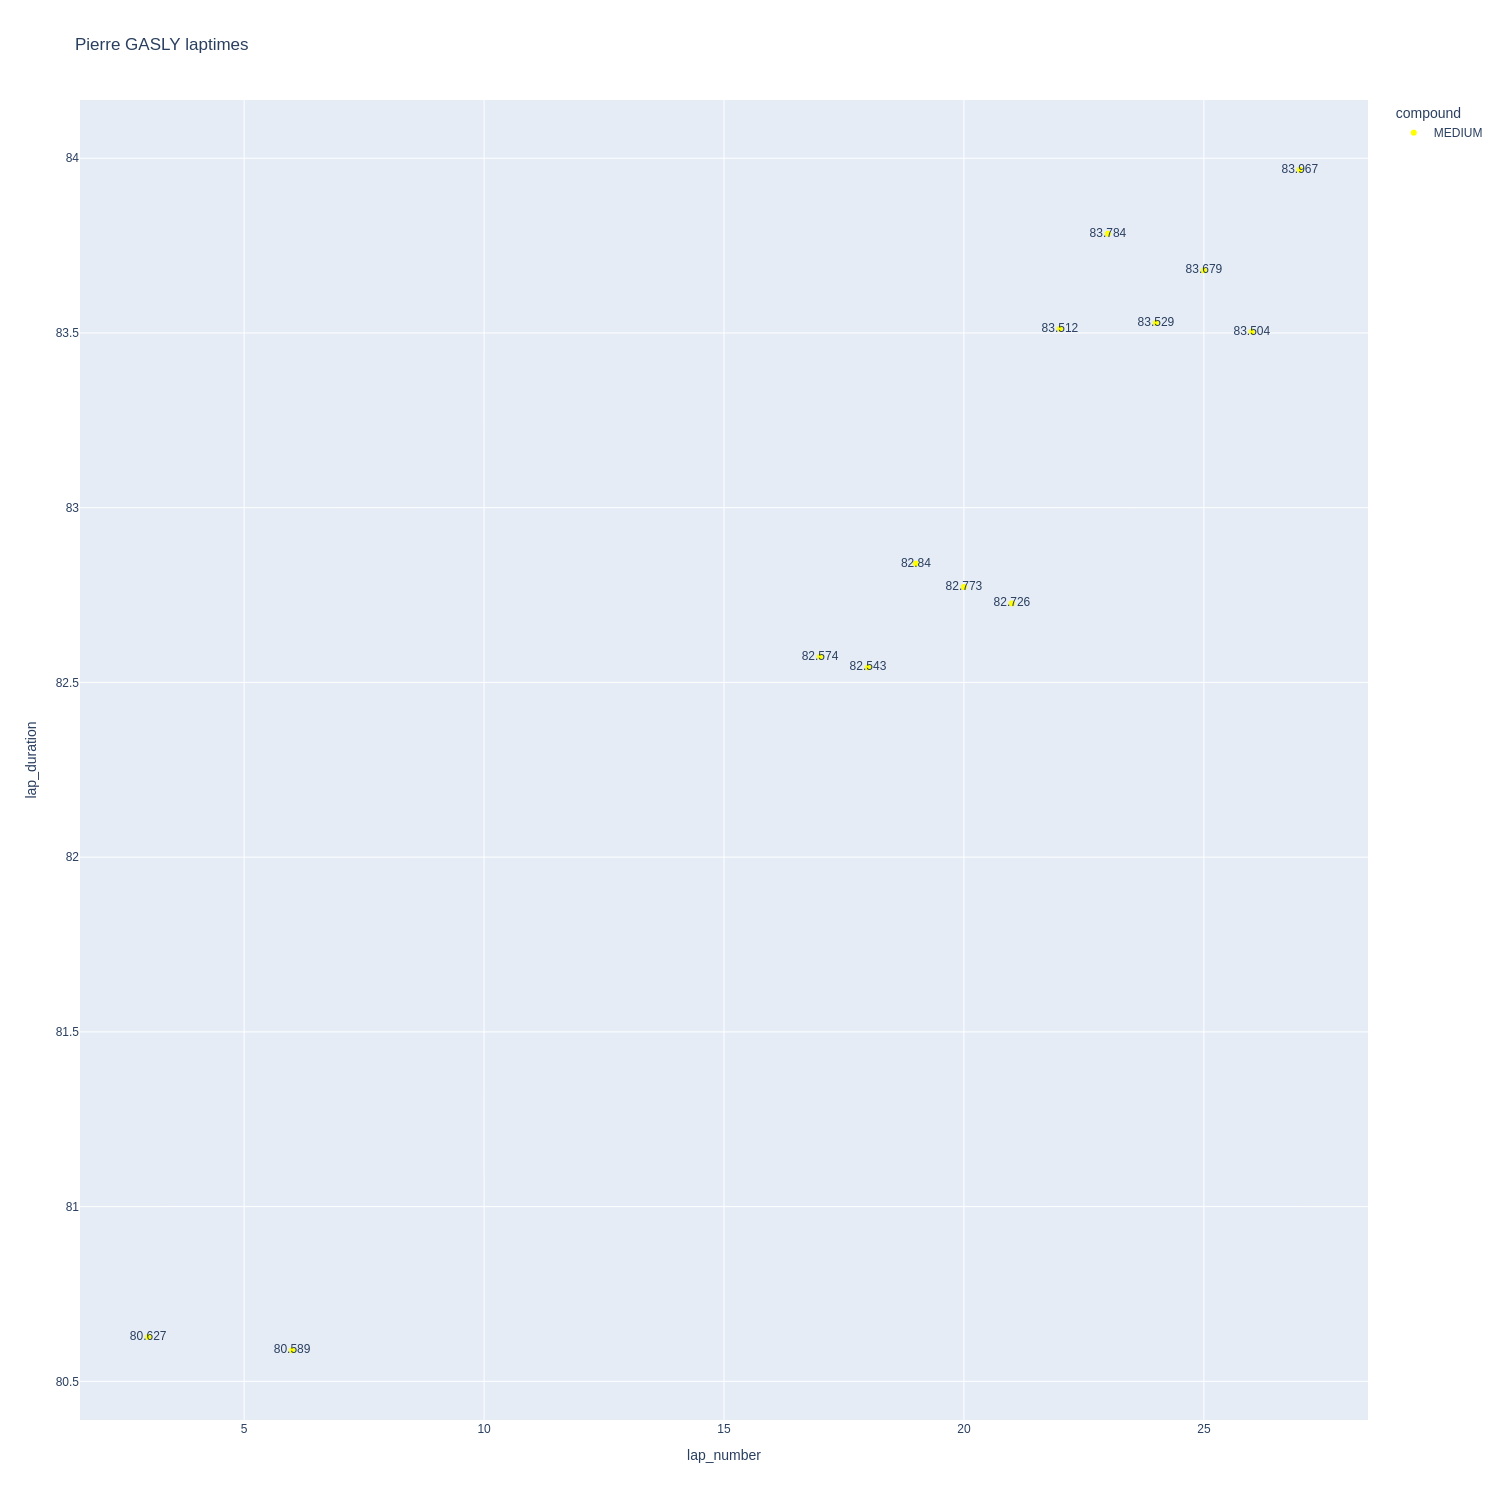

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

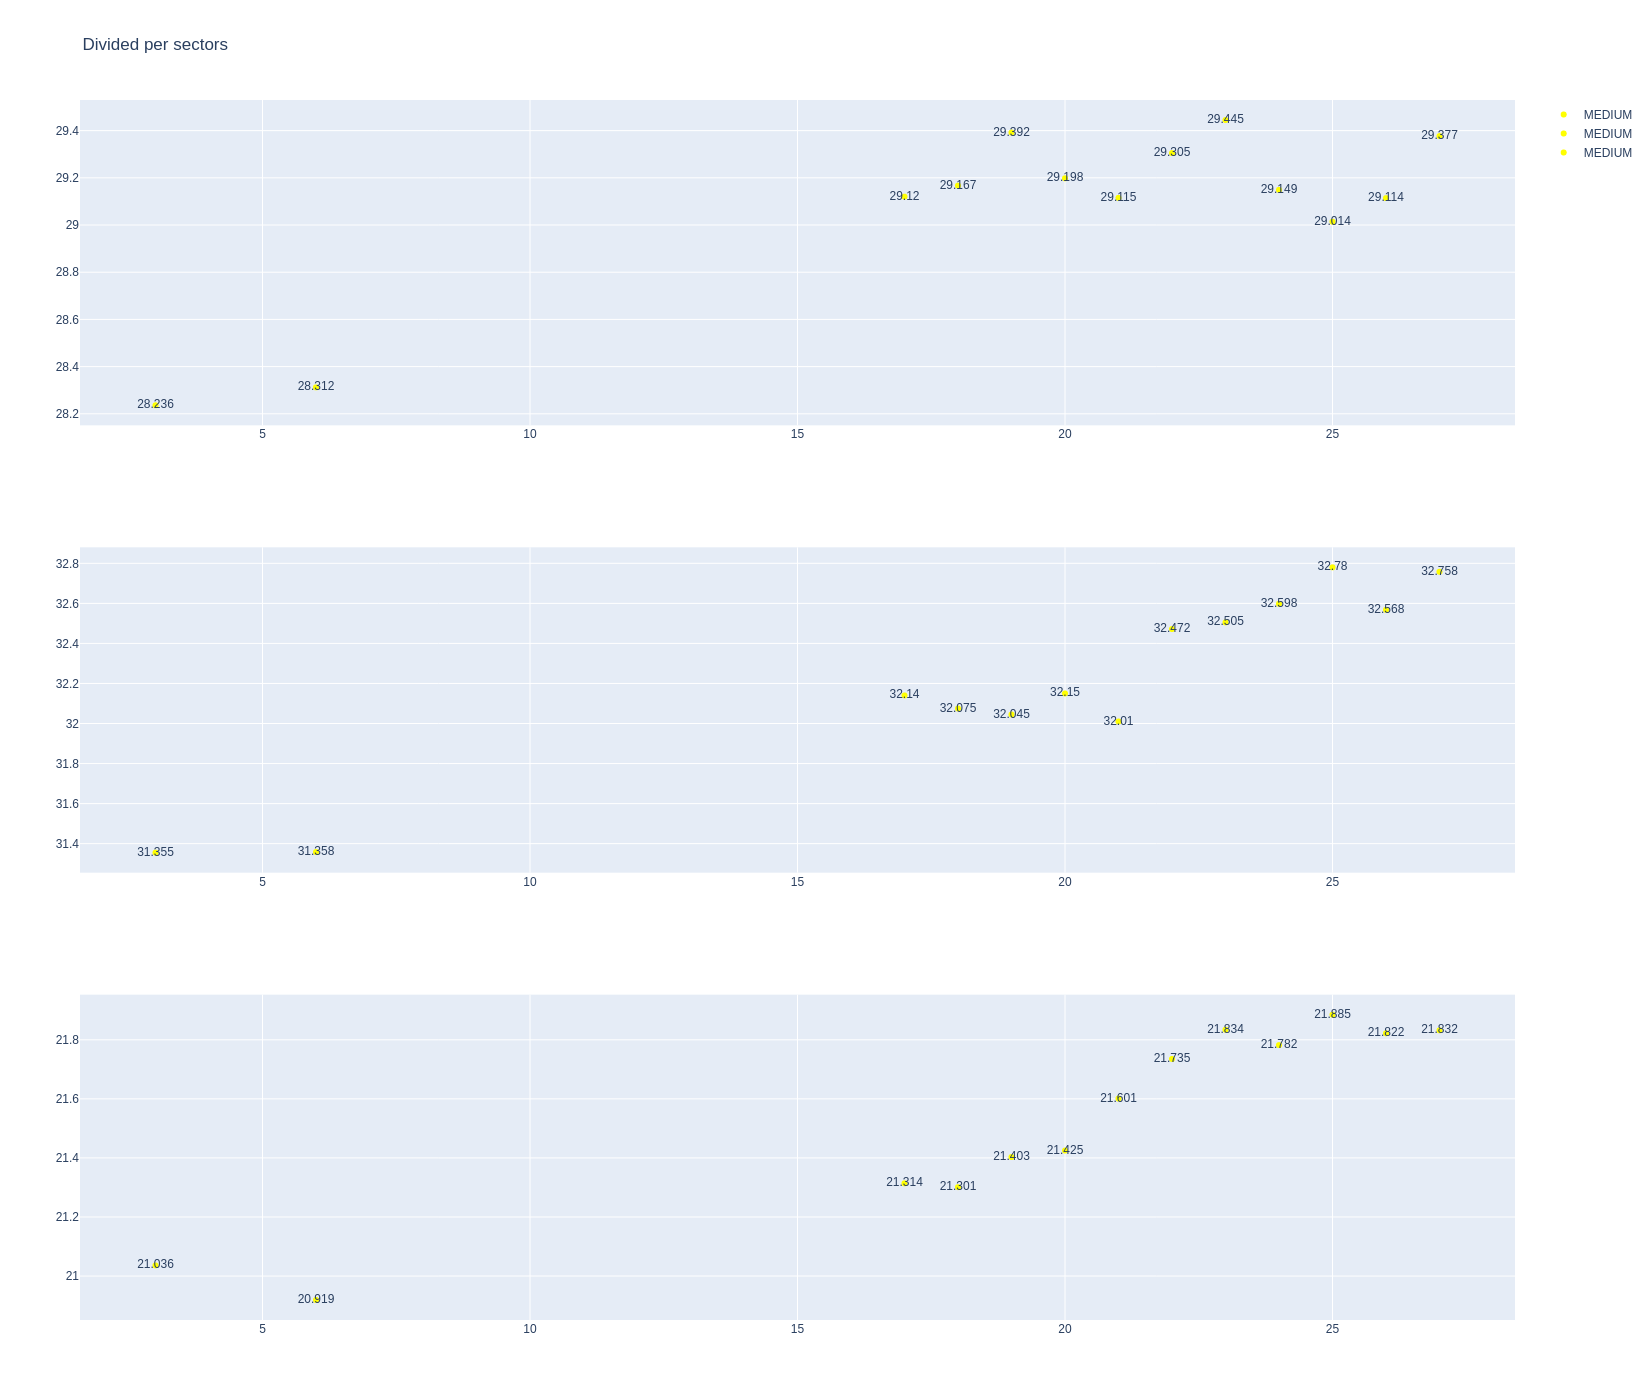

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [73]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  \
13          1272         9871             1             55          1   
18          1272         9871             1             23          1   
24          1272         9871             2             23          9   
27          1272         9871             2             55          8   
42          1272         9871             3             55         13   
54          1272         9871             3             23         12   
58          1272         9871             4             55         16   
65          1272         9871             5             55         19   
75          1272         9871             4             23         16   
92          1272         9871             5             23         25   
100         1272         9871             6             55         20   

     lap_end compound  tyre_age_at_start  
13         7   MEDIUM                  0  
18         8   MEDIUM                  0  
24        11     SOFT                  0  
27        12   MEDIUM                  7  
42        15     SOFT                  0  
54        15     SOFT                  3  
58        18     SOFT                  3  
65        19     SOFT                  6  
75        24   MEDIUM                  8  
92        31     SOFT                  7  
100       34   MEDIUM                 12

In [74]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
341  Alexander ALBON   MEDIUM  2025-10-24T22:41:14.143000+00:00          17   
366  Alexander ALBON   MEDIUM  2025-10-24T22:44:03.229000+00:00          19   
382  Alexander ALBON   MEDIUM  2025-10-24T22:45:26.335000+00:00          20   
398  Alexander ALBON   MEDIUM  2025-10-24T22:46:49.267000+00:00          21   
417  Alexander ALBON   MEDIUM  2025-10-24T22:48:12.580000+00:00          22   
436  Alexander ALBON   MEDIUM  2025-10-24T22:49:35.580000+00:00          23   
509  Alexander ALBON     SOFT  2025-10-24T22:54:41.894000+00:00          26   
529  Alexander ALBON     SOFT  2025-10-24T22:56:03.925000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
341             29.306             32.475             21.332        83.113  
366             29.294             32.335             21.446        83.075  
382             29.189             32.318             21.487        82.994  
398             29.242             32.608             21.418        83.268  
417             29.167             32.329             21.570        83.066  
436             29.275             32.430             21.674        83.379  
509             28.906             31.885             21.264        82.055  
529             28.769             32.237             21.492        82.498

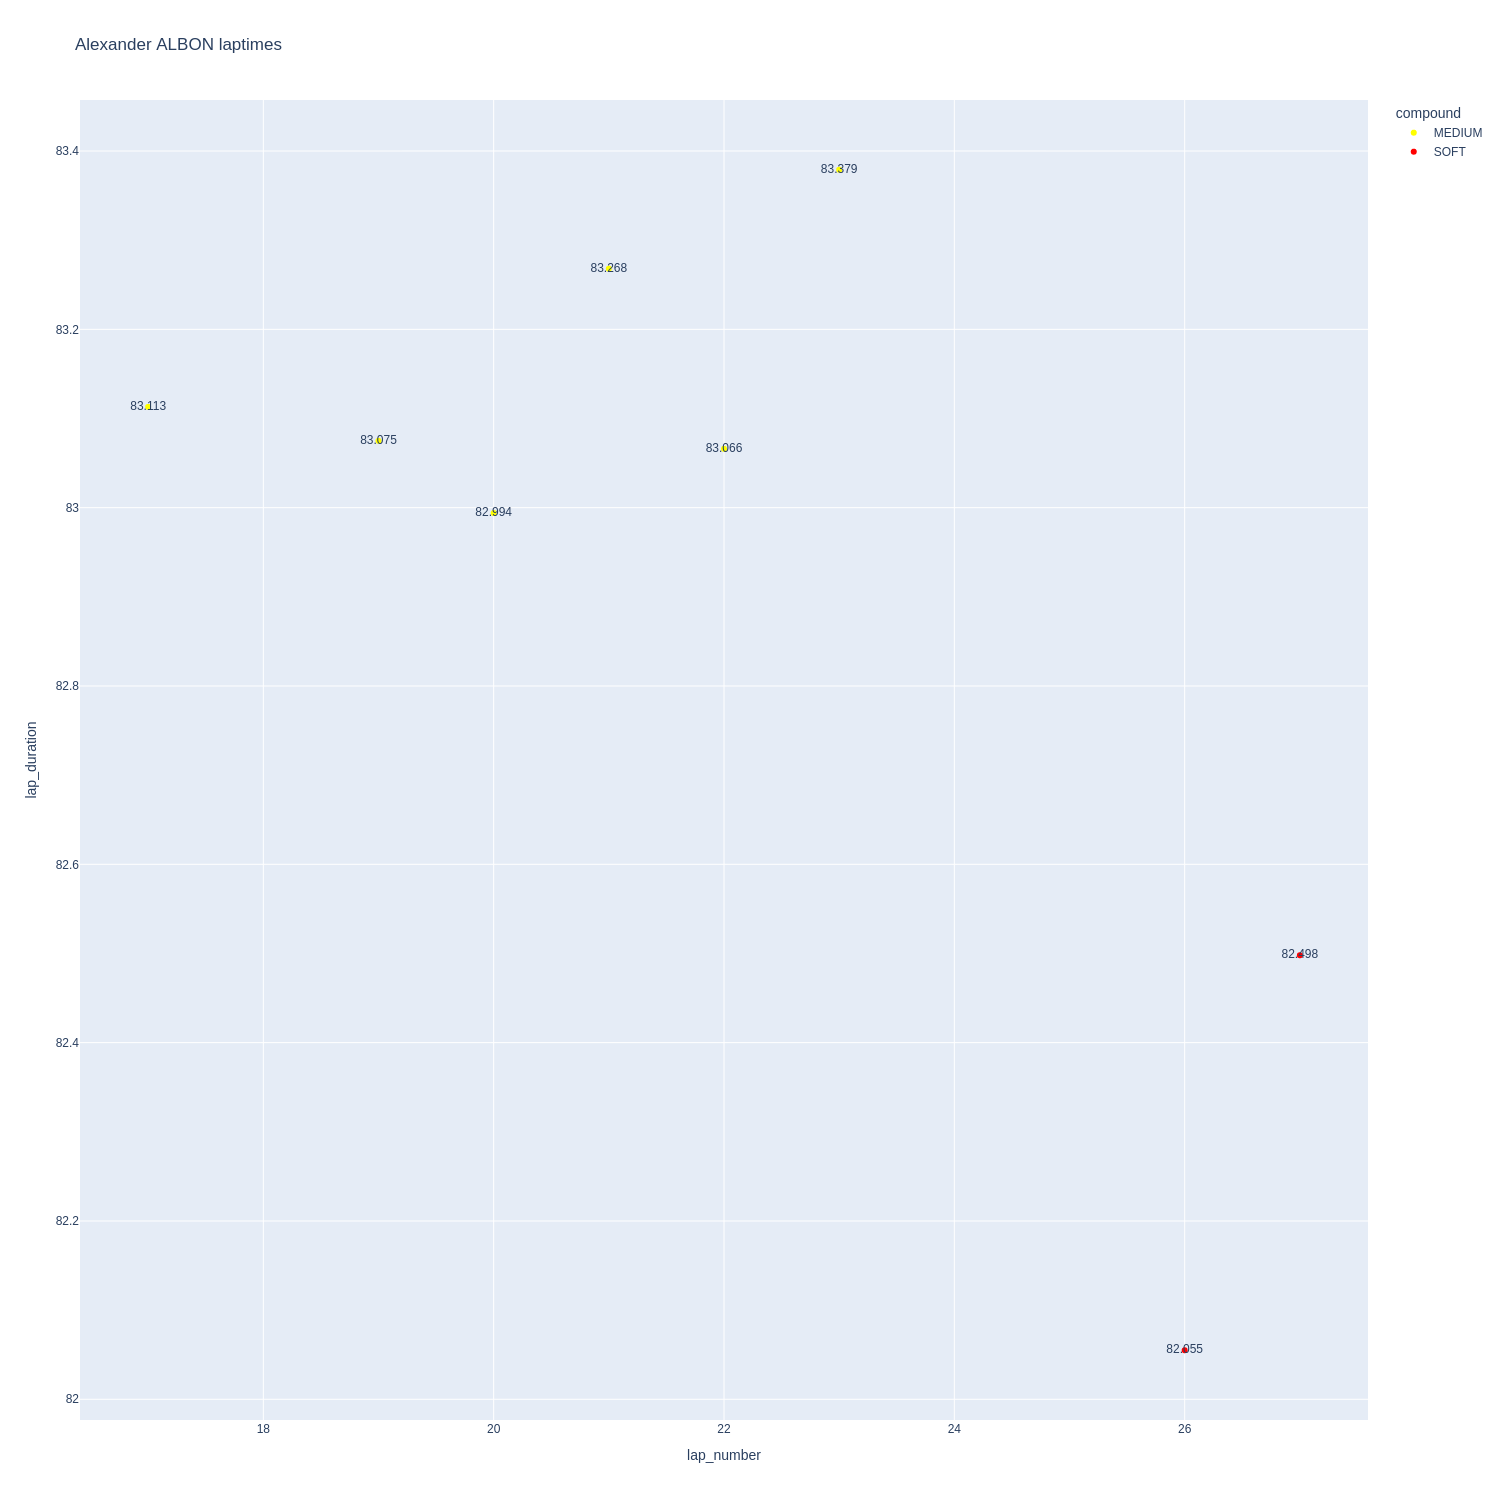

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

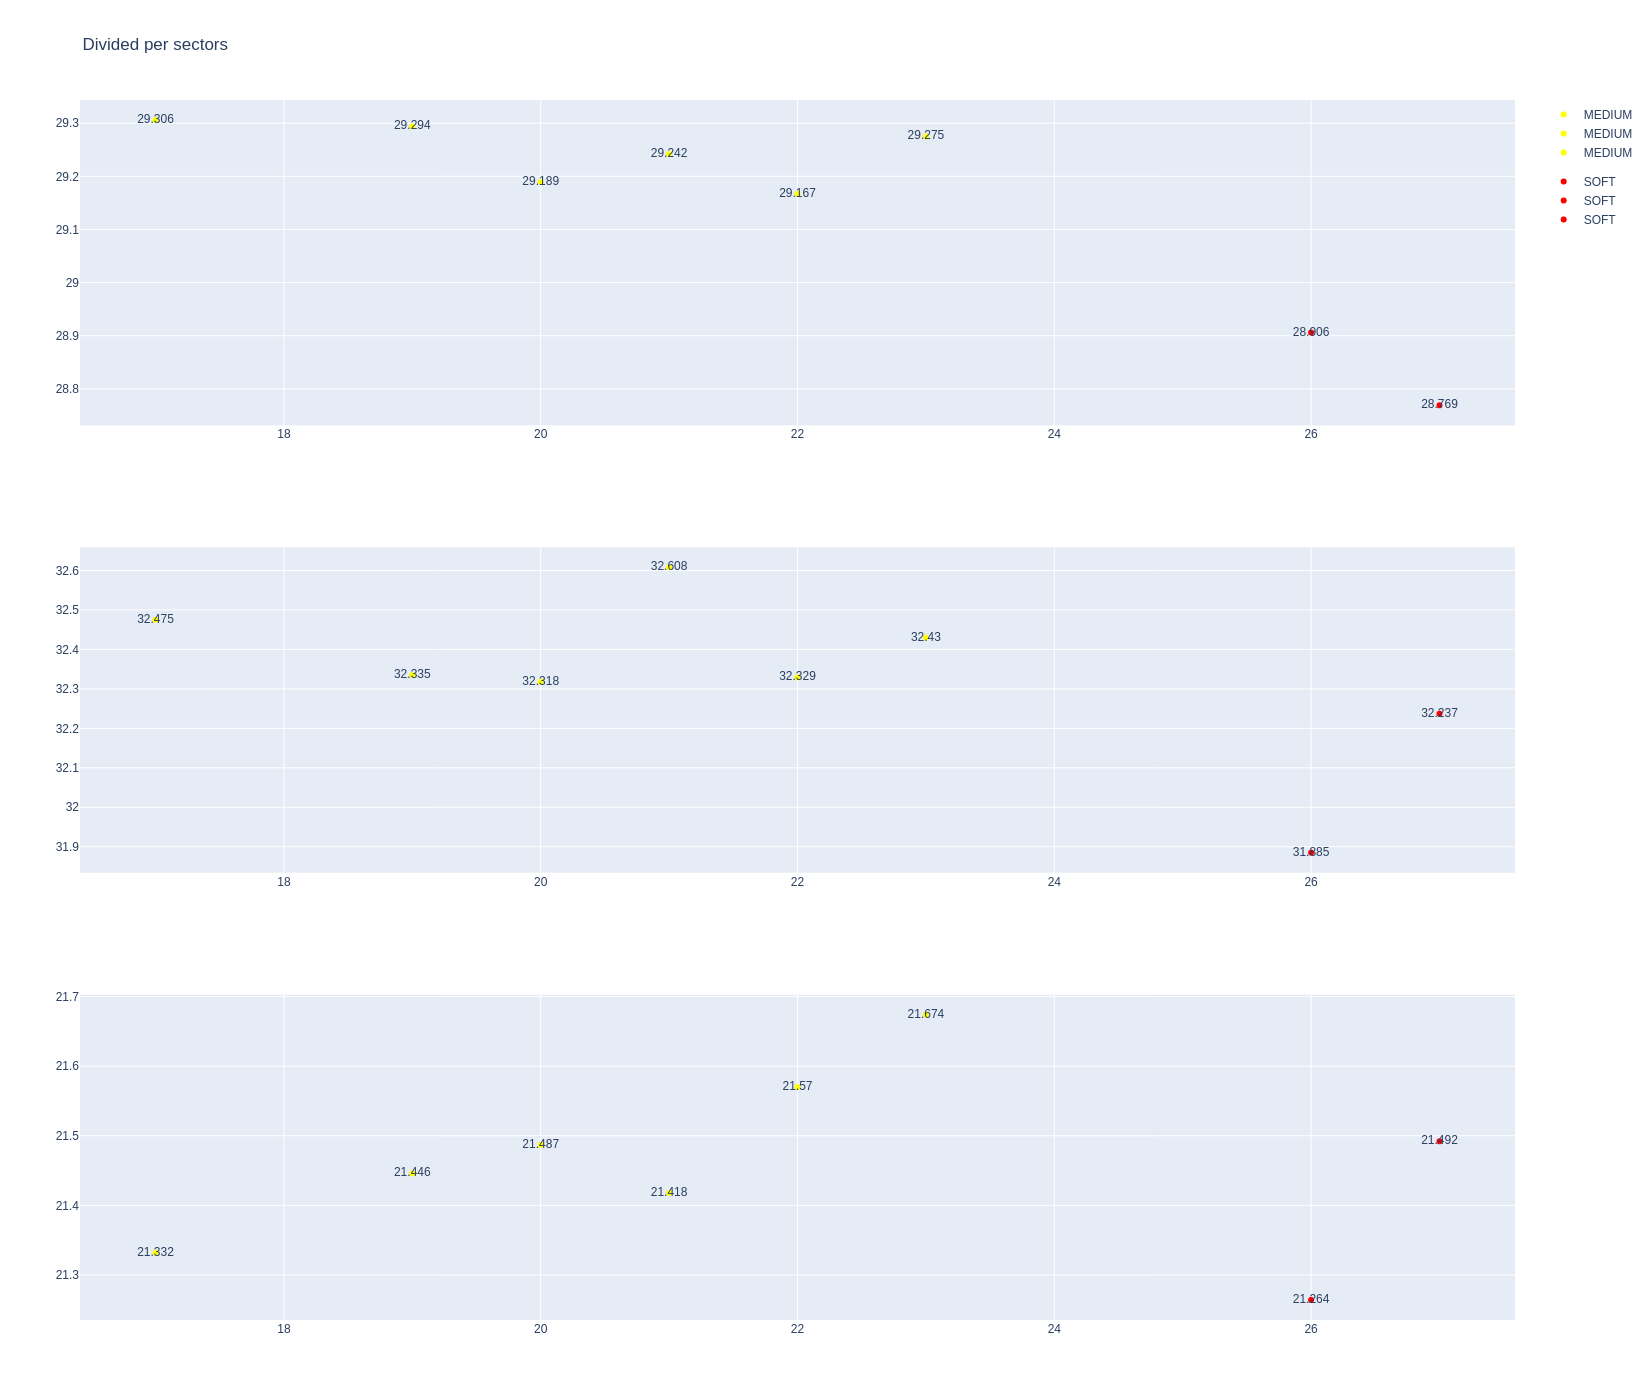

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [77]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
22   Carlos SAINZ   MEDIUM  2025-10-24T22:01:57.593000+00:00           2   
61   Carlos SAINZ   MEDIUM  2025-10-24T22:05:25.510000+00:00           4   
371  Carlos SAINZ   MEDIUM  2025-10-24T22:44:36.916000+00:00          21   
387  Carlos SAINZ   MEDIUM  2025-10-24T22:45:59.178000+00:00          22   
405  Carlos SAINZ   MEDIUM  2025-10-24T22:47:21.689000+00:00          23   
423  Carlos SAINZ   MEDIUM  2025-10-24T22:48:44.392000+00:00          24   
443  Carlos SAINZ   MEDIUM  2025-10-24T22:50:07.246000+00:00          25   
481  Carlos SAINZ   MEDIUM  2025-10-24T22:52:56.012000+00:00          27   
501  Carlos SAINZ   MEDIUM  2025-10-24T22:54:19.175000+00:00          28   
521  Carlos SAINZ   MEDIUM  2025-10-24T22:55:42.441000+00:00          29   
539  Carlos SAINZ   MEDIUM  2025-10-24T22:57:05.638000+00:00          30   
559  Carlos SAINZ   MEDIUM  2025-10-24T22:58:28.919000+00:00          31   
579  Carlos SAINZ   MEDIUM  2025-10-24T22:59:52.098000+00:00          32   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              28.318             31.521             20.981        80.820  
61              28.301             31.134             20.756        80.191  
371             29.055             31.996             21.186        82.237  
387             29.031             32.252             21.163        82.446  
405             29.072             32.320             21.286        82.678  
423             29.011             32.315             21.499        82.825  
443             29.080             32.316             21.463        82.859  
481             29.179             32.438             21.552        83.169  
501             29.232             32.375             21.594        83.201  
521             29.138             32.416             21.653        83.207  
539             29.192             32.523             21.624        83.339  
559             29.061             32.407             21.590        83.058  
579             29.073             32.282             21.505        82.860

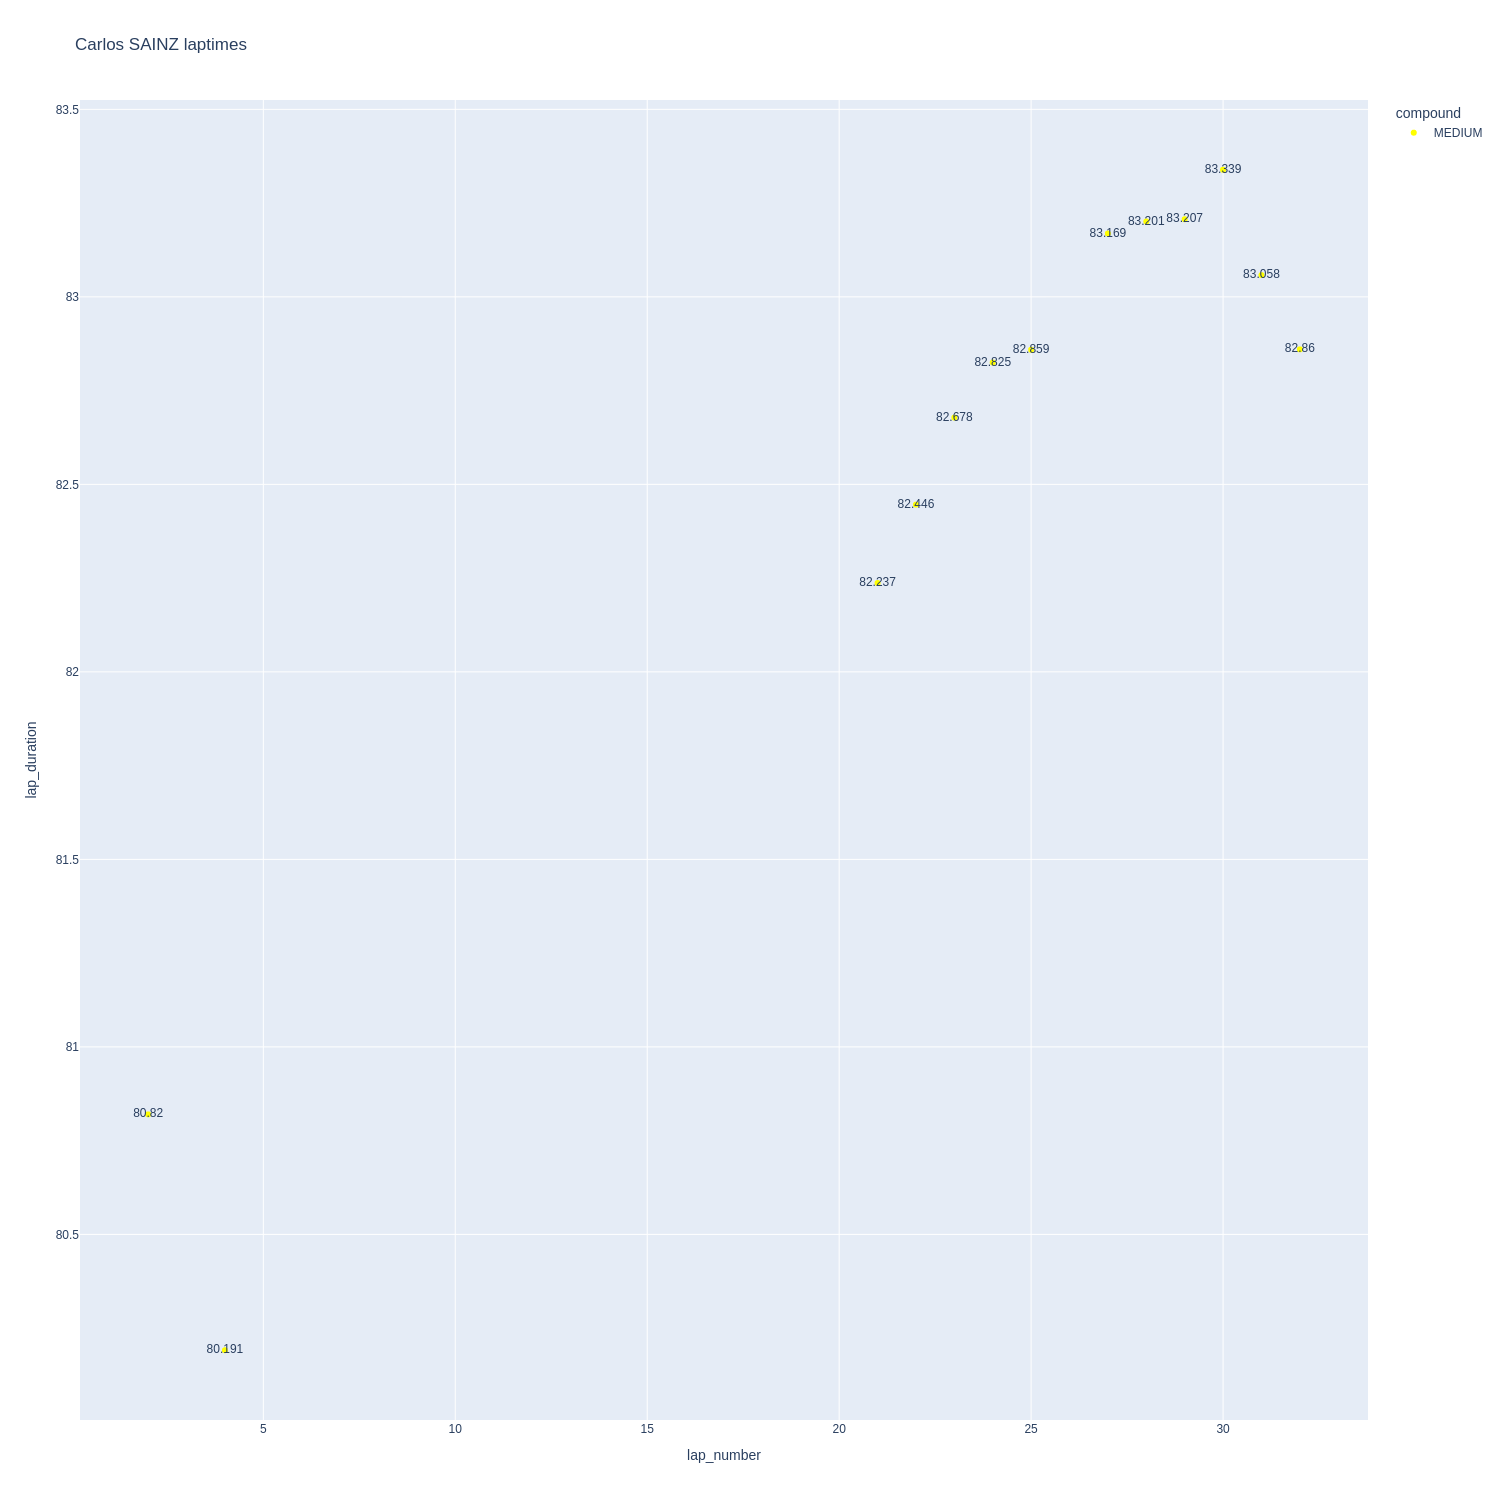

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

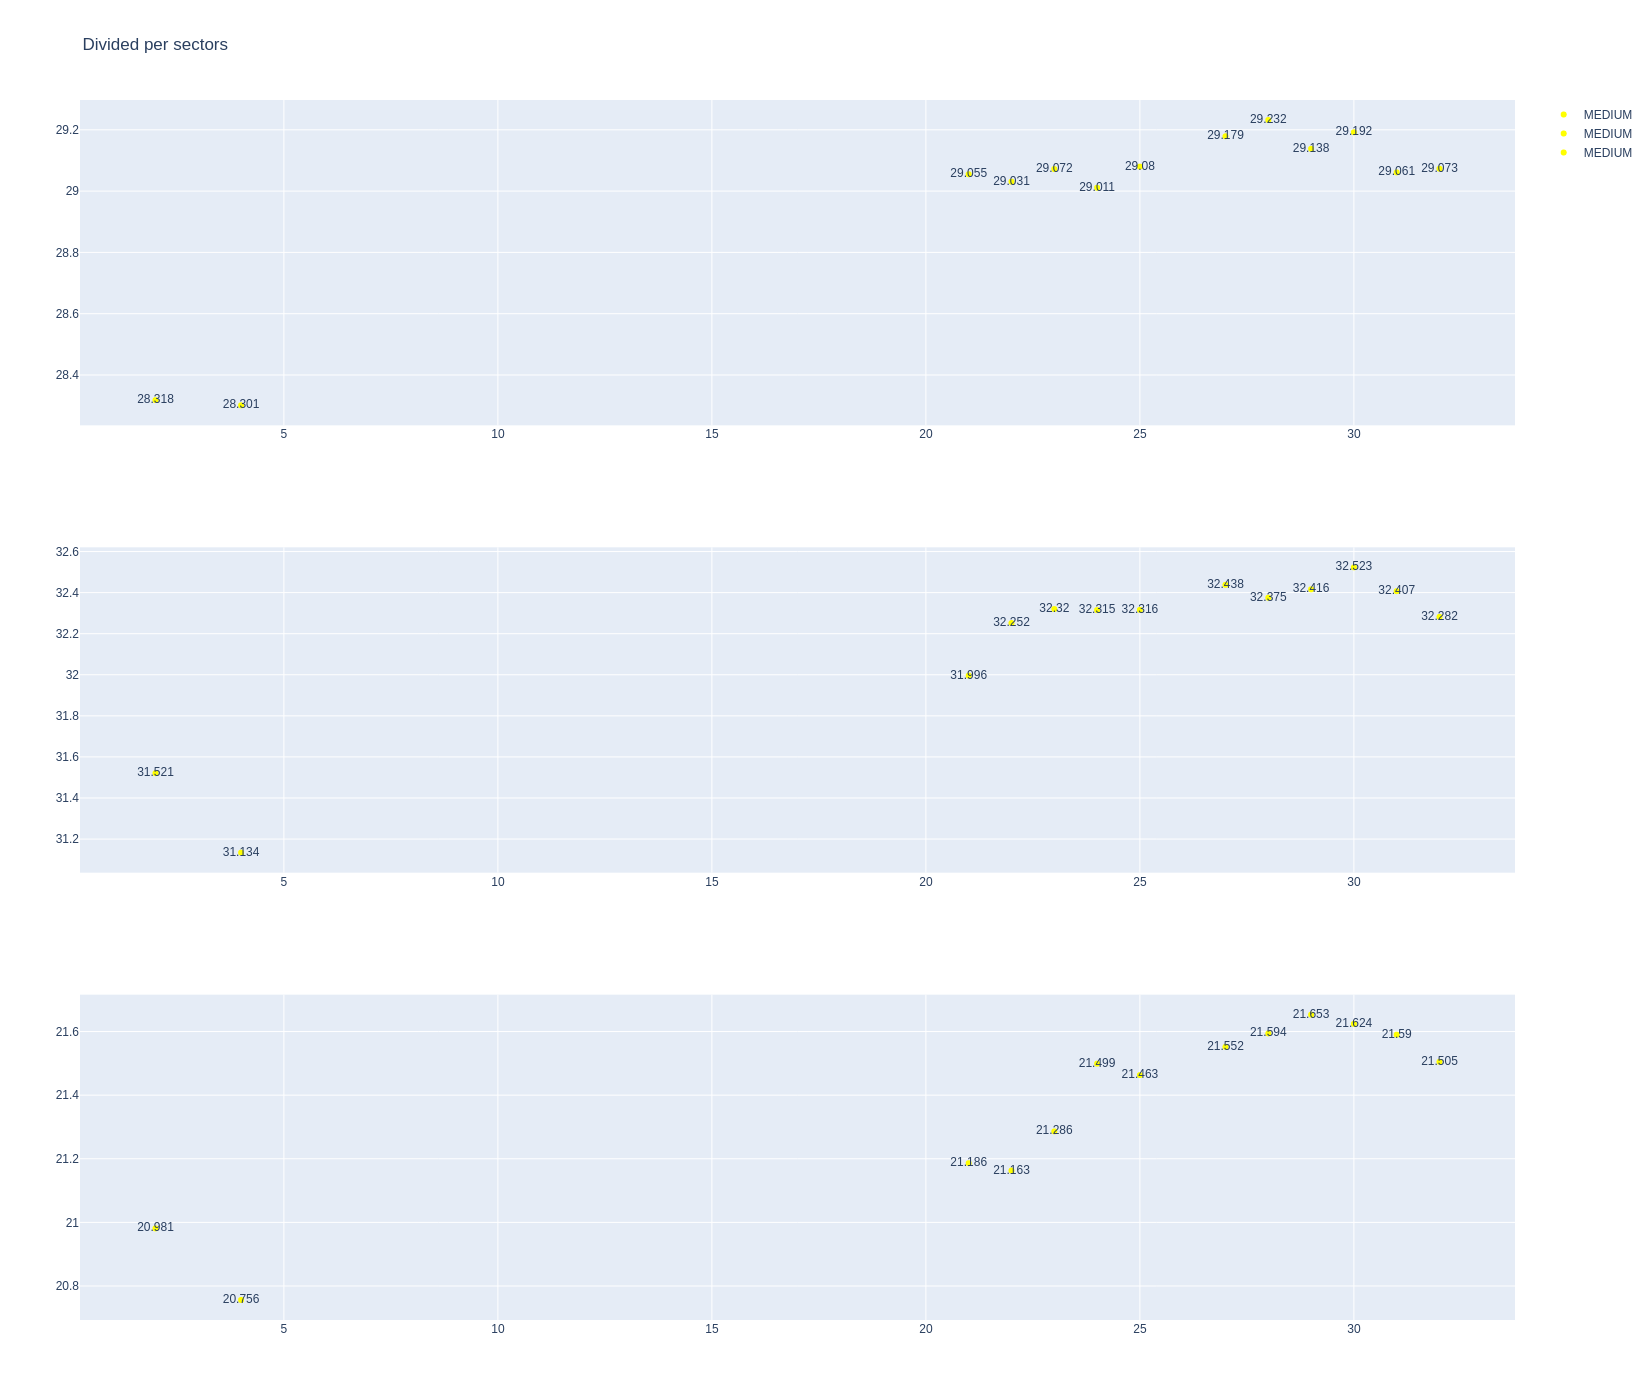

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [80]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1272         9871             1              5          1        4   
10         1272         9871             1             27          1        6   
14         1272         9871             2              5          5        7   
29         1272         9871             2             27          7        9   
35         1272         9871             3              5          8        9   
51         1272         9871             4              5         10       14   
64         1272         9871             3             27         10       15   
69         1272         9871             5              5         15       17   
73         1272         9871             4             27         16       19   
83         1272         9871             5             27         20       29   
98         1272         9871             6              5         18       30   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
10     HARD                  0  
14   MEDIUM                  0  
29     HARD                  6  
35   MEDIUM                  0  
51     SOFT                  0  
64     SOFT                  0  
69     SOFT                  5  
73     HARD                  9  
83     SOFT                  6  
98   MEDIUM                  9

In [81]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
38   Nico HULKENBERG     HARD  2025-10-24T22:03:16.984000+00:00           2   
54   Nico HULKENBERG     HARD  2025-10-24T22:04:39.850000+00:00           3   
370  Nico HULKENBERG     HARD  2025-10-24T22:44:28.588000+00:00          17   
385  Nico HULKENBERG     HARD  2025-10-24T22:45:51.195000+00:00          18   
447  Nico HULKENBERG     SOFT  2025-10-24T22:50:21.449000+00:00          21   
467  Nico HULKENBERG     SOFT  2025-10-24T22:51:43.700000+00:00          22   
484  Nico HULKENBERG     SOFT  2025-10-24T22:53:06.356000+00:00          23   
504  Nico HULKENBERG     SOFT  2025-10-24T22:54:28.894000+00:00          24   
544  Nico HULKENBERG     SOFT  2025-10-24T22:57:20.044000+00:00          26   
564  Nico HULKENBERG     SOFT  2025-10-24T22:58:42.357000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
38              28.967             32.601             21.463        83.031  
54              28.245             31.536             20.678        80.459  
370             29.375             31.957             21.164        82.496  
385             29.329             31.837             21.404        82.570  
447             29.133             31.933             21.174        82.240  
467             28.768             32.543             21.428        82.739  
484             29.233             31.953             21.296        82.482  
504             29.386             32.215             21.472        83.073  
544             28.956             31.853             21.518        82.327  
564             29.346             32.533             21.386        83.265

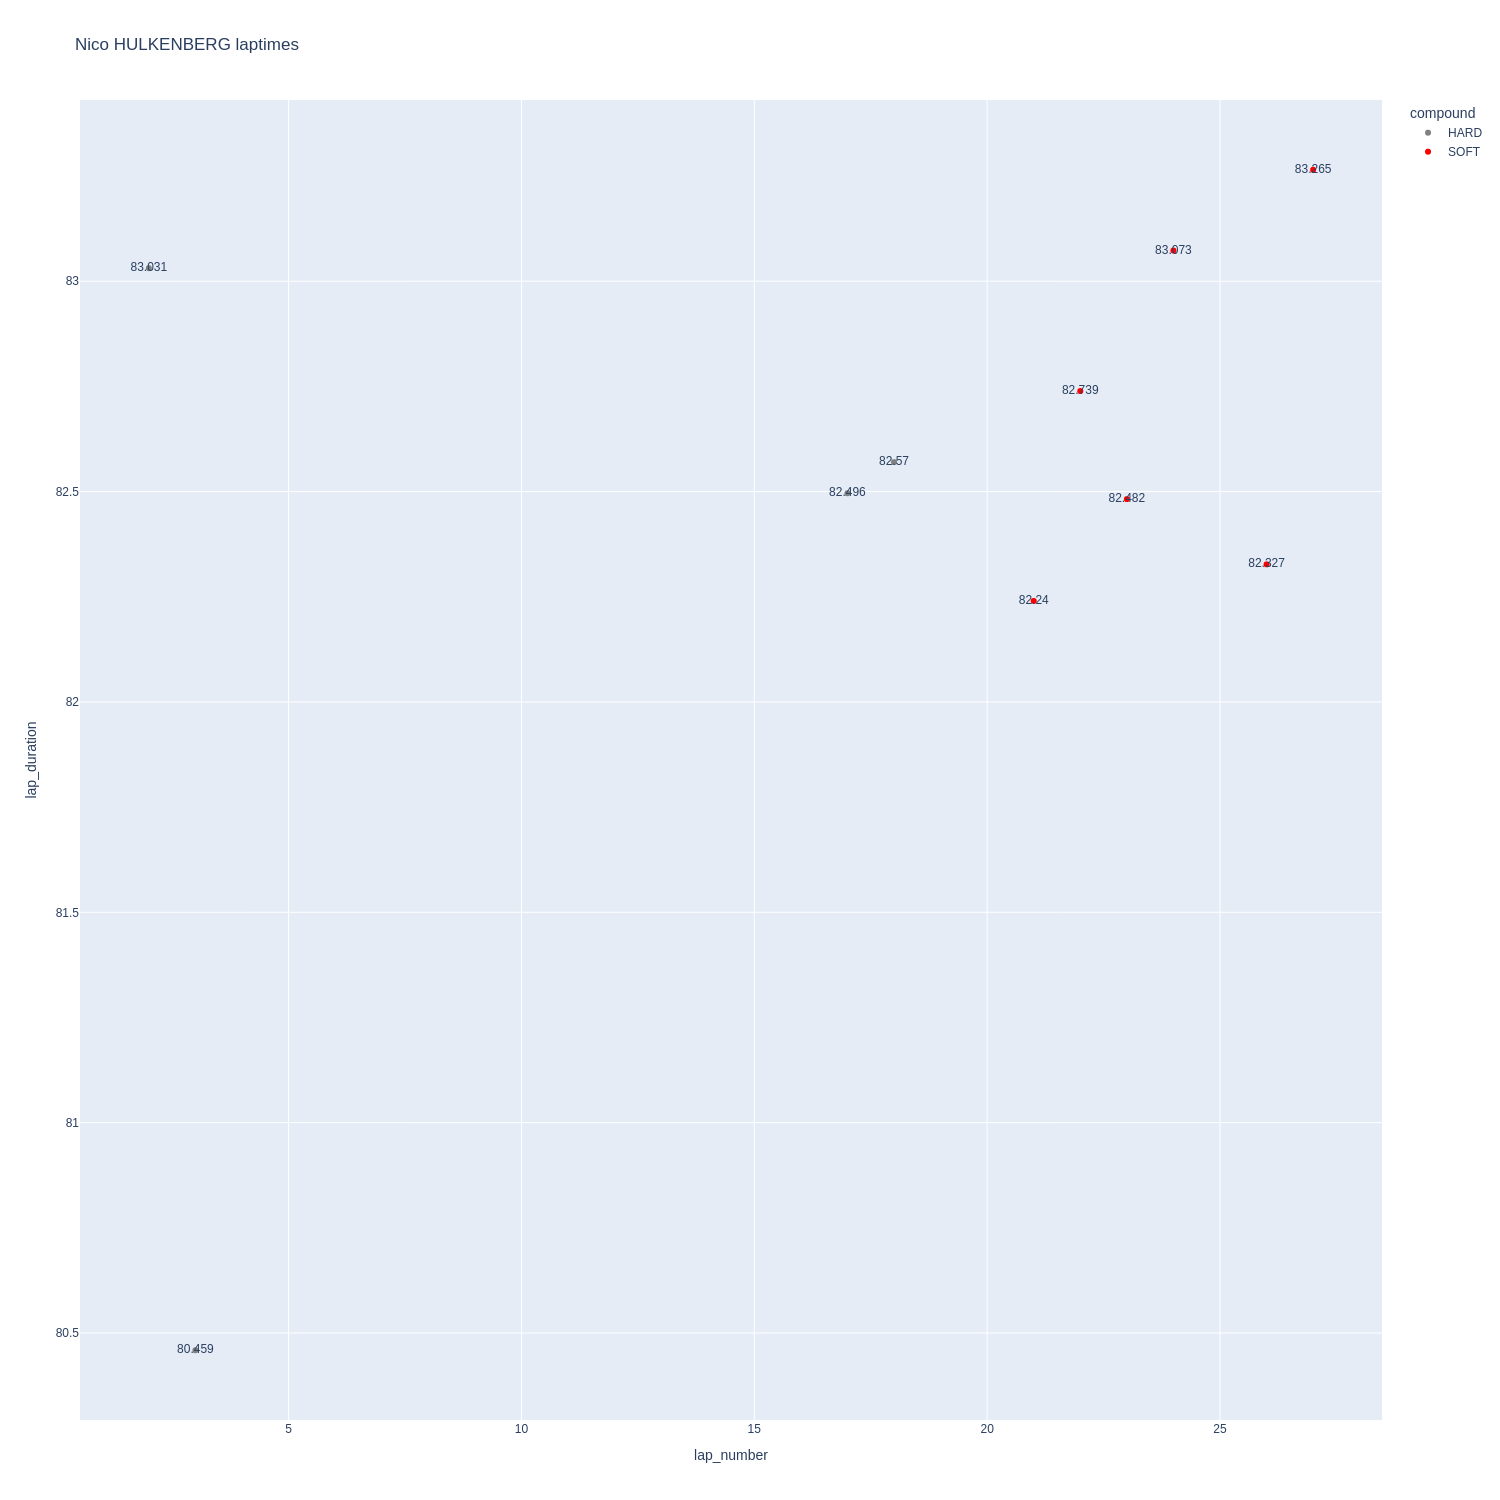

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

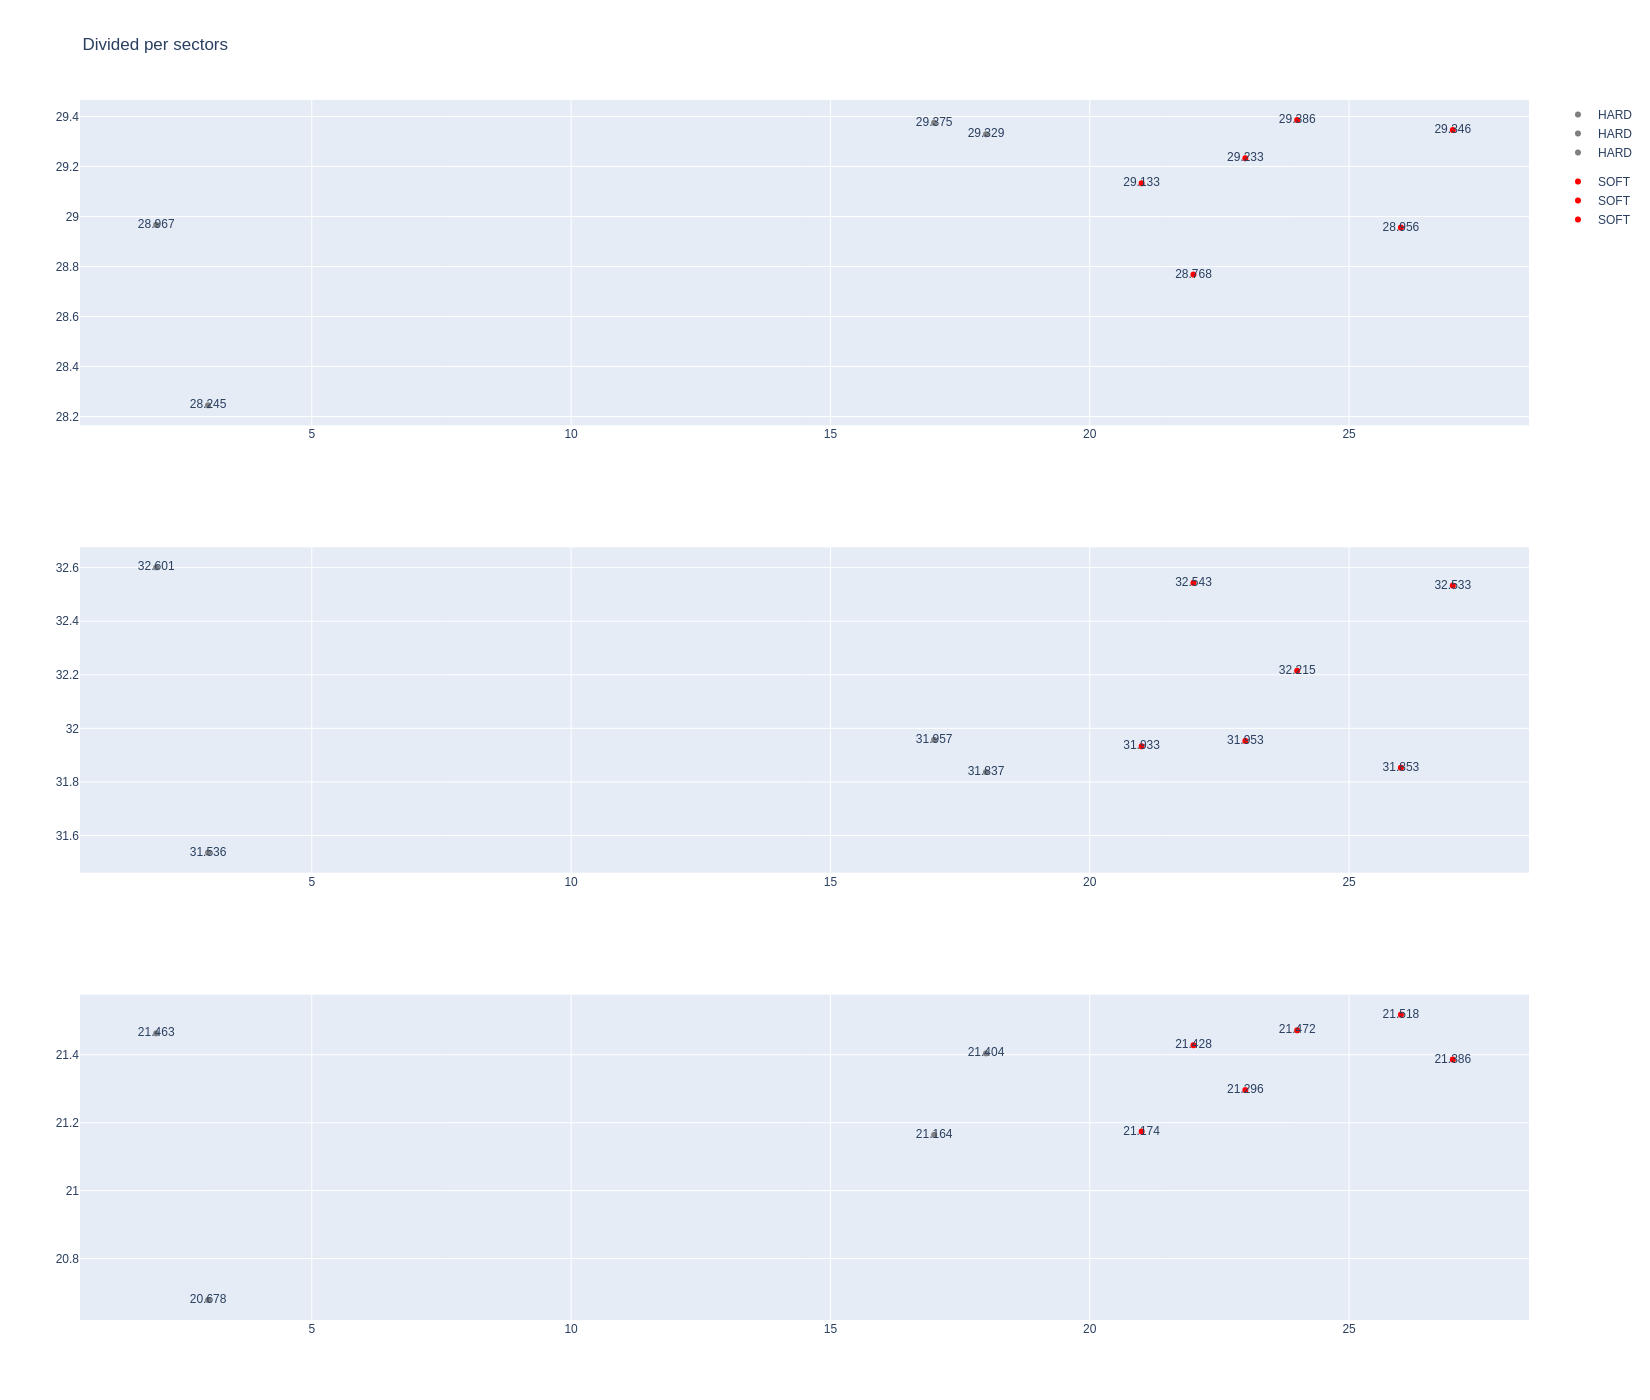

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [84]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
401  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:47:01.689000+00:00          19   
420  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:48:23.986000+00:00          20   
439  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:49:46.096000+00:00          21   
459  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:51:07.949000+00:00          22   
478  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:52:30.247000+00:00          23   
498  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:53:52.956000+00:00          24   
518  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:55:15.706000+00:00          25   
537  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:56:39.441000+00:00          26   
557  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:58:02.248000+00:00          27   
577  Gabriel BORTOLETO   MEDIUM  2025-10-24T22:59:25.326000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
401             29.204             31.879             21.148        82.231  
420             29.291             31.751             21.071        82.113  
439             29.167             31.609             21.122        81.898  
459             29.215             31.794             21.189        82.198  
478             29.243             32.031             21.464        82.738  
498             29.286             31.917             21.620        82.823  
518             29.073             32.521             22.035        83.629  
537             29.191             32.140             21.537        82.868  
557             29.177             32.345             21.537        83.059  
577             29.321             32.367             21.753        83.441

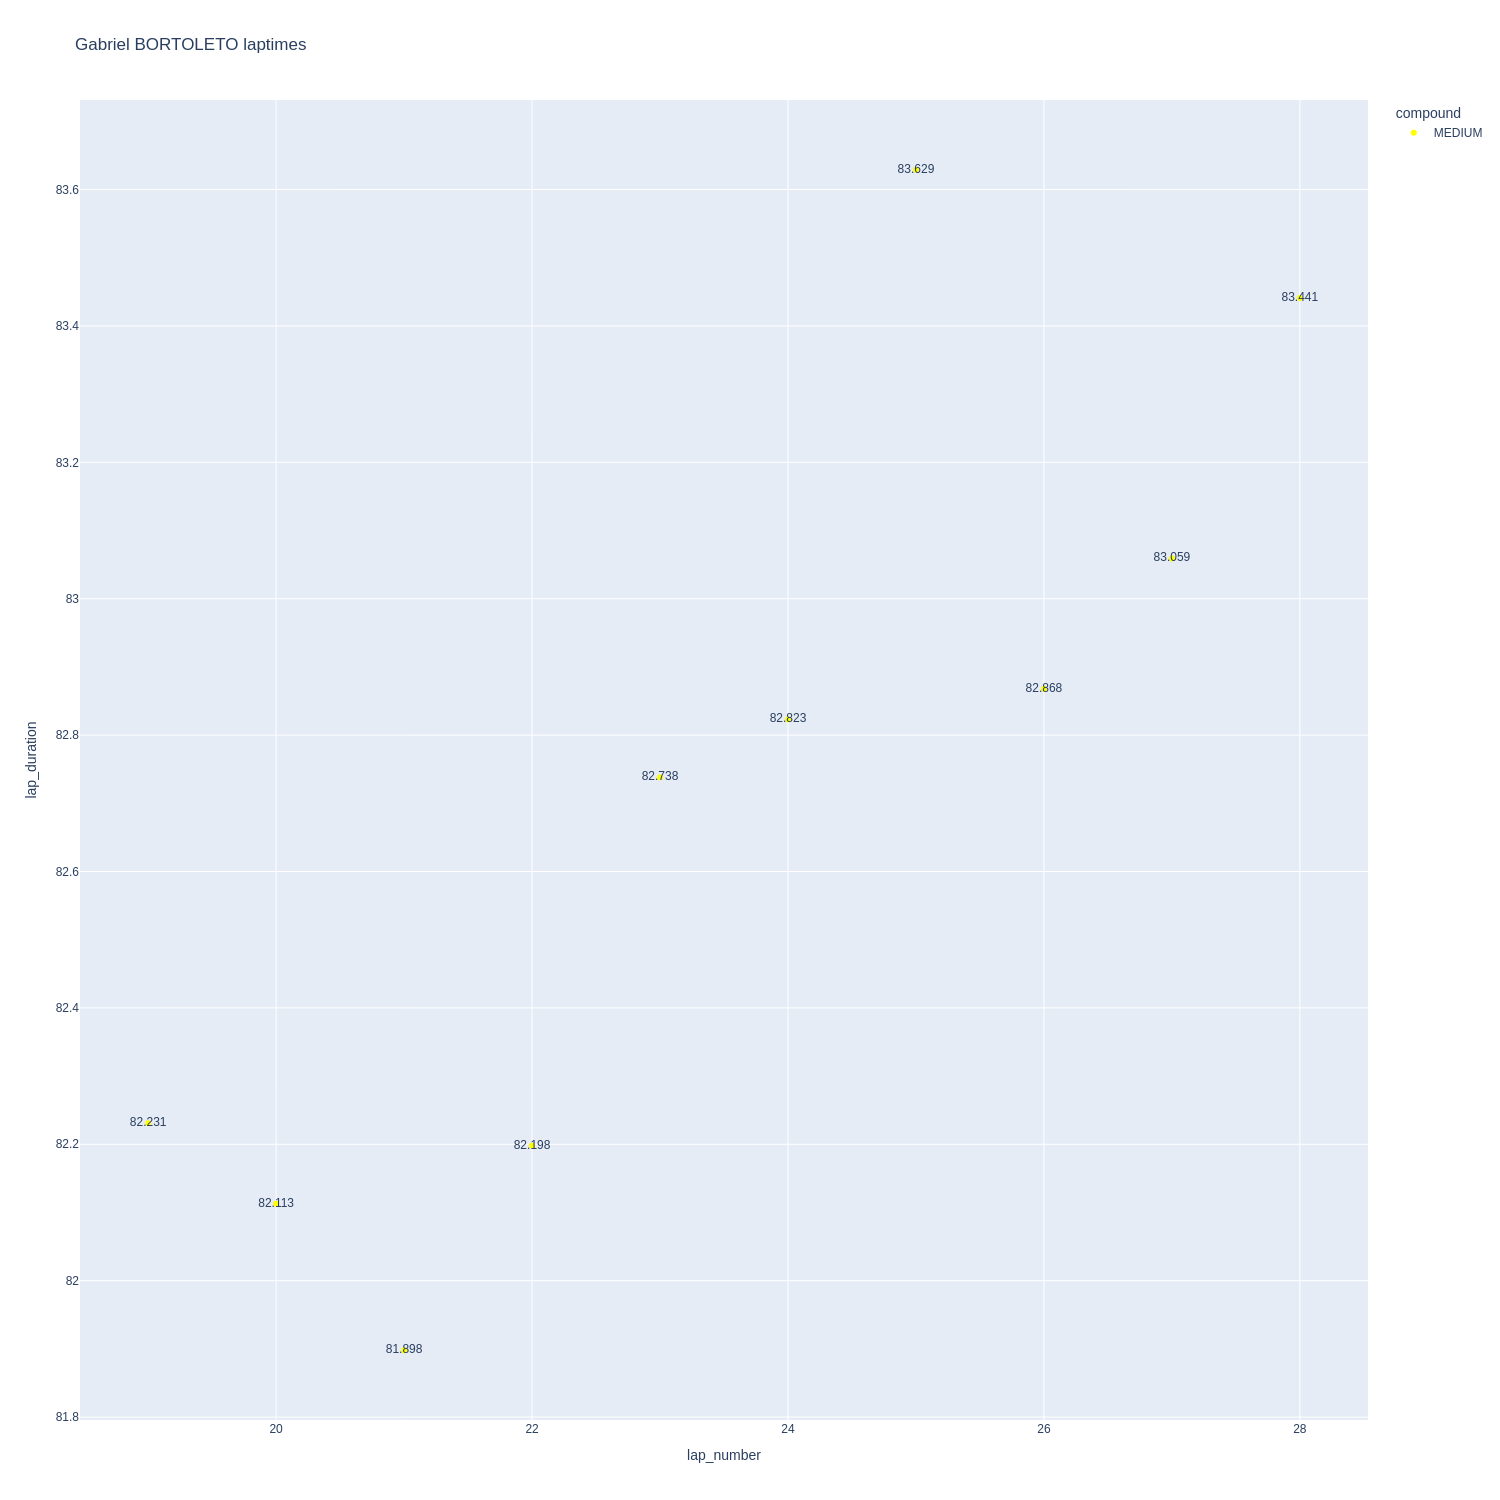

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

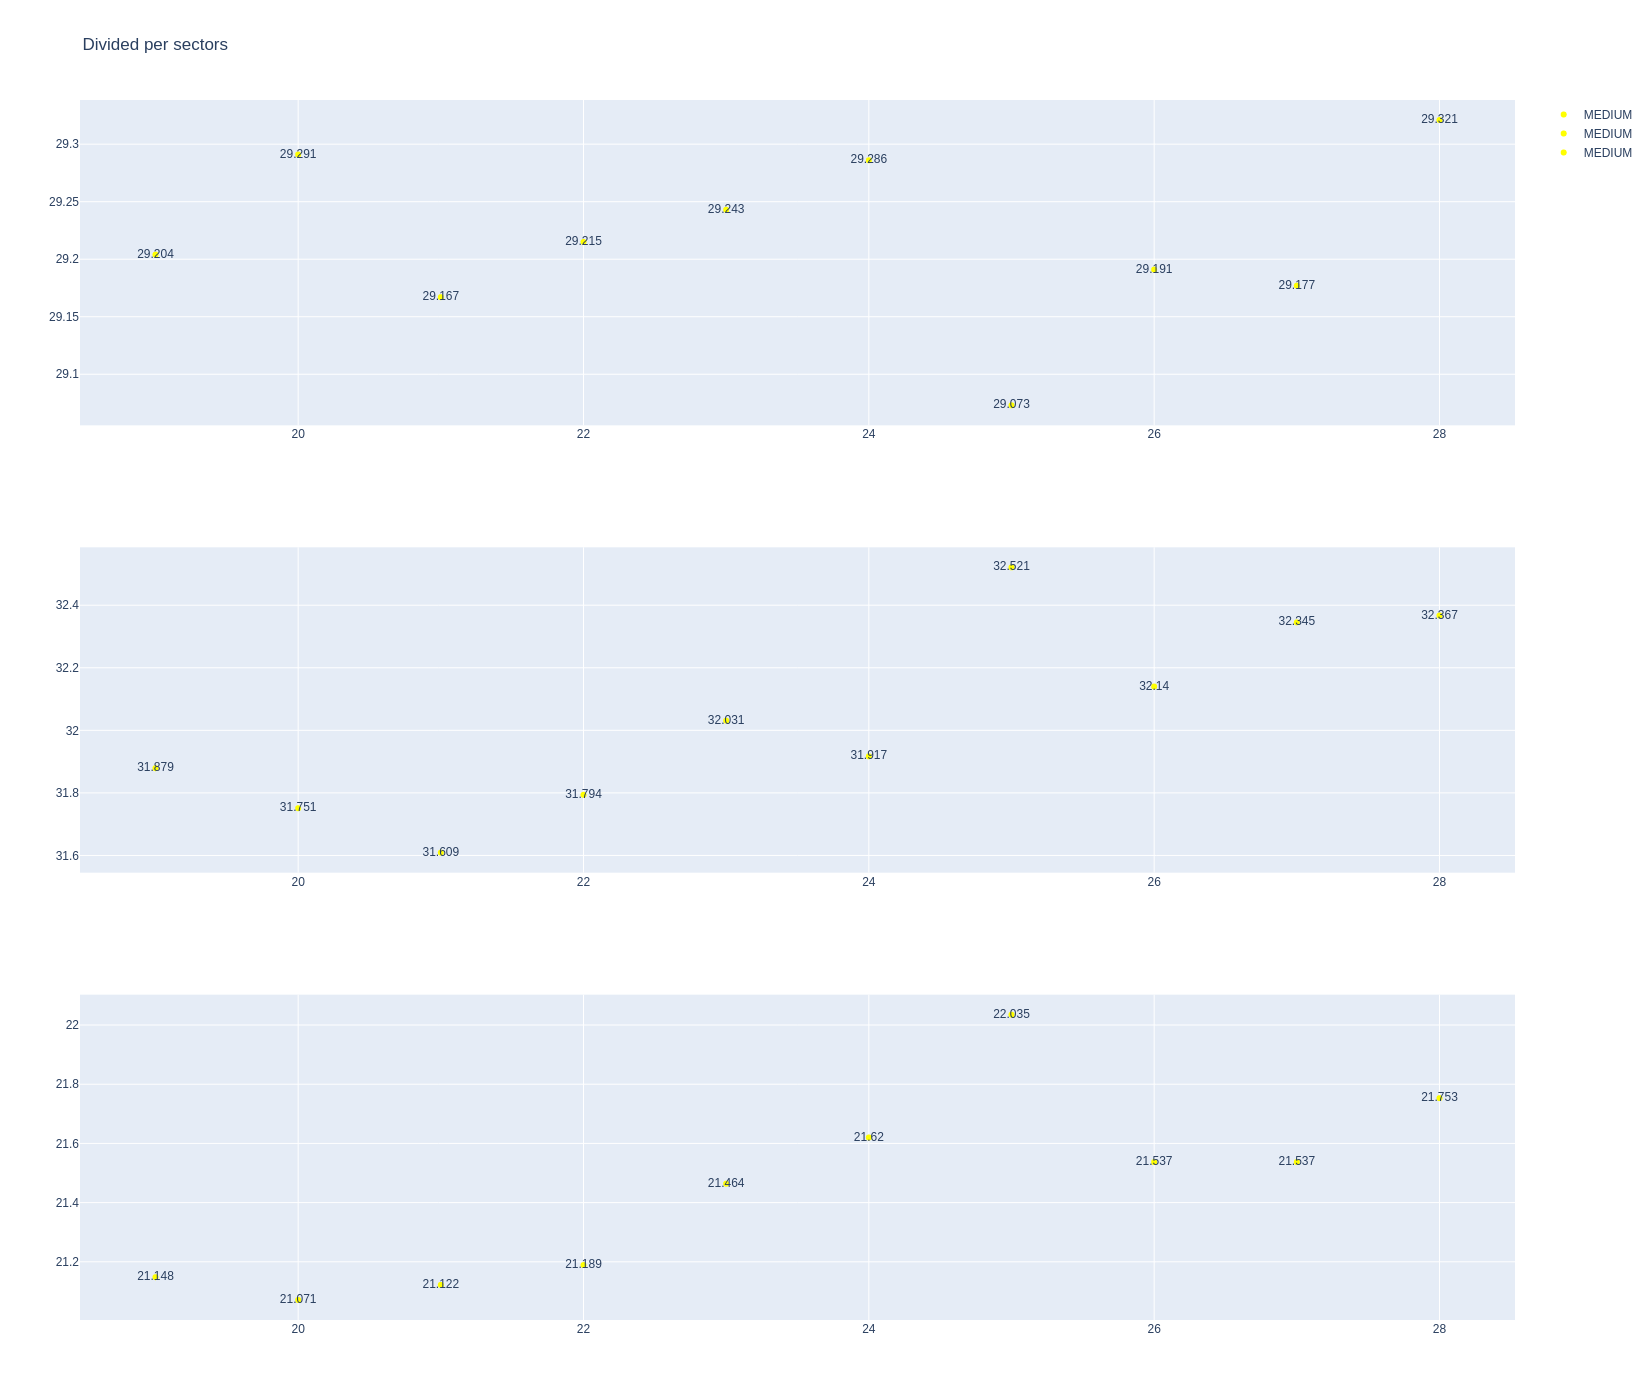

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver
It seems that SOFT could be used for 15-17 laps and it could be a good option to start. HARD is slow but it could be used for a medium stint(2/3) but it seems that MEDIUM is better
Haas, Aston and RB suffer in race pace

In [87]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [88]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [89]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
1        Lando NORRIS     SOFT     81.666273  29.111091  31.507818  21.047364
19     Oliver BEARMAN     SOFT     81.787250  28.747417  31.764083  21.275750
17     George RUSSELL   MEDIUM     81.993300  29.006800  31.792300  21.194200
3        Isack HADJAR     HARD     82.201200  28.951700  32.031800  21.217700
13       Esteban OCON     HARD     82.238091  29.058636  31.924000  21.255455
18      Oscar PIASTRI     SOFT     82.421455  29.174636  31.953273  21.293545
0      Max VERSTAPPEN   MEDIUM     82.451308  29.129769  32.067692  21.253846
11    Nico HULKENBERG     SOFT     82.468200  29.073800  32.096100  21.298300
16       Carlos SAINZ   MEDIUM     82.530000  28.980231  32.176538  21.373231
7     Charles LECLERC   MEDIUM     82.535300  28.940400  31.820200  21.774700
12        Liam LAWSON     SOFT     82.632000  29.171714  32.067571  21.392714
2   Gabriel BORTOLETO   MEDIUM     82.699800  29.216800  32.035400  21.447600
6     Fernando ALONSO   MEDIUM     82.729111  29.313875  32.028000  21.376222
5      Kimi ANTONELLI   MEDIUM     82.738364  29.111727  32.185182  21.441455
8        Lance STROLL     SOFT     82.752444  29.118889  32.184111  21.449444
4        Pierre GASLY   MEDIUM     82.819000  29.072615  32.216462  21.529923
14   Franco COLAPINTO     SOFT     82.825385  28.965077  32.237154  21.623154
15     Lewis HAMILTON   MEDIUM     82.830375  28.860500  31.920125  22.049750
10    Alexander ALBON   MEDIUM     82.931000  29.143500  32.327125  21.460375
9        Yuki TSUNODA   MEDIUM     82.946900  29.237700  32.266300  21.442900

##### Sorted by sector 1

In [90]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
19     Oliver BEARMAN     SOFT  28.747417
15     Lewis HAMILTON   MEDIUM  28.860500
7     Charles LECLERC   MEDIUM  28.940400
3        Isack HADJAR     HARD  28.951700
14   Franco COLAPINTO     SOFT  28.965077
16       Carlos SAINZ   MEDIUM  28.980231
17     George RUSSELL   MEDIUM  29.006800
13       Esteban OCON     HARD  29.058636
4        Pierre GASLY   MEDIUM  29.072615
11    Nico HULKENBERG     SOFT  29.073800
1        Lando NORRIS     SOFT  29.111091
5      Kimi ANTONELLI   MEDIUM  29.111727
8        Lance STROLL     SOFT  29.118889
0      Max VERSTAPPEN   MEDIUM  29.129769
10    Alexander ALBON   MEDIUM  29.143500
12        Liam LAWSON     SOFT  29.171714
18      Oscar PIASTRI     SOFT  29.174636
2   Gabriel BORTOLETO   MEDIUM  29.216800
9        Yuki TSUNODA   MEDIUM  29.237700
6     Fernando ALONSO   MEDIUM  29.313875

##### Sorted by sector 2

In [91]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
1        Lando NORRIS     SOFT  31.507818
19     Oliver BEARMAN     SOFT  31.764083
17     George RUSSELL   MEDIUM  31.792300
7     Charles LECLERC   MEDIUM  31.820200
15     Lewis HAMILTON   MEDIUM  31.920125
13       Esteban OCON     HARD  31.924000
18      Oscar PIASTRI     SOFT  31.953273
6     Fernando ALONSO   MEDIUM  32.028000
3        Isack HADJAR     HARD  32.031800
2   Gabriel BORTOLETO   MEDIUM  32.035400
12        Liam LAWSON     SOFT  32.067571
0      Max VERSTAPPEN   MEDIUM  32.067692
11    Nico HULKENBERG     SOFT  32.096100
16       Carlos SAINZ   MEDIUM  32.176538
8        Lance STROLL     SOFT  32.184111
5      Kimi ANTONELLI   MEDIUM  32.185182
4        Pierre GASLY   MEDIUM  32.216462
14   Franco COLAPINTO     SOFT  32.237154
9        Yuki TSUNODA   MEDIUM  32.266300
10    Alexander ALBON   MEDIUM  32.327125

##### Sorted by sector 3

In [92]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
1        Lando NORRIS     SOFT  21.047364
17     George RUSSELL   MEDIUM  21.194200
3        Isack HADJAR     HARD  21.217700
0      Max VERSTAPPEN   MEDIUM  21.253846
13       Esteban OCON     HARD  21.255455
19     Oliver BEARMAN     SOFT  21.275750
18      Oscar PIASTRI     SOFT  21.293545
11    Nico HULKENBERG     SOFT  21.298300
16       Carlos SAINZ   MEDIUM  21.373231
6     Fernando ALONSO   MEDIUM  21.376222
12        Liam LAWSON     SOFT  21.392714
5      Kimi ANTONELLI   MEDIUM  21.441455
9        Yuki TSUNODA   MEDIUM  21.442900
2   Gabriel BORTOLETO   MEDIUM  21.447600
8        Lance STROLL     SOFT  21.449444
10    Alexander ALBON   MEDIUM  21.460375
4        Pierre GASLY   MEDIUM  21.529923
14   Franco COLAPINTO     SOFT  21.623154
7     Charles LECLERC   MEDIUM  21.774700
15     Lewis HAMILTON   MEDIUM  22.049750

#### Long runs mean

In [93]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [94]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
17     G RUSSELL         82.133
16       C SAINZ         82.530
7      C LECLERC         82.535
15    L HAMILTON         82.670
2    G BORTOLETO         82.700
6       F ALONSO         82.729
5    K ANTONELLI         82.738
4        P GASLY         82.819
0   M VERSTAPPEN         82.821
9      Y TSUNODA         82.947
10       A ALBON         83.149

In [95]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
1       L NORRIS         81.806
19     O BEARMAN         82.277
18     O PIASTRI         82.475
11  N HULKENBERG         82.688
8       L STROLL         82.752
14   F COLAPINTO         82.834
12      L LAWSON         83.175

In [96]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
3   I HADJAR         82.154
13    E OCON         82.238

## Free Practice 3
### Obtain setup

In [98]:
practice = libraryDataF1.obtain_information('laps',session_key=9872)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9872)
drivers = libraryDataF1.obtain_information('drivers',session_key=9872)

In [99]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [100]:
session = ff1.get_session(2025, 20, 'FP3')
session.load();

req         WARNING 	DEFAULT CACHE ENABLED! (5.21 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Mexico City Grand Prix - Practice 3 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track stat

### Speed trap

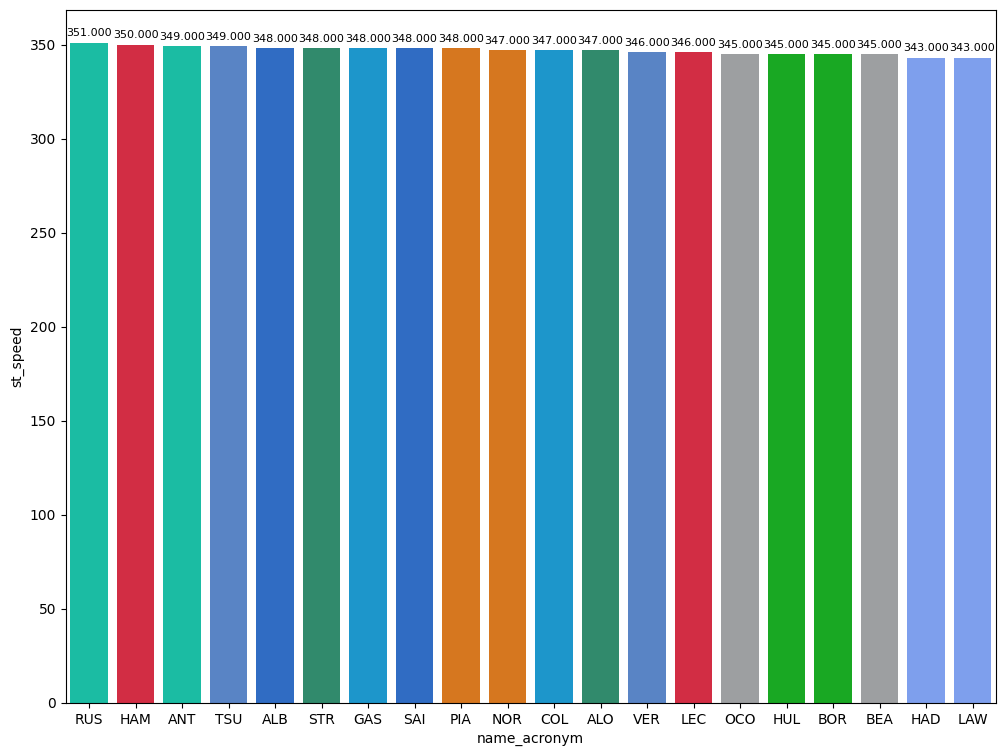

In [101]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

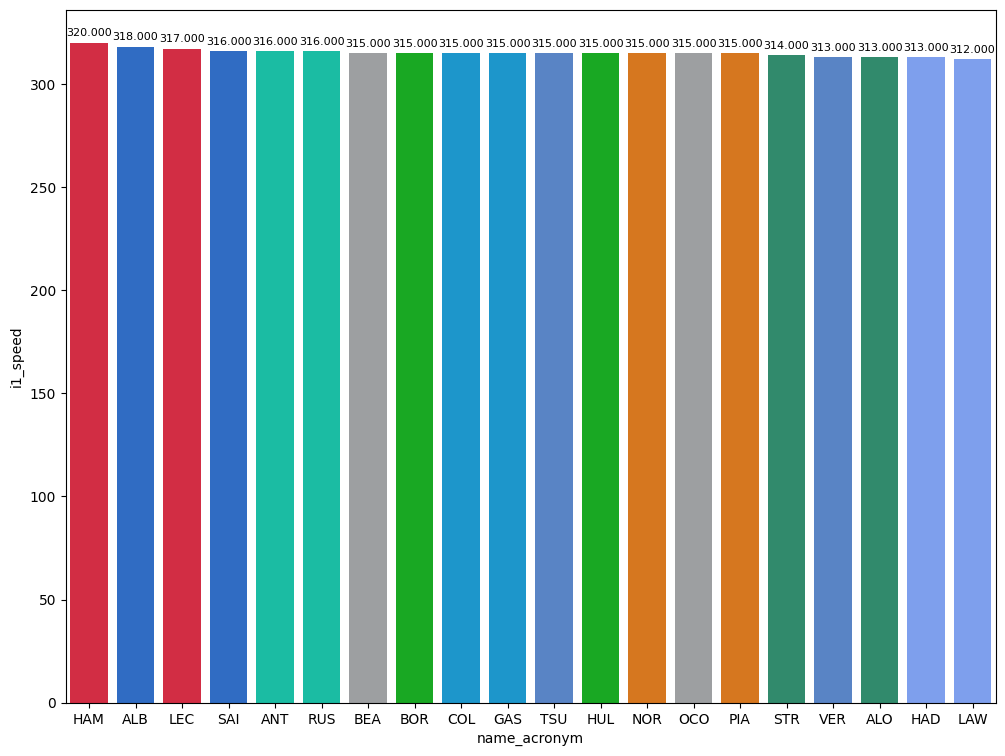

In [102]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

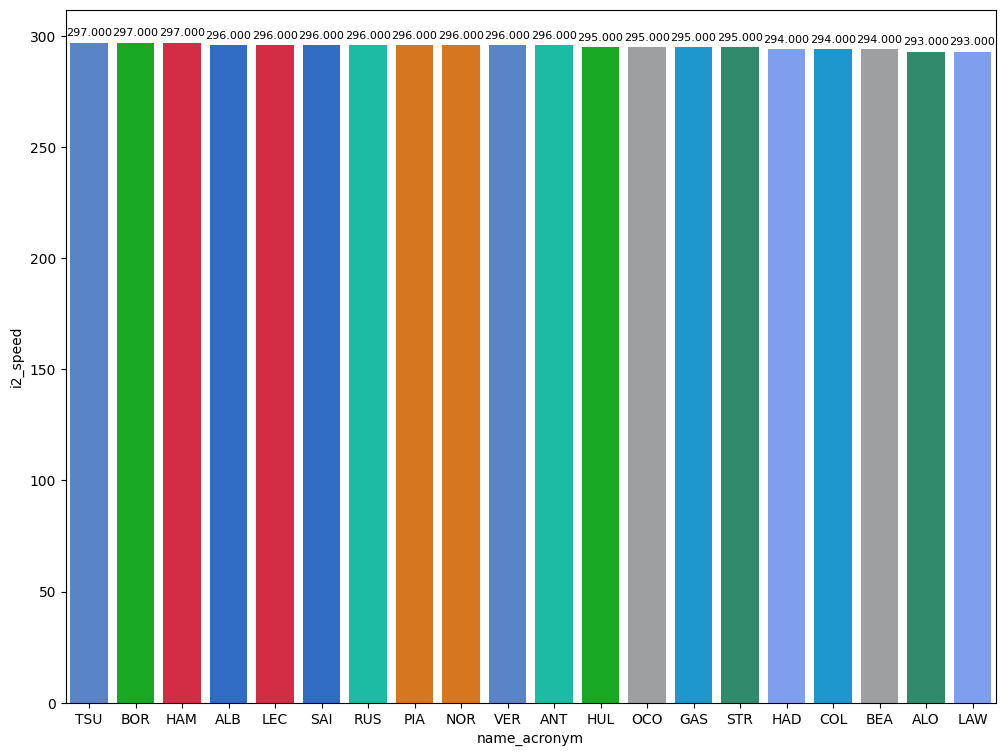

In [103]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [104]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin().dropna()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
247  George RUSSELL   MEDIUM             27.633             30.049   
328    Lando NORRIS     SOFT             27.269             29.507   

     duration_sector_3  lap_duration  
247             20.210        77.892  
328             19.857        76.633

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [105]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


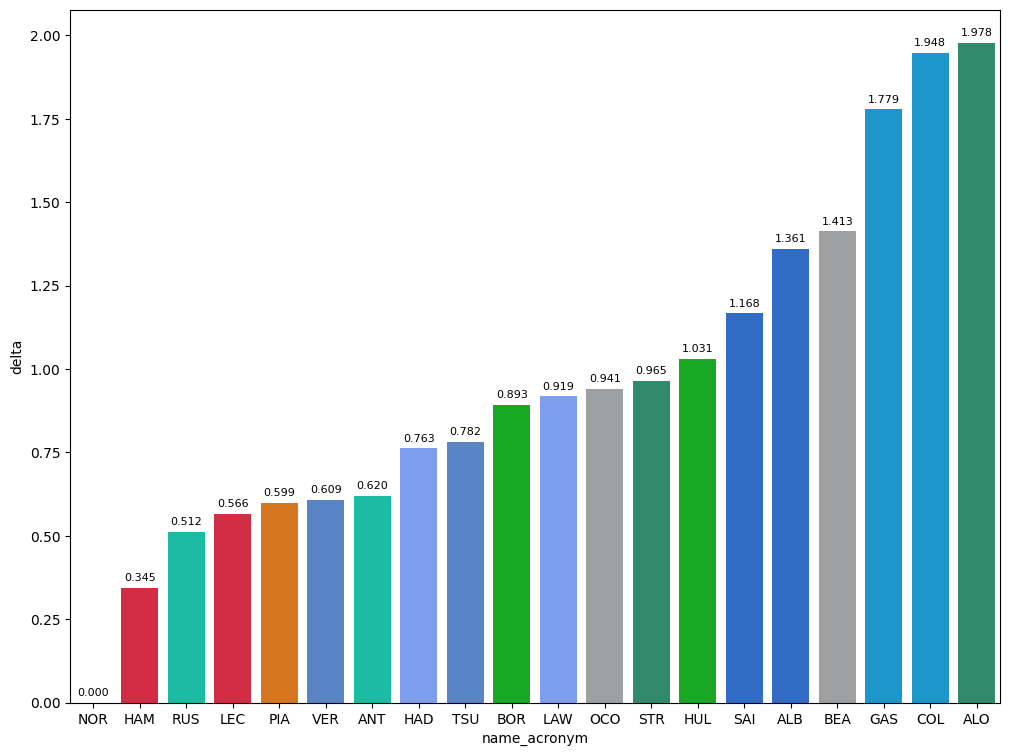

In [106]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

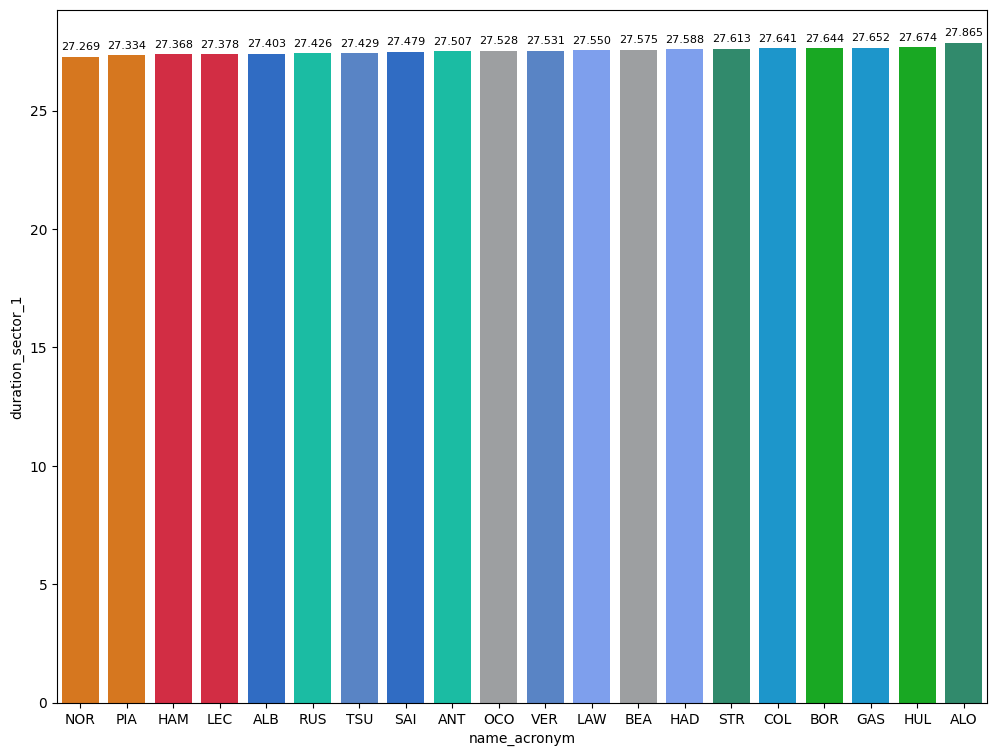

In [107]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

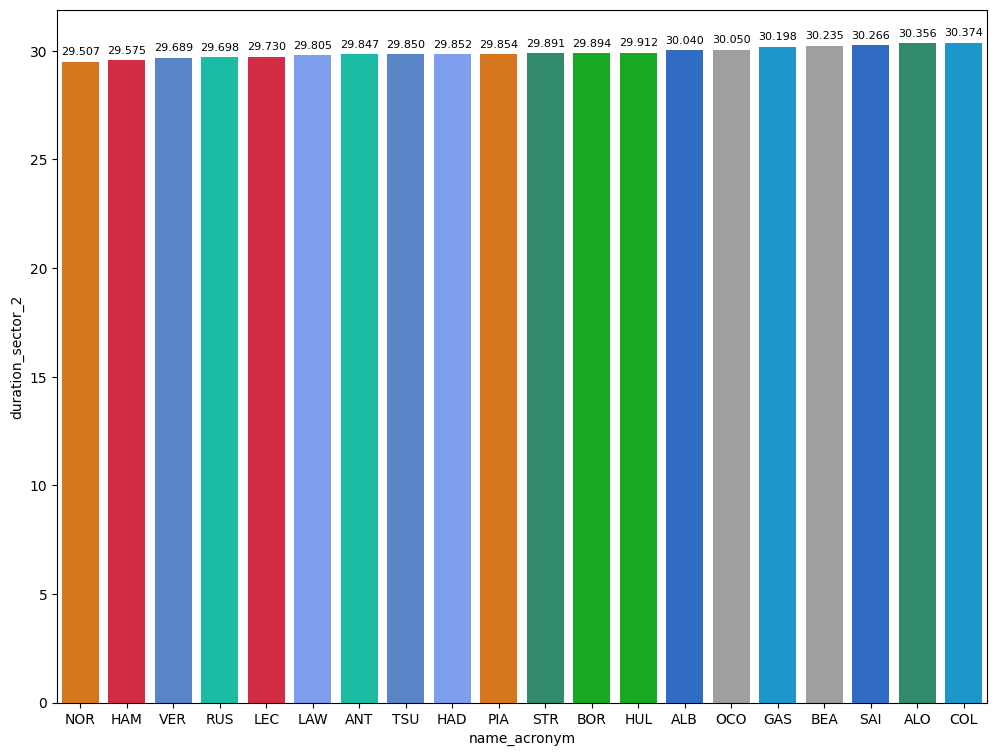

In [108]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

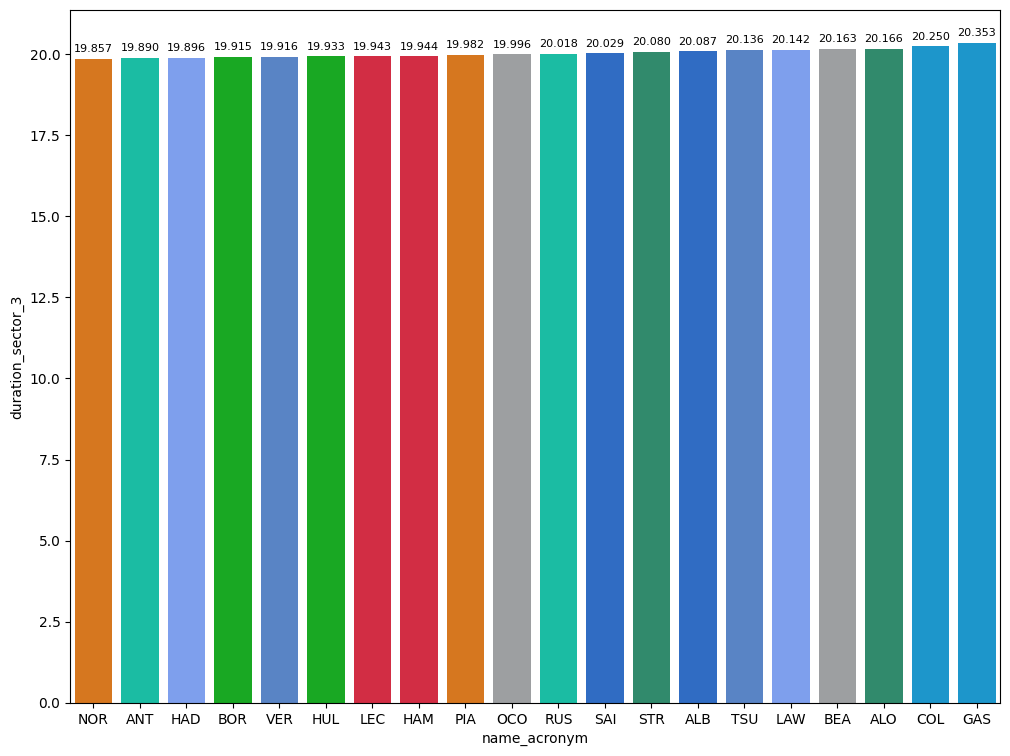

In [109]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [110]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <81 and lap_duration > 79").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         79.882167
MEDIUM       79.974545

### Comparaison between the poleman and the second

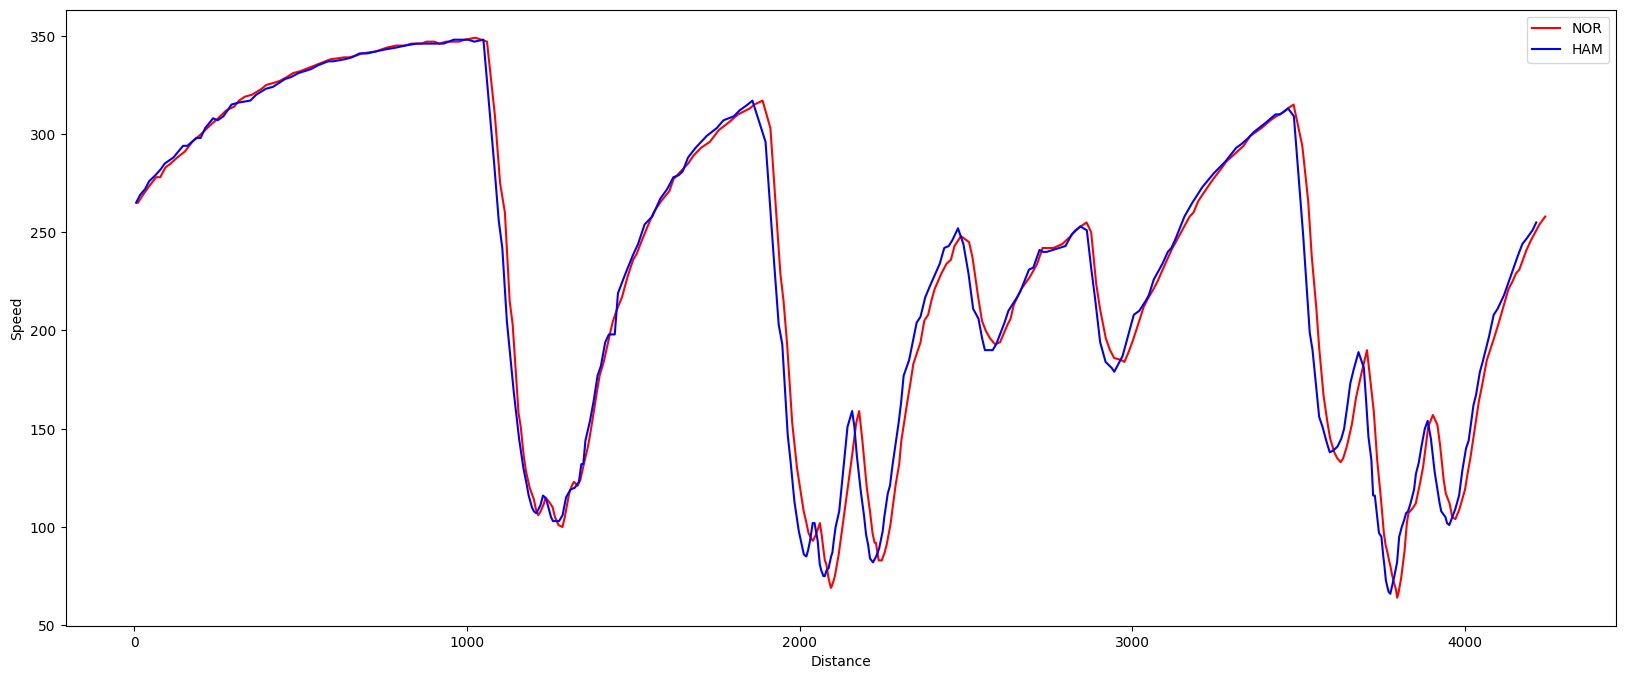

In [113]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

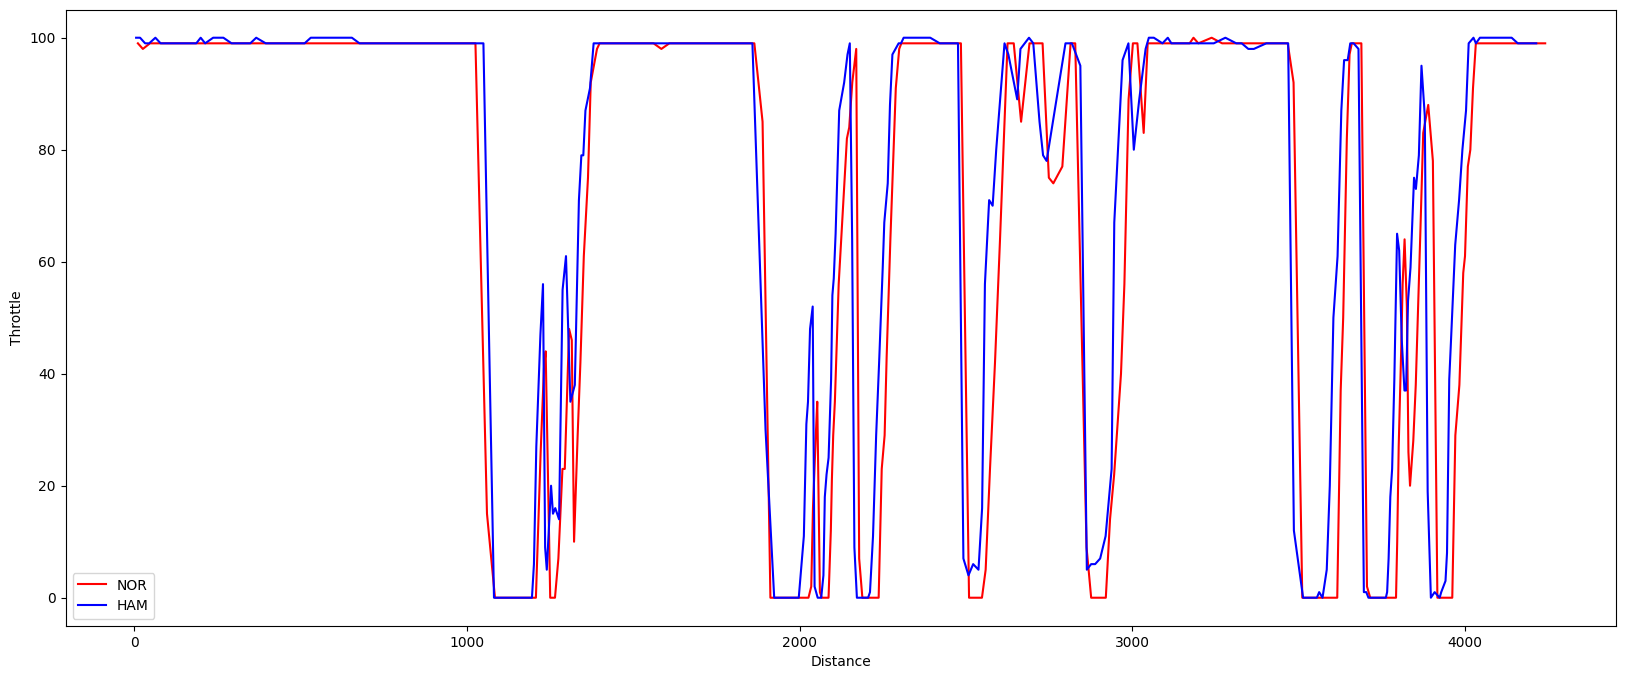

In [114]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

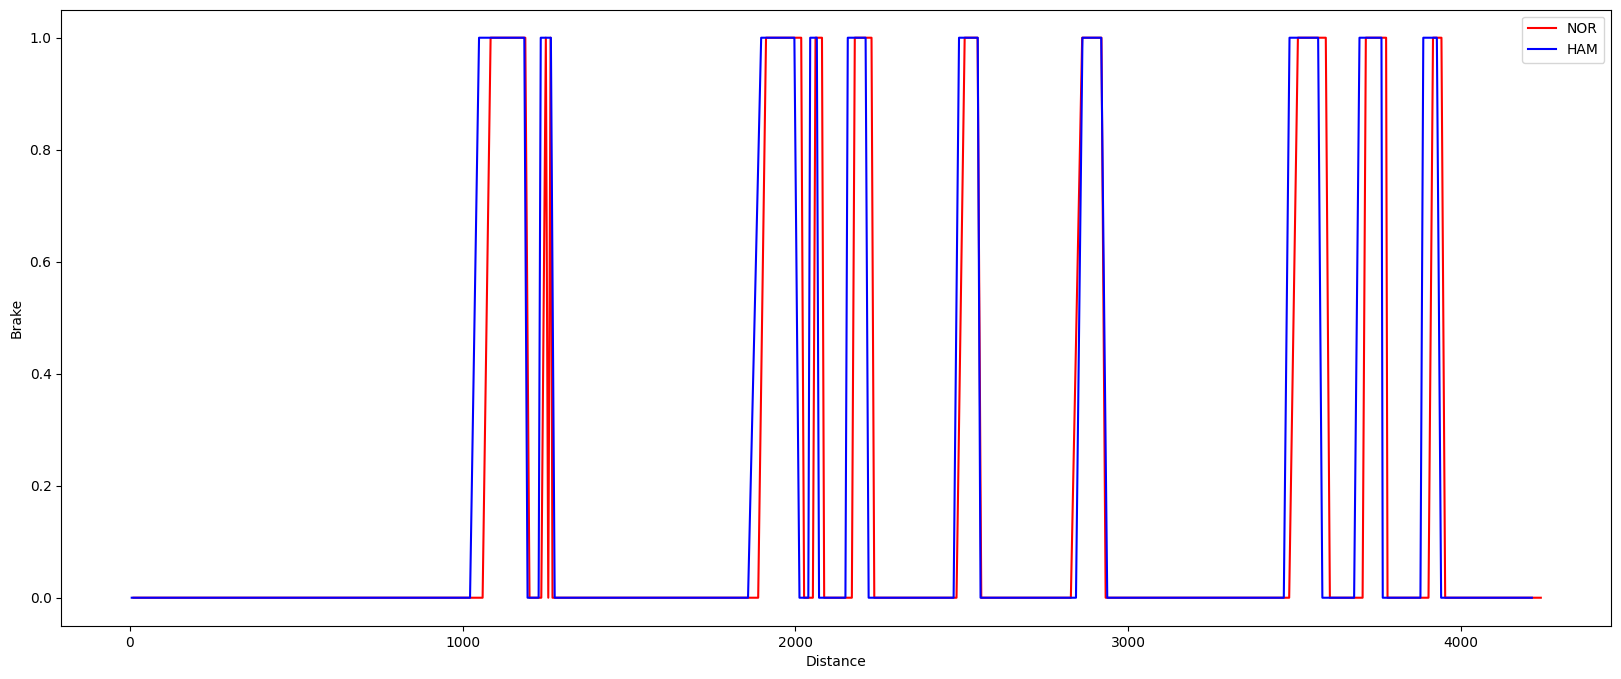

In [115]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

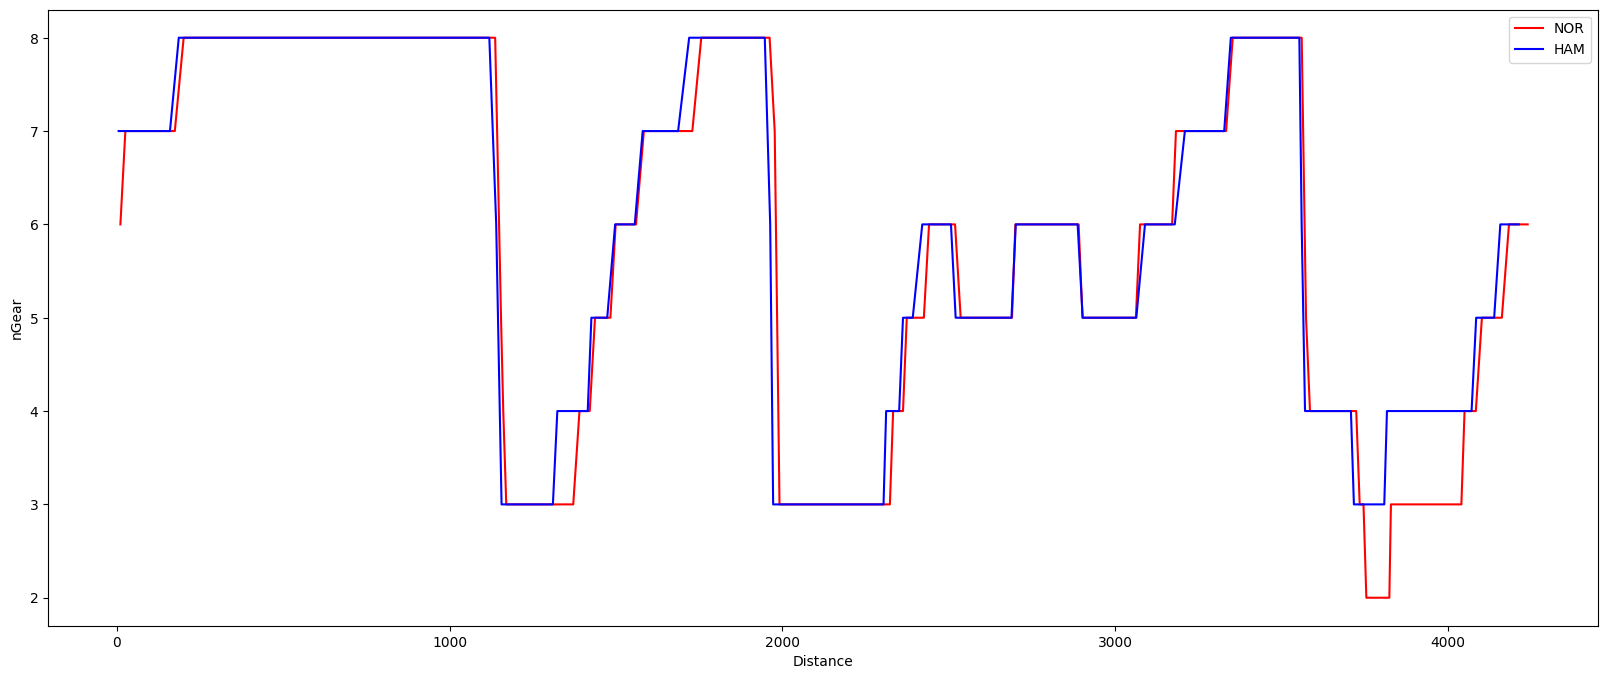

In [116]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [111]:
libraryDataF1.obtain_information('race_control',session_key=9873)

meeting_key  session_key                       date driver_number  \
0          1272         9873  2025-10-25T21:00:00+00:00          None   
1          1272         9873  2025-10-25T21:03:58+00:00          None   
2          1272         9873  2025-10-25T21:18:00+00:00          None   
3          1272         9873  2025-10-25T21:18:09+00:00          None   
4          1272         9873  2025-10-25T21:18:46+00:00          None   
5          1272         9873  2025-10-25T21:20:56+00:00          None   
6          1272         9873  2025-10-25T21:21:02+00:00          None   
7          1272         9873  2025-10-25T21:25:00+00:00          None   
8          1272         9873  2025-10-25T21:40:00+00:00          None   
9          1272         9873  2025-10-25T21:40:13+00:00          None   
10         1272         9873  2025-10-25T21:48:00+00:00          None   
11         1272         9873  2025-10-25T22:00:00+00:00          None   
12         1272         9873  2025-10-25T22:00:10+00:00          None   
13         1272         9873  2025-10-25T22:02:49+00:00          None   

   lap_number category       flag  scope sector  \
0        None     Flag      GREEN  Track   None   
1        None    Other       None   None   None   
2        None     Flag  CHEQUERED  Track   None   
3        None    Other       None   None   None   
4        None    Other       None   None   None   
5        None    Other       None   None   None   
6        None    Other       None   None   None   
7        None     Flag      GREEN  Track   None   
8        None     Flag  CHEQUERED  Track   None   
9        None    Other       None   None   None   
10       None     Flag      GREEN  Track   None   
11       None     Flag  CHEQUERED  Track   None   
12       None    Other       None   None   None   
13       None    Other       None   None   None   

                                              message  
0                         GREEN LIGHT - PIT EXIT OPEN  
1   CAR 5 (BOR) TIME 1:18.964 DELETED - TRACK LIMI...  
2                                      CHEQUERED FLAG  
3           FIRST CAR TO TAKE THE FLAG - CAR 63 (RUS)  
4   CAR 43 (COL) LAP DELETED - TRACK LIMITS AT TUR...  
5   FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 81 (P...  
6   FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 81 (P...  
7                         GREEN LIGHT - PIT EXIT OPEN  
8                                      CHEQUERED FLAG  
9           FIRST CAR TO TAKE THE FLAG - CAR 81 (PIA)  
10                        GREEN LIGHT - PIT EXIT OPEN  
11                                     CHEQUERED FLAG  
12           FIRST CAR TO TAKE THE FLAG - CAR 6 (HAD)  
13  FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 81 (P...

### Obtain setup

In [112]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9873)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9873)
drivers = libraryDataF1.obtain_information('drivers',session_key=9873)


In [117]:
session = ff1.get_session(2025,20, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            I

In [ ]:
# laptimes_deleted = [77.631,77.631,76.638]
# driver_number_lap_deleted = [81,16,1]

# for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
#     try:
#         id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
#         qualyfing = qualyfing.drop(id_deleted)
#     except:
#         print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [121]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

In this case, the fastest lap is 75.586 seconds (1.15.586= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 80.87 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [122]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 80.87")

In [123]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

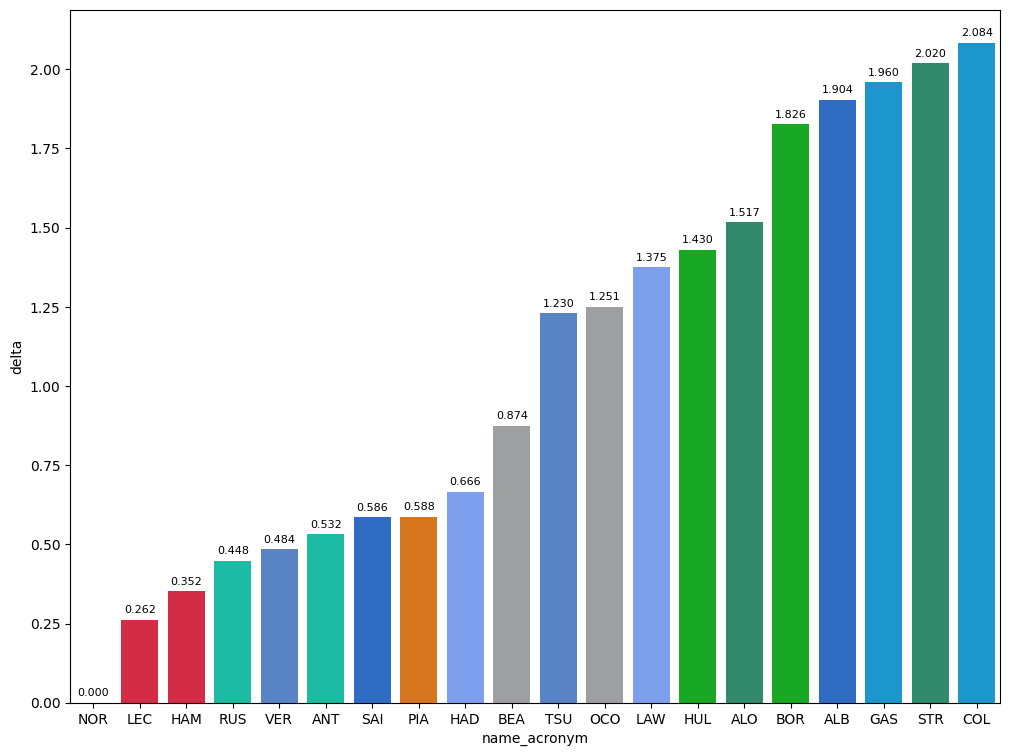

In [124]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

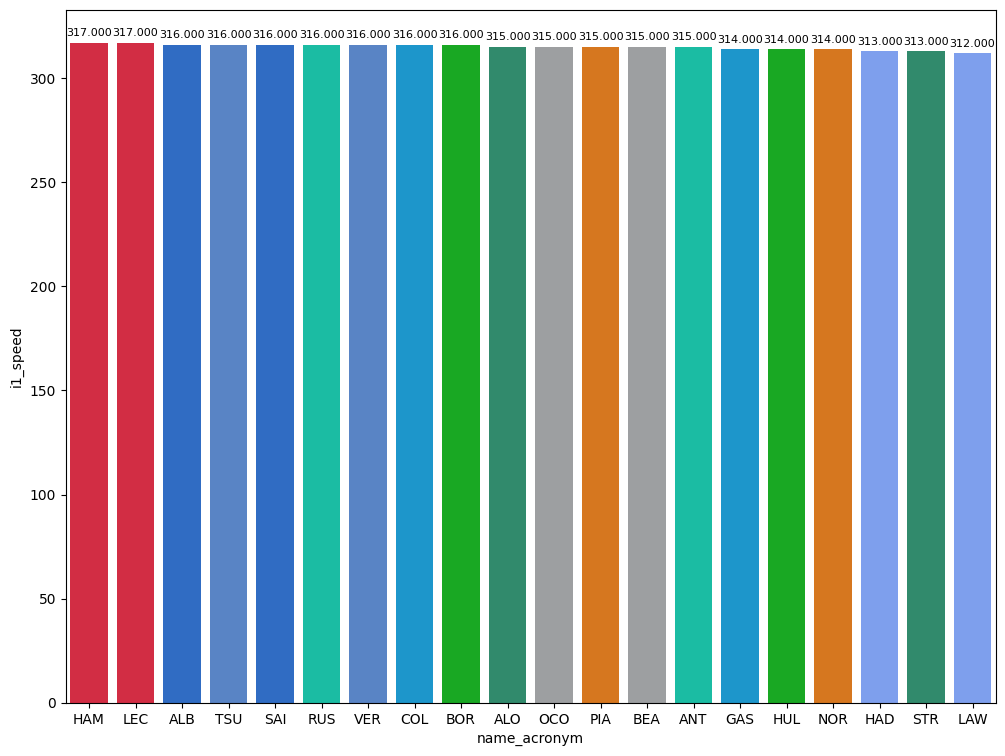

In [125]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

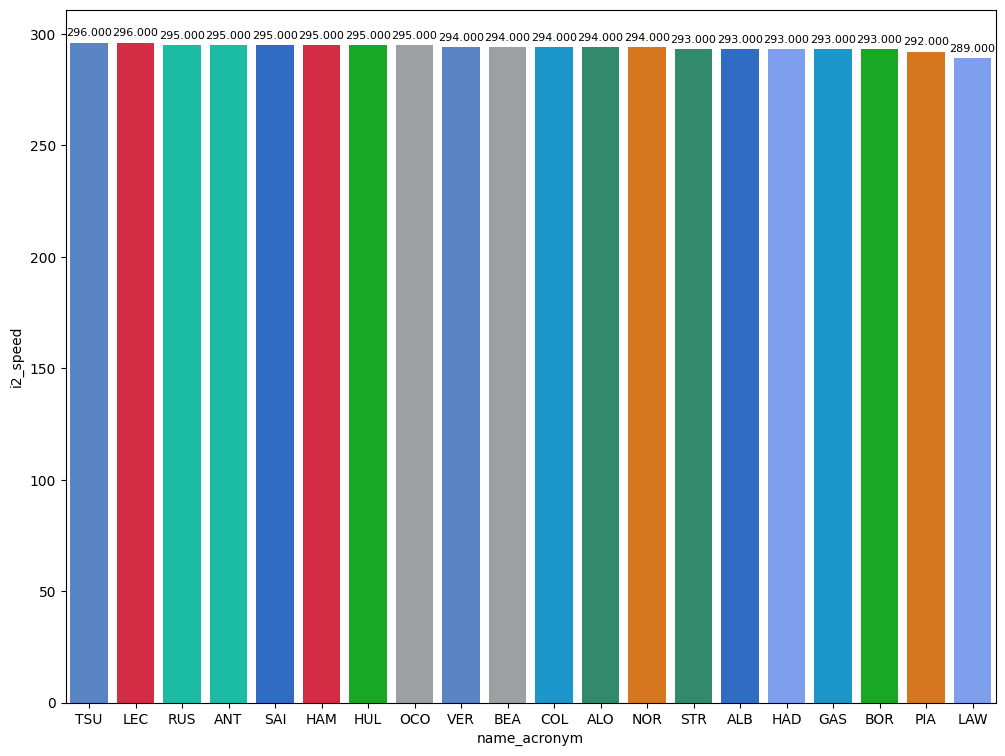

In [126]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

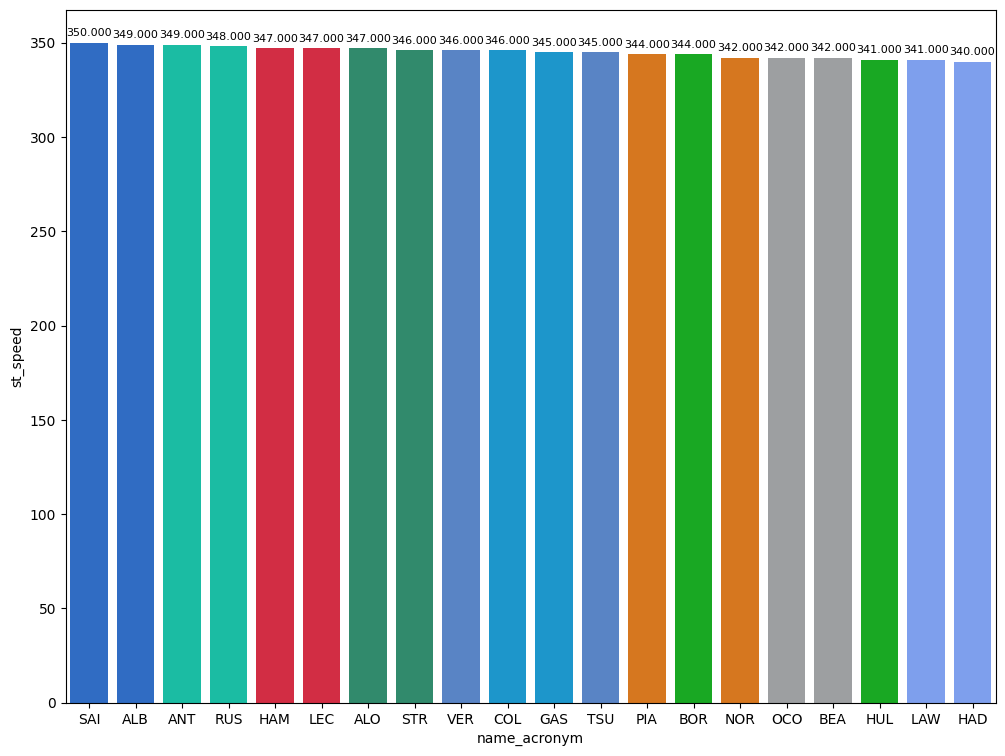

In [127]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

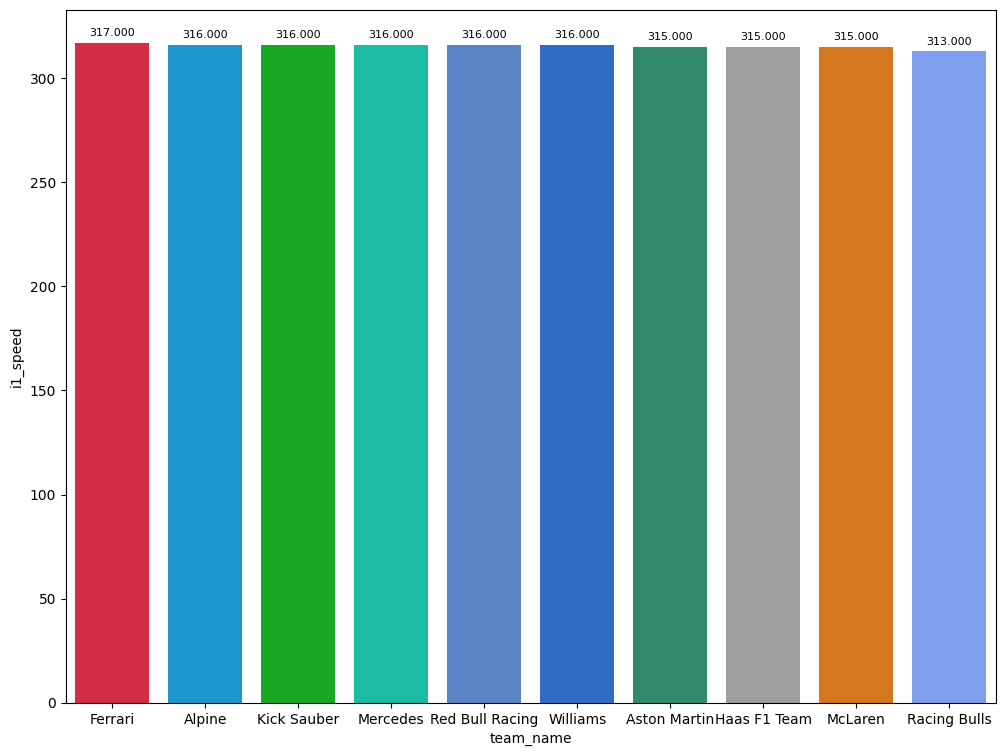

In [128]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

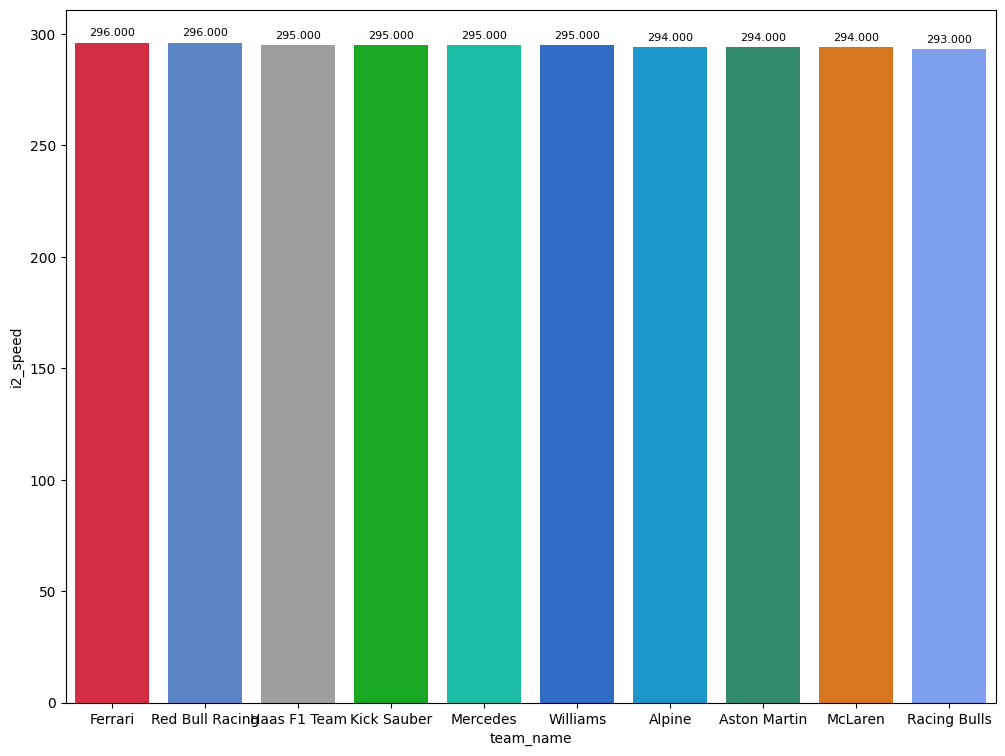

In [129]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

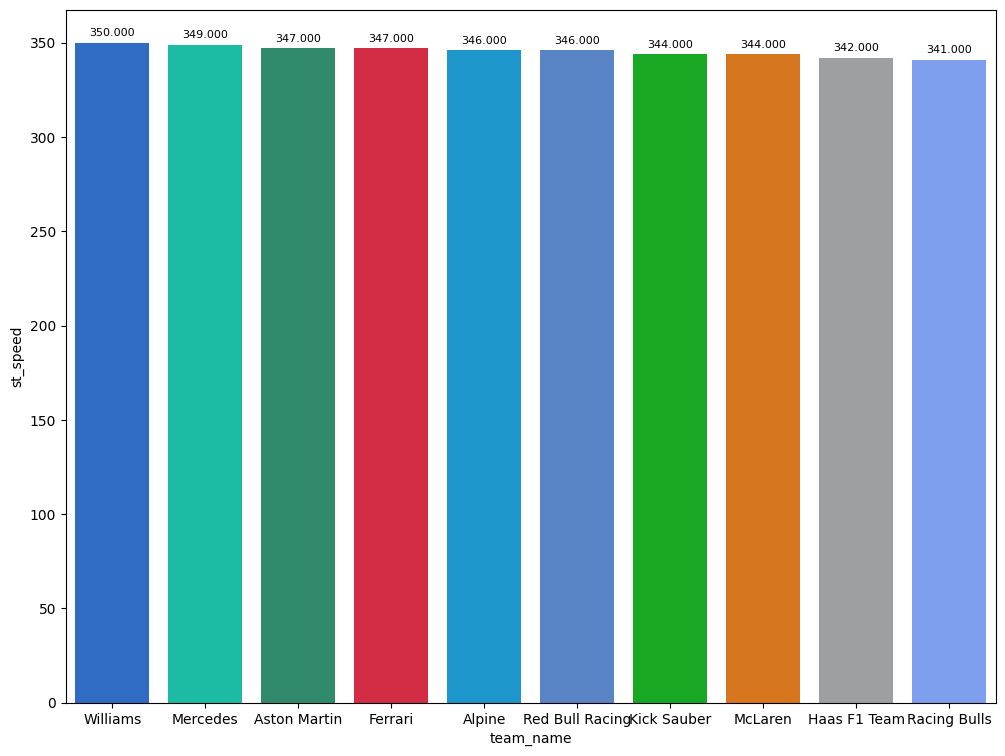

In [130]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [133]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [134]:
maximumDateQ1 = "date_start <'2025-10-25T21:25:00+00:00'"
maximumDateQ2 = "date_start <'2025-10-25T21:48:00+00:00' and date_start >'2025-10-25T21:25:00+00:00'"
maximumDateQ3 = "date_start >'2025-10-25T21:48:00+00:00'"

### Qualyfing 1

In [135]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [136]:
#Reference
P15 = q1Data[14:15]

In [137]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Kimi ANTONELLI Sector 1:  27.331 Sector 2:  29.969 Sector 3:  19.991


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [139]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              5         0.121                0.180               -0.044   
1             23         0.199                0.025                0.057   
2             10         0.255                0.130                0.072   
3             18         0.315                0.317               -0.072   
4             43         0.379                0.164                0.046   

   difference_sector_3 name_acronym  
0               -0.015          BOR  
1                0.117          ALB  
2                0.053          GAS  
3                0.070          STR  
4                0.169          COL

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

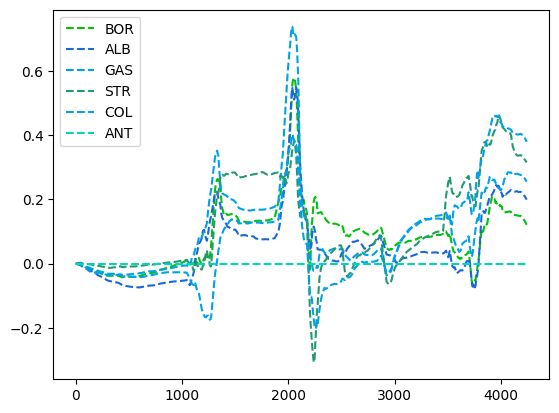

In [140]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [141]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0               6        -0.558                0.137               -0.420   
1              44        -0.555               -0.065               -0.371   
2              63        -0.396                0.006               -0.284   
3               4        -0.392                0.008               -0.302   
4              31        -0.343                0.097               -0.277   
5              30        -0.330                0.210               -0.405   
6              16        -0.267               -0.094               -0.223   
7              87        -0.251                0.088               -0.238   
8               1        -0.215               -0.053               -0.062   
9              81        -0.133                0.079               -0.206   
10             55        -0.120                0.000               -0.066   
11             14        -0.059                0.226               -0.191   
12             22        -0.057                0.064               -0.222   
13             27        -0.040                0.099               -0.181   

    difference_sector_3 name_acronym  
0                -0.275          HAD  
1                -0.119          HAM  
2                -0.118          RUS  
3                -0.098          NOR  
4                -0.163          OCO  
5                -0.135          LAW  
6                 0.050          LEC  
7                -0.101          BEA  
8                -0.100          VER  
9                -0.006          PIA  
10               -0.054          SAI  
11               -0.094          ALO  
12                0.101          TSU  
13                0.042          HUL

#### Best sector per driver
In this section we can see the best sector of the session

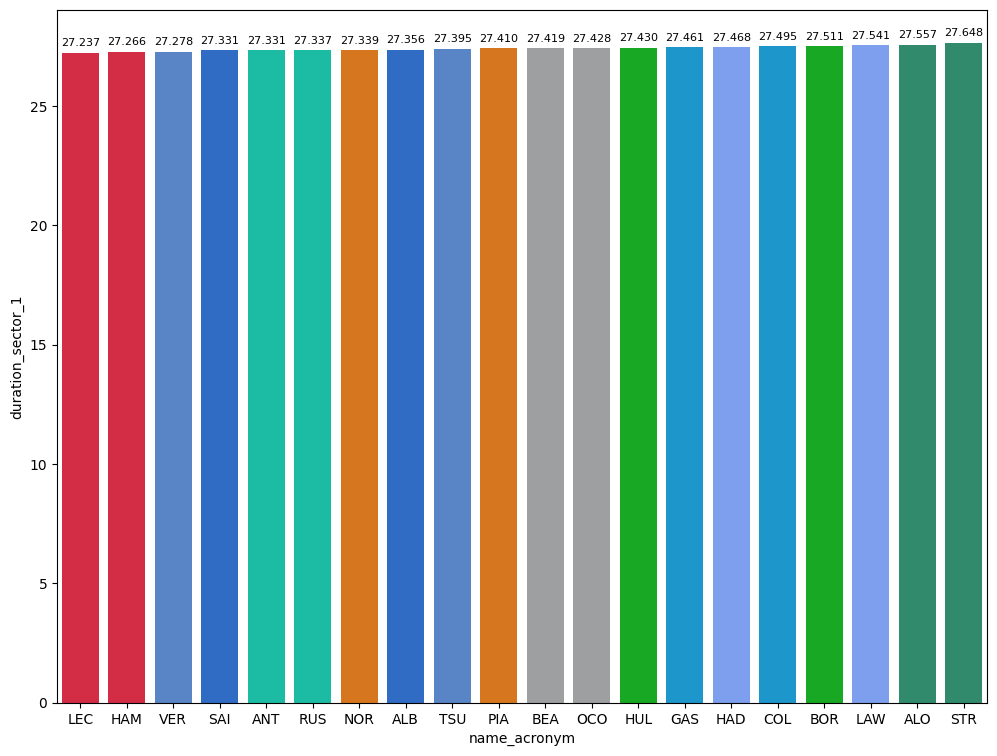

In [142]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

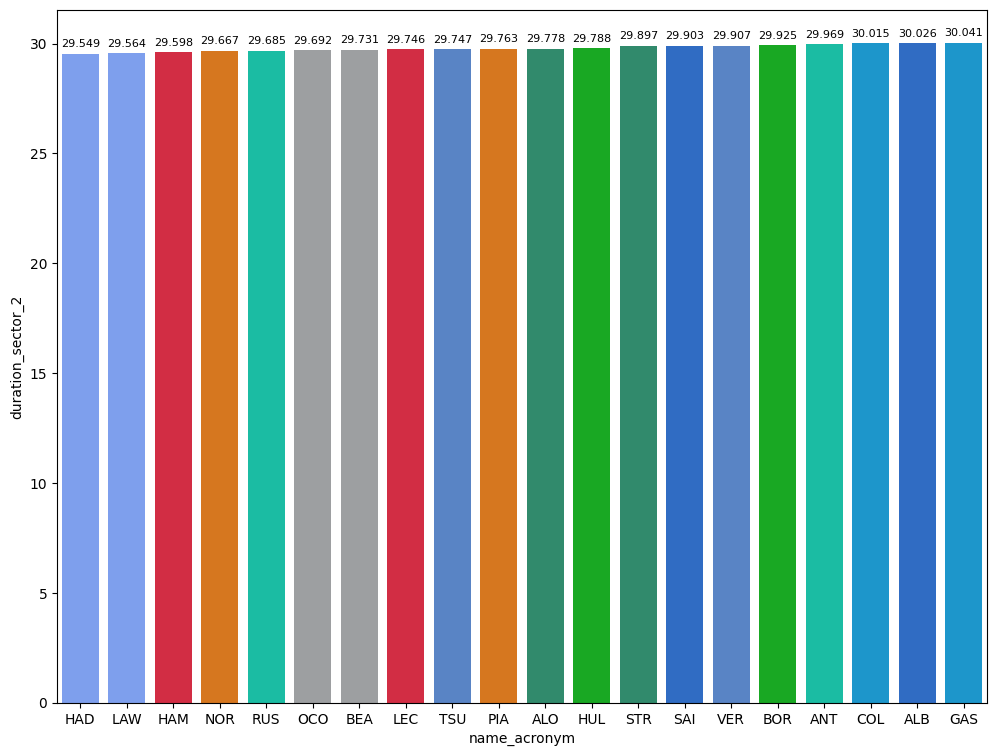

In [143]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

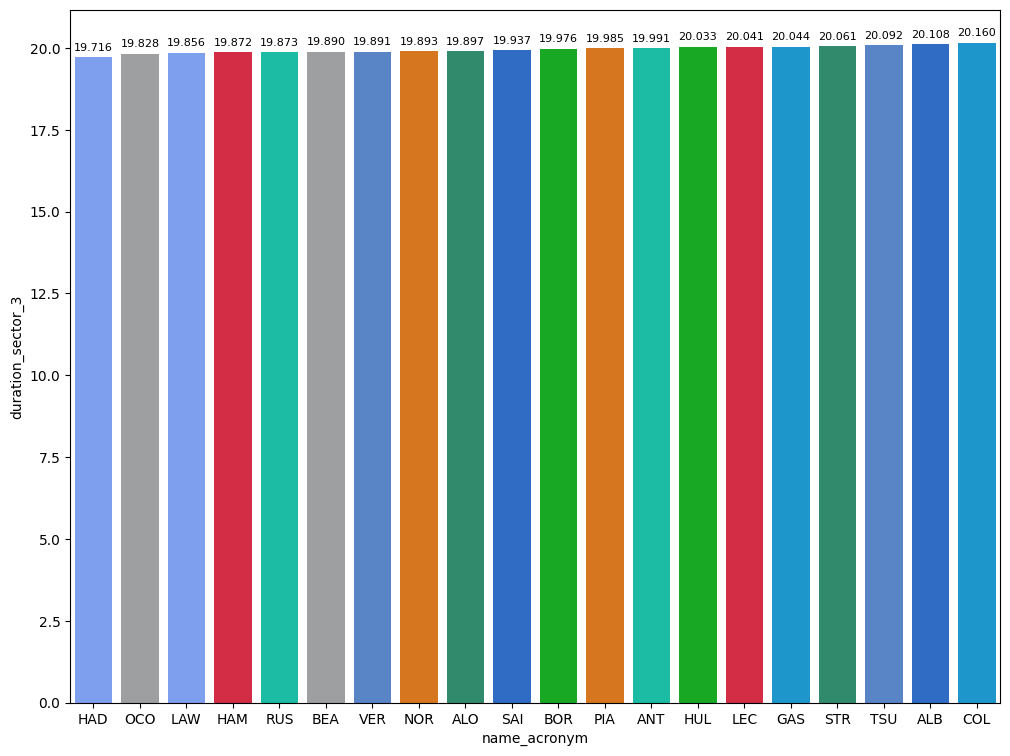

In [144]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [145]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [146]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Isack HADJAR Sector 1:  27.416 Sector 2:  29.685 Sector 3:  19.703


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [147]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             22         0.012                0.003               -0.154   
1             31         0.033               -0.139               -0.017   
2             27         0.212                0.091               -0.017   
3             14         0.299                0.028                0.044   
4             30         1.268                0.268                0.487   

   difference_sector_3 name_acronym  
0                0.163          TSU  
1                0.189          OCO  
2                0.138          HUL  
3                0.227          ALO  
4                0.513          LAW

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

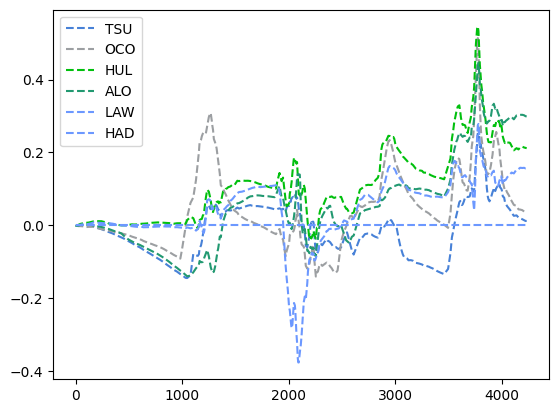

In [148]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [149]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4        -0.552               -0.354               -0.164   
1             44        -0.346               -0.318               -0.192   
2             63        -0.267               -0.218               -0.115   
3              1        -0.199               -0.279               -0.042   
4             55        -0.197               -0.178               -0.062   
5             16        -0.146               -0.192               -0.141   
6             81        -0.067               -0.131               -0.075   
7             12        -0.031               -0.248                0.015   
8             87        -0.017               -0.113                0.002   

   difference_sector_3 name_acronym  
0               -0.034          NOR  
1                0.164          HAM  
2                0.066          RUS  
3                0.122          VER  
4                0.043          SAI  
5                0.187          LEC  
6                0.139          PIA  
7                0.202          ANT  
8                0.094          BEA

#### Best sector per driver
In this section we can see the best sector of the session

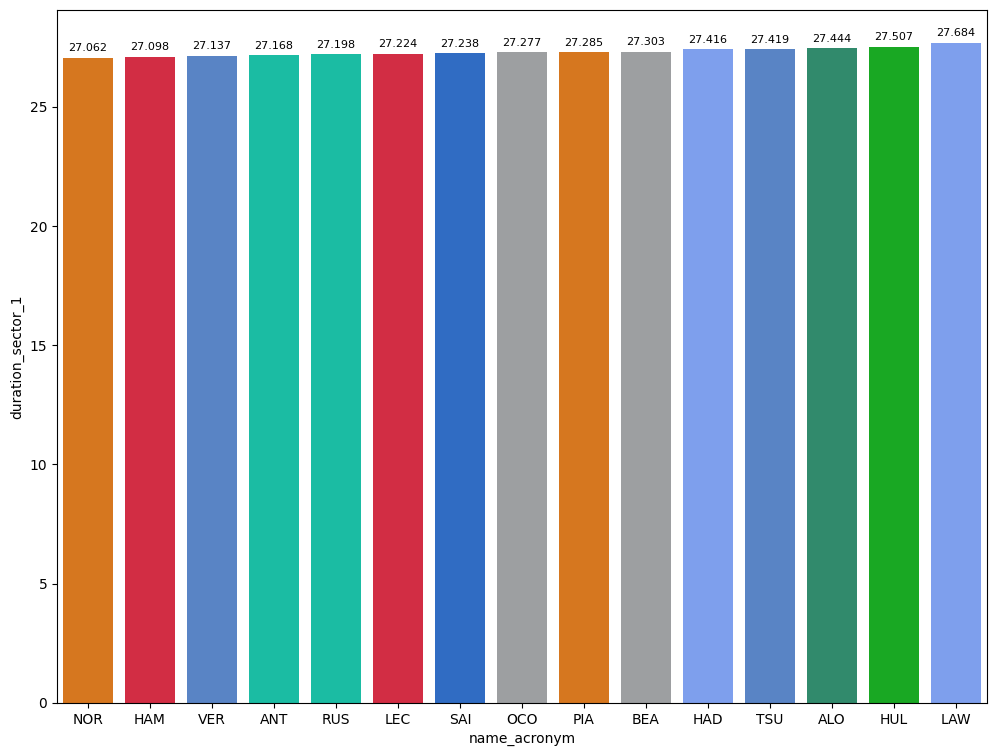

In [150]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

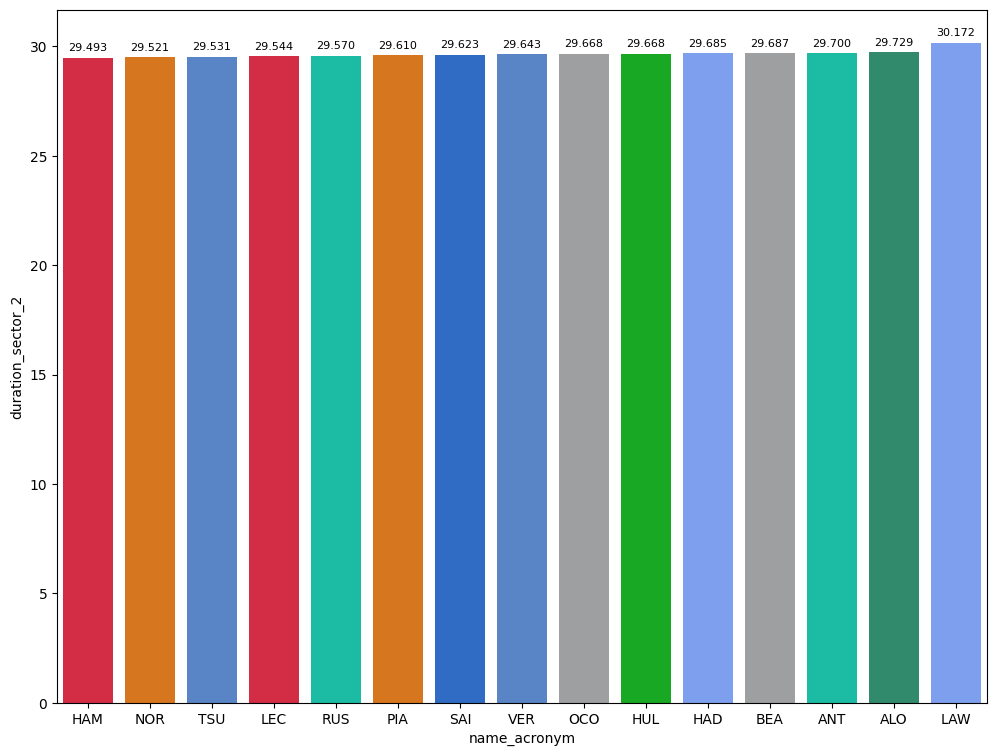

In [151]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

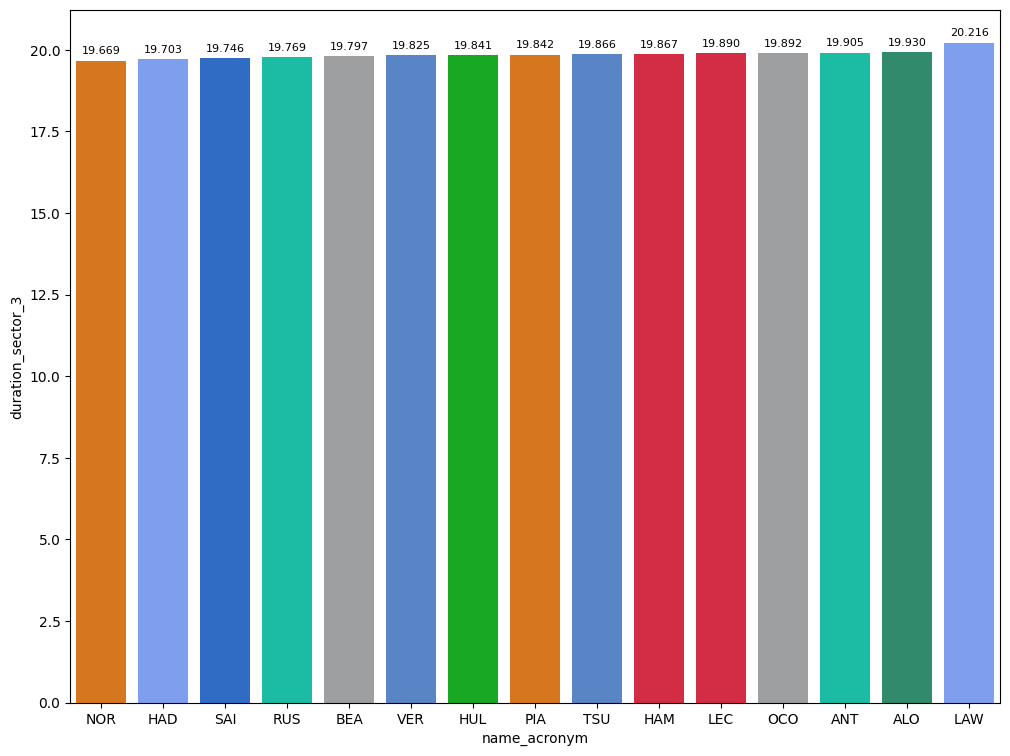

In [152]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [153]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [154]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Lando NORRIS Sector 1:  26.916 Sector 2:  29.114 Sector 3:  19.556


##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [155]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             16         0.262                0.029                0.071   
1             44         0.352                0.173                0.042   
2             63         0.448                0.106                0.185   
3              1         0.484                0.133                0.214   
4             12         0.532                0.196                0.105   
5             55         0.586                0.097                0.306   
6             81         0.588                0.201                0.237   
7              6         0.666                0.282                0.239   
8             87         0.874                0.351                0.438   

   difference_sector_3 name_acronym  
0                0.162          LEC  
1                0.137          HAM  
2                0.157          RUS  
3                0.137          VER  
4                0.231          ANT  
5                0.183          SAI  
6                0.150          PIA  
7                0.145          HAD  
8                0.085          BEA

#### Best sector per driver
In this section we can see the best sector of the session

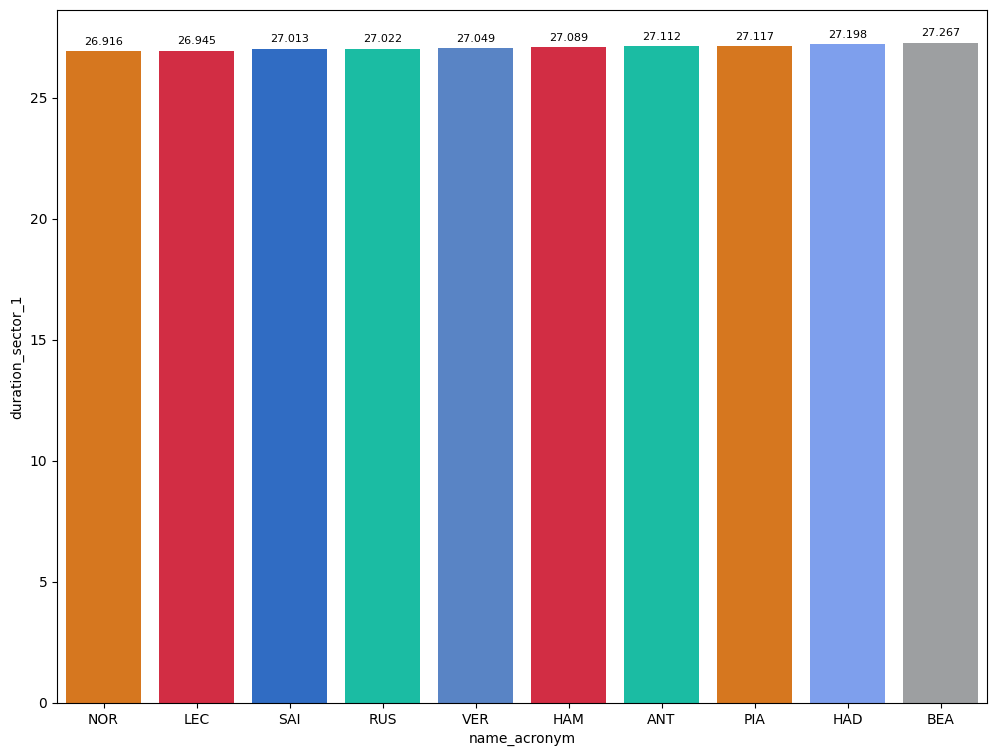

In [156]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

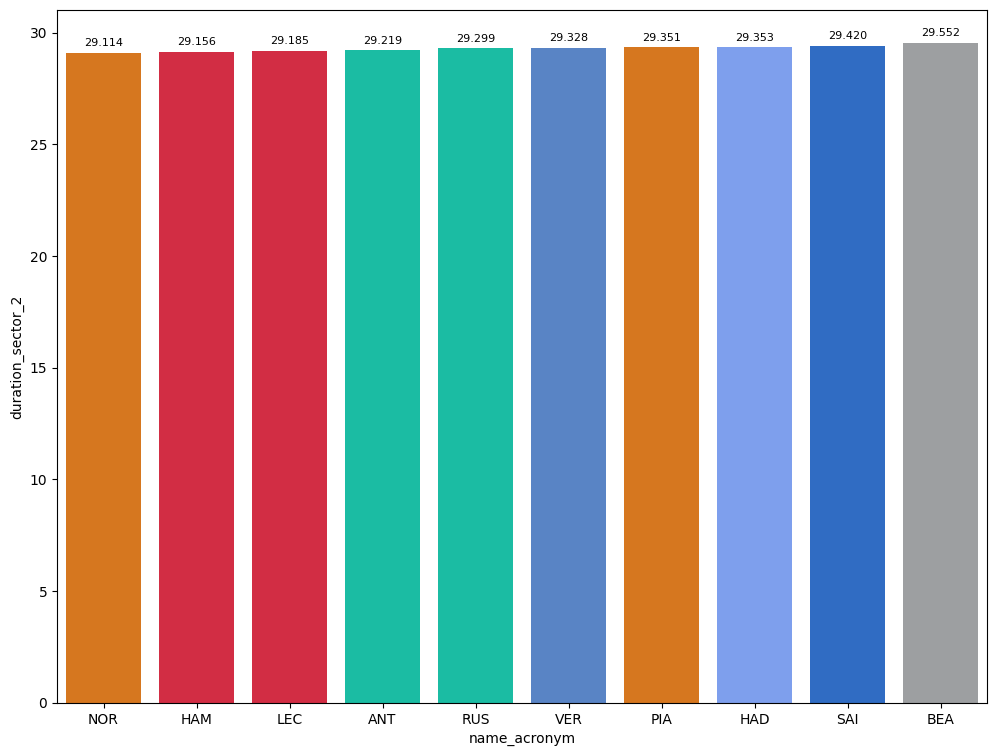

In [157]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

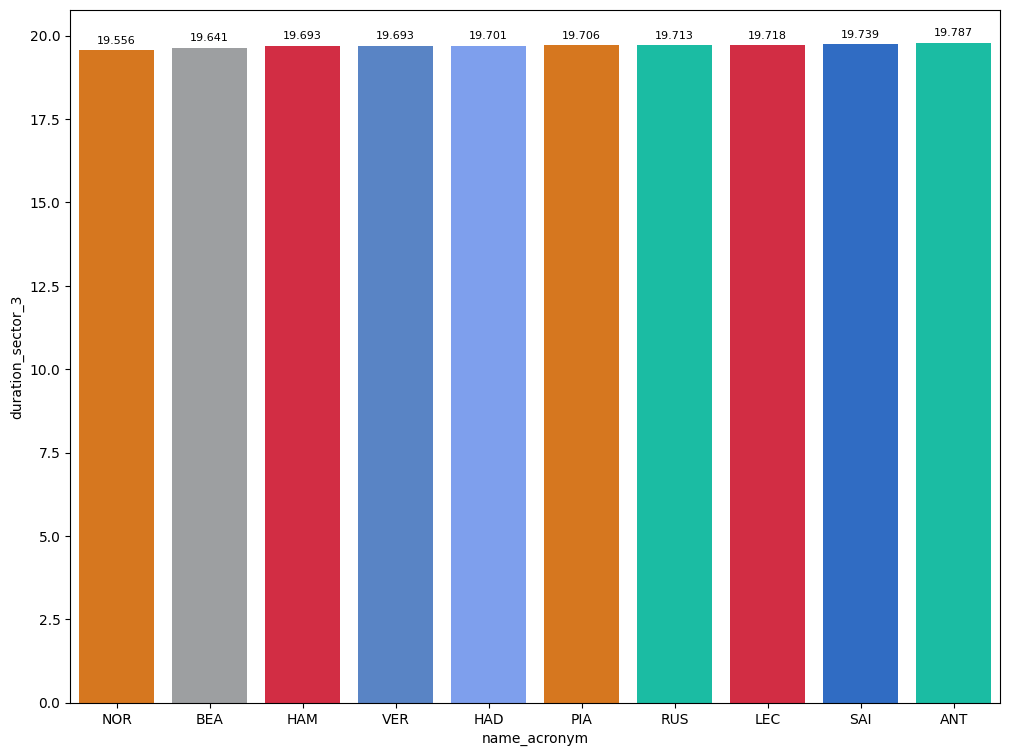

In [158]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

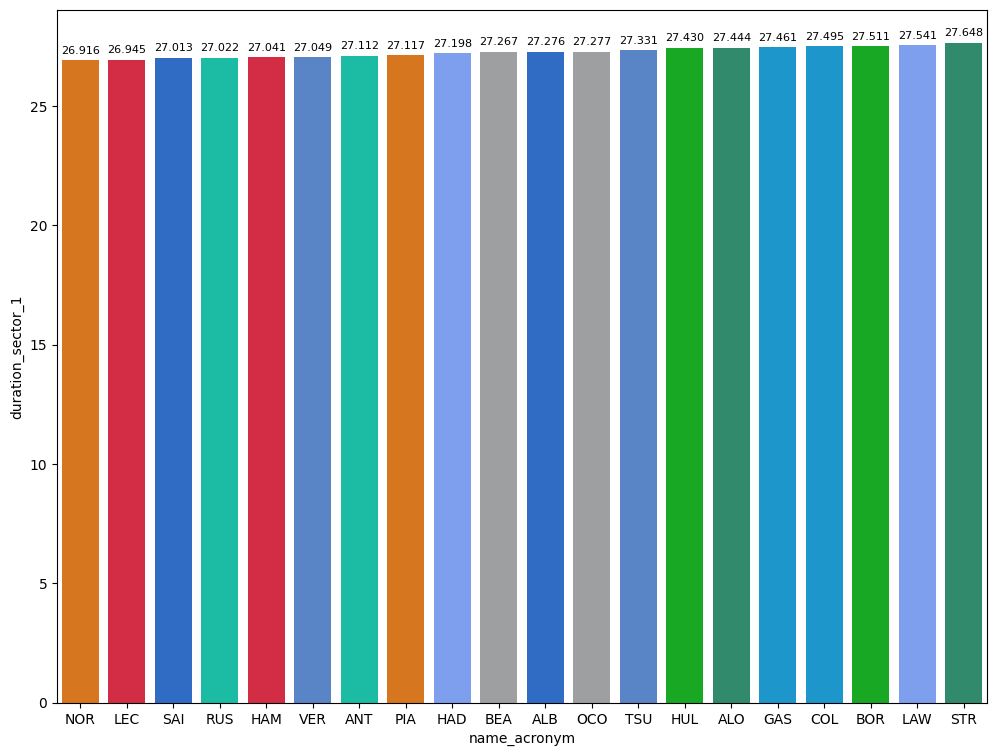

In [162]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

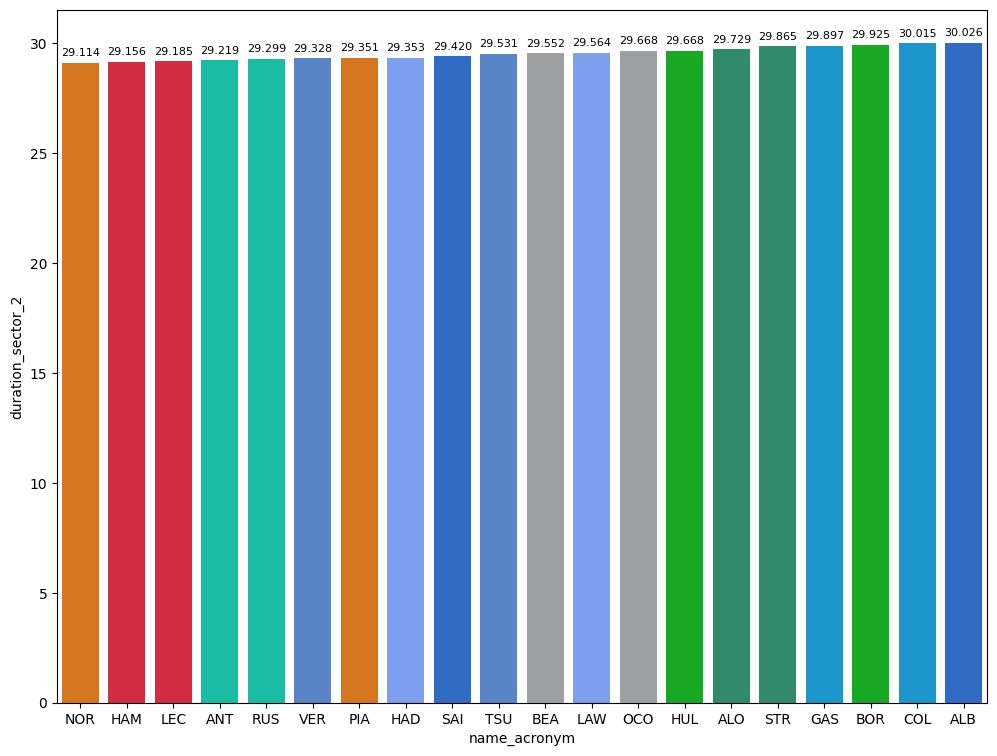

In [163]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

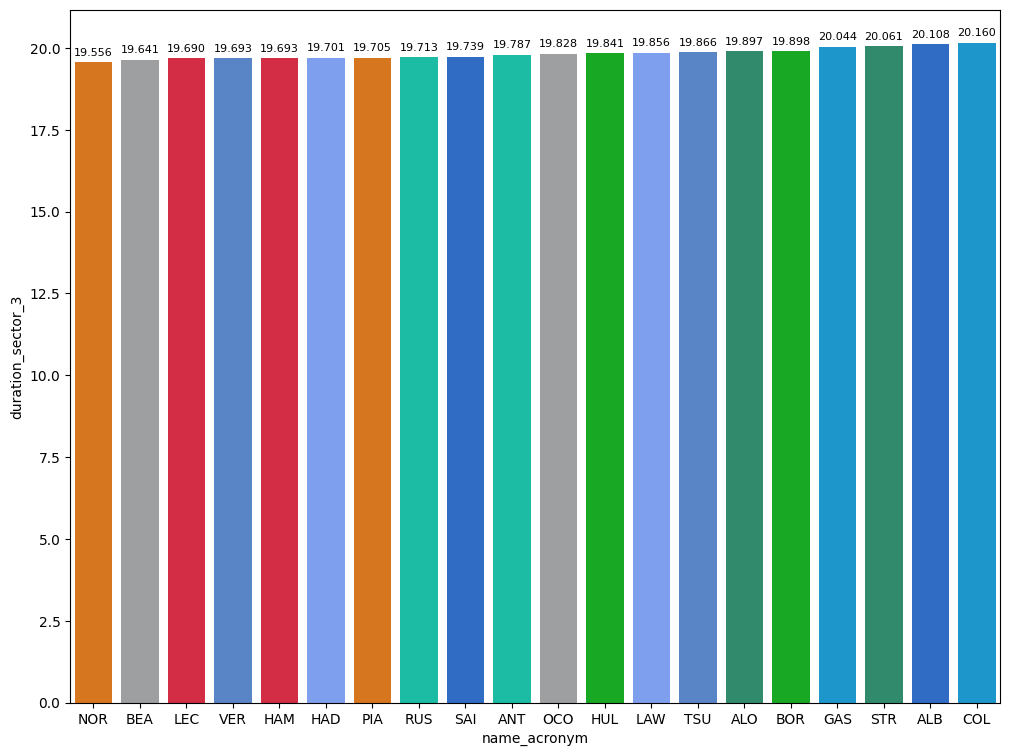

In [164]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

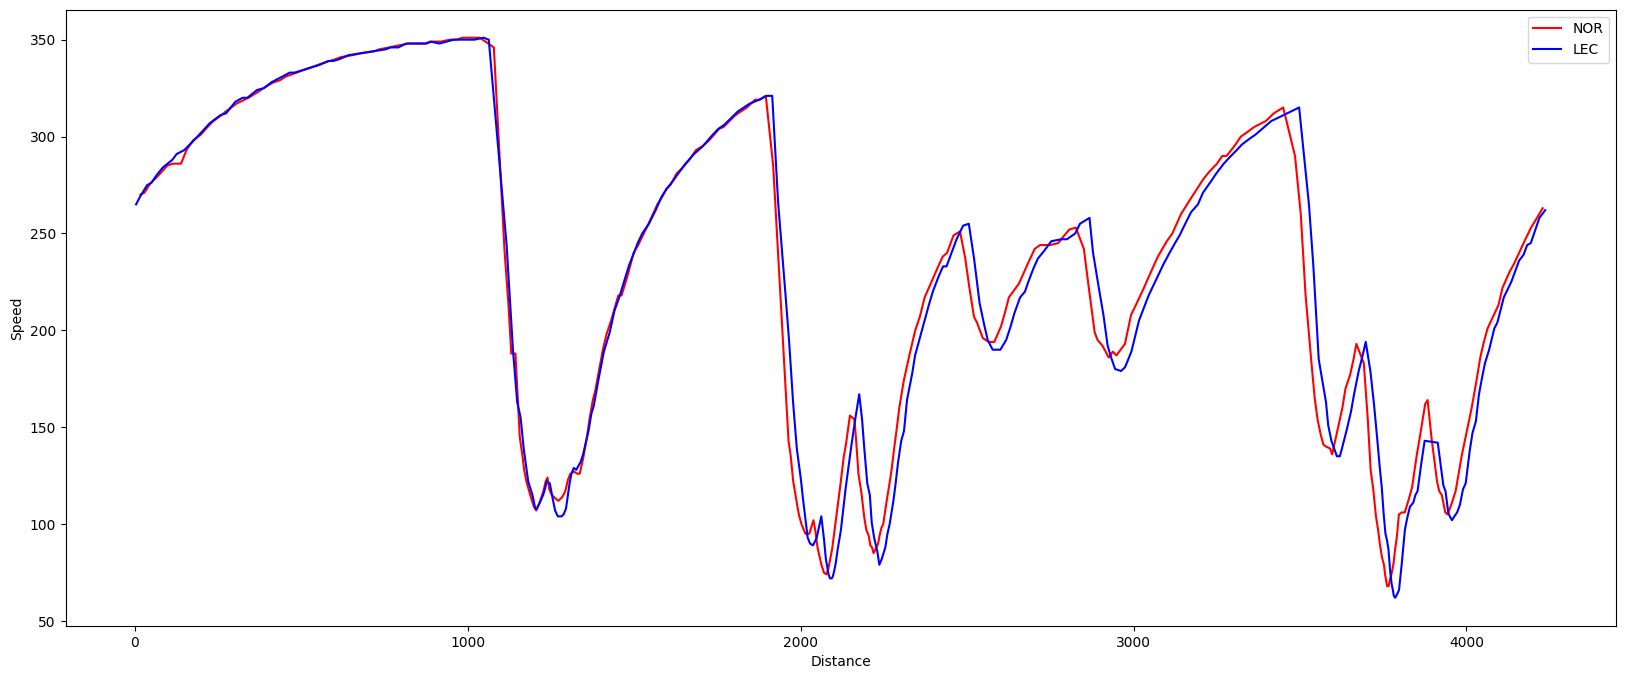

In [165]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

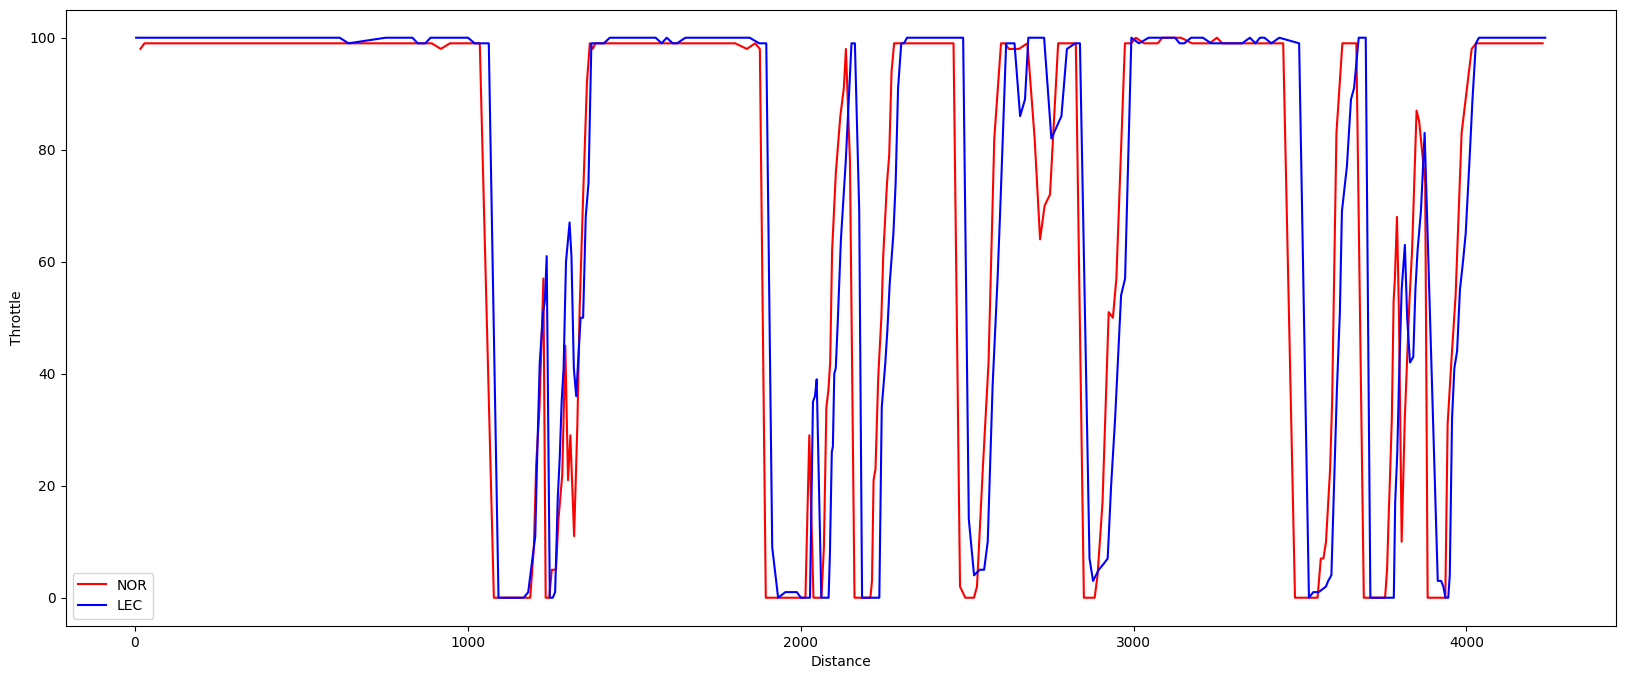

In [166]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

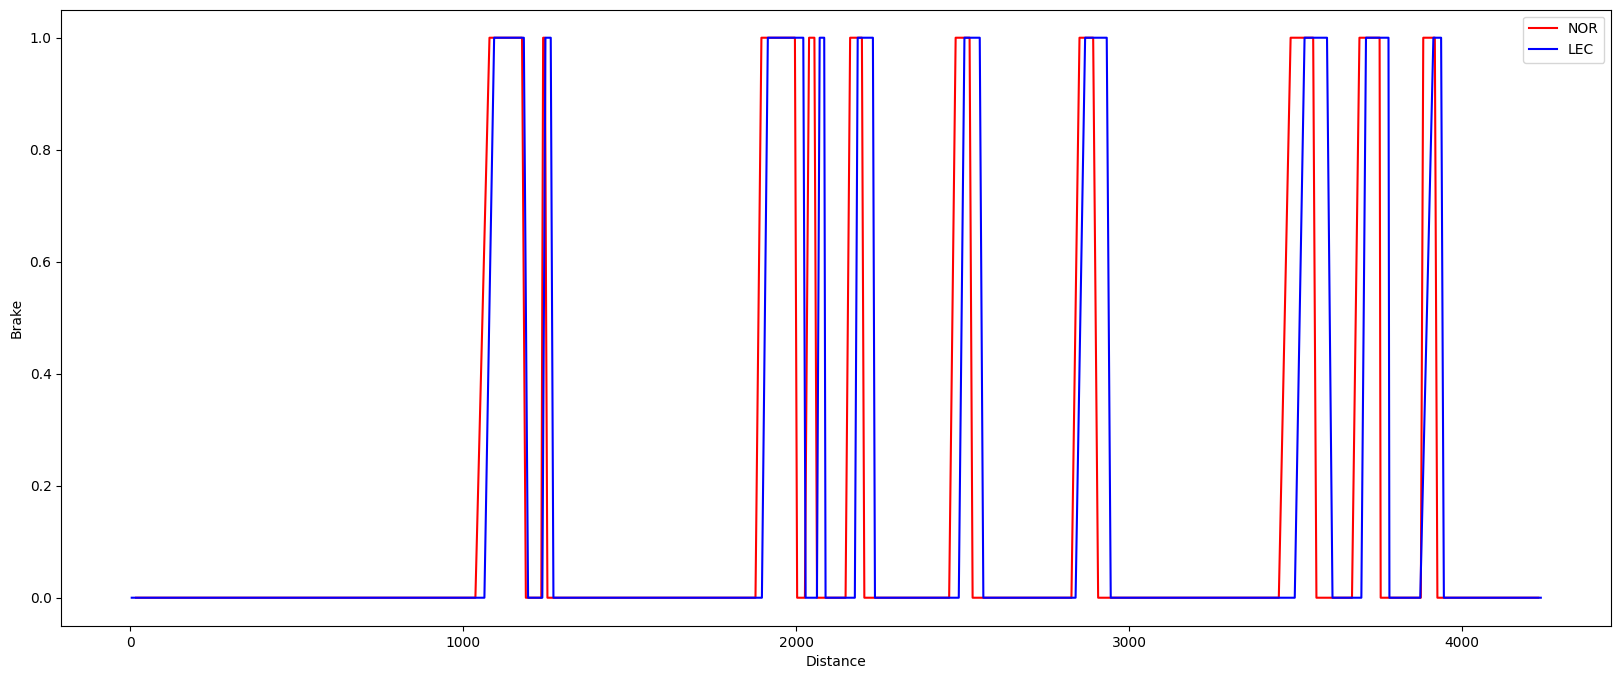

In [167]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

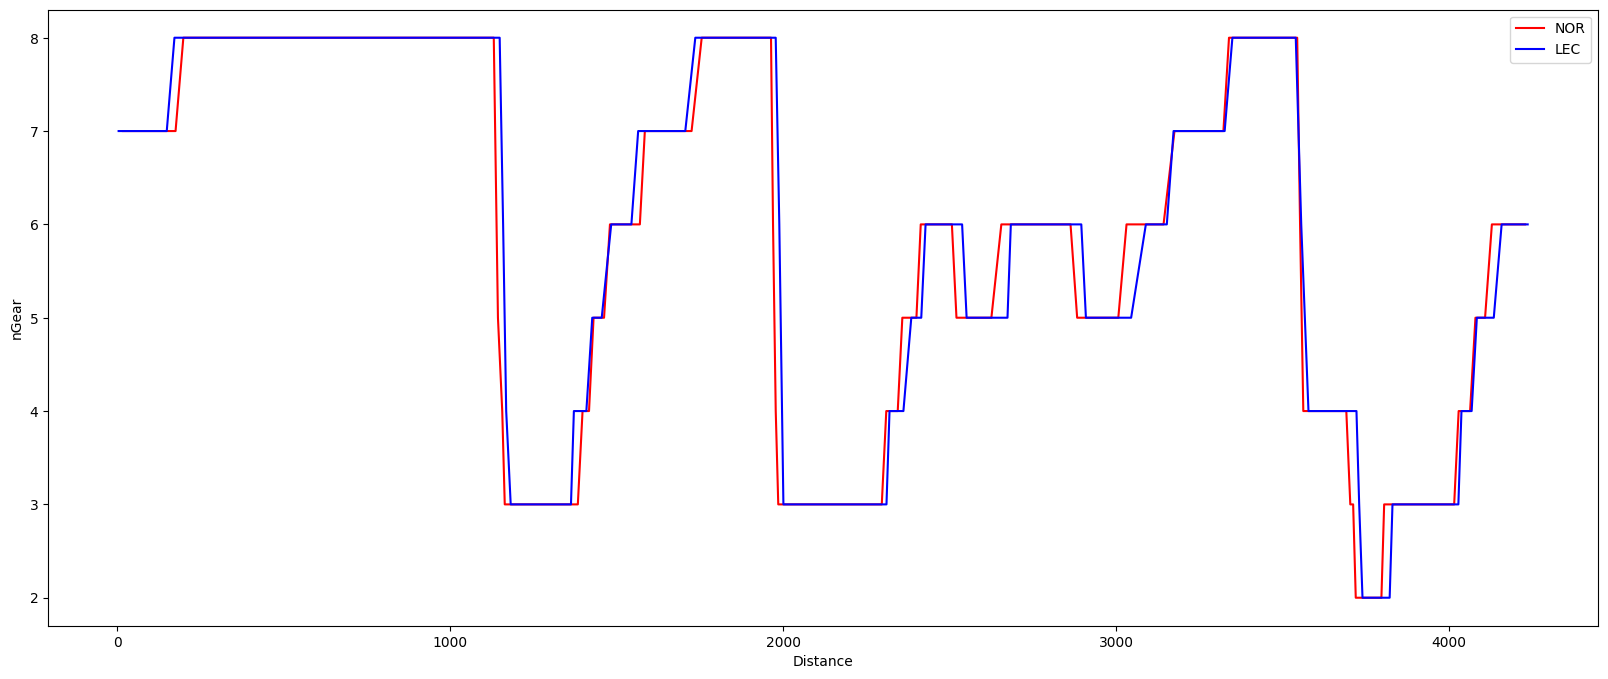

In [168]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9625)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9625)
drivers = libraryDataF1.obtain_information('drivers',session_key=9625)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax().dropna()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax().dropna()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 80
MAXIMUM_SECONDS = 85

In [ ]:
jointables2 = jointables

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [ ]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [ ]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

##### Sorted by sector 1

In [ ]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

##### Sorted by sector 2

In [ ]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

##### Sorted by sector 3

In [ ]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

#### Long runs mean

In [ ]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"INTERMEDIATE","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9625)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration